In [1]:

pip install -r ./python/requirements.txt

  Using cached protobuf-3.5.2-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (1.2 MB)
  Using cached grpcio-1.11.0-cp36-cp36m-macosx_10_11_x86_64.whl (1.6 MB)
ERROR: Could not find a version that satisfies the requirement torch==0.4.0 (from versions: 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.1.0.post2, 1.2.0, 1.3.0, 1.3.0.post2, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2)
ERROR: No matching distribution found for torch==0.4.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import torch
from dqn_agent import Agent as DQN_Agent
from mlagents_envs.environment import UnityEnvironment
from mlagents_envs.environment import ActionTuple, BaseEnv
import numpy as np
from mlagents_envs.side_channel.engine_configuration_channel import EngineConfigurationChannel
import pandas as pd

In [4]:
default_file="HER_3_no.app"
alternative_file="HER_3_no_alternate.app"
default_logged="HER_3_no_log.app"
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=default_file,worker_id=0,side_channels=[channel])
channel.set_configuration_parameters(time_scale = 100.0)
# get the behavior:
env.reset()
behavior_name = list(env.behavior_specs)[0]
print(behavior_name)
spec = env.behavior_specs[behavior_name]
# reset the environment
env.reset()
decision_steps, terminal_steps = env.get_steps(behavior_name)

for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")
    
action_size=branch_size    
print('Number of actions:', action_size)

# examine the state space 
state=decision_steps.obs[0][0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('States have length:', type(state))
env.reset()

HERTask_2?team=0
Action number 0 has 5 different options
Number of actions: 5
States look like: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.46935856 0.         1.
 0.         0.         0.         0.         0.         0.52897596
 0.         1.         0.         0.         0.         0.
 0.         0.52897596 0.         1.         0.         0.
 0.         0.         0.         0.7077888  0.         1.
 0.        

Episode 136	Average Score: -0.998194,	Average Step: 499.0Task solved in step: 400
Score: [9.200403]
Episode 158	Average Score: -0.896208,	Average Step: 498.01Task solved in step: 243
Score: [9.5152]
Episode 169	Average Score: -0.791074,	Average Step: 495.45Task solved in step: 349
Score: [9.301802]
Episode 219	Average Score: -0.688074,	Average Step: 493.95Task solved in step: 181
Score: [9.6384]
Episode 259	Average Score: -0.788828,	Average Step: 494.32Task solved in step: 475
Score: [9.050805]
Episode 334	Average Score: -0.897704,	Average Step: 498.76Task solved in step: 168
Score: [9.665]
Episode 376	Average Score: -0.891562,	Average Step: 495.69Task solved in step: 418
Score: [9.165004]
Episode 488	Average Score: -0.998194,	Average Step: 499.09Task solved in step: 401
Score: [9.198203]
Episode 492	Average Score: -0.896230,	Average Step: 498.02Task solved in step: 198
Score: [9.6044]
Episode 526	Average Score: -0.790204,	Average Step: 495.01Task solved in step: 474
Score: [9.0532055]

Episode 944	Average Score: 2.074602,	Average Step: 412.72Task solved in step: 70
Score: [9.8598]
Episode 945	Average Score: 2.080070,	Average Step: 409.98Task solved in step: 88
Score: [9.8242]
Episode 947	Average Score: 2.188294,	Average Step: 405.87Task solved in step: 39
Score: [9.923]
Episode 948	Average Score: 2.189954,	Average Step: 405.04Task solved in step: 231
Score: [9.538]
Episode 949	Average Score: 2.295316,	Average Step: 402.36Task solved in step: 93
Score: [9.814]
Episode 950	Average Score: 2.403438,	Average Step: 398.3Task solved in step: 35
Score: [9.9316]
Episode 951	Average Score: 2.409470,	Average Step: 395.29Task solved in step: 319
Score: [9.363601]
Episode 952	Average Score: 2.405900,	Average Step: 397.08Task solved in step: 40
Score: [9.9198]
Episode 955	Average Score: 2.302502,	Average Step: 398.77Task solved in step: 341
Score: [9.318201]
Episode 959	Average Score: 2.305558,	Average Step: 397.24Task solved in step: 113
Score: [9.7746]
Episode 960	Average Score:

Episode 1124	Average Score: 5.510099,	Average Step: 295.08Task solved in step: 354
Score: [9.293202]
Episode 1126	Average Score: 5.613013,	Average Step: 293.63Task solved in step: 88
Score: [9.825]
Episode 1128	Average Score: 5.618347,	Average Step: 290.96Task solved in step: 161
Score: [9.679]
Episode 1129	Average Score: 5.725119,	Average Step: 287.58Task solved in step: 199
Score: [9.602]
Episode 1130	Average Score: 5.725495,	Average Step: 287.39Task solved in step: 110
Score: [9.780001]
Episode 1131	Average Score: 5.724727,	Average Step: 287.77Task solved in step: 461
Score: [9.078204]
Episode 1132	Average Score: 5.717459,	Average Step: 291.4Task solved in step: 304
Score: [9.393001]
Episode 1133	Average Score: 5.821370,	Average Step: 289.45Task solved in step: 278
Score: [9.444]
Episode 1137	Average Score: 5.824453,	Average Step: 287.91Task solved in step: 135
Score: [9.7302]
Episode 1138	Average Score: 5.931737,	Average Step: 284.27Task solved in step: 149
Score: [9.7032]
Episode 

Episode 1232	Average Score: 7.392901,	Average Step: 203.8Task solved in step: 190
Score: [9.6206]
Episode 1234	Average Score: 7.290756,	Average Step: 204.87Task solved in step: 27
Score: [9.9474]
Episode 1235	Average Score: 7.400212,	Average Step: 200.15Task solved in step: 27
Score: [9.9474]
Episode 1236	Average Score: 7.509668,	Average Step: 195.43Task solved in step: 104
Score: [9.7932005]
Episode 1237	Average Score: 7.617581,	Average Step: 191.48Task solved in step: 24
Score: [9.953]
Episode 1238	Average Score: 7.619809,	Average Step: 190.37Task solved in step: 24
Score: [9.953]
Episode 1239	Average Score: 7.622307,	Average Step: 189.12Task solved in step: 184
Score: [9.633599]
Episode 1240	Average Score: 7.620435,	Average Step: 190.06Task solved in step: 35
Score: [9.9302]
Episode 1241	Average Score: 7.620752,	Average Step: 189.9Task solved in step: 24
Score: [9.953]
Episode 1242	Average Score: 7.730265,	Average Step: 185.15Task solved in step: 24
Score: [9.953]
Episode 1243	Avera

Episode 1347	Average Score: 6.623147,	Average Step: 238.63Task solved in step: 30
Score: [9.941]
Episode 1348	Average Score: 6.623174,	Average Step: 238.62Task solved in step: 306
Score: [9.387801]
Episode 1349	Average Score: 6.617972,	Average Step: 241.22Task solved in step: 109
Score: [9.7824]
Episode 1350	Average Score: 6.725778,	Average Step: 237.32Task solved in step: 61
Score: [9.8784]
Episode 1351	Average Score: 6.725660,	Average Step: 237.38Task solved in step: 32
Score: [9.937]
Episode 1352	Average Score: 6.734056,	Average Step: 233.18Task solved in step: 309
Score: [9.383401]
Episode 1353	Average Score: 6.729306,	Average Step: 235.56Task solved in step: 326
Score: [9.348401]
Episode 1354	Average Score: 6.723452,	Average Step: 238.49Task solved in step: 96
Score: [9.8086]
Episode 1355	Average Score: 6.724206,	Average Step: 238.11Task solved in step: 130
Score: [9.7411995]
Episode 1360	Average Score: 6.393923,	Average Step: 253.23Task solved in step: 56
Score: [9.889]
Episode 1

Episode 1449	Average Score: 7.743412,	Average Step: 178.55Task solved in step: 110
Score: [9.7802]
Episode 1450	Average Score: 7.743390,	Average Step: 178.56Task solved in step: 138
Score: [9.724999]
Episode 1451	Average Score: 7.741856,	Average Step: 179.33Task solved in step: 389
Score: [9.221803]
Episode 1452	Average Score: 7.734703,	Average Step: 182.9Task solved in step: 82
Score: [9.8364]
Episode 1454	Average Score: 7.635768,	Average Step: 182.36Task solved in step: 53
Score: [9.8946]
Episode 1455	Average Score: 7.636628,	Average Step: 181.93Task solved in step: 26
Score: [9.948999]
Episode 1456	Average Score: 7.638705,	Average Step: 180.89Task solved in step: 41
Score: [9.9184]
Episode 1457	Average Score: 7.747871,	Average Step: 176.31Task solved in step: 43
Score: [9.9156]
Episode 1458	Average Score: 7.857008,	Average Step: 171.75Task solved in step: 55
Score: [9.8907995]
Episode 1460	Average Score: 7.965899,	Average Step: 167.31Task solved in step: 32
Score: [9.937401]
Episode

Episode 1656	Average Score: 8.013507,	Average Step: 193.47Task solved in step: 106
Score: [9.788]
Episode 1657	Average Score: 8.012248,	Average Step: 194.1Task solved in step: 45
Score: [9.910001]
Episode 1658	Average Score: 8.012620,	Average Step: 193.91Task solved in step: 58
Score: [9.884001]
Episode 1659	Average Score: 8.019495,	Average Step: 190.47Task solved in step: 28
Score: [9.9438]
Episode 1661	Average Score: 7.910519,	Average Step: 194.95Task solved in step: 51
Score: [9.898601]
Episode 1662	Average Score: 7.910605,	Average Step: 194.91Task solved in step: 61
Score: [9.8794]
Episode 1663	Average Score: 7.918112,	Average Step: 191.16Task solved in step: 22
Score: [9.9567995]
Episode 1665	Average Score: 7.919438,	Average Step: 190.5Task solved in step: 25
Score: [9.9504]
Episode 1666	Average Score: 8.028923,	Average Step: 185.76Task solved in step: 27
Score: [9.946]
Episode 1667	Average Score: 8.029140,	Average Step: 185.65Task solved in step: 179
Score: [9.6432]
Episode 1668	

Episode 1857	Average Score: 8.533183,	Average Step: 133.63Task solved in step: 25
Score: [9.950001]
Episode 1858	Average Score: 8.534842,	Average Step: 132.8Task solved in step: 33
Score: [9.934999]
Episode 1859	Average Score: 8.535254,	Average Step: 132.6Task solved in step: 108
Score: [9.7848]
Episode 1860	Average Score: 8.643083,	Average Step: 128.69Task solved in step: 79
Score: [9.8434]
Episode 1862	Average Score: 8.534749,	Average Step: 132.86Task solved in step: 72
Score: [9.857201]
Episode 1863	Average Score: 8.533917,	Average Step: 133.28Task solved in step: 65
Score: [9.8704]
Episode 1864	Average Score: 8.533237,	Average Step: 133.62Task solved in step: 50
Score: [9.900001]
Episode 1865	Average Score: 8.532853,	Average Step: 133.81Task solved in step: 85
Score: [9.830001]
Episode 1866	Average Score: 8.531770,	Average Step: 134.35Task solved in step: 207
Score: [9.5873995]
Episode 1868	Average Score: 8.420691,	Average Step: 139.89Task solved in step: 211
Score: [9.579599]
Epis

Episode 1950	Average Score: 8.627008,	Average Step: 136.76Task solved in step: 299
Score: [9.403401]
Episode 1951	Average Score: 8.731025,	Average Step: 134.76Task solved in step: 73
Score: [9.8546]
Episode 1952	Average Score: 8.737697,	Average Step: 131.42Task solved in step: 28
Score: [9.9444]
Episode 1953	Average Score: 8.738373,	Average Step: 131.08Task solved in step: 28
Score: [9.9446]
Episode 1954	Average Score: 8.847800,	Average Step: 126.37Task solved in step: 28
Score: [9.9446]
Episode 1956	Average Score: 8.739084,	Average Step: 130.72Task solved in step: 51
Score: [9.8996]
Episode 1957	Average Score: 8.738886,	Average Step: 130.82Task solved in step: 35
Score: [9.9302]
Episode 1958	Average Score: 8.738688,	Average Step: 130.92Task solved in step: 40
Score: [9.920799]
Episode 1959	Average Score: 8.738546,	Average Step: 130.99Task solved in step: 44
Score: [9.9126005]
Episode 1960	Average Score: 8.739824,	Average Step: 130.35Task solved in step: 65
Score: [9.871201]
Episode 19

Episode 2037	Average Score: 9.338598,	Average Step: 80.98Task solved in step: 78
Score: [9.845]
Episode 2038	Average Score: 9.338232,	Average Step: 81.16Task solved in step: 77
Score: [9.847]
Episode 2039	Average Score: 9.340198,	Average Step: 80.18Task solved in step: 107
Score: [9.7874]
Episode 2040	Average Score: 9.338761,	Average Step: 80.9Task solved in step: 50
Score: [9.8998]
Episode 2041	Average Score: 9.339124,	Average Step: 80.71Task solved in step: 71
Score: [9.8592005]
Episode 2042	Average Score: 9.339896,	Average Step: 80.33Task solved in step: 62
Score: [9.8768]
Episode 2043	Average Score: 9.339363,	Average Step: 80.6Task solved in step: 32
Score: [9.935801]
Episode 2044	Average Score: 9.448704,	Average Step: 75.93Task solved in step: 55
Score: [9.8914]
Episode 2045	Average Score: 9.450105,	Average Step: 75.23Task solved in step: 84
Score: [9.8324]
Episode 2046	Average Score: 9.449772,	Average Step: 75.39Task solved in step: 181
Score: [9.6378]
Episode 2047	Average Score:

Episode 2131	Average Score: 8.989445,	Average Step: 105.54Task solved in step: 76
Score: [9.8482]
Episode 2132	Average Score: 8.988867,	Average Step: 105.83Task solved in step: 73
Score: [9.854]
Episode 2133	Average Score: 8.988823,	Average Step: 105.85Task solved in step: 120
Score: [9.7612]
Episode 2134	Average Score: 8.987148,	Average Step: 106.69Task solved in step: 68
Score: [9.8654]
Episode 2135	Average Score: 8.987062,	Average Step: 106.74Task solved in step: 64
Score: [9.8732]
Episode 2136	Average Score: 8.987388,	Average Step: 106.58Task solved in step: 72
Score: [9.857401]
Episode 2137	Average Score: 8.986772,	Average Step: 106.89Task solved in step: 55
Score: [9.89]
Episode 2138	Average Score: 8.987222,	Average Step: 106.66Task solved in step: 27
Score: [9.9458]
Episode 2140	Average Score: 8.880353,	Average Step: 110.08Task solved in step: 47
Score: [9.906799]
Episode 2142	Average Score: 8.771849,	Average Step: 114.33Task solved in step: 48
Score: [9.905]
Episode 2144	Averag

Episode 2320	Average Score: 8.671229,	Average Step: 114.66Task solved in step: 202
Score: [9.5974]
Episode 2321	Average Score: 8.777185,	Average Step: 111.69Task solved in step: 25
Score: [9.9512005]
Episode 2322	Average Score: 8.777166,	Average Step: 111.7Task solved in step: 67
Score: [9.8661995]
Episode 2323	Average Score: 8.776299,	Average Step: 112.13Task solved in step: 54
Score: [9.8918]
Episode 2324	Average Score: 8.775629,	Average Step: 112.46Task solved in step: 92
Score: [9.816]
Episode 2325	Average Score: 8.774200,	Average Step: 113.17Task solved in step: 223
Score: [9.554799]
Episode 2326	Average Score: 8.770161,	Average Step: 115.19Task solved in step: 70
Score: [9.8612]
Episode 2327	Average Score: 8.769184,	Average Step: 115.68Task solved in step: 72
Score: [9.856601]
Episode 2328	Average Score: 8.768163,	Average Step: 116.19Task solved in step: 301
Score: [9.398001]
Episode 2329	Average Score: 8.762712,	Average Step: 118.91Task solved in step: 31
Score: [9.9384]
Episode

Episode 2501	Average Score: 8.442129,	Average Step: 129.29Task solved in step: 74
Score: [9.8536]
Episode 2502	Average Score: 8.441531,	Average Step: 129.59Task solved in step: 65
Score: [9.869801]
Episode 2503	Average Score: 8.441509,	Average Step: 129.6Task solved in step: 24
Score: [9.9518]
Episode 2504	Average Score: 8.441807,	Average Step: 129.45Task solved in step: 24
Score: [9.9522]
Episode 2505	Average Score: 8.551311,	Average Step: 124.7Task solved in step: 62
Score: [9.8776]
Episode 2506	Average Score: 8.551593,	Average Step: 124.56Task solved in step: 52
Score: [9.8962]
Episode 2507	Average Score: 8.551687,	Average Step: 124.51Task solved in step: 34
Score: [9.9332]
Episode 2509	Average Score: 8.447914,	Average Step: 126.39Task solved in step: 33
Score: [9.9338]
Episode 2511	Average Score: 8.449054,	Average Step: 125.82Task solved in step: 32
Score: [9.935801]
Episode 2512	Average Score: 8.456387,	Average Step: 122.15Task solved in step: 76
Score: [9.8492]
Episode 2513	Avera

Episode 2597	Average Score: 8.706245,	Average Step: 97.22Task solved in step: 28
Score: [9.9452]
Episode 2598	Average Score: 8.706455,	Average Step: 97.12Task solved in step: 36
Score: [9.9296]
Episode 2599	Average Score: 8.706768,	Average Step: 96.97Task solved in step: 25
Score: [9.9504]
Episode 2600	Average Score: 8.708314,	Average Step: 96.2Task solved in step: 28
Score: [9.9452]
Episode 2601	Average Score: 8.708753,	Average Step: 95.98Task solved in step: 28
Score: [9.9452]
Episode 2602	Average Score: 8.709668,	Average Step: 95.52Task solved in step: 28
Score: [9.9452]
Episode 2603	Average Score: 8.710423,	Average Step: 95.15Task solved in step: 28
Score: [9.9452]
Episode 2604	Average Score: 8.710357,	Average Step: 95.19Task solved in step: 120
Score: [9.76]
Episode 2605	Average Score: 8.708434,	Average Step: 96.15Task solved in step: 56
Score: [9.8880005]
Episode 2606	Average Score: 8.708538,	Average Step: 96.09Task solved in step: 26
Score: [9.948]
Episode 2607	Average Score: 8.

Episode 2781	Average Score: 8.422396,	Average Step: 139.05Task solved in step: 221
Score: [9.558399]
Episode 2782	Average Score: 8.420024,	Average Step: 140.23Task solved in step: 36
Score: [9.9284]
Episode 2784	Average Score: 8.310530,	Average Step: 144.97Task solved in step: 407
Score: [9.187003]
Episode 2785	Average Score: 8.303010,	Average Step: 148.73Task solved in step: 26
Score: [9.949599]
Episode 2786	Average Score: 8.310960,	Average Step: 144.76Task solved in step: 177
Score: [9.646999]
Episode 2787	Average Score: 8.308023,	Average Step: 146.23Task solved in step: 76
Score: [9.848001]
Episode 2788	Average Score: 8.307006,	Average Step: 146.74Task solved in step: 88
Score: [9.824]
Episode 2789	Average Score: 8.306007,	Average Step: 147.24Task solved in step: 34
Score: [9.932799]
Episode 2790	Average Score: 8.307995,	Average Step: 146.25Task solved in step: 319
Score: [9.361801]
Episode 2791	Average Score: 8.302097,	Average Step: 149.19Task solved in step: 100
Score: [9.8]
Episo

Episode 2965	Average Score: 8.637173,	Average Step: 131.66Task solved in step: 64
Score: [9.873]
Episode 2966	Average Score: 8.638055,	Average Step: 131.22Task solved in step: 409
Score: [9.183204]
Episode 2969	Average Score: 8.524281,	Average Step: 138.11Task solved in step: 49
Score: [9.9018]
Episode 2970	Average Score: 8.528401,	Average Step: 136.05Task solved in step: 25
Score: [9.9512005]
Episode 2971	Average Score: 8.528876,	Average Step: 135.81Task solved in step: 56
Score: [9.8896]
Episode 2972	Average Score: 8.528872,	Average Step: 135.82Task solved in step: 35
Score: [9.9306]
Episode 2973	Average Score: 8.529376,	Average Step: 135.57Task solved in step: 90
Score: [9.8202]
Episode 2974	Average Score: 8.528858,	Average Step: 135.83Task solved in step: 31
Score: [9.9378]
Episode 2975	Average Score: 8.529330,	Average Step: 135.59Task solved in step: 43
Score: [9.9146]
Episode 2977	Average Score: 8.424817,	Average Step: 137.84Task solved in step: 71
Score: [9.859401]
Episode 2978	

Episode 3071	Average Score: 7.676795,	Average Step: 161.81Task solved in step: 69
Score: [9.8622]
Episode 3072	Average Score: 7.676521,	Average Step: 161.94Task solved in step: 71
Score: [9.8596]
Episode 3073	Average Score: 7.675811,	Average Step: 162.3Task solved in step: 24
Score: [9.9524]
Episode 3074	Average Score: 7.677133,	Average Step: 161.64Task solved in step: 359
Score: [9.282202]
Episode 3075	Average Score: 7.670578,	Average Step: 164.92Task solved in step: 23
Score: [9.954]
Episode 3076	Average Score: 7.670972,	Average Step: 164.72Task solved in step: 23
Score: [9.954]
Episode 3077	Average Score: 7.780493,	Average Step: 159.96Task solved in step: 23
Score: [9.954]
Episode 3078	Average Score: 7.781439,	Average Step: 159.48Task solved in step: 23
Score: [9.954]
Episode 3079	Average Score: 7.782386,	Average Step: 159.0Task solved in step: 23
Score: [9.954]
Episode 3080	Average Score: 7.788856,	Average Step: 155.76Task solved in step: 31
Score: [9.9396]
Episode 3081	Average Sco

Episode 3156	Average Score: 9.368287,	Average Step: 66.11Task solved in step: 22
Score: [9.9574]
Episode 3157	Average Score: 9.477842,	Average Step: 61.34Task solved in step: 22
Score: [9.9574]
Episode 3158	Average Score: 9.587399,	Average Step: 56.57Task solved in step: 22
Score: [9.9574]
Episode 3159	Average Score: 9.696955,	Average Step: 51.8Task solved in step: 67
Score: [9.866799]
Episode 3160	Average Score: 9.696423,	Average Step: 52.07Task solved in step: 72
Score: [9.857201]
Episode 3161	Average Score: 9.696106,	Average Step: 52.23Task solved in step: 24
Score: [9.9532]
Episode 3162	Average Score: 9.696566,	Average Step: 52.0Task solved in step: 24
Score: [9.9532]
Episode 3163	Average Score: 9.697025,	Average Step: 51.77Task solved in step: 25
Score: [9.9512005]
Episode 3164	Average Score: 9.806519,	Average Step: 47.03Task solved in step: 25
Score: [9.9512005]
Episode 3165	Average Score: 9.808227,	Average Step: 46.18Task solved in step: 25
Score: [9.9512005]
Episode 3166	Averag

Episode 3245	Average Score: 9.461132,	Average Step: 69.81Task solved in step: 64
Score: [9.8724]
Episode 3246	Average Score: 9.460282,	Average Step: 70.23Task solved in step: 22
Score: [9.957]
Episode 3247	Average Score: 9.460555,	Average Step: 70.09Task solved in step: 41
Score: [9.9178]
Episode 3248	Average Score: 9.462850,	Average Step: 68.94Task solved in step: 57
Score: [9.8868]
Episode 3249	Average Score: 9.462277,	Average Step: 69.23Task solved in step: 22
Score: [9.9574]
Episode 3250	Average Score: 9.462277,	Average Step: 69.23Task solved in step: 22
Score: [9.9574]
Episode 3251	Average Score: 9.462277,	Average Step: 69.23Task solved in step: 22
Score: [9.9574]
Episode 3252	Average Score: 9.462278,	Average Step: 69.23Task solved in step: 22
Score: [9.9574]
Episode 3253	Average Score: 9.462278,	Average Step: 69.23Task solved in step: 24
Score: [9.953]
Episode 3254	Average Score: 9.462234,	Average Step: 69.25Task solved in step: 23
Score: [9.954]
Episode 3255	Average Score: 9.462

Episode 3332	Average Score: 9.558111,	Average Step: 71.24Task solved in step: 81
Score: [9.8394]
Episode 3333	Average Score: 9.556993,	Average Step: 71.8Task solved in step: 33
Score: [9.9344]
Episode 3334	Average Score: 9.556905,	Average Step: 71.84Task solved in step: 33
Score: [9.9344]
Episode 3335	Average Score: 9.556633,	Average Step: 71.97Task solved in step: 27
Score: [9.9472]
Episode 3336	Average Score: 9.556532,	Average Step: 72.02Task solved in step: 37
Score: [9.926001]
Episode 3337	Average Score: 9.556221,	Average Step: 72.17Task solved in step: 35
Score: [9.9312]
Episode 3338	Average Score: 9.555960,	Average Step: 72.3Task solved in step: 29
Score: [9.942]
Episode 3339	Average Score: 9.556101,	Average Step: 72.23Task solved in step: 50
Score: [9.9008]
Episode 3340	Average Score: 9.556086,	Average Step: 72.24Task solved in step: 98
Score: [9.804199]
Episode 3341	Average Score: 9.555367,	Average Step: 72.6Task solved in step: 149
Score: [9.7028]
Episode 3342	Average Score: 9

Episode 3419	Average Score: 9.436880,	Average Step: 81.92Task solved in step: 105
Score: [9.7906]
Episode 3420	Average Score: 9.436828,	Average Step: 81.95Task solved in step: 70
Score: [9.860001]
Episode 3421	Average Score: 9.436030,	Average Step: 82.35Task solved in step: 92
Score: [9.8174]
Episode 3422	Average Score: 9.435620,	Average Step: 82.56Task solved in step: 58
Score: [9.8844]
Episode 3423	Average Score: 9.544445,	Average Step: 78.15Task solved in step: 138
Score: [9.724999]
Episode 3424	Average Score: 9.546164,	Average Step: 77.29Task solved in step: 101
Score: [9.798]
Episode 3425	Average Score: 9.545263,	Average Step: 77.74Task solved in step: 30
Score: [9.941401]
Episode 3426	Average Score: 9.545265,	Average Step: 77.74Task solved in step: 78
Score: [9.844601]
Episode 3427	Average Score: 9.545890,	Average Step: 77.43Task solved in step: 33
Score: [9.9352]
Episode 3428	Average Score: 9.545941,	Average Step: 77.41Task solved in step: 38
Score: [9.924001]
Episode 3429	Avera

Episode 3510	Average Score: 9.206120,	Average Step: 97.27Task solved in step: 28
Score: [9.9438]
Episode 3511	Average Score: 9.206691,	Average Step: 96.98Task solved in step: 79
Score: [9.8432]
Episode 3512	Average Score: 9.205982,	Average Step: 97.34Task solved in step: 392
Score: [9.216603]
Episode 3513	Average Score: 9.199084,	Average Step: 100.79Task solved in step: 141
Score: [9.7194]
Episode 3514	Average Score: 9.199126,	Average Step: 100.77Task solved in step: 44
Score: [9.9132]
Episode 3515	Average Score: 9.198989,	Average Step: 100.84Task solved in step: 69
Score: [9.8622]
Episode 3516	Average Score: 9.198858,	Average Step: 100.9Task solved in step: 128
Score: [9.7446]
Episode 3517	Average Score: 9.197631,	Average Step: 101.51Task solved in step: 450
Score: [9.101405]
Episode 3518	Average Score: 9.189672,	Average Step: 105.49Task solved in step: 42
Score: [9.9164]
Episode 3519	Average Score: 9.190342,	Average Step: 105.15Task solved in step: 67
Score: [9.8664]
Episode 3520	Ave

Episode 3686	Average Score: 9.110085,	Average Step: 95.26Task solved in step: 81
Score: [9.8396]
Episode 3687	Average Score: 9.112101,	Average Step: 94.26Task solved in step: 53
Score: [9.8946]
Episode 3688	Average Score: 9.111979,	Average Step: 94.32Task solved in step: 342
Score: [9.3164015]
Episode 3689	Average Score: 9.107874,	Average Step: 96.37Task solved in step: 76
Score: [9.8484]
Episode 3690	Average Score: 9.107658,	Average Step: 96.48Task solved in step: 32
Score: [9.9368]
Episode 3691	Average Score: 9.107726,	Average Step: 96.45Task solved in step: 30
Score: [9.940001]
Episode 3692	Average Score: 9.107723,	Average Step: 96.45Task solved in step: 29
Score: [9.943]
Episode 3693	Average Score: 9.107748,	Average Step: 96.44Task solved in step: 113
Score: [9.7752]
Episode 3694	Average Score: 9.106220,	Average Step: 97.21Task solved in step: 170
Score: [9.660399]
Episode 3695	Average Score: 9.103552,	Average Step: 98.54Task solved in step: 31
Score: [9.9396]
Episode 3696	Average 

Episode 3860	Average Score: 9.336746,	Average Step: 81.98Task solved in step: 77
Score: [9.846601]
Episode 3861	Average Score: 9.336012,	Average Step: 82.35Task solved in step: 68
Score: [9.864]
Episode 3862	Average Score: 9.335342,	Average Step: 82.68Task solved in step: 62
Score: [9.876]
Episode 3863	Average Score: 9.334633,	Average Step: 83.03Task solved in step: 30
Score: [9.941401]
Episode 3864	Average Score: 9.334577,	Average Step: 83.06Task solved in step: 30
Score: [9.941401]
Episode 3865	Average Score: 9.334520,	Average Step: 83.09Task solved in step: 29
Score: [9.9426]
Episode 3866	Average Score: 9.334393,	Average Step: 83.15Task solved in step: 133
Score: [9.7338]
Episode 3867	Average Score: 9.332799,	Average Step: 83.94Task solved in step: 59
Score: [9.882001]
Episode 3868	Average Score: 9.333411,	Average Step: 83.63Task solved in step: 39
Score: [9.923]
Episode 3869	Average Score: 9.333183,	Average Step: 83.75Task solved in step: 39
Score: [9.9222]
Episode 3870	Average Sco

Episode 3947	Average Score: 9.565181,	Average Step: 67.77Task solved in step: 64
Score: [9.873401]
Episode 3948	Average Score: 9.564524,	Average Step: 68.1Task solved in step: 30
Score: [9.941401]
Episode 3949	Average Score: 9.564546,	Average Step: 68.09Task solved in step: 30
Score: [9.941401]
Episode 3950	Average Score: 9.566533,	Average Step: 67.1Task solved in step: 30
Score: [9.941401]
Episode 3952	Average Score: 9.457133,	Average Step: 71.79Task solved in step: 241
Score: [9.518]
Episode 3953	Average Score: 9.453501,	Average Step: 73.6Task solved in step: 63
Score: [9.8744]
Episode 3954	Average Score: 9.453025,	Average Step: 73.84Task solved in step: 136
Score: [9.729]
Episode 3955	Average Score: 9.451147,	Average Step: 74.78Task solved in step: 27
Score: [9.9474]
Episode 3956	Average Score: 9.451261,	Average Step: 74.73Task solved in step: 27
Score: [9.9474]
Episode 3957	Average Score: 9.453728,	Average Step: 73.5Task solved in step: 29
Score: [9.9432]
Episode 3958	Average Score

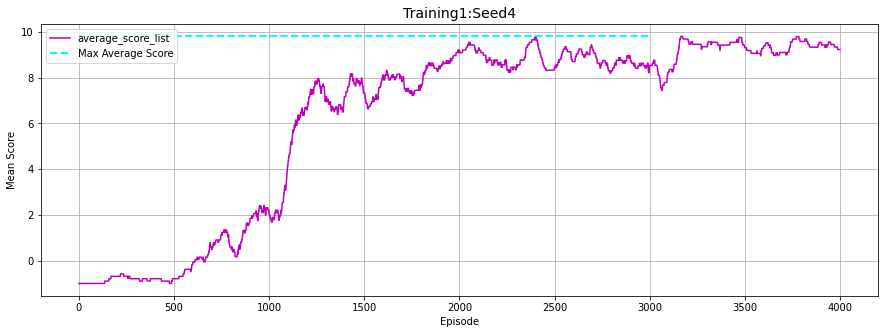

CPU times: user 34min 20s, sys: 2h 27min 24s, total: 3h 1min 45s
Wall time: 57min 1s


In [7]:
%%time

#Experiment done in 5 different seeds:
seed_number=5

for seed in range(seed_number):

    #Logged values


    scores = []
    step=[] 
    average_score_list=[]                                           #Saves last 100 average scores
    average_step_list=[]   
    scores_window = deque(maxlen=100)                               # Saves last 100 avarage solved steps
    step_window = deque(maxlen=100)                                 # last 100 scores

    #Hyperparamaters:

    n_episodes=4000
    max_t=500
    eps_start=1.0
    eps=eps_start
    eps_end=0.01 
    eps_decay=0.995


    #Call DQN function
    agent = DQN_Agent(state_size, action_size, seed=seed)
    env.reset()
    for episode in range(1,n_episodes+1):

        done=False
        #Reset environment for each episode:
        env.reset()
        #Get information from reset environment:
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        # get initial state of the unity environment
        state = decision_steps.obs[0]
        #Score list containing scores from each episode:
        score = 0
        mean_score=[]
        for i in range(max_t):


            action = agent.act(state, eps)        #action as numpy.int64
            action_fixed=np.array([[action]])
            action_tuple = ActionTuple()
            action_tuple.add_discrete(action_fixed)

            #Set action information
            env.set_actions(behavior_name,action_tuple)
            # Move the simulation forward
            env.step()
            # Get the new simulation results
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            # get the next states for each unity agent in the environment
            next_state = decision_steps.obs[0]

            # get the rewards for each unity agent in the environment
            rewards = decision_steps.reward

            #If episode dones:
            if(len(terminal_steps.reward)!=0):

                        done= True
                        rewards= terminal_steps.reward
                        next_state = terminal_steps.obs[0]




            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent.step(state, action, rewards, next_state,done)

            #New state is the next state:
            state = next_state

            #Iterate rewards on score
            score += rewards


            if rewards > 0:
                print("Task solved in step:",i)
                print("Score:",score)


            if done:

                break


        #Decrease epsilon parameter step by step:
        eps = max(eps_end, eps_decay*eps) 

        #Save last step
        step.append(i)
        # save last steps for window for average 100:        
        step_window.append(i)
        #Create list for avarge 100 scores
        average_step_list.append(np.mean(step_window))

        # save most recent score:
        scores.append(score)
        # save most recent score for window for average 100:        
        scores_window.append(score)  
        #Create list for avarge 100 scores
        average_score_list.append(np.mean(scores_window))



        print('\rEpisode {}\tAverage Score: {:.6f},\tAverage Step: {}'.format(episode, np.mean(scores_window),np.mean(step_window)), end="")
       
       
        if episode % 1000 == 0:
    
            if seed == 0:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train1_Seed0.pth')
            if seed == 1:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train1_Seed1.pth')
            if seed == 2:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train1_Seed2.pth')
            if seed == 3:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train1_Seed3.pth')

            if seed == 4:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train1_Seed4.pth')
                
                
                

    #Save datas per each seed
    score_shape=len(scores)
    df= pd.DataFrame(list(zip(np.array(scores).reshape(score_shape).tolist(), average_score_list, step,average_step_list)), columns= ['Scores','Mean_Scores','Completed_Steps','MeanCompleted_Steps'])
    df.to_csv('Train_1_Seed_'+str(seed)+'.csv')
    
    #Plot mean reward:
    color=["b","g","r","c","m"]
    plt.rcParams['figure.figsize'] = [15,5]
    plt.plot(np.arange(len(average_score_list)), average_score_list,label="average_score_list",color=color[seed])
    plt.hlines(y=max(average_score_list), xmin=0, xmax=3000, colors='aqua', linestyles='--', lw=2, label='Max Average Score')
    plt.xlabel('Episode', fontsize=10)
    plt.ylabel('Mean Score', fontsize=10)
    plt.title("Training1:Seed{}".format(seed),fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("Training1:Seed{}.png".format(seed))
    plt.show()
    
    



# Second training:Alternative 

In [9]:
env.close()

In [16]:
default_file="HER_3_no.app"
alternative_file="HER_3_no_alternate.app"
default_logged="HER_3_no_log.app"
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=alternative_file,worker_id=0,side_channels=[channel])
channel.set_configuration_parameters(time_scale = 100.0)
# get the behavior:
env.reset()
behavior_name = list(env.behavior_specs)[0]
print(behavior_name)
spec = env.behavior_specs[behavior_name]
# reset the environment
env.reset()
decision_steps, terminal_steps = env.get_steps(behavior_name)

for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")
    
action_size=branch_size    
print('Number of actions:', action_size)

# examine the state space 
state=decision_steps.obs[0][0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('States have length:', type(state))
env.reset()

HERTask_2?team=0
Action number 0 has 5 different options
Number of actions: 5
States look like: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.46935856 0.         1.
 0.         0.         0.         0.         0.         0.52897596
 0.         1.         0.         0.         0.         0.
 0.         0.5289759  0.         1.         0.         0.
 0.         0.         0.         0.707789   0.         1.
 0.        

Brain Loaded for Train_2 in seed: 0
Episode 44	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 405
Score: [9.188804]
Episode 55	Average Score: -0.814743,	Average Step: 497.29090909090914Task solved in step: 410
Score: [9.179003]
Episode 60	Average Score: -0.660531,	Average Step: 495.95830508474574Task solved in step: 486
Score: [9.027005]
Episode 73	Average Score: -0.583627,	Average Step: 496.31506849315077Task solved in step: 206
Score: [9.587799]
Episode 74	Average Score: -0.446175,	Average Step: 492.3918918918919Task solved in step: 373
Score: [9.252203]
Episode 75	Average Score: -0.316864,	Average Step: 490.8Task solved in step: 476
Score: [9.046605]
Episode 78	Average Score: -0.214335,	Average Step: 490.82051282051284Task solved in step: 177
Score: [9.6442]
Episode 79	Average Score: -0.089544,	Average Step: 486.8481012658228Task solved in step: 495
Score: [9.009206]
Episode 85	Average Score: -0.036056,	Average Step: 487.6588235294118Task solved in step: 223
Score

Episode 392	Average Score: 5.032889,	Average Step: 282.8Task solved in step: 27
Score: [9.944]
Episode 393	Average Score: 5.142329,	Average Step: 278.08Task solved in step: 23
Score: [9.952]
Episode 394	Average Score: 5.142789,	Average Step: 277.85Task solved in step: 82
Score: [9.835401]
Episode 396	Average Score: 5.146221,	Average Step: 276.14Task solved in step: 23
Score: [9.952999]
Episode 397	Average Score: 5.255751,	Average Step: 271.38Task solved in step: 18
Score: [9.9632]
Episode 398	Average Score: 5.258911,	Average Step: 269.8Task solved in step: 21
Score: [9.9564]
Episode 399	Average Score: 5.262269,	Average Step: 268.12Task solved in step: 37
Score: [9.9254]
Episode 401	Average Score: 5.152731,	Average Step: 272.88Task solved in step: 134
Score: [9.730599]
Episode 403	Average Score: 5.150920,	Average Step: 273.78Task solved in step: 105
Score: [9.7882]
Episode 405	Average Score: 5.258803,	Average Step: 269.84Task solved in step: 21
Score: [9.9574]
Episode 407	Average Score:

Episode 1261	Average Score: 2.861172,	Average Step: 368.55Task solved in step: 27
Score: [9.9454]
Episode 1264	Average Score: 2.970626,	Average Step: 363.83Task solved in step: 32
Score: [9.934999]
Episode 1265	Average Score: 3.079976,	Average Step: 359.16Task solved in step: 27
Score: [9.9454]
Episode 1266	Average Score: 3.189430,	Average Step: 354.44Task solved in step: 30
Score: [9.939799]
Episode 1267	Average Score: 3.298828,	Average Step: 349.75Task solved in step: 27
Score: [9.9454]
Episode 1268	Average Score: 3.408282,	Average Step: 345.03Task solved in step: 30
Score: [9.9388]
Episode 1269	Average Score: 3.517670,	Average Step: 340.34Task solved in step: 444
Score: [9.111605]
Episode 1270	Average Score: 3.618786,	Average Step: 339.79Task solved in step: 29
Score: [9.940201]
Episode 1271	Average Score: 3.728188,	Average Step: 335.09Task solved in step: 90
Score: [9.8182]
Episode 1272	Average Score: 3.729048,	Average Step: 334.66Task solved in step: 25
Score: [9.9482]
Episode 127

Episode 1374	Average Score: 6.942333,	Average Step: 178.14Task solved in step: 23
Score: [9.953199]
Episode 1375	Average Score: 6.942446,	Average Step: 178.08Task solved in step: 23
Score: [9.953199]
Episode 1376	Average Score: 6.942560,	Average Step: 178.02Task solved in step: 23
Score: [9.952801]
Episode 1377	Average Score: 6.942670,	Average Step: 177.96Task solved in step: 23
Score: [9.952801]
Episode 1378	Average Score: 6.942780,	Average Step: 177.9Task solved in step: 23
Score: [9.952801]
Episode 1379	Average Score: 7.052309,	Average Step: 173.14Task solved in step: 23
Score: [9.952801]
Episode 1380	Average Score: 7.052619,	Average Step: 172.98Task solved in step: 23
Score: [9.952801]
Episode 1381	Average Score: 7.052540,	Average Step: 173.02Task solved in step: 24
Score: [9.9508]
Episode 1382	Average Score: 7.052443,	Average Step: 173.07Task solved in step: 23
Score: [9.952801]
Episode 1383	Average Score: 7.052364,	Average Step: 173.11Task solved in step: 23
Score: [9.952801]
Epi

Episode 1548	Average Score: 9.503401,	Average Step: 47.68Task solved in step: 21
Score: [9.957]
Episode 1549	Average Score: 9.503462,	Average Step: 47.65Task solved in step: 24
Score: [9.951799]
Episode 1550	Average Score: 9.503362,	Average Step: 47.7Task solved in step: 24
Score: [9.951799]
Episode 1551	Average Score: 9.503353,	Average Step: 47.71Task solved in step: 33
Score: [9.9334]
Episode 1552	Average Score: 9.503248,	Average Step: 47.76Task solved in step: 22
Score: [9.9544]
Episode 1553	Average Score: 9.503210,	Average Step: 47.78Task solved in step: 22
Score: [9.9554]
Episode 1554	Average Score: 9.503237,	Average Step: 47.77Task solved in step: 20
Score: [9.9582]
Episode 1555	Average Score: 9.503291,	Average Step: 47.74Task solved in step: 20
Score: [9.9582]
Episode 1556	Average Score: 9.612872,	Average Step: 42.95Task solved in step: 20
Score: [9.9582]
Episode 1557	Average Score: 9.612872,	Average Step: 42.95Task solved in step: 21
Score: [9.9564]
Episode 1558	Average Score: 

Episode 1634	Average Score: 9.737450,	Average Step: 30.77Task solved in step: 18
Score: [9.9632]
Episode 1635	Average Score: 9.737555,	Average Step: 30.72Task solved in step: 18
Score: [9.9632]
Episode 1636	Average Score: 9.737658,	Average Step: 30.67Task solved in step: 18
Score: [9.9632]
Episode 1637	Average Score: 9.737761,	Average Step: 30.62Task solved in step: 18
Score: [9.9632]
Episode 1638	Average Score: 9.737865,	Average Step: 30.57Task solved in step: 20
Score: [9.9586]
Episode 1639	Average Score: 9.737953,	Average Step: 30.52Task solved in step: 20
Score: [9.9586]
Episode 1640	Average Score: 9.738011,	Average Step: 30.49Task solved in step: 20
Score: [9.9586]
Episode 1641	Average Score: 9.738070,	Average Step: 30.46Task solved in step: 18
Score: [9.9632]
Episode 1642	Average Score: 9.738173,	Average Step: 30.41Task solved in step: 18
Score: [9.9632]
Episode 1643	Average Score: 9.738277,	Average Step: 30.36Task solved in step: 18
Score: [9.9632]
Episode 1644	Average Score: 9.

Episode 1722	Average Score: 9.631910,	Average Step: 33.46Task solved in step: 19
Score: [9.9618]
Episode 1723	Average Score: 9.631896,	Average Step: 33.47Task solved in step: 19
Score: [9.9618]
Episode 1724	Average Score: 9.631883,	Average Step: 33.48Task solved in step: 19
Score: [9.9618]
Episode 1725	Average Score: 9.631914,	Average Step: 33.47Task solved in step: 19
Score: [9.9618]
Episode 1726	Average Score: 9.631908,	Average Step: 33.48Task solved in step: 19
Score: [9.9618]
Episode 1727	Average Score: 9.631903,	Average Step: 33.49Task solved in step: 19
Score: [9.9618]
Episode 1728	Average Score: 9.631888,	Average Step: 33.5Task solved in step: 21
Score: [9.9566]
Episode 1729	Average Score: 9.631879,	Average Step: 33.5Task solved in step: 19
Score: [9.9618]
Episode 1730	Average Score: 9.631872,	Average Step: 33.51Task solved in step: 19
Score: [9.9618]
Episode 1731	Average Score: 9.631908,	Average Step: 33.5Task solved in step: 19
Score: [9.9618]
Episode 1732	Average Score: 9.631

Episode 1808	Average Score: 9.849534,	Average Step: 24.88Task solved in step: 19
Score: [9.9618]
Episode 1809	Average Score: 9.849549,	Average Step: 24.88Task solved in step: 21
Score: [9.9566]
Episode 1810	Average Score: 9.849491,	Average Step: 24.91Task solved in step: 19
Score: [9.9618]
Episode 1811	Average Score: 9.849564,	Average Step: 24.88Task solved in step: 19
Score: [9.9618]
Episode 1812	Average Score: 9.849595,	Average Step: 24.87Task solved in step: 20
Score: [9.9596]
Episode 1813	Average Score: 9.849606,	Average Step: 24.87Task solved in step: 19
Score: [9.9618]
Episode 1814	Average Score: 9.849637,	Average Step: 24.86Task solved in step: 19
Score: [9.9618]
Episode 1815	Average Score: 9.849669,	Average Step: 24.85Task solved in step: 19
Score: [9.9618]
Episode 1816	Average Score: 9.849726,	Average Step: 24.83Task solved in step: 19
Score: [9.9618]
Episode 1817	Average Score: 9.849757,	Average Step: 24.82Task solved in step: 19
Score: [9.9618]
Episode 1818	Average Score: 9.

Episode 1979	Average Score: 9.740921,	Average Step: 29.28Task solved in step: 19
Score: [9.9618]
Episode 1980	Average Score: 9.740922,	Average Step: 29.28Task solved in step: 19
Score: [9.9618]
Episode 1981	Average Score: 9.740922,	Average Step: 29.28Task solved in step: 19
Score: [9.9618]
Episode 1982	Average Score: 9.740922,	Average Step: 29.28Task solved in step: 19
Score: [9.9618]
Episode 1983	Average Score: 9.741021,	Average Step: 29.23Task solved in step: 19
Score: [9.9618]
Episode 1984	Average Score: 9.850639,	Average Step: 24.43Task solved in step: 19
Score: [9.9618]
Episode 1985	Average Score: 9.850634,	Average Step: 24.44Task solved in step: 20
Score: [9.9592]
Episode 1986	Average Score: 9.850608,	Average Step: 24.45Task solved in step: 19
Score: [9.9618]
Episode 1987	Average Score: 9.850608,	Average Step: 24.45Task solved in step: 19
Score: [9.9618]
Episode 1988	Average Score: 9.850608,	Average Step: 24.45Task solved in step: 19
Score: [9.9618]
Episode 1989	Average Score: 9.

Episode 2063	Average Score: 9.960577,	Average Step: 19.49Task solved in step: 19
Score: [9.9618]
Episode 2064	Average Score: 9.960577,	Average Step: 19.49Task solved in step: 19
Score: [9.9618]
Episode 2065	Average Score: 9.960577,	Average Step: 19.49Task solved in step: 19
Score: [9.9618]
Episode 2066	Average Score: 9.960577,	Average Step: 19.49Task solved in step: 19
Score: [9.9618]
Episode 2067	Average Score: 9.960577,	Average Step: 19.49Task solved in step: 19
Score: [9.9618]
Episode 2068	Average Score: 9.960577,	Average Step: 19.49Task solved in step: 18
Score: [9.9623995]
Episode 2069	Average Score: 9.960584,	Average Step: 19.48Task solved in step: 19
Score: [9.9618]
Episode 2071	Average Score: 9.850965,	Average Step: 24.28Task solved in step: 18
Score: [9.9623995]
Episode 2072	Average Score: 9.850971,	Average Step: 24.27Task solved in step: 18
Score: [9.9623995]
Episode 2073	Average Score: 9.850978,	Average Step: 24.26Task solved in step: 20
Score: [9.9598]
Episode 2074	Average 

Episode 2232	Average Score: 9.844333,	Average Step: 27.24Task solved in step: 18
Score: [9.9623995]
Episode 2233	Average Score: 9.844333,	Average Step: 27.24Task solved in step: 18
Score: [9.9623995]
Episode 2234	Average Score: 9.851792,	Average Step: 23.51Task solved in step: 22
Score: [9.9544]
Episode 2235	Average Score: 9.851712,	Average Step: 23.55Task solved in step: 18
Score: [9.9623995]
Episode 2236	Average Score: 9.851712,	Average Step: 23.55Task solved in step: 18
Score: [9.9623995]
Episode 2237	Average Score: 9.851712,	Average Step: 23.55Task solved in step: 18
Score: [9.9623995]
Episode 2238	Average Score: 9.851713,	Average Step: 23.55Task solved in step: 18
Score: [9.9623995]
Episode 2239	Average Score: 9.851712,	Average Step: 23.55Task solved in step: 18
Score: [9.9623995]
Episode 2240	Average Score: 9.851712,	Average Step: 23.55Task solved in step: 18
Score: [9.9623995]
Episode 2241	Average Score: 9.851712,	Average Step: 23.55Task solved in step: 18
Score: [9.9623995]
Epi

Episode 2400	Average Score: 9.954243,	Average Step: 22.42Task solved in step: 18
Score: [9.9623995]
Episode 2401	Average Score: 9.954268,	Average Step: 22.4Task solved in step: 18
Score: [9.9623995]
Episode 2402	Average Score: 9.954294,	Average Step: 22.38Task solved in step: 18
Score: [9.9623995]
Episode 2403	Average Score: 9.954321,	Average Step: 22.36Task solved in step: 18
Score: [9.9623995]
Episode 2404	Average Score: 9.954347,	Average Step: 22.34Task solved in step: 22
Score: [9.9552]
Episode 2405	Average Score: 9.954301,	Average Step: 22.36Task solved in step: 21
Score: [9.957]
Episode 2406	Average Score: 9.954272,	Average Step: 22.37Task solved in step: 18
Score: [9.9623995]
Episode 2407	Average Score: 9.954299,	Average Step: 22.35Task solved in step: 18
Score: [9.9623995]
Episode 2408	Average Score: 9.954325,	Average Step: 22.33Task solved in step: 18
Score: [9.9623995]
Episode 2409	Average Score: 9.954350,	Average Step: 22.31Task solved in step: 20
Score: [9.9596]
Episode 241

Episode 2567	Average Score: 9.851721,	Average Step: 23.45Task solved in step: 20
Score: [9.9598]
Episode 2568	Average Score: 9.851696,	Average Step: 23.47Task solved in step: 18
Score: [9.9623995]
Episode 2569	Average Score: 9.851696,	Average Step: 23.47Task solved in step: 18
Score: [9.9623995]
Episode 2570	Average Score: 9.851696,	Average Step: 23.47Task solved in step: 19
Score: [9.9614]
Episode 2571	Average Score: 9.851686,	Average Step: 23.48Task solved in step: 18
Score: [9.9623995]
Episode 2572	Average Score: 9.851687,	Average Step: 23.48Task solved in step: 18
Score: [9.9623995]
Episode 2573	Average Score: 9.851687,	Average Step: 23.48Task solved in step: 18
Score: [9.9623995]
Episode 2574	Average Score: 9.851732,	Average Step: 23.45Task solved in step: 18
Score: [9.9623995]
Episode 2575	Average Score: 9.851732,	Average Step: 23.45Task solved in step: 18
Score: [9.9623995]
Episode 2576	Average Score: 9.851732,	Average Step: 23.45Task solved in step: 19
Score: [9.96]
Episode 257

Episode 2734	Average Score: 9.741716,	Average Step: 28.5Task solved in step: 26
Score: [9.9476]
Episode 2735	Average Score: 9.741569,	Average Step: 28.58Task solved in step: 18
Score: [9.9623995]
Episode 2736	Average Score: 9.741568,	Average Step: 28.58Task solved in step: 18
Score: [9.9623995]
Episode 2737	Average Score: 9.741609,	Average Step: 28.56Task solved in step: 18
Score: [9.9623995]
Episode 2738	Average Score: 9.741609,	Average Step: 28.56Task solved in step: 18
Score: [9.9623995]
Episode 2739	Average Score: 9.741609,	Average Step: 28.56Task solved in step: 18
Score: [9.9623995]
Episode 2740	Average Score: 9.741609,	Average Step: 28.56Task solved in step: 18
Score: [9.9623995]
Episode 2741	Average Score: 9.741609,	Average Step: 28.56Task solved in step: 18
Score: [9.9623995]
Episode 2742	Average Score: 9.741609,	Average Step: 28.56Task solved in step: 18
Score: [9.9623995]
Episode 2743	Average Score: 9.741629,	Average Step: 28.55Task solved in step: 18
Score: [9.9623995]
Epis

Episode 2820	Average Score: 9.844870,	Average Step: 27.19Task solved in step: 84
Score: [9.83]
Episode 2821	Average Score: 9.843592,	Average Step: 27.82Task solved in step: 21
Score: [9.9578]
Episode 2822	Average Score: 9.843592,	Average Step: 27.82Task solved in step: 65
Score: [9.8698]
Episode 2823	Average Score: 9.842711,	Average Step: 28.26Task solved in step: 29
Score: [9.9404]
Episode 2824	Average Score: 9.842537,	Average Step: 28.34Task solved in step: 21
Score: [9.9578]
Episode 2825	Average Score: 9.842492,	Average Step: 28.37Task solved in step: 28
Score: [9.9434]
Episode 2826	Average Score: 9.842301,	Average Step: 28.47Task solved in step: 21
Score: [9.9578]
Episode 2827	Average Score: 9.842256,	Average Step: 28.5Task solved in step: 21
Score: [9.9578]
Episode 2828	Average Score: 9.842210,	Average Step: 28.53Task solved in step: 22
Score: [9.954]
Episode 2829	Average Score: 9.842125,	Average Step: 28.57Task solved in step: 29
Score: [9.9404]
Episode 2830	Average Score: 9.8419

Episode 2906	Average Score: 9.950331,	Average Step: 24.43Task solved in step: 18
Score: [9.9632]
Episode 2907	Average Score: 9.950384,	Average Step: 24.4Task solved in step: 18
Score: [9.9632]
Episode 2908	Average Score: 9.950438,	Average Step: 24.37Task solved in step: 21
Score: [9.9578]
Episode 2909	Average Score: 9.950438,	Average Step: 24.37Task solved in step: 18
Score: [9.9632]
Episode 2910	Average Score: 9.950493,	Average Step: 24.34Task solved in step: 18
Score: [9.9632]
Episode 2911	Average Score: 9.950547,	Average Step: 24.31Task solved in step: 18
Score: [9.9632]
Episode 2912	Average Score: 9.950602,	Average Step: 24.28Task solved in step: 18
Score: [9.9632]
Episode 2913	Average Score: 9.950655,	Average Step: 24.25Task solved in step: 22
Score: [9.955]
Episode 2914	Average Score: 9.950627,	Average Step: 24.26Task solved in step: 18
Score: [9.9632]
Episode 2915	Average Score: 9.950681,	Average Step: 24.23Task solved in step: 18
Score: [9.9632]
Episode 2916	Average Score: 9.95

Episode 2991	Average Score: 9.951779,	Average Step: 23.61Task solved in step: 22
Score: [9.954801]
Episode 2992	Average Score: 9.951695,	Average Step: 23.65Task solved in step: 22
Score: [9.954801]
Episode 2993	Average Score: 9.951612,	Average Step: 23.69Task solved in step: 22
Score: [9.954801]
Episode 2994	Average Score: 9.951593,	Average Step: 23.7Task solved in step: 22
Score: [9.954801]
Episode 2995	Average Score: 9.951509,	Average Step: 23.74Task solved in step: 20
Score: [9.958]
Episode 2996	Average Score: 9.951457,	Average Step: 23.76Task solved in step: 22
Score: [9.954801]
Episode 2997	Average Score: 9.951373,	Average Step: 23.8Task solved in step: 25
Score: [9.9488]
Episode 2998	Average Score: 9.951229,	Average Step: 23.87Task solved in step: 25
Score: [9.9488]
Episode 2999	Average Score: 9.951086,	Average Step: 23.94Task solved in step: 25
Score: [9.9488]
Episode 3000	Average Score: 9.950941,	Average Step: 24.01Brain Saved for Train_2 in episode: 3000 in seed 0
Task solved 

Episode 3077	Average Score: 9.956222,	Average Step: 21.32Task solved in step: 20
Score: [9.9588]
Episode 3078	Average Score: 9.956322,	Average Step: 21.27Task solved in step: 20
Score: [9.9588]
Episode 3079	Average Score: 9.956422,	Average Step: 21.22Task solved in step: 20
Score: [9.9588]
Episode 3080	Average Score: 9.956522,	Average Step: 21.17Task solved in step: 20
Score: [9.9586]
Episode 3081	Average Score: 9.956620,	Average Step: 21.12Task solved in step: 20
Score: [9.9586]
Episode 3082	Average Score: 9.956718,	Average Step: 21.07Task solved in step: 22
Score: [9.9554]
Episode 3083	Average Score: 9.956726,	Average Step: 21.07Task solved in step: 22
Score: [9.9554]
Episode 3084	Average Score: 9.956708,	Average Step: 21.08Task solved in step: 25
Score: [9.9496]
Episode 3085	Average Score: 9.956626,	Average Step: 21.12Task solved in step: 22
Score: [9.9554]
Episode 3086	Average Score: 9.956608,	Average Step: 21.13Task solved in step: 24
Score: [9.9512]
Episode 3087	Average Score: 9.

Episode 3245	Average Score: 9.960672,	Average Step: 19.22Task solved in step: 18
Score: [9.9632]
Episode 3246	Average Score: 9.960793,	Average Step: 19.16Task solved in step: 18
Score: [9.9632]
Episode 3247	Average Score: 9.960838,	Average Step: 19.14Task solved in step: 18
Score: [9.9632]
Episode 3248	Average Score: 9.960838,	Average Step: 19.14Task solved in step: 18
Score: [9.9632]
Episode 3249	Average Score: 9.960958,	Average Step: 19.08Task solved in step: 18
Score: [9.9632]
Episode 3250	Average Score: 9.961079,	Average Step: 19.02Task solved in step: 18
Score: [9.9632]
Episode 3251	Average Score: 9.961199,	Average Step: 18.96Task solved in step: 18
Score: [9.9632]
Episode 3252	Average Score: 9.961318,	Average Step: 18.9Task solved in step: 18
Score: [9.9632]
Episode 3253	Average Score: 9.961438,	Average Step: 18.84Task solved in step: 18
Score: [9.9632]
Episode 3254	Average Score: 9.961558,	Average Step: 18.78Task solved in step: 18
Score: [9.9632]
Episode 3255	Average Score: 9.9

Episode 3415	Average Score: 9.962190,	Average Step: 18.49Task solved in step: 18
Score: [9.9632]
Episode 3416	Average Score: 9.962191,	Average Step: 18.49Task solved in step: 18
Score: [9.9632]
Episode 3417	Average Score: 9.962190,	Average Step: 18.49Task solved in step: 18
Score: [9.9632]
Episode 3418	Average Score: 9.962191,	Average Step: 18.49Task solved in step: 18
Score: [9.9632]
Episode 3419	Average Score: 9.962190,	Average Step: 18.49Task solved in step: 18
Score: [9.9632]
Episode 3420	Average Score: 9.962191,	Average Step: 18.49Task solved in step: 18
Score: [9.9632]
Episode 3421	Average Score: 9.962238,	Average Step: 18.47Task solved in step: 18
Score: [9.9632]
Episode 3422	Average Score: 9.962238,	Average Step: 18.47Task solved in step: 18
Score: [9.9632]
Episode 3423	Average Score: 9.962238,	Average Step: 18.47Task solved in step: 18
Score: [9.9632]
Episode 3424	Average Score: 9.962238,	Average Step: 18.47Task solved in step: 18
Score: [9.9632]
Episode 3425	Average Score: 9.

Episode 3500	Average Score: 9.961961,	Average Step: 18.58Task solved in step: 18
Score: [9.9632]
Episode 3501	Average Score: 9.961961,	Average Step: 18.58Task solved in step: 18
Score: [9.9632]
Episode 3502	Average Score: 9.961961,	Average Step: 18.58Task solved in step: 21
Score: [9.9568]
Episode 3503	Average Score: 9.961896,	Average Step: 18.61Task solved in step: 18
Score: [9.9632]
Episode 3504	Average Score: 9.961910,	Average Step: 18.6Task solved in step: 18
Score: [9.9632]
Episode 3505	Average Score: 9.961910,	Average Step: 18.6Task solved in step: 18
Score: [9.9632]
Episode 3506	Average Score: 9.961910,	Average Step: 18.6Task solved in step: 18
Score: [9.9632]
Episode 3507	Average Score: 9.961910,	Average Step: 18.6Task solved in step: 18
Score: [9.9632]
Episode 3508	Average Score: 9.961972,	Average Step: 18.57Task solved in step: 18
Score: [9.9632]
Episode 3509	Average Score: 9.961972,	Average Step: 18.57Task solved in step: 18
Score: [9.9632]
Episode 3510	Average Score: 9.9619

Episode 3670	Average Score: 9.851982,	Average Step: 23.58Task solved in step: 18
Score: [9.9632]
Episode 3671	Average Score: 9.851982,	Average Step: 23.58Task solved in step: 18
Score: [9.9632]
Episode 3672	Average Score: 9.851982,	Average Step: 23.58Task solved in step: 21
Score: [9.957]
Episode 3673	Average Score: 9.851920,	Average Step: 23.61Task solved in step: 18
Score: [9.9632]
Episode 3674	Average Score: 9.851920,	Average Step: 23.61Task solved in step: 18
Score: [9.9632]
Episode 3675	Average Score: 9.851920,	Average Step: 23.61Task solved in step: 18
Score: [9.9632]
Episode 3676	Average Score: 9.851920,	Average Step: 23.61Task solved in step: 18
Score: [9.9632]
Episode 3677	Average Score: 9.851921,	Average Step: 23.61Task solved in step: 18
Score: [9.9632]
Episode 3678	Average Score: 9.961553,	Average Step: 18.8Task solved in step: 18
Score: [9.9632]
Episode 3679	Average Score: 9.961628,	Average Step: 18.76Task solved in step: 18
Score: [9.9632]
Episode 3680	Average Score: 9.96

Episode 3756	Average Score: 9.960782,	Average Step: 19.17Task solved in step: 18
Score: [9.9632]
Episode 3757	Average Score: 9.960782,	Average Step: 19.17Task solved in step: 18
Score: [9.9632]
Episode 3758	Average Score: 9.960782,	Average Step: 19.17Task solved in step: 18
Score: [9.9632]
Episode 3759	Average Score: 9.960782,	Average Step: 19.17Task solved in step: 18
Score: [9.9632]
Episode 3760	Average Score: 9.960782,	Average Step: 19.17Task solved in step: 18
Score: [9.9632]
Episode 3761	Average Score: 9.960782,	Average Step: 19.17Task solved in step: 18
Score: [9.9632]
Episode 3762	Average Score: 9.961161,	Average Step: 18.98Task solved in step: 18
Score: [9.9632]
Episode 3763	Average Score: 9.961161,	Average Step: 18.98Task solved in step: 18
Score: [9.9632]
Episode 3764	Average Score: 9.961161,	Average Step: 18.98Task solved in step: 18
Score: [9.9632]
Episode 3765	Average Score: 9.961161,	Average Step: 18.98Task solved in step: 18
Score: [9.9632]
Episode 3766	Average Score: 9.

Episode 3842	Average Score: 9.962486,	Average Step: 18.33Task solved in step: 18
Score: [9.9632]
Episode 3843	Average Score: 9.962486,	Average Step: 18.33Task solved in step: 18
Score: [9.9632]
Episode 3844	Average Score: 9.962486,	Average Step: 18.33Task solved in step: 18
Score: [9.9632]
Episode 3845	Average Score: 9.962486,	Average Step: 18.33Task solved in step: 18
Score: [9.9632]
Episode 3846	Average Score: 9.962534,	Average Step: 18.31Task solved in step: 18
Score: [9.9632]
Episode 3847	Average Score: 9.962534,	Average Step: 18.31Task solved in step: 18
Score: [9.9632]
Episode 3848	Average Score: 9.962534,	Average Step: 18.31Task solved in step: 18
Score: [9.9632]
Episode 3849	Average Score: 9.962534,	Average Step: 18.31Task solved in step: 18
Score: [9.9632]
Episode 3850	Average Score: 9.962543,	Average Step: 18.31Task solved in step: 18
Score: [9.9632]
Episode 3851	Average Score: 9.962554,	Average Step: 18.31Task solved in step: 18
Score: [9.9632]
Episode 3852	Average Score: 9.

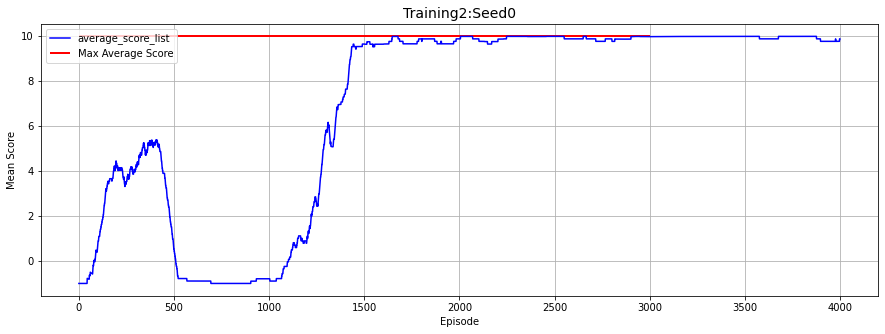

Brain Loaded for Train_2 in seed: 1
Episode 65	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 194
Score: [9.610999]
Episode 100	Average Score: -0.893884,	Average Step: 495.9519191919194Task solved in step: 111
Score: [9.7766]
Episode 255	Average Score: -0.999994,	Average Step: 499.02Task solved in step: 195
Score: [9.608399]
Episode 258	Average Score: -0.893910,	Average Step: 495.96Task solved in step: 449
Score: [9.101604]
Episode 277	Average Score: -0.792894,	Average Step: 495.46Task solved in step: 432
Score: [9.135804]
Episode 281	Average Score: -0.691536,	Average Step: 494.79Task solved in step: 487
Score: [9.024206]
Episode 316	Average Score: -0.591294,	Average Step: 494.67Task solved in step: 434
Score: [9.130204]
Episode 352	Average Score: -0.489992,	Average Step: 494.02Task solved in step: 335
Score: [9.328002]
Episode 359	Average Score: -0.593812,	Average Step: 495.92Task solved in step: 471
Score: [9.057606]
Episode 367	Average Score: -0.493236,	Average St

Episode 1175	Average Score: 1.540700,	Average Step: 428.74Task solved in step: 201
Score: [9.596999]
Episode 1184	Average Score: 1.432704,	Average Step: 432.73Task solved in step: 190
Score: [9.6192]
Episode 1193	Average Score: 1.431552,	Average Step: 433.31Task solved in step: 119
Score: [9.7602005]
Episode 1195	Average Score: 1.539154,	Average Step: 429.51Task solved in step: 37
Score: [9.925799]
Episode 1197	Average Score: 1.648412,	Average Step: 424.89Task solved in step: 389
Score: [9.221003]
Episode 1201	Average Score: 1.750622,	Average Step: 423.79Task solved in step: 168
Score: [9.663799]
Episode 1202	Average Score: 1.857260,	Average Step: 420.48Task solved in step: 34
Score: [9.93]
Episode 1203	Average Score: 1.863726,	Average Step: 417.24Task solved in step: 34
Score: [9.93]
Episode 1204	Average Score: 1.973026,	Average Step: 412.59Task solved in step: 38
Score: [9.9234]
Episode 1206	Average Score: 2.082260,	Average Step: 407.98Task solved in step: 250
Score: [9.498199]
Episo

Episode 1416	Average Score: 6.690907,	Average Step: 203.93Task solved in step: 33
Score: [9.9322]
Episode 1418	Average Score: 6.582076,	Average Step: 208.34Task solved in step: 26
Score: [9.9478]
Episode 1419	Average Score: 6.691554,	Average Step: 203.61Task solved in step: 36
Score: [9.9278]
Episode 1420	Average Score: 6.696498,	Average Step: 201.14Task solved in step: 60
Score: [9.878201]
Episode 1421	Average Score: 6.700294,	Average Step: 199.24Task solved in step: 29
Score: [9.941601]
Episode 1423	Average Score: 6.591805,	Average Step: 203.48Task solved in step: 24
Score: [9.9514]
Episode 1424	Average Score: 6.600366,	Average Step: 199.2Task solved in step: 44
Score: [9.91]
Episode 1425	Average Score: 6.709466,	Average Step: 194.65Task solved in step: 420
Score: [9.158204]
Episode 1426	Average Score: 6.701735,	Average Step: 198.51Task solved in step: 61
Score: [9.8772]
Episode 1427	Average Score: 6.701026,	Average Step: 198.87Task solved in step: 33
Score: [9.932]
Episode 1428	Aver

Episode 1511	Average Score: 8.349585,	Average Step: 124.67Task solved in step: 24
Score: [9.951799]
Episode 1512	Average Score: 8.350776,	Average Step: 124.08Task solved in step: 26
Score: [9.947]
Episode 1513	Average Score: 8.351068,	Average Step: 123.93Task solved in step: 26
Score: [9.947]
Episode 1514	Average Score: 8.460539,	Average Step: 119.2Task solved in step: 65
Score: [9.868]
Episode 1515	Average Score: 8.569218,	Average Step: 114.86Task solved in step: 29
Score: [9.941401]
Episode 1516	Average Score: 8.569145,	Average Step: 114.9Task solved in step: 24
Score: [9.951799]
Episode 1517	Average Score: 8.569340,	Average Step: 114.81Task solved in step: 24
Score: [9.951799]
Episode 1518	Average Score: 8.678858,	Average Step: 110.06Task solved in step: 19
Score: [9.9612]
Episode 1519	Average Score: 8.678991,	Average Step: 109.99Task solved in step: 24
Score: [9.951799]
Episode 1520	Average Score: 8.679233,	Average Step: 109.87Task solved in step: 311
Score: [9.377001]
Episode 1521

Episode 1681	Average Score: 9.829082,	Average Step: 35.02Task solved in step: 91
Score: [9.8178]
Episode 1682	Average Score: 9.827743,	Average Step: 35.69Task solved in step: 19
Score: [9.9604]
Episode 1683	Average Score: 9.827828,	Average Step: 35.64Task solved in step: 26
Score: [9.9464]
Episode 1684	Average Score: 9.827819,	Average Step: 35.64Task solved in step: 20
Score: [9.9594]
Episode 1685	Average Score: 9.828091,	Average Step: 35.51Task solved in step: 20
Score: [9.9594]
Episode 1686	Average Score: 9.828167,	Average Step: 35.47Task solved in step: 20
Score: [9.9594]
Episode 1687	Average Score: 9.828243,	Average Step: 35.43Task solved in step: 27
Score: [9.9456005]
Episode 1688	Average Score: 9.828181,	Average Step: 35.46Task solved in step: 25
Score: [9.9494]
Episode 1689	Average Score: 9.828231,	Average Step: 35.44Task solved in step: 52
Score: [9.8942]
Episode 1690	Average Score: 9.827703,	Average Step: 35.7Task solved in step: 34
Score: [9.93]
Episode 1691	Average Score: 9.

Episode 1851	Average Score: 9.833722,	Average Step: 32.59Task solved in step: 20
Score: [9.9592]
Episode 1852	Average Score: 9.833768,	Average Step: 32.57Task solved in step: 20
Score: [9.9592]
Episode 1853	Average Score: 9.833756,	Average Step: 32.58Task solved in step: 20
Score: [9.9592]
Episode 1854	Average Score: 9.835255,	Average Step: 31.83Task solved in step: 20
Score: [9.9592]
Episode 1855	Average Score: 9.835242,	Average Step: 31.84Task solved in step: 19
Score: [9.9604]
Episode 1856	Average Score: 9.835242,	Average Step: 31.84Task solved in step: 19
Score: [9.9604]
Episode 1857	Average Score: 9.835241,	Average Step: 31.84Task solved in step: 27
Score: [9.9446]
Episode 1858	Average Score: 9.835083,	Average Step: 31.92Task solved in step: 20
Score: [9.9592]
Episode 1859	Average Score: 9.835071,	Average Step: 31.93Task solved in step: 20
Score: [9.9592]
Episode 1860	Average Score: 9.835059,	Average Step: 31.94Task solved in step: 22
Score: [9.955]
Episode 1861	Average Score: 9.8

Episode 1937	Average Score: 9.836206,	Average Step: 31.47Task solved in step: 20
Score: [9.9592]
Episode 1938	Average Score: 9.836384,	Average Step: 31.38Task solved in step: 20
Score: [9.9592]
Episode 1939	Average Score: 9.836384,	Average Step: 31.38Task solved in step: 20
Score: [9.9592]
Episode 1940	Average Score: 9.836514,	Average Step: 31.32Task solved in step: 20
Score: [9.9592]
Episode 1941	Average Score: 9.836514,	Average Step: 31.32Task solved in step: 20
Score: [9.9592]
Episode 1942	Average Score: 9.836514,	Average Step: 31.32Task solved in step: 20
Score: [9.9592]
Episode 1943	Average Score: 9.836538,	Average Step: 31.31Task solved in step: 20
Score: [9.9592]
Episode 1944	Average Score: 9.836538,	Average Step: 31.31Task solved in step: 20
Score: [9.9592]
Episode 1945	Average Score: 9.836538,	Average Step: 31.31Task solved in step: 20
Score: [9.9592]
Episode 1946	Average Score: 9.836538,	Average Step: 31.31Task solved in step: 20
Score: [9.9592]
Episode 1947	Average Score: 9.

Episode 2026	Average Score: 9.409052,	Average Step: 45.02Task solved in step: 25
Score: [9.9484]
Episode 2027	Average Score: 9.408943,	Average Step: 45.07Task solved in step: 25
Score: [9.9494]
Episode 2028	Average Score: 9.408846,	Average Step: 45.12Task solved in step: 25
Score: [9.9498]
Episode 2029	Average Score: 9.408751,	Average Step: 45.17Task solved in step: 24
Score: [9.9516]
Episode 2030	Average Score: 9.408676,	Average Step: 45.21Task solved in step: 23
Score: [9.953199]
Episode 2031	Average Score: 9.408616,	Average Step: 45.24Task solved in step: 23
Score: [9.953199]
Episode 2032	Average Score: 9.408555,	Average Step: 45.27Task solved in step: 23
Score: [9.953199]
Episode 2033	Average Score: 9.408497,	Average Step: 45.3Task solved in step: 24
Score: [9.950999]
Episode 2034	Average Score: 9.408415,	Average Step: 45.34Task solved in step: 27
Score: [9.944]
Episode 2035	Average Score: 9.408338,	Average Step: 45.37Task solved in step: 26
Score: [9.946]
Episode 2036	Average Scor

Episode 2199	Average Score: 9.726378,	Average Step: 36.28Task solved in step: 23
Score: [9.952999]
Episode 2200	Average Score: 9.726460,	Average Step: 36.24Task solved in step: 24
Score: [9.9506]
Episode 2201	Average Score: 9.726460,	Average Step: 36.24Task solved in step: 24
Score: [9.9506]
Episode 2202	Average Score: 9.726451,	Average Step: 36.24Task solved in step: 21
Score: [9.956]
Episode 2203	Average Score: 9.726494,	Average Step: 36.21Task solved in step: 24
Score: [9.9506]
Episode 2204	Average Score: 9.726484,	Average Step: 36.21Task solved in step: 24
Score: [9.9506]
Episode 2205	Average Score: 9.726543,	Average Step: 36.18Task solved in step: 25
Score: [9.9496]
Episode 2206	Average Score: 9.726590,	Average Step: 36.16Task solved in step: 25
Score: [9.9496]
Episode 2207	Average Score: 9.726570,	Average Step: 36.17Task solved in step: 24
Score: [9.9514]
Episode 2208	Average Score: 9.726892,	Average Step: 36.01Task solved in step: 23
Score: [9.952999]
Episode 2209	Average Score:

Episode 2284	Average Score: 9.839819,	Average Step: 29.52Task solved in step: 24
Score: [9.9506]
Episode 2285	Average Score: 9.840010,	Average Step: 29.42Task solved in step: 24
Score: [9.9506]
Episode 2286	Average Score: 9.840000,	Average Step: 29.42Task solved in step: 24
Score: [9.9506]
Episode 2287	Average Score: 9.840039,	Average Step: 29.4Task solved in step: 23
Score: [9.952999]
Episode 2288	Average Score: 9.840063,	Average Step: 29.39Task solved in step: 23
Score: [9.952999]
Episode 2289	Average Score: 9.840113,	Average Step: 29.37Task solved in step: 23
Score: [9.952999]
Episode 2290	Average Score: 9.840427,	Average Step: 29.21Task solved in step: 24
Score: [9.9506]
Episode 2291	Average Score: 9.840445,	Average Step: 29.2Task solved in step: 24
Score: [9.9506]
Episode 2292	Average Score: 9.840421,	Average Step: 29.21Task solved in step: 26
Score: [9.9478]
Episode 2293	Average Score: 9.840368,	Average Step: 29.24Task solved in step: 24
Score: [9.9506]
Episode 2294	Average Score

Episode 2370	Average Score: 9.838284,	Average Step: 30.32Task solved in step: 23
Score: [9.952999]
Episode 2371	Average Score: 9.838284,	Average Step: 30.32Task solved in step: 23
Score: [9.952999]
Episode 2372	Average Score: 9.838284,	Average Step: 30.32Task solved in step: 23
Score: [9.952999]
Episode 2373	Average Score: 9.838315,	Average Step: 30.3Task solved in step: 23
Score: [9.952999]
Episode 2374	Average Score: 9.838340,	Average Step: 30.29Task solved in step: 26
Score: [9.9466]
Episode 2375	Average Score: 9.838300,	Average Step: 30.31Task solved in step: 23
Score: [9.952999]
Episode 2376	Average Score: 9.838324,	Average Step: 30.3Task solved in step: 23
Score: [9.952999]
Episode 2377	Average Score: 9.838347,	Average Step: 30.29Task solved in step: 23
Score: [9.952999]
Episode 2378	Average Score: 9.838272,	Average Step: 30.33Task solved in step: 23
Score: [9.952999]
Episode 2379	Average Score: 9.838196,	Average Step: 30.37Task solved in step: 23
Score: [9.952999]
Episode 2380	A

Episode 2454	Average Score: 9.951137,	Average Step: 23.92Task solved in step: 23
Score: [9.9524]
Episode 2455	Average Score: 9.951137,	Average Step: 23.92Task solved in step: 24
Score: [9.9514]
Episode 2456	Average Score: 9.951120,	Average Step: 23.93Task solved in step: 23
Score: [9.9524]
Episode 2457	Average Score: 9.951115,	Average Step: 23.93Task solved in step: 23
Score: [9.952999]
Episode 2458	Average Score: 9.951115,	Average Step: 23.93Task solved in step: 23
Score: [9.952999]
Episode 2459	Average Score: 9.951115,	Average Step: 23.93Task solved in step: 23
Score: [9.9524]
Episode 2460	Average Score: 9.951108,	Average Step: 23.93Task solved in step: 23
Score: [9.9524]
Episode 2461	Average Score: 9.951102,	Average Step: 23.93Task solved in step: 23
Score: [9.952999]
Episode 2463	Average Score: 9.841572,	Average Step: 28.69Task solved in step: 23
Score: [9.952999]
Episode 2464	Average Score: 9.841657,	Average Step: 28.65Task solved in step: 23
Score: [9.952999]
Episode 2465	Average

Episode 2539	Average Score: 9.831972,	Average Step: 33.44Task solved in step: 20
Score: [9.959]
Episode 2540	Average Score: 9.832031,	Average Step: 33.41Task solved in step: 25
Score: [9.9492]
Episode 2541	Average Score: 9.831994,	Average Step: 33.43Task solved in step: 25
Score: [9.9492]
Episode 2542	Average Score: 9.831966,	Average Step: 33.45Task solved in step: 27
Score: [9.9452]
Episode 2543	Average Score: 9.831898,	Average Step: 33.49Task solved in step: 20
Score: [9.9592]
Episode 2544	Average Score: 9.832017,	Average Step: 33.43Task solved in step: 20
Score: [9.9592]
Episode 2545	Average Score: 9.832079,	Average Step: 33.4Task solved in step: 20
Score: [9.9592]
Episode 2546	Average Score: 9.832141,	Average Step: 33.37Task solved in step: 20
Score: [9.9592]
Episode 2547	Average Score: 9.832203,	Average Step: 33.34Task solved in step: 20
Score: [9.9592]
Episode 2548	Average Score: 9.832266,	Average Step: 33.31Task solved in step: 24
Score: [9.9516]
Episode 2549	Average Score: 9.83

Episode 2623	Average Score: 9.950181,	Average Step: 24.37Task solved in step: 23
Score: [9.9526005]
Episode 2624	Average Score: 9.950177,	Average Step: 24.37Task solved in step: 23
Score: [9.952999]
Episode 2625	Average Score: 9.952765,	Average Step: 23.08Task solved in step: 23
Score: [9.952999]
Episode 2626	Average Score: 9.952765,	Average Step: 23.08Task solved in step: 23
Score: [9.9526005]
Episode 2627	Average Score: 9.952762,	Average Step: 23.08Task solved in step: 23
Score: [9.9526005]
Episode 2628	Average Score: 9.952813,	Average Step: 23.05Task solved in step: 23
Score: [9.9526005]
Episode 2629	Average Score: 9.952808,	Average Step: 23.05Task solved in step: 24
Score: [9.9516]
Episode 2630	Average Score: 9.952795,	Average Step: 23.06Task solved in step: 23
Score: [9.9526005]
Episode 2631	Average Score: 9.952890,	Average Step: 23.01Task solved in step: 19
Score: [9.96]
Episode 2632	Average Score: 9.953079,	Average Step: 22.91Task solved in step: 23
Score: [9.952999]
Episode 263

Episode 2707	Average Score: 9.952329,	Average Step: 23.22Task solved in step: 23
Score: [9.9526005]
Episode 2708	Average Score: 9.952376,	Average Step: 23.19Task solved in step: 23
Score: [9.9526005]
Episode 2709	Average Score: 9.952376,	Average Step: 23.19Task solved in step: 23
Score: [9.9526005]
Episode 2710	Average Score: 9.952374,	Average Step: 23.19Task solved in step: 23
Score: [9.9526005]
Episode 2711	Average Score: 9.952368,	Average Step: 23.19Task solved in step: 23
Score: [9.9526005]
Episode 2712	Average Score: 9.952365,	Average Step: 23.19Task solved in step: 23
Score: [9.9526005]
Episode 2713	Average Score: 9.952361,	Average Step: 23.19Task solved in step: 25
Score: [9.948]
Episode 2714	Average Score: 9.952315,	Average Step: 23.21Task solved in step: 23
Score: [9.9526005]
Episode 2715	Average Score: 9.952315,	Average Step: 23.21Task solved in step: 23
Score: [9.9526005]
Episode 2716	Average Score: 9.952315,	Average Step: 23.21Task solved in step: 23
Score: [9.9526005]
Epis

Episode 2791	Average Score: 9.951583,	Average Step: 23.55Task solved in step: 23
Score: [9.9526005]
Episode 2792	Average Score: 9.951583,	Average Step: 23.55Task solved in step: 23
Score: [9.9526005]
Episode 2793	Average Score: 9.951583,	Average Step: 23.55Task solved in step: 23
Score: [9.9526005]
Episode 2794	Average Score: 9.951583,	Average Step: 23.55Task solved in step: 25
Score: [9.9482]
Episode 2795	Average Score: 9.951534,	Average Step: 23.57Task solved in step: 28
Score: [9.942]
Episode 2796	Average Score: 9.951694,	Average Step: 23.49Task solved in step: 23
Score: [9.9526005]
Episode 2797	Average Score: 9.951694,	Average Step: 23.49Task solved in step: 25
Score: [9.9486]
Episode 2798	Average Score: 9.951656,	Average Step: 23.51Task solved in step: 29
Score: [9.941601]
Episode 2799	Average Score: 9.951546,	Average Step: 23.57Task solved in step: 25
Score: [9.9486]
Episode 2800	Average Score: 9.951506,	Average Step: 23.59Task solved in step: 25
Score: [9.9486]
Episode 2801	Aver

Episode 2874	Average Score: 9.952246,	Average Step: 23.22Task solved in step: 23
Score: [9.9526005]
Episode 2875	Average Score: 9.952289,	Average Step: 23.2Task solved in step: 26
Score: [9.9464]
Episode 2876	Average Score: 9.952269,	Average Step: 23.21Task solved in step: 19
Score: [9.9604]
Episode 2877	Average Score: 9.952347,	Average Step: 23.17Task solved in step: 23
Score: [9.952999]
Episode 2878	Average Score: 9.952351,	Average Step: 23.17Task solved in step: 23
Score: [9.952999]
Episode 2879	Average Score: 9.952355,	Average Step: 23.17Task solved in step: 23
Score: [9.952999]
Episode 2880	Average Score: 9.952359,	Average Step: 23.17Task solved in step: 23
Score: [9.9526005]
Episode 2881	Average Score: 9.952412,	Average Step: 23.14Task solved in step: 23
Score: [9.9526005]
Episode 2882	Average Score: 9.952411,	Average Step: 23.14Task solved in step: 23
Score: [9.9526005]
Episode 2883	Average Score: 9.952609,	Average Step: 23.04Task solved in step: 23
Score: [9.9526005]
Episode 28

Episode 2958	Average Score: 9.954633,	Average Step: 22.0Task solved in step: 23
Score: [9.9526005]
Episode 2959	Average Score: 9.954629,	Average Step: 22.0Task solved in step: 23
Score: [9.9526005]
Episode 2960	Average Score: 9.954624,	Average Step: 22.0Task solved in step: 23
Score: [9.9526005]
Episode 2961	Average Score: 9.954621,	Average Step: 22.0Task solved in step: 20
Score: [9.9592]
Episode 2962	Average Score: 9.954721,	Average Step: 21.95Task solved in step: 20
Score: [9.9588]
Episode 2963	Average Score: 9.954721,	Average Step: 21.95Task solved in step: 20
Score: [9.9592]
Episode 2964	Average Score: 9.954709,	Average Step: 21.96Task solved in step: 23
Score: [9.9526005]
Episode 2965	Average Score: 9.954633,	Average Step: 22.0Task solved in step: 23
Score: [9.9526005]
Episode 2966	Average Score: 9.954554,	Average Step: 22.04Task solved in step: 19
Score: [9.9604]
Episode 2967	Average Score: 9.954632,	Average Step: 22.0Task solved in step: 19
Score: [9.9604]
Episode 2968	Average 

Episode 3042	Average Score: 9.955783,	Average Step: 21.52Task solved in step: 23
Score: [9.952999]
Episode 3043	Average Score: 9.955786,	Average Step: 21.52Task solved in step: 18
Score: [9.9623995]
Episode 3044	Average Score: 9.955884,	Average Step: 21.47Task solved in step: 22
Score: [9.9558]
Episode 3045	Average Score: 9.955915,	Average Step: 21.46Task solved in step: 23
Score: [9.952999]
Episode 3046	Average Score: 9.955919,	Average Step: 21.46Task solved in step: 23
Score: [9.952999]
Episode 3047	Average Score: 9.955924,	Average Step: 21.46Task solved in step: 20
Score: [9.9592]
Episode 3048	Average Score: 9.955990,	Average Step: 21.43Task solved in step: 20
Score: [9.9592]
Episode 3049	Average Score: 9.956095,	Average Step: 21.38Task solved in step: 18
Score: [9.9623995]
Episode 3050	Average Score: 9.956192,	Average Step: 21.33Task solved in step: 23
Score: [9.952999]
Episode 3051	Average Score: 9.956196,	Average Step: 21.33Task solved in step: 20
Score: [9.9592]
Episode 3052	Ave

Episode 3127	Average Score: 9.847712,	Average Step: 25.64Task solved in step: 20
Score: [9.9592]
Episode 3128	Average Score: 9.847700,	Average Step: 25.65Task solved in step: 23
Score: [9.9538]
Episode 3129	Average Score: 9.847634,	Average Step: 25.69Task solved in step: 20
Score: [9.9592]
Episode 3130	Average Score: 9.847680,	Average Step: 25.67Task solved in step: 21
Score: [9.9564]
Episode 3131	Average Score: 9.847641,	Average Step: 25.69Task solved in step: 23
Score: [9.9522]
Episode 3132	Average Score: 9.847684,	Average Step: 25.66Task solved in step: 20
Score: [9.9596]
Episode 3133	Average Score: 9.847676,	Average Step: 25.67Task solved in step: 20
Score: [9.9592]
Episode 3134	Average Score: 9.847676,	Average Step: 25.67Task solved in step: 23
Score: [9.952]
Episode 3135	Average Score: 9.847605,	Average Step: 25.7Task solved in step: 23
Score: [9.952999]
Episode 3136	Average Score: 9.847543,	Average Step: 25.73Task solved in step: 20
Score: [9.9592]
Episode 3137	Average Score: 9.

Episode 3212	Average Score: 9.847347,	Average Step: 25.8Task solved in step: 24
Score: [9.95]
Episode 3213	Average Score: 9.847256,	Average Step: 25.84Task solved in step: 19
Score: [9.9606]
Episode 3214	Average Score: 9.847237,	Average Step: 25.85Task solved in step: 19
Score: [9.9606]
Episode 3215	Average Score: 9.847274,	Average Step: 25.83Task solved in step: 27
Score: [9.9444]
Episode 3216	Average Score: 9.847146,	Average Step: 25.89Task solved in step: 20
Score: [9.9592]
Episode 3217	Average Score: 9.847115,	Average Step: 25.91Task solved in step: 20
Score: [9.9592]
Episode 3218	Average Score: 9.847082,	Average Step: 25.93Task solved in step: 20
Score: [9.9592]
Episode 3219	Average Score: 9.847052,	Average Step: 25.95Task solved in step: 20
Score: [9.9592]
Episode 3220	Average Score: 9.847067,	Average Step: 25.94Task solved in step: 19
Score: [9.9604]
Episode 3221	Average Score: 9.847047,	Average Step: 25.95Task solved in step: 19
Score: [9.9604]
Episode 3222	Average Score: 9.847

Episode 3297	Average Score: 9.955774,	Average Step: 21.58Task solved in step: 21
Score: [9.9572]
Episode 3298	Average Score: 9.955754,	Average Step: 21.59Task solved in step: 20
Score: [9.9592]
Episode 3299	Average Score: 9.955753,	Average Step: 21.59Task solved in step: 20
Score: [9.9592]
Episode 3300	Average Score: 9.955816,	Average Step: 21.56Task solved in step: 20
Score: [9.9592]
Episode 3301	Average Score: 9.955879,	Average Step: 21.53Task solved in step: 20
Score: [9.9592]
Episode 3302	Average Score: 9.955941,	Average Step: 21.5Task solved in step: 20
Score: [9.9592]
Episode 3303	Average Score: 9.956003,	Average Step: 21.47Task solved in step: 20
Score: [9.9592]
Episode 3304	Average Score: 9.956003,	Average Step: 21.47Task solved in step: 20
Score: [9.9592]
Episode 3305	Average Score: 9.956003,	Average Step: 21.47Task solved in step: 20
Score: [9.9592]
Episode 3306	Average Score: 9.956133,	Average Step: 21.41Task solved in step: 23
Score: [9.952999]
Episode 3307	Average Score: 9

Episode 3381	Average Score: 9.949048,	Average Step: 24.95Task solved in step: 18
Score: [9.9623995]
Episode 3382	Average Score: 9.949142,	Average Step: 24.9Task solved in step: 23
Score: [9.952999]
Episode 3383	Average Score: 9.949142,	Average Step: 24.9Task solved in step: 23
Score: [9.952999]
Episode 3384	Average Score: 9.949142,	Average Step: 24.9Task solved in step: 23
Score: [9.952999]
Episode 3385	Average Score: 9.949142,	Average Step: 24.9Task solved in step: 22
Score: [9.9554]
Episode 3386	Average Score: 9.949233,	Average Step: 24.86Task solved in step: 23
Score: [9.952999]
Episode 3387	Average Score: 9.949172,	Average Step: 24.89Task solved in step: 23
Score: [9.952999]
Episode 3388	Average Score: 9.949172,	Average Step: 24.89Task solved in step: 20
Score: [9.9592]
Episode 3389	Average Score: 9.949234,	Average Step: 24.86Task solved in step: 24
Score: [9.950399]
Episode 3390	Average Score: 9.949131,	Average Step: 24.91Task solved in step: 23
Score: [9.952999]
Episode 3391	Aver

Episode 3466	Average Score: 9.835701,	Average Step: 31.59Task solved in step: 23
Score: [9.952999]
Episode 3467	Average Score: 9.835722,	Average Step: 31.58Task solved in step: 23
Score: [9.952999]
Episode 3468	Average Score: 9.835721,	Average Step: 31.58Task solved in step: 23
Score: [9.952999]
Episode 3469	Average Score: 9.835746,	Average Step: 31.57Task solved in step: 23
Score: [9.952999]
Episode 3470	Average Score: 9.835746,	Average Step: 31.57Task solved in step: 23
Score: [9.952999]
Episode 3471	Average Score: 9.835746,	Average Step: 31.57Task solved in step: 23
Score: [9.952999]
Episode 3472	Average Score: 9.835746,	Average Step: 31.57Task solved in step: 26
Score: [9.9468]
Episode 3473	Average Score: 9.835771,	Average Step: 31.56Task solved in step: 23
Score: [9.952999]
Episode 3474	Average Score: 9.835771,	Average Step: 31.56Task solved in step: 23
Score: [9.952999]
Episode 3475	Average Score: 9.835796,	Average Step: 31.55Task solved in step: 24
Score: [9.9506]
Episode 3476	A

Episode 3633	Average Score: 9.952353,	Average Step: 23.28Task solved in step: 18
Score: [9.9632]
Episode 3634	Average Score: 9.952455,	Average Step: 23.23Task solved in step: 23
Score: [9.952999]
Episode 3635	Average Score: 9.952455,	Average Step: 23.23Task solved in step: 23
Score: [9.952999]
Episode 3636	Average Score: 9.952455,	Average Step: 23.23Task solved in step: 23
Score: [9.952999]
Episode 3637	Average Score: 9.952455,	Average Step: 23.23Task solved in step: 23
Score: [9.952999]
Episode 3638	Average Score: 9.952455,	Average Step: 23.23Task solved in step: 23
Score: [9.952999]
Episode 3639	Average Score: 9.952455,	Average Step: 23.23Task solved in step: 19
Score: [9.96]
Episode 3640	Average Score: 9.952525,	Average Step: 23.19Task solved in step: 25
Score: [9.948999]
Episode 3641	Average Score: 9.952488,	Average Step: 23.21Task solved in step: 27
Score: [9.9452]
Episode 3642	Average Score: 9.952411,	Average Step: 23.25Task solved in step: 23
Score: [9.952999]
Episode 3643	Avera

Episode 3717	Average Score: 9.953907,	Average Step: 22.5Task solved in step: 25
Score: [9.948999]
Episode 3718	Average Score: 9.953867,	Average Step: 22.52Task solved in step: 23
Score: [9.952999]
Episode 3719	Average Score: 9.953900,	Average Step: 22.5Task solved in step: 23
Score: [9.952999]
Episode 3720	Average Score: 9.953900,	Average Step: 22.5Task solved in step: 23
Score: [9.952999]
Episode 3721	Average Score: 9.953900,	Average Step: 22.5Task solved in step: 23
Score: [9.952999]
Episode 3722	Average Score: 9.953900,	Average Step: 22.5Task solved in step: 23
Score: [9.952999]
Episode 3723	Average Score: 9.953900,	Average Step: 22.5Task solved in step: 23
Score: [9.952999]
Episode 3724	Average Score: 9.953900,	Average Step: 22.5Task solved in step: 23
Score: [9.952999]
Episode 3725	Average Score: 9.953900,	Average Step: 22.5Task solved in step: 23
Score: [9.952999]
Episode 3726	Average Score: 9.953900,	Average Step: 22.5Task solved in step: 23
Score: [9.952999]
Episode 3727	Averag

Episode 3802	Average Score: 9.843208,	Average Step: 27.84Task solved in step: 23
Score: [9.952999]
Episode 3803	Average Score: 9.843265,	Average Step: 27.81Task solved in step: 23
Score: [9.952999]
Episode 3804	Average Score: 9.843265,	Average Step: 27.81Task solved in step: 23
Score: [9.952999]
Episode 3805	Average Score: 9.843265,	Average Step: 27.81Task solved in step: 23
Score: [9.9538]
Episode 3806	Average Score: 9.843272,	Average Step: 27.81Task solved in step: 19
Score: [9.9606]
Episode 3807	Average Score: 9.843348,	Average Step: 27.77Task solved in step: 21
Score: [9.9566]
Episode 3808	Average Score: 9.843384,	Average Step: 27.75Task solved in step: 19
Score: [9.9606]
Episode 3809	Average Score: 9.843459,	Average Step: 27.71Task solved in step: 23
Score: [9.952999]
Episode 3810	Average Score: 9.843517,	Average Step: 27.68Task solved in step: 23
Score: [9.952999]
Episode 3811	Average Score: 9.843518,	Average Step: 27.68Task solved in step: 23
Score: [9.952999]
Episode 3812	Avera

Episode 3886	Average Score: 9.951842,	Average Step: 23.55Task solved in step: 24
Score: [9.950999]
Episode 3887	Average Score: 9.951822,	Average Step: 23.56Task solved in step: 19
Score: [9.9604]
Episode 3888	Average Score: 9.951897,	Average Step: 23.52Task solved in step: 24
Score: [9.950999]
Episode 3889	Average Score: 9.951877,	Average Step: 23.53Task solved in step: 24
Score: [9.950999]
Episode 3890	Average Score: 9.951857,	Average Step: 23.54Task solved in step: 25
Score: [9.948999]
Episode 3892	Average Score: 9.842306,	Average Step: 28.31Task solved in step: 26
Score: [9.9476]
Episode 3893	Average Score: 9.842297,	Average Step: 28.32Task solved in step: 23
Score: [9.952999]
Episode 3894	Average Score: 9.842317,	Average Step: 28.31Task solved in step: 24
Score: [9.950999]
Episode 3895	Average Score: 9.842317,	Average Step: 28.31Task solved in step: 24
Score: [9.950999]
Episode 3896	Average Score: 9.842335,	Average Step: 28.3Task solved in step: 25
Score: [9.9484]
Episode 3897	Aver

Episode 3971	Average Score: 9.841436,	Average Step: 28.76Task solved in step: 23
Score: [9.952999]
Episode 3972	Average Score: 9.841456,	Average Step: 28.75Task solved in step: 23
Score: [9.952999]
Episode 3973	Average Score: 9.841477,	Average Step: 28.74Task solved in step: 23
Score: [9.952999]
Episode 3974	Average Score: 9.841499,	Average Step: 28.73Task solved in step: 23
Score: [9.952999]
Episode 3975	Average Score: 9.841518,	Average Step: 28.72Task solved in step: 23
Score: [9.952999]
Episode 3976	Average Score: 9.841569,	Average Step: 28.7Task solved in step: 23
Score: [9.952999]
Episode 3977	Average Score: 9.841569,	Average Step: 28.7Task solved in step: 23
Score: [9.952999]
Episode 3978	Average Score: 9.841588,	Average Step: 28.69Task solved in step: 23
Score: [9.952999]
Episode 3979	Average Score: 9.841650,	Average Step: 28.66Task solved in step: 23
Score: [9.952999]
Episode 3980	Average Score: 9.841719,	Average Step: 28.63Task solved in step: 23
Score: [9.952999]
Episode 3981

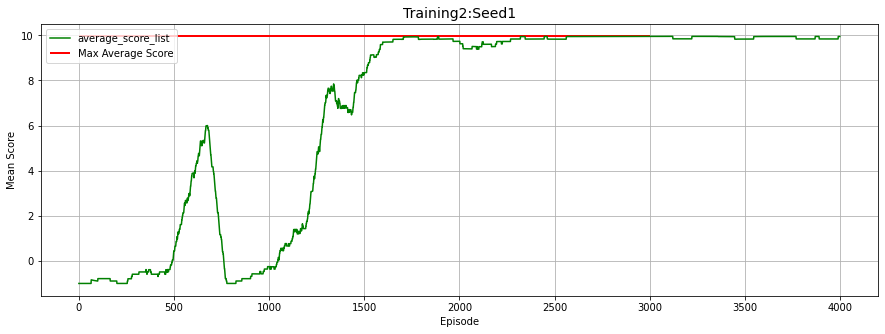

Brain Loaded for Training 2 in seed: 2
Episode 68	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 444
Score: [9.111004]
Episode 327	Average Score: -0.999994,	Average Step: 499.0544444444446Task solved in step: 395
Score: [9.208003]
Episode 349	Average Score: -0.897914,	Average Step: 497.96Task solved in step: 110
Score: [9.7794]
Episode 351	Average Score: -0.790120,	Average Step: 494.07Task solved in step: 332
Score: [9.334802]
Episode 360	Average Score: -0.686772,	Average Step: 492.4Task solved in step: 352
Score: [9.295603]
Episode 386	Average Score: -0.583816,	Average Step: 490.93Task solved in step: 179
Score: [9.639999]
Episode 388	Average Score: -0.477416,	Average Step: 487.73Task solved in step: 482
Score: [9.034405]
Episode 394	Average Score: -0.377072,	Average Step: 487.56Task solved in step: 402
Score: [9.194603]
Episode 405	Average Score: -0.275126,	Average Step: 486.59Task solved in step: 261
Score: [9.4768]
Episode 408	Average Score: -0.170359,	Average St

Episode 561	Average Score: 4.683909,	Average Step: 307.29Task solved in step: 23
Score: [9.9522]
Episode 562	Average Score: 4.685643,	Average Step: 306.42Task solved in step: 25
Score: [9.9494]
Episode 563	Average Score: 4.795137,	Average Step: 301.68Task solved in step: 69
Score: [9.860801]
Episode 564	Average Score: 4.799262,	Average Step: 299.62Task solved in step: 21
Score: [9.957]
Episode 565	Average Score: 4.800307,	Average Step: 299.1Task solved in step: 36
Score: [9.927601]
Episode 566	Average Score: 4.909584,	Average Step: 294.47Task solved in step: 23
Score: [9.9536]
Episode 567	Average Score: 5.019119,	Average Step: 289.71Task solved in step: 412
Score: [9.175203]
Episode 568	Average Score: 5.120872,	Average Step: 288.84Task solved in step: 29
Score: [9.941601]
Episode 569	Average Score: 5.230288,	Average Step: 284.14Task solved in step: 37
Score: [9.9256]
Episode 570	Average Score: 5.339543,	Average Step: 279.52Task solved in step: 52
Score: [9.8942]
Episode 571	Average Sco

Episode 691	Average Score: 5.592988,	Average Step: 252.79Task solved in step: 293
Score: [9.413601]
Episode 744	Average Score: 1.794117,	Average Step: 402.07Task solved in step: 483
Score: [9.032005]
Episode 757	Average Score: 0.826447,	Average Step: 435.85Task solved in step: 450
Score: [9.098205]
Episode 758	Average Score: 0.818175,	Average Step: 439.98Task solved in step: 433
Score: [9.132004]
Episode 770	Average Score: 0.265629,	Average Step: 466.23Task solved in step: 134
Score: [9.730399]
Episode 775	Average Score: 0.159641,	Average Step: 469.22Task solved in step: 134
Score: [9.7302]
Episode 778	Average Score: 0.266943,	Average Step: 465.57Task solved in step: 407
Score: [9.185003]
Episode 780	Average Score: 0.151909,	Average Step: 473.08Task solved in step: 233
Score: [9.5334]
Episode 782	Average Score: 0.147663,	Average Step: 475.21Task solved in step: 219
Score: [9.5602]
Episode 787	Average Score: -0.065845,	Average Step: 481.95Task solved in step: 301
Score: [9.396801]
Episo

Episode 873	Average Score: 7.805300,	Average Step: 146.68Task solved in step: 19
Score: [9.96]
Episode 874	Average Score: 7.914900,	Average Step: 141.88Task solved in step: 22
Score: [9.9544]
Episode 875	Average Score: 8.024444,	Average Step: 137.11Task solved in step: 19
Score: [9.96]
Episode 877	Average Score: 8.026741,	Average Step: 135.96Task solved in step: 19
Score: [9.96]
Episode 878	Average Score: 8.136341,	Average Step: 131.16Task solved in step: 19
Score: [9.96]
Episode 879	Average Score: 8.144092,	Average Step: 127.28Task solved in step: 19
Score: [9.96]
Episode 880	Average Score: 8.253692,	Average Step: 122.48Task solved in step: 19
Score: [9.96]
Episode 881	Average Score: 8.257957,	Average Step: 120.34Task solved in step: 19
Score: [9.96]
Episode 882	Average Score: 8.367558,	Average Step: 115.54Task solved in step: 19
Score: [9.96]
Episode 883	Average Score: 8.371555,	Average Step: 113.54Task solved in step: 21
Score: [9.9572]
Episode 884	Average Score: 8.481128,	Average S

Episode 965	Average Score: 9.261447,	Average Step: 68.81Task solved in step: 123
Score: [9.7534]
Episode 966	Average Score: 9.259427,	Average Step: 69.82Task solved in step: 22
Score: [9.9554]
Episode 967	Average Score: 9.259427,	Average Step: 69.82Task solved in step: 22
Score: [9.9554]
Episode 968	Average Score: 9.259427,	Average Step: 69.82Task solved in step: 22
Score: [9.9554]
Episode 969	Average Score: 9.259427,	Average Step: 69.82Task solved in step: 22
Score: [9.9554]
Episode 970	Average Score: 9.259381,	Average Step: 69.85Task solved in step: 22
Score: [9.9554]
Episode 971	Average Score: 9.259607,	Average Step: 69.74Task solved in step: 78
Score: [9.842999]
Episode 972	Average Score: 9.258438,	Average Step: 70.33Task solved in step: 23
Score: [9.952801]
Episode 973	Average Score: 9.258366,	Average Step: 70.37Task solved in step: 22
Score: [9.9554]
Episode 974	Average Score: 9.258320,	Average Step: 70.4Task solved in step: 22
Score: [9.9554]
Episode 975	Average Score: 9.258330,

Episode 1050	Average Score: 9.555976,	Average Step: 71.46Task solved in step: 486
Score: [9.026206]
Episode 1051	Average Score: 9.546684,	Average Step: 76.1Task solved in step: 33
Score: [9.9338]
Episode 1052	Average Score: 9.546468,	Average Step: 76.21Task solved in step: 94
Score: [9.8112]
Episode 1053	Average Score: 9.545026,	Average Step: 76.93Task solved in step: 362
Score: [9.274002]
Episode 1054	Average Score: 9.538248,	Average Step: 80.31Task solved in step: 341
Score: [9.316602]
Episode 1055	Average Score: 9.641415,	Average Step: 78.73Task solved in step: 21
Score: [9.957]
Episode 1056	Average Score: 9.641519,	Average Step: 78.68Task solved in step: 21
Score: [9.957]
Episode 1057	Average Score: 9.643514,	Average Step: 77.68Task solved in step: 21
Score: [9.957]
Episode 1058	Average Score: 9.643619,	Average Step: 77.63Task solved in step: 22
Score: [9.954801]
Episode 1059	Average Score: 9.643647,	Average Step: 77.61Task solved in step: 141
Score: [9.716599]
Episode 1060	Average

Episode 1140	Average Score: 9.085649,	Average Step: 106.6Task solved in step: 32
Score: [9.9358]
Episode 1141	Average Score: 9.085438,	Average Step: 106.71Task solved in step: 181
Score: [9.6374]
Episode 1142	Average Score: 9.082245,	Average Step: 108.31Task solved in step: 59
Score: [9.8814]
Episode 1147	Average Score: 8.752799,	Average Step: 123.02Task solved in step: 56
Score: [9.8866005]
Episode 1148	Average Score: 8.752094,	Average Step: 123.37Task solved in step: 64
Score: [9.870399]
Episode 1149	Average Score: 8.757779,	Average Step: 120.53Task solved in step: 148
Score: [9.703199]
Episode 1150	Average Score: 8.755450,	Average Step: 121.7Task solved in step: 31
Score: [9.9372]
Episode 1151	Average Score: 8.764561,	Average Step: 117.15Task solved in step: 31
Score: [9.9376]
Episode 1152	Average Score: 8.764599,	Average Step: 117.13Task solved in step: 172
Score: [9.6558]
Episode 1153	Average Score: 8.763045,	Average Step: 117.91Task solved in step: 33
Score: [9.932]
Episode 1154	

Episode 1231	Average Score: 9.029026,	Average Step: 84.9Task solved in step: 22
Score: [9.954201]
Episode 1232	Average Score: 9.030052,	Average Step: 84.38Task solved in step: 30
Score: [9.939799]
Episode 1233	Average Score: 9.031268,	Average Step: 83.78Task solved in step: 479
Score: [9.041005]
Episode 1234	Average Score: 9.022196,	Average Step: 88.32Task solved in step: 18
Score: [9.9623995]
Episode 1235	Average Score: 9.028726,	Average Step: 85.05Task solved in step: 18
Score: [9.9623995]
Episode 1236	Average Score: 9.031176,	Average Step: 83.82Task solved in step: 18
Score: [9.9623995]
Episode 1237	Average Score: 9.140800,	Average Step: 79.01Task solved in step: 29
Score: [9.940201]
Episode 1238	Average Score: 9.140578,	Average Step: 79.12Task solved in step: 18
Score: [9.9623995]
Episode 1239	Average Score: 9.140667,	Average Step: 79.07Task solved in step: 18
Score: [9.9623995]
Episode 1240	Average Score: 9.141015,	Average Step: 78.89Task solved in step: 20
Score: [9.9596]
Episode

Episode 1316	Average Score: 9.928128,	Average Step: 35.23Task solved in step: 18
Score: [9.9623995]
Episode 1317	Average Score: 9.928128,	Average Step: 35.23Task solved in step: 18
Score: [9.9623995]
Episode 1318	Average Score: 9.928128,	Average Step: 35.23Task solved in step: 18
Score: [9.962]
Episode 1319	Average Score: 9.928206,	Average Step: 35.19Task solved in step: 18
Score: [9.9623995]
Episode 1320	Average Score: 9.930277,	Average Step: 34.15Task solved in step: 18
Score: [9.9623995]
Episode 1321	Average Score: 9.930450,	Average Step: 34.06Task solved in step: 18
Score: [9.9623995]
Episode 1322	Average Score: 9.930532,	Average Step: 34.02Task solved in step: 18
Score: [9.9623995]
Episode 1323	Average Score: 9.931610,	Average Step: 33.48Task solved in step: 18
Score: [9.9623995]
Episode 1324	Average Score: 9.931637,	Average Step: 33.46Task solved in step: 18
Score: [9.9623995]
Episode 1325	Average Score: 9.932071,	Average Step: 33.24Task solved in step: 18
Score: [9.9623995]
Epis

Episode 1401	Average Score: 9.945065,	Average Step: 26.77Task solved in step: 20
Score: [9.9584]
Episode 1402	Average Score: 9.945024,	Average Step: 26.79Task solved in step: 18
Score: [9.9623995]
Episode 1403	Average Score: 9.945078,	Average Step: 26.76Task solved in step: 18
Score: [9.9623995]
Episode 1404	Average Score: 9.945078,	Average Step: 26.76Task solved in step: 21
Score: [9.957]
Episode 1405	Average Score: 9.952641,	Average Step: 22.98Task solved in step: 18
Score: [9.9623995]
Episode 1406	Average Score: 9.952642,	Average Step: 22.98Task solved in step: 22
Score: [9.954201]
Episode 1407	Average Score: 9.952560,	Average Step: 23.02Task solved in step: 18
Score: [9.9623995]
Episode 1408	Average Score: 9.952560,	Average Step: 23.02Task solved in step: 18
Score: [9.9623995]
Episode 1409	Average Score: 9.952560,	Average Step: 23.02Task solved in step: 403
Score: [9.193003]
Episode 1410	Average Score: 9.944867,	Average Step: 26.87Task solved in step: 21
Score: [9.957]
Episode 1411

Episode 1569	Average Score: 9.737788,	Average Step: 30.38Task solved in step: 18
Score: [9.9623995]
Episode 1570	Average Score: 9.737789,	Average Step: 30.38Task solved in step: 18
Score: [9.9623995]
Episode 1571	Average Score: 9.737788,	Average Step: 30.38Task solved in step: 18
Score: [9.9623995]
Episode 1572	Average Score: 9.737789,	Average Step: 30.38Task solved in step: 18
Score: [9.9623995]
Episode 1573	Average Score: 9.737788,	Average Step: 30.38Task solved in step: 23
Score: [9.952999]
Episode 1574	Average Score: 9.737695,	Average Step: 30.43Task solved in step: 18
Score: [9.9623995]
Episode 1575	Average Score: 9.737696,	Average Step: 30.43Task solved in step: 18
Score: [9.9623995]
Episode 1576	Average Score: 9.737777,	Average Step: 30.39Task solved in step: 20
Score: [9.9596]
Episode 1577	Average Score: 9.737775,	Average Step: 30.39Task solved in step: 18
Score: [9.9623995]
Episode 1578	Average Score: 9.737775,	Average Step: 30.39Task solved in step: 18
Score: [9.9623995]
Epis

Episode 1653	Average Score: 9.950986,	Average Step: 23.75Task solved in step: 18
Score: [9.9623995]
Episode 1654	Average Score: 9.950986,	Average Step: 23.75Task solved in step: 18
Score: [9.9623995]
Episode 1655	Average Score: 9.950986,	Average Step: 23.75Task solved in step: 20
Score: [9.9598]
Episode 1656	Average Score: 9.950961,	Average Step: 23.77Task solved in step: 18
Score: [9.9623995]
Episode 1657	Average Score: 9.950960,	Average Step: 23.77Task solved in step: 18
Score: [9.9623995]
Episode 1658	Average Score: 9.951490,	Average Step: 23.5Task solved in step: 18
Score: [9.9623995]
Episode 1659	Average Score: 9.951490,	Average Step: 23.5Task solved in step: 18
Score: [9.9623995]
Episode 1660	Average Score: 9.951491,	Average Step: 23.5Task solved in step: 18
Score: [9.9623995]
Episode 1661	Average Score: 9.951490,	Average Step: 23.5Task solved in step: 18
Score: [9.9623995]
Episode 1662	Average Score: 9.951490,	Average Step: 23.5Task solved in step: 18
Score: [9.9623995]
Episode 

Episode 1737	Average Score: 9.961239,	Average Step: 18.64Task solved in step: 18
Score: [9.9623995]
Episode 1738	Average Score: 9.961239,	Average Step: 18.64Task solved in step: 18
Score: [9.9623995]
Episode 1739	Average Score: 9.961239,	Average Step: 18.64Task solved in step: 18
Score: [9.9623995]
Episode 1740	Average Score: 9.961239,	Average Step: 18.64Task solved in step: 18
Score: [9.9623995]
Episode 1741	Average Score: 9.961239,	Average Step: 18.64Task solved in step: 18
Score: [9.9623995]
Episode 1742	Average Score: 9.961239,	Average Step: 18.64Task solved in step: 20
Score: [9.9596]
Episode 1743	Average Score: 9.961210,	Average Step: 18.66Task solved in step: 18
Score: [9.9623995]
Episode 1744	Average Score: 9.961210,	Average Step: 18.66Task solved in step: 18
Score: [9.9623995]
Episode 1745	Average Score: 9.961210,	Average Step: 18.66Task solved in step: 18
Score: [9.9623995]
Episode 1746	Average Score: 9.961210,	Average Step: 18.66Task solved in step: 18
Score: [9.9623995]
Epi

Episode 1821	Average Score: 9.961640,	Average Step: 18.46Task solved in step: 22
Score: [9.954801]
Episode 1822	Average Score: 9.961564,	Average Step: 18.5Task solved in step: 19
Score: [9.9612]
Episode 1823	Average Score: 9.961552,	Average Step: 18.51Task solved in step: 18
Score: [9.9623995]
Episode 1824	Average Score: 9.961552,	Average Step: 18.51Task solved in step: 18
Score: [9.9623995]
Episode 1825	Average Score: 9.961577,	Average Step: 18.49Task solved in step: 18
Score: [9.9623995]
Episode 1826	Average Score: 9.961578,	Average Step: 18.49Task solved in step: 18
Score: [9.9623995]
Episode 1827	Average Score: 9.961578,	Average Step: 18.49Task solved in step: 18
Score: [9.9623995]
Episode 1828	Average Score: 9.961578,	Average Step: 18.49Task solved in step: 19
Score: [9.9612]
Episode 1829	Average Score: 9.961566,	Average Step: 18.5Task solved in step: 19
Score: [9.9612]
Episode 1830	Average Score: 9.961554,	Average Step: 18.51Task solved in step: 19
Score: [9.9612]
Episode 1831	Av

Episode 1990	Average Score: 9.841468,	Average Step: 28.52Task solved in step: 18
Score: [9.9623995]
Episode 1991	Average Score: 9.841469,	Average Step: 28.52Task solved in step: 18
Score: [9.9623995]
Episode 1992	Average Score: 9.841468,	Average Step: 28.52Task solved in step: 21
Score: [9.957601]
Episode 1993	Average Score: 9.841420,	Average Step: 28.55Task solved in step: 18
Score: [9.9623995]
Episode 1994	Average Score: 9.841420,	Average Step: 28.55Task solved in step: 18
Score: [9.9623995]
Episode 1995	Average Score: 9.841420,	Average Step: 28.55Task solved in step: 26
Score: [9.9466]
Episode 1996	Average Score: 9.841262,	Average Step: 28.63Task solved in step: 26
Score: [9.9466]
Episode 1997	Average Score: 9.841105,	Average Step: 28.71Task solved in step: 21
Score: [9.956201]
Episode 1998	Average Score: 9.841043,	Average Step: 28.74Task solved in step: 19
Score: [9.9604]
Episode 1999	Average Score: 9.841022,	Average Step: 28.75Task solved in step: 19
Score: [9.9604]
Episode 2000	A

Episode 2074	Average Score: 9.851319,	Average Step: 23.59Task solved in step: 18
Score: [9.9623995]
Episode 2075	Average Score: 9.851319,	Average Step: 23.59Task solved in step: 18
Score: [9.9623995]
Episode 2076	Average Score: 9.851319,	Average Step: 23.59Task solved in step: 18
Score: [9.9623995]
Episode 2077	Average Score: 9.851319,	Average Step: 23.59Task solved in step: 18
Score: [9.9623995]
Episode 2078	Average Score: 9.851318,	Average Step: 23.59Task solved in step: 18
Score: [9.9623995]
Episode 2079	Average Score: 9.851319,	Average Step: 23.59Task solved in step: 18
Score: [9.9623995]
Episode 2080	Average Score: 9.851367,	Average Step: 23.56Task solved in step: 18
Score: [9.9623995]
Episode 2081	Average Score: 9.851367,	Average Step: 23.56Task solved in step: 18
Score: [9.9623995]
Episode 2082	Average Score: 9.851367,	Average Step: 23.56Task solved in step: 18
Score: [9.9623995]
Episode 2083	Average Score: 9.851367,	Average Step: 23.56Task solved in step: 18
Score: [9.9623995]


Episode 2157	Average Score: 9.960686,	Average Step: 18.89Task solved in step: 18
Score: [9.9623995]
Episode 2158	Average Score: 9.960686,	Average Step: 18.89Task solved in step: 18
Score: [9.9623995]
Episode 2159	Average Score: 9.960686,	Average Step: 18.89Task solved in step: 21
Score: [9.957]
Episode 2160	Average Score: 9.960632,	Average Step: 18.92Task solved in step: 18
Score: [9.9623995]
Episode 2161	Average Score: 9.960631,	Average Step: 18.92Task solved in step: 18
Score: [9.9623995]
Episode 2162	Average Score: 9.960631,	Average Step: 18.92Task solved in step: 18
Score: [9.9623995]
Episode 2163	Average Score: 9.960632,	Average Step: 18.92Task solved in step: 18
Score: [9.9623995]
Episode 2164	Average Score: 9.960632,	Average Step: 18.92Task solved in step: 18
Score: [9.9623995]
Episode 2165	Average Score: 9.960632,	Average Step: 18.92Task solved in step: 18
Score: [9.9623995]
Episode 2166	Average Score: 9.960632,	Average Step: 18.92Task solved in step: 18
Score: [9.9623995]
Epis

Episode 2324	Average Score: 9.961505,	Average Step: 18.5Task solved in step: 31
Score: [9.936399]
Episode 2325	Average Score: 9.961245,	Average Step: 18.63Task solved in step: 18
Score: [9.9623995]
Episode 2326	Average Score: 9.961294,	Average Step: 18.6Task solved in step: 18
Score: [9.9623995]
Episode 2327	Average Score: 9.961294,	Average Step: 18.6Task solved in step: 18
Score: [9.9623995]
Episode 2328	Average Score: 9.961345,	Average Step: 18.57Task solved in step: 18
Score: [9.9623995]
Episode 2329	Average Score: 9.961345,	Average Step: 18.57Task solved in step: 21
Score: [9.957]
Episode 2330	Average Score: 9.961550,	Average Step: 18.47Task solved in step: 32
Score: [9.9346]
Episode 2331	Average Score: 9.961271,	Average Step: 18.61Task solved in step: 18
Score: [9.9623995]
Episode 2332	Average Score: 9.961366,	Average Step: 18.56Task solved in step: 18
Score: [9.9623995]
Episode 2333	Average Score: 9.961366,	Average Step: 18.56Task solved in step: 18
Score: [9.9623995]
Episode 233

Episode 2408	Average Score: 9.960898,	Average Step: 18.8Task solved in step: 18
Score: [9.9623995]
Episode 2409	Average Score: 9.960898,	Average Step: 18.8Task solved in step: 18
Score: [9.9623995]
Episode 2410	Average Score: 9.960940,	Average Step: 18.78Task solved in step: 18
Score: [9.9623995]
Episode 2411	Average Score: 9.960940,	Average Step: 18.78Task solved in step: 18
Score: [9.9623995]
Episode 2412	Average Score: 9.960940,	Average Step: 18.78Task solved in step: 18
Score: [9.9623995]
Episode 2413	Average Score: 9.960940,	Average Step: 18.78Task solved in step: 18
Score: [9.9623995]
Episode 2414	Average Score: 9.960995,	Average Step: 18.75Task solved in step: 18
Score: [9.9623995]
Episode 2415	Average Score: 9.960995,	Average Step: 18.75Task solved in step: 18
Score: [9.9623995]
Episode 2416	Average Score: 9.960995,	Average Step: 18.75Task solved in step: 18
Score: [9.9623995]
Episode 2417	Average Score: 9.960995,	Average Step: 18.75Task solved in step: 18
Score: [9.9623995]
Ep

Episode 2491	Average Score: 9.956844,	Average Step: 20.85Task solved in step: 68
Score: [9.8634]
Episode 2492	Average Score: 9.955901,	Average Step: 21.32Task solved in step: 43
Score: [9.913601]
Episode 2493	Average Score: 9.955413,	Average Step: 21.57Task solved in step: 28
Score: [9.9438]
Episode 2495	Average Score: 9.845602,	Average Step: 26.48Task solved in step: 31
Score: [9.9372]
Episode 2496	Average Score: 9.845350,	Average Step: 26.61Task solved in step: 18
Score: [9.9623995]
Episode 2497	Average Score: 9.845350,	Average Step: 26.61Task solved in step: 18
Score: [9.9623995]
Episode 2498	Average Score: 9.845351,	Average Step: 26.61Task solved in step: 18
Score: [9.9623995]
Episode 2499	Average Score: 9.845351,	Average Step: 26.61Task solved in step: 18
Score: [9.9623995]
Episode 2500	Average Score: 9.845741,	Average Step: 26.41Task solved in step: 18
Score: [9.9623995]
Episode 2501	Average Score: 9.845741,	Average Step: 26.41Task solved in step: 18
Score: [9.9623995]
Episode 25

Episode 2576	Average Score: 9.849129,	Average Step: 24.71Task solved in step: 18
Score: [9.9623995]
Episode 2577	Average Score: 9.849129,	Average Step: 24.71Task solved in step: 18
Score: [9.9623995]
Episode 2578	Average Score: 9.849240,	Average Step: 24.65Task solved in step: 18
Score: [9.9623995]
Episode 2579	Average Score: 9.849240,	Average Step: 24.65Task solved in step: 20
Score: [9.9584]
Episode 2580	Average Score: 9.849200,	Average Step: 24.67Task solved in step: 18
Score: [9.9623995]
Episode 2581	Average Score: 9.849288,	Average Step: 24.62Task solved in step: 18
Score: [9.9623995]
Episode 2582	Average Score: 9.849314,	Average Step: 24.6Task solved in step: 21
Score: [9.957]
Episode 2583	Average Score: 9.849259,	Average Step: 24.63Task solved in step: 18
Score: [9.9623995]
Episode 2584	Average Score: 9.849260,	Average Step: 24.63Task solved in step: 18
Score: [9.9623995]
Episode 2585	Average Score: 9.849444,	Average Step: 24.54Task solved in step: 18
Score: [9.9623995]
Episode 

Episode 2659	Average Score: 9.961245,	Average Step: 18.62Task solved in step: 18
Score: [9.9623995]
Episode 2660	Average Score: 9.961245,	Average Step: 18.62Task solved in step: 18
Score: [9.9623995]
Episode 2661	Average Score: 9.961245,	Average Step: 18.62Task solved in step: 18
Score: [9.9623995]
Episode 2662	Average Score: 9.961244,	Average Step: 18.62Task solved in step: 18
Score: [9.9623995]
Episode 2663	Average Score: 9.961245,	Average Step: 18.62Task solved in step: 18
Score: [9.9623995]
Episode 2664	Average Score: 9.961245,	Average Step: 18.62Task solved in step: 18
Score: [9.9623995]
Episode 2665	Average Score: 9.961299,	Average Step: 18.59Task solved in step: 18
Score: [9.9623995]
Episode 2666	Average Score: 9.961298,	Average Step: 18.59Task solved in step: 18
Score: [9.9623995]
Episode 2667	Average Score: 9.961305,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 2668	Average Score: 9.961305,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]


Episode 2824	Average Score: 9.847904,	Average Step: 25.27Task solved in step: 22
Score: [9.955601]
Episode 2825	Average Score: 9.847836,	Average Step: 25.31Task solved in step: 18
Score: [9.9623995]
Episode 2826	Average Score: 9.847836,	Average Step: 25.31Task solved in step: 18
Score: [9.9623995]
Episode 2827	Average Score: 9.847836,	Average Step: 25.31Task solved in step: 18
Score: [9.9623995]
Episode 2828	Average Score: 9.847836,	Average Step: 25.31Task solved in step: 18
Score: [9.9623995]
Episode 2829	Average Score: 9.847836,	Average Step: 25.31Task solved in step: 18
Score: [9.9623995]
Episode 2830	Average Score: 9.847836,	Average Step: 25.31Task solved in step: 18
Score: [9.9623995]
Episode 2831	Average Score: 9.847862,	Average Step: 25.29Task solved in step: 18
Score: [9.9623995]
Episode 2832	Average Score: 9.847862,	Average Step: 25.29Task solved in step: 18
Score: [9.9623995]
Episode 2833	Average Score: 9.847862,	Average Step: 25.29Task solved in step: 18
Score: [9.9623995]
E

Episode 2908	Average Score: 9.961964,	Average Step: 18.24Task solved in step: 18
Score: [9.9623995]
Episode 2909	Average Score: 9.961965,	Average Step: 18.24Task solved in step: 20
Score: [9.9596]
Episode 2910	Average Score: 9.961937,	Average Step: 18.26Task solved in step: 19
Score: [9.9602]
Episode 2911	Average Score: 9.961915,	Average Step: 18.27Task solved in step: 21
Score: [9.957]
Episode 2912	Average Score: 9.961860,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2913	Average Score: 9.961861,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2914	Average Score: 9.961861,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2915	Average Score: 9.961861,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2916	Average Score: 9.961861,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2917	Average Score: 9.961861,	Average Step: 18.3Task solved in step: 21
Score: [9.957]
Episode 2918	Average

Episode 3072	Average Score: 9.962002,	Average Step: 18.22Task solved in step: 18
Score: [9.9623995]
Episode 3073	Average Score: 9.962003,	Average Step: 18.22Task solved in step: 18
Score: [9.9623995]
Episode 3074	Average Score: 9.962002,	Average Step: 18.22Task solved in step: 18
Score: [9.9623995]
Episode 3075	Average Score: 9.962003,	Average Step: 18.22Task solved in step: 18
Score: [9.9623995]
Episode 3076	Average Score: 9.962002,	Average Step: 18.22Task solved in step: 18
Score: [9.9623995]
Episode 3077	Average Score: 9.962003,	Average Step: 18.22Task solved in step: 18
Score: [9.9623995]
Episode 3078	Average Score: 9.962002,	Average Step: 18.22Task solved in step: 18
Score: [9.9623995]
Episode 3079	Average Score: 9.962003,	Average Step: 18.22Task solved in step: 18
Score: [9.9623995]
Episode 3080	Average Score: 9.962002,	Average Step: 18.22Task solved in step: 18
Score: [9.9623995]
Episode 3081	Average Score: 9.962003,	Average Step: 18.22Task solved in step: 18
Score: [9.9623995]


Episode 3236	Average Score: 9.961166,	Average Step: 18.66Task solved in step: 18
Score: [9.9623995]
Episode 3237	Average Score: 9.961167,	Average Step: 18.66Task solved in step: 18
Score: [9.9623995]
Episode 3238	Average Score: 9.961166,	Average Step: 18.66Task solved in step: 20
Score: [9.9594]
Episode 3239	Average Score: 9.961137,	Average Step: 18.68Task solved in step: 18
Score: [9.9623995]
Episode 3240	Average Score: 9.961137,	Average Step: 18.68Task solved in step: 18
Score: [9.9623995]
Episode 3241	Average Score: 9.961137,	Average Step: 18.68Task solved in step: 18
Score: [9.9623995]
Episode 3242	Average Score: 9.961137,	Average Step: 18.68Task solved in step: 18
Score: [9.9623995]
Episode 3243	Average Score: 9.961190,	Average Step: 18.65Task solved in step: 18
Score: [9.9623995]
Episode 3244	Average Score: 9.961191,	Average Step: 18.65Task solved in step: 21
Score: [9.9578]
Episode 3245	Average Score: 9.961144,	Average Step: 18.68Task solved in step: 18
Score: [9.9623995]
Episod

Episode 3402	Average Score: 9.961688,	Average Step: 18.4Task solved in step: 18
Score: [9.9623995]
Episode 3403	Average Score: 9.961746,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episode 3404	Average Score: 9.961747,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episode 3405	Average Score: 9.961746,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episode 3406	Average Score: 9.961830,	Average Step: 18.33Task solved in step: 21
Score: [9.9572]
Episode 3407	Average Score: 9.961779,	Average Step: 18.36Task solved in step: 18
Score: [9.9623995]
Episode 3408	Average Score: 9.961780,	Average Step: 18.36Task solved in step: 19
Score: [9.9606]
Episode 3409	Average Score: 9.961761,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episode 3410	Average Score: 9.961761,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episode 3411	Average Score: 9.961761,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episode

Episode 3486	Average Score: 9.959533,	Average Step: 19.5Task solved in step: 24
Score: [9.951799]
Episode 3487	Average Score: 9.959426,	Average Step: 19.56Task solved in step: 18
Score: [9.9623995]
Episode 3488	Average Score: 9.959426,	Average Step: 19.56Task solved in step: 18
Score: [9.9623995]
Episode 3489	Average Score: 9.959426,	Average Step: 19.56Task solved in step: 18
Score: [9.9623995]
Episode 3490	Average Score: 9.959426,	Average Step: 19.56Task solved in step: 18
Score: [9.9623995]
Episode 3491	Average Score: 9.959464,	Average Step: 19.54Task solved in step: 18
Score: [9.9623995]
Episode 3492	Average Score: 9.959464,	Average Step: 19.54Task solved in step: 18
Score: [9.9623995]
Episode 3493	Average Score: 9.959464,	Average Step: 19.54Task solved in step: 21
Score: [9.9574]
Episode 3494	Average Score: 9.959438,	Average Step: 19.56Task solved in step: 18
Score: [9.9623995]
Episode 3495	Average Score: 9.959438,	Average Step: 19.56Task solved in step: 18
Score: [9.9623995]
Episo

Episode 3651	Average Score: 9.956562,	Average Step: 20.94Task solved in step: 18
Score: [9.9623995]
Episode 3652	Average Score: 9.956562,	Average Step: 20.94Task solved in step: 23
Score: [9.952]
Episode 3653	Average Score: 9.956459,	Average Step: 20.99Task solved in step: 18
Score: [9.9623995]
Episode 3654	Average Score: 9.956459,	Average Step: 20.99Task solved in step: 18
Score: [9.9623995]
Episode 3655	Average Score: 9.956503,	Average Step: 20.97Task solved in step: 25
Score: [9.948999]
Episode 3656	Average Score: 9.956368,	Average Step: 21.04Task solved in step: 18
Score: [9.9623995]
Episode 3657	Average Score: 9.956368,	Average Step: 21.04Task solved in step: 18
Score: [9.9623995]
Episode 3658	Average Score: 9.956368,	Average Step: 21.04Task solved in step: 19
Score: [9.9602]
Episode 3659	Average Score: 9.956347,	Average Step: 21.05Task solved in step: 23
Score: [9.952801]
Episode 3660	Average Score: 9.956250,	Average Step: 21.1Task solved in step: 18
Score: [9.9623995]
Episode 36

Episode 3816	Average Score: 9.961733,	Average Step: 18.36Task solved in step: 18
Score: [9.9623995]
Episode 3817	Average Score: 9.961732,	Average Step: 18.36Task solved in step: 18
Score: [9.9623995]
Episode 3818	Average Score: 9.961732,	Average Step: 18.36Task solved in step: 18
Score: [9.9623995]
Episode 3819	Average Score: 9.961733,	Average Step: 18.36Task solved in step: 18
Score: [9.9623995]
Episode 3820	Average Score: 9.961733,	Average Step: 18.36Task solved in step: 18
Score: [9.9623995]
Episode 3821	Average Score: 9.961732,	Average Step: 18.36Task solved in step: 18
Score: [9.9623995]
Episode 3822	Average Score: 9.961762,	Average Step: 18.34Task solved in step: 26
Score: [9.9474]
Episode 3823	Average Score: 9.961613,	Average Step: 18.42Task solved in step: 22
Score: [9.954]
Episode 3824	Average Score: 9.961529,	Average Step: 18.46Task solved in step: 18
Score: [9.9623995]
Episode 3825	Average Score: 9.961529,	Average Step: 18.46Task solved in step: 18
Score: [9.9623995]
Episode

Episode 3900	Average Score: 9.961301,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 3901	Average Score: 9.961301,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 3902	Average Score: 9.961301,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 3903	Average Score: 9.961355,	Average Step: 18.55Task solved in step: 23
Score: [9.9538]
Episode 3904	Average Score: 9.961269,	Average Step: 18.6Task solved in step: 18
Score: [9.9623995]
Episode 3905	Average Score: 9.961268,	Average Step: 18.6Task solved in step: 18
Score: [9.9623995]
Episode 3906	Average Score: 9.961269,	Average Step: 18.6Task solved in step: 18
Score: [9.9623995]
Episode 3907	Average Score: 9.961269,	Average Step: 18.6Task solved in step: 24
Score: [9.9516]
Episode 3908	Average Score: 9.961161,	Average Step: 18.66Task solved in step: 18
Score: [9.9623995]
Episode 3909	Average Score: 9.961161,	Average Step: 18.66Task solved in step: 18
Score: [9.9623995]
Episode 39

Episode 3984	Average Score: 9.961345,	Average Step: 18.56Task solved in step: 18
Score: [9.9623995]
Episode 3985	Average Score: 9.961344,	Average Step: 18.56Task solved in step: 18
Score: [9.9623995]
Episode 3986	Average Score: 9.961355,	Average Step: 18.55Task solved in step: 19
Score: [9.9618]
Episode 3987	Average Score: 9.961349,	Average Step: 18.56Task solved in step: 29
Score: [9.9404]
Episode 3988	Average Score: 9.961128,	Average Step: 18.67Task solved in step: 21
Score: [9.9574]
Episode 3989	Average Score: 9.961079,	Average Step: 18.7Task solved in step: 18
Score: [9.9623995]
Episode 3990	Average Score: 9.961079,	Average Step: 18.7Task solved in step: 18
Score: [9.9623995]
Episode 3991	Average Score: 9.961079,	Average Step: 18.7Task solved in step: 18
Score: [9.9623995]
Episode 3992	Average Score: 9.961079,	Average Step: 18.7Task solved in step: 18
Score: [9.9623995]
Episode 3993	Average Score: 9.961079,	Average Step: 18.7Task solved in step: 18
Score: [9.9623995]
Episode 3994	A

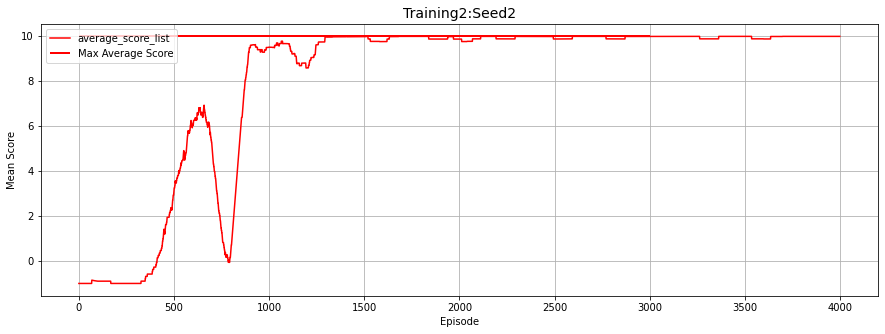

Brain Loaded for Training 2 in seed: 3
Episode 52	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 481
Score: [9.036005]
Episode 57	Average Score: -0.823924,	Average Step: 498.68421052631584Task solved in step: 448
Score: [9.102205]
Episode 58	Average Score: -0.652784,	Average Step: 497.8103448275862Task solved in step: 244
Score: [9.511399]
Episode 64	Average Score: -0.521094,	Average Step: 493.93754285714283Task solved in step: 331
Score: [9.337401]
Episode 83	Average Score: -0.506175,	Average Step: 493.07228915662653Task solved in step: 468
Score: [9.063405]
Episode 86	Average Score: -0.406385,	Average Step: 492.91860465116284Task solved in step: 373
Score: [9.253802]
Episode 89	Average Score: -0.311183,	Average Step: 491.70786516853934Task solved in step: 123
Score: [9.752999]
Episode 91	Average Score: -0.208157,	Average Step: 487.7362637362637Task solved in step: 309
Score: [9.380401]
Episode 92	Average Score: -0.103934,	Average Step: 485.79347826086956Task solved

Episode 415	Average Score: 6.291637,	Average Step: 203.45Task solved in step: 87
Score: [9.8252]
Episode 416	Average Score: 6.291906,	Average Step: 203.32Task solved in step: 79
Score: [9.8418]
Episode 417	Average Score: 6.291064,	Average Step: 203.75Task solved in step: 40
Score: [9.9186]
Episode 418	Average Score: 6.294094,	Average Step: 202.23Task solved in step: 57
Score: [9.8856]
Episode 419	Average Score: 6.402950,	Average Step: 197.81Task solved in step: 34
Score: [9.931601]
Episode 420	Average Score: 6.512266,	Average Step: 193.16Task solved in step: 27
Score: [9.9458]
Episode 421	Average Score: 6.621724,	Average Step: 188.44Task solved in step: 28
Score: [9.9428005]
Episode 422	Average Score: 6.625817,	Average Step: 186.39Task solved in step: 30
Score: [9.9394]
Episode 423	Average Score: 6.735209,	Average Step: 181.7Task solved in step: 29
Score: [9.9418]
Episode 424	Average Score: 6.844628,	Average Step: 177.0Task solved in step: 35
Score: [9.928201]
Episode 425	Average Score

Episode 514	Average Score: 8.397299,	Average Step: 100.75Task solved in step: 23
Score: [9.9526005]
Episode 515	Average Score: 8.397397,	Average Step: 100.7Task solved in step: 24
Score: [9.9516]
Episode 517	Average Score: 8.290243,	Average Step: 104.27Task solved in step: 29
Score: [9.941601]
Episode 518	Average Score: 8.290473,	Average Step: 104.16Task solved in step: 20
Score: [9.9596]
Episode 519	Average Score: 8.291213,	Average Step: 103.79Task solved in step: 31
Score: [9.936999]
Episode 520	Average Score: 8.291267,	Average Step: 103.76Task solved in step: 56
Score: [9.886801]
Episode 521	Average Score: 8.290677,	Average Step: 104.05Task solved in step: 25
Score: [9.948999]
Episode 522	Average Score: 8.290739,	Average Step: 104.02Task solved in step: 28
Score: [9.9426]
Episode 524	Average Score: 8.181354,	Average Step: 108.7Task solved in step: 23
Score: [9.9524]
Episode 525	Average Score: 8.181596,	Average Step: 108.58Task solved in step: 23
Score: [9.9534]
Episode 526	Average S

Episode 608	Average Score: 8.935625,	Average Step: 81.5Task solved in step: 18
Score: [9.9623995]
Episode 609	Average Score: 8.935979,	Average Step: 81.32Task solved in step: 31
Score: [9.936]
Episode 613	Average Score: 8.607287,	Average Step: 95.66Task solved in step: 18
Score: [9.9623995]
Episode 614	Average Score: 8.607475,	Average Step: 95.56Task solved in step: 18
Score: [9.9623995]
Episode 615	Average Score: 8.607574,	Average Step: 95.51Task solved in step: 79
Score: [9.8418]
Episode 616	Average Score: 8.606475,	Average Step: 96.06Task solved in step: 21
Score: [9.957]
Episode 617	Average Score: 8.716045,	Average Step: 91.28Task solved in step: 18
Score: [9.9623995]
Episode 618	Average Score: 8.716253,	Average Step: 91.17Task solved in step: 21
Score: [9.957601]
Episode 619	Average Score: 8.716233,	Average Step: 91.18Task solved in step: 18
Score: [9.9623995]
Episode 620	Average Score: 8.716487,	Average Step: 91.05Task solved in step: 18
Score: [9.9623995]
Episode 621	Average Sco

Episode 740	Average Score: 6.326237,	Average Step: 186.09Task solved in step: 18
Score: [9.9622]
Episode 741	Average Score: 6.435859,	Average Step: 181.28Task solved in step: 22
Score: [9.9552]
Episode 742	Average Score: 6.545411,	Average Step: 176.51Task solved in step: 18
Score: [9.9622]
Episode 743	Average Score: 6.655032,	Average Step: 171.7Task solved in step: 18
Score: [9.9622]
Episode 744	Average Score: 6.764655,	Average Step: 166.89Task solved in step: 22
Score: [9.954]
Episode 745	Average Score: 6.874194,	Average Step: 162.12Task solved in step: 18
Score: [9.9622]
Episode 746	Average Score: 6.983817,	Average Step: 157.31Task solved in step: 20
Score: [9.9592]
Episode 747	Average Score: 7.093408,	Average Step: 152.52Task solved in step: 18
Score: [9.9622]
Episode 748	Average Score: 7.203031,	Average Step: 147.71Task solved in step: 18
Score: [9.9622]
Episode 749	Average Score: 7.312653,	Average Step: 142.9Task solved in step: 18
Score: [9.9622]
Episode 750	Average Score: 7.4222

Episode 832	Average Score: 9.295916,	Average Step: 51.29Task solved in step: 18
Score: [9.9622]
Episode 833	Average Score: 9.295916,	Average Step: 51.29Task solved in step: 22
Score: [9.9546]
Episode 834	Average Score: 9.295879,	Average Step: 51.31Task solved in step: 18
Score: [9.9622]
Episode 835	Average Score: 9.295879,	Average Step: 51.31Task solved in step: 18
Score: [9.9622]
Episode 840	Average Score: 8.857421,	Average Step: 70.53Task solved in step: 18
Score: [9.9622]
Episode 841	Average Score: 8.857421,	Average Step: 70.53Task solved in step: 18
Score: [9.9622]
Episode 842	Average Score: 8.857491,	Average Step: 70.49Task solved in step: 18
Score: [9.9622]
Episode 843	Average Score: 8.857492,	Average Step: 70.49Task solved in step: 20
Score: [9.9598]
Episode 844	Average Score: 8.857468,	Average Step: 70.51Task solved in step: 21
Score: [9.9578]
Episode 845	Average Score: 8.857506,	Average Step: 70.5Task solved in step: 18
Score: [9.9622]
Episode 846	Average Score: 8.857506,	Aver

Episode 1014	Average Score: 9.843901,	Average Step: 27.45Task solved in step: 18
Score: [9.9622]
Episode 1015	Average Score: 9.843958,	Average Step: 27.42Task solved in step: 18
Score: [9.9622]
Episode 1016	Average Score: 9.843957,	Average Step: 27.42Task solved in step: 23
Score: [9.9536]
Episode 1017	Average Score: 9.843871,	Average Step: 27.47Task solved in step: 23
Score: [9.9536]
Episode 1018	Average Score: 9.843784,	Average Step: 27.52Task solved in step: 18
Score: [9.9622]
Episode 1019	Average Score: 9.843785,	Average Step: 27.52Task solved in step: 18
Score: [9.9622]
Episode 1020	Average Score: 9.843784,	Average Step: 27.52Task solved in step: 18
Score: [9.9622]
Episode 1021	Average Score: 9.843784,	Average Step: 27.52Task solved in step: 21
Score: [9.9564]
Episode 1022	Average Score: 9.843727,	Average Step: 27.55Task solved in step: 18
Score: [9.9622]
Episode 1023	Average Score: 9.843727,	Average Step: 27.55Task solved in step: 18
Score: [9.9622]
Episode 1024	Average Score: 9.

Episode 1185	Average Score: 9.723012,	Average Step: 37.92Task solved in step: 26
Score: [9.9478]
Episode 1186	Average Score: 9.722954,	Average Step: 37.95Task solved in step: 19
Score: [9.96]
Episode 1187	Average Score: 9.722933,	Average Step: 37.96Task solved in step: 117
Score: [9.7654]
Episode 1188	Average Score: 9.720964,	Average Step: 38.95Task solved in step: 20
Score: [9.9594]
Episode 1189	Average Score: 9.721007,	Average Step: 38.93Task solved in step: 36
Score: [9.9272]
Episode 1190	Average Score: 9.720745,	Average Step: 39.06Task solved in step: 21
Score: [9.9564]
Episode 1191	Average Score: 9.720992,	Average Step: 38.93Task solved in step: 36
Score: [9.9272]
Episode 1192	Average Score: 9.721268,	Average Step: 38.79Task solved in step: 32
Score: [9.9358]
Episode 1193	Average Score: 9.721004,	Average Step: 38.93Task solved in step: 187
Score: [9.624999]
Episode 1194	Average Score: 9.717631,	Average Step: 40.62Task solved in step: 26
Score: [9.9478]
Episode 1196	Average Score: 

Episode 1360	Average Score: 9.945822,	Average Step: 26.36Task solved in step: 21
Score: [9.956]
Episode 1361	Average Score: 9.945759,	Average Step: 26.39Task solved in step: 21
Score: [9.956]
Episode 1362	Average Score: 9.945695,	Average Step: 26.42Task solved in step: 21
Score: [9.956]
Episode 1363	Average Score: 9.945630,	Average Step: 26.45Task solved in step: 18
Score: [9.9622]
Episode 1364	Average Score: 9.945630,	Average Step: 26.45Task solved in step: 20
Score: [9.9594]
Episode 1365	Average Score: 9.945603,	Average Step: 26.47Task solved in step: 24
Score: [9.9514]
Episode 1366	Average Score: 9.945495,	Average Step: 26.53Task solved in step: 24
Score: [9.9506]
Episode 1367	Average Score: 9.945543,	Average Step: 26.5Task solved in step: 21
Score: [9.956]
Episode 1368	Average Score: 9.945645,	Average Step: 26.44Task solved in step: 21
Score: [9.956]
Episode 1369	Average Score: 9.945746,	Average Step: 26.38Task solved in step: 21
Score: [9.956]
Episode 1370	Average Score: 9.945747,

Episode 1445	Average Score: 9.948818,	Average Step: 24.85Task solved in step: 23
Score: [9.9536]
Episode 1446	Average Score: 9.948896,	Average Step: 24.81Task solved in step: 23
Score: [9.9536]
Episode 1447	Average Score: 9.950397,	Average Step: 24.06Task solved in step: 23
Score: [9.9522]
Episode 1448	Average Score: 9.950359,	Average Step: 24.08Task solved in step: 23
Score: [9.9536]
Episode 1449	Average Score: 9.950335,	Average Step: 24.1Task solved in step: 23
Score: [9.953199]
Episode 1450	Average Score: 9.950244,	Average Step: 24.15Task solved in step: 23
Score: [9.953199]
Episode 1451	Average Score: 9.950215,	Average Step: 24.17Task solved in step: 23
Score: [9.953199]
Episode 1452	Average Score: 9.950188,	Average Step: 24.19Task solved in step: 23
Score: [9.953199]
Episode 1453	Average Score: 9.950166,	Average Step: 24.2Task solved in step: 23
Score: [9.953199]
Episode 1454	Average Score: 9.950230,	Average Step: 24.17Task solved in step: 23
Score: [9.953199]
Episode 1455	Average

Episode 1616	Average Score: 9.728383,	Average Step: 35.09Task solved in step: 21
Score: [9.956]
Episode 1617	Average Score: 9.728383,	Average Step: 35.09Task solved in step: 18
Score: [9.9622]
Episode 1618	Average Score: 9.728446,	Average Step: 35.06Task solved in step: 18
Score: [9.9623995]
Episode 1619	Average Score: 9.728564,	Average Step: 35.0Task solved in step: 18
Score: [9.9623995]
Episode 1620	Average Score: 9.728683,	Average Step: 34.94Task solved in step: 18
Score: [9.9623995]
Episode 1621	Average Score: 9.728801,	Average Step: 34.88Task solved in step: 18
Score: [9.9623995]
Episode 1622	Average Score: 9.728881,	Average Step: 34.84Task solved in step: 18
Score: [9.9623995]
Episode 1623	Average Score: 9.728944,	Average Step: 34.81Task solved in step: 18
Score: [9.9623995]
Episode 1624	Average Score: 9.729062,	Average Step: 34.75Task solved in step: 18
Score: [9.9623995]
Episode 1625	Average Score: 9.729127,	Average Step: 34.72Task solved in step: 18
Score: [9.9623995]
Episode 

Episode 1701	Average Score: 9.956285,	Average Step: 20.99Task solved in step: 24
Score: [9.9506]
Episode 1702	Average Score: 9.956230,	Average Step: 21.02Task solved in step: 21
Score: [9.956]
Episode 1703	Average Score: 9.956282,	Average Step: 20.99Task solved in step: 24
Score: [9.9506]
Episode 1704	Average Score: 9.956166,	Average Step: 21.05Task solved in step: 24
Score: [9.9506]
Episode 1705	Average Score: 9.956051,	Average Step: 21.11Task solved in step: 27
Score: [9.9448]
Episode 1706	Average Score: 9.955877,	Average Step: 21.2Task solved in step: 21
Score: [9.956]
Episode 1707	Average Score: 9.955814,	Average Step: 21.23Task solved in step: 21
Score: [9.956]
Episode 1708	Average Score: 9.955783,	Average Step: 21.24Task solved in step: 18
Score: [9.9622]
Episode 1709	Average Score: 9.955783,	Average Step: 21.24Task solved in step: 18
Score: [9.9622]
Episode 1710	Average Score: 9.955845,	Average Step: 21.21Task solved in step: 18
Score: [9.9622]
Episode 1711	Average Score: 9.9559

Episode 1786	Average Score: 9.955769,	Average Step: 21.26Task solved in step: 21
Score: [9.956]
Episode 1787	Average Score: 9.955864,	Average Step: 21.21Task solved in step: 21
Score: [9.956]
Episode 1788	Average Score: 9.955803,	Average Step: 21.24Task solved in step: 23
Score: [9.9536]
Episode 1789	Average Score: 9.955717,	Average Step: 21.29Task solved in step: 18
Score: [9.9622]
Episode 1790	Average Score: 9.955778,	Average Step: 21.26Task solved in step: 18
Score: [9.9622]
Episode 1791	Average Score: 9.955841,	Average Step: 21.23Task solved in step: 21
Score: [9.9568]
Episode 1793	Average Score: 9.846391,	Average Step: 25.95Task solved in step: 21
Score: [9.956]
Episode 1794	Average Score: 9.846391,	Average Step: 25.95Task solved in step: 21
Score: [9.956]
Episode 1795	Average Score: 9.846391,	Average Step: 25.95Task solved in step: 21
Score: [9.956]
Episode 1796	Average Score: 9.846445,	Average Step: 25.92Task solved in step: 21
Score: [9.956]
Episode 1797	Average Score: 9.846519

Episode 1958	Average Score: 9.842149,	Average Step: 28.08Task solved in step: 21
Score: [9.956]
Episode 1959	Average Score: 9.842149,	Average Step: 28.08Task solved in step: 18
Score: [9.9622]
Episode 1960	Average Score: 9.842211,	Average Step: 28.05Task solved in step: 21
Score: [9.956]
Episode 1961	Average Score: 9.842211,	Average Step: 28.05Task solved in step: 21
Score: [9.956]
Episode 1962	Average Score: 9.842211,	Average Step: 28.05Task solved in step: 21
Score: [9.956]
Episode 1963	Average Score: 9.842149,	Average Step: 28.08Task solved in step: 21
Score: [9.956]
Episode 1964	Average Score: 9.842087,	Average Step: 28.11Task solved in step: 21
Score: [9.956]
Episode 1965	Average Score: 9.842023,	Average Step: 28.14Task solved in step: 21
Score: [9.956]
Episode 1966	Average Score: 9.841989,	Average Step: 28.15Task solved in step: 21
Score: [9.956]
Episode 1967	Average Score: 9.841932,	Average Step: 28.17Task solved in step: 21
Score: [9.956]
Episode 1968	Average Score: 9.842007,	A

Episode 2044	Average Score: 9.730983,	Average Step: 33.65Task solved in step: 18
Score: [9.9622]
Episode 2045	Average Score: 9.731097,	Average Step: 33.59Task solved in step: 18
Score: [9.9622]
Episode 2046	Average Score: 9.731233,	Average Step: 33.52Task solved in step: 18
Score: [9.9622]
Episode 2047	Average Score: 9.731296,	Average Step: 33.49Task solved in step: 18
Score: [9.9622]
Episode 2048	Average Score: 9.731358,	Average Step: 33.46Task solved in step: 18
Score: [9.9622]
Episode 2049	Average Score: 9.731420,	Average Step: 33.43Task solved in step: 18
Score: [9.9622]
Episode 2050	Average Score: 9.731482,	Average Step: 33.4Task solved in step: 18
Score: [9.9622]
Episode 2051	Average Score: 9.731544,	Average Step: 33.37Task solved in step: 21
Score: [9.9566]
Episode 2052	Average Score: 9.731549,	Average Step: 33.37Task solved in step: 18
Score: [9.9622]
Episode 2053	Average Score: 9.731611,	Average Step: 33.34Task solved in step: 21
Score: [9.956]
Episode 2054	Average Score: 9.73

Episode 2131	Average Score: 9.847425,	Average Step: 25.51Task solved in step: 18
Score: [9.9622]
Episode 2132	Average Score: 9.847487,	Average Step: 25.48Task solved in step: 18
Score: [9.9622]
Episode 2133	Average Score: 9.847562,	Average Step: 25.44Task solved in step: 25
Score: [9.9486]
Episode 2134	Average Score: 9.847462,	Average Step: 25.49Task solved in step: 26
Score: [9.9474]
Episode 2135	Average Score: 9.847313,	Average Step: 25.57Task solved in step: 28
Score: [9.942201]
Episode 2136	Average Score: 9.847113,	Average Step: 25.67Task solved in step: 18
Score: [9.9622]
Episode 2137	Average Score: 9.847113,	Average Step: 25.67Task solved in step: 18
Score: [9.9622]
Episode 2138	Average Score: 9.847113,	Average Step: 25.67Task solved in step: 18
Score: [9.9622]
Episode 2139	Average Score: 9.847114,	Average Step: 25.67Task solved in step: 18
Score: [9.9622]
Episode 2140	Average Score: 9.847114,	Average Step: 25.67Task solved in step: 21
Score: [9.9578]
Episode 2141	Average Score: 

Episode 2217	Average Score: 9.955070,	Average Step: 21.69Task solved in step: 18
Score: [9.9622]
Episode 2218	Average Score: 9.955352,	Average Step: 21.55Task solved in step: 28
Score: [9.9434]
Episode 2219	Average Score: 9.955322,	Average Step: 21.57Task solved in step: 18
Score: [9.9622]
Episode 2220	Average Score: 9.955322,	Average Step: 21.57Task solved in step: 18
Score: [9.9622]
Episode 2221	Average Score: 9.955322,	Average Step: 21.57Task solved in step: 18
Score: [9.9622]
Episode 2222	Average Score: 9.955322,	Average Step: 21.57Task solved in step: 18
Score: [9.9622]
Episode 2223	Average Score: 9.955376,	Average Step: 21.54Task solved in step: 18
Score: [9.9622]
Episode 2224	Average Score: 9.955376,	Average Step: 21.54Task solved in step: 18
Score: [9.9622]
Episode 2225	Average Score: 9.955513,	Average Step: 21.47Task solved in step: 18
Score: [9.9622]
Episode 2226	Average Score: 9.955556,	Average Step: 21.44Task solved in step: 22
Score: [9.9552]
Episode 2227	Average Score: 9.

Episode 2304	Average Score: 9.960260,	Average Step: 19.05Task solved in step: 18
Score: [9.9622]
Episode 2305	Average Score: 9.960260,	Average Step: 19.05Task solved in step: 19
Score: [9.9614]
Episode 2306	Average Score: 9.960400,	Average Step: 18.98Task solved in step: 18
Score: [9.9622]
Episode 2307	Average Score: 9.960401,	Average Step: 18.98Task solved in step: 18
Score: [9.9622]
Episode 2308	Average Score: 9.960400,	Average Step: 18.98Task solved in step: 18
Score: [9.9622]
Episode 2309	Average Score: 9.960401,	Average Step: 18.98Task solved in step: 18
Score: [9.9622]
Episode 2310	Average Score: 9.960400,	Average Step: 18.98Task solved in step: 96
Score: [9.8068]
Episode 2311	Average Score: 9.958846,	Average Step: 19.76Task solved in step: 18
Score: [9.9622]
Episode 2312	Average Score: 9.959251,	Average Step: 19.55Task solved in step: 21
Score: [9.956]
Episode 2313	Average Score: 9.959226,	Average Step: 19.56Task solved in step: 18
Score: [9.9622]
Episode 2314	Average Score: 9.9

Episode 2475	Average Score: 9.961571,	Average Step: 18.36Task solved in step: 18
Score: [9.9622]
Episode 2476	Average Score: 9.961570,	Average Step: 18.36Task solved in step: 18
Score: [9.9622]
Episode 2477	Average Score: 9.961570,	Average Step: 18.36Task solved in step: 18
Score: [9.9622]
Episode 2478	Average Score: 9.961570,	Average Step: 18.36Task solved in step: 53
Score: [9.8936]
Episode 2479	Average Score: 9.960884,	Average Step: 18.71Task solved in step: 18
Score: [9.9622]
Episode 2480	Average Score: 9.960884,	Average Step: 18.71Task solved in step: 18
Score: [9.9622]
Episode 2481	Average Score: 9.960884,	Average Step: 18.71Task solved in step: 18
Score: [9.9622]
Episode 2482	Average Score: 9.960884,	Average Step: 18.71Task solved in step: 18
Score: [9.9622]
Episode 2483	Average Score: 9.960884,	Average Step: 18.71Task solved in step: 18
Score: [9.9622]
Episode 2484	Average Score: 9.960884,	Average Step: 18.71Task solved in step: 18
Score: [9.9622]
Episode 2485	Average Score: 9.

Episode 2644	Average Score: 9.960658,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 2645	Average Score: 9.960658,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 2646	Average Score: 9.960658,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 2647	Average Score: 9.960658,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 2648	Average Score: 9.960658,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 2649	Average Score: 9.960658,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 2650	Average Score: 9.960658,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 2651	Average Score: 9.960658,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 2652	Average Score: 9.960658,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 2653	Average Score: 9.960658,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 2654	Average Score: 9.

Episode 2730	Average Score: 9.950955,	Average Step: 23.68Task solved in step: 18
Score: [9.9622]
Episode 2731	Average Score: 9.950955,	Average Step: 23.68Task solved in step: 18
Score: [9.9622]
Episode 2732	Average Score: 9.950955,	Average Step: 23.68Task solved in step: 18
Score: [9.9622]
Episode 2733	Average Score: 9.950955,	Average Step: 23.68Task solved in step: 18
Score: [9.9622]
Episode 2734	Average Score: 9.950955,	Average Step: 23.68Task solved in step: 18
Score: [9.9622]
Episode 2735	Average Score: 9.950955,	Average Step: 23.68Task solved in step: 18
Score: [9.9622]
Episode 2736	Average Score: 9.950955,	Average Step: 23.68Task solved in step: 18
Score: [9.9622]
Episode 2737	Average Score: 9.950955,	Average Step: 23.68Task solved in step: 18
Score: [9.9622]
Episode 2738	Average Score: 9.950955,	Average Step: 23.68Task solved in step: 18
Score: [9.9622]
Episode 2739	Average Score: 9.950955,	Average Step: 23.68Task solved in step: 18
Score: [9.9622]
Episode 2740	Average Score: 9.

Episode 2899	Average Score: 9.961221,	Average Step: 18.57Task solved in step: 20
Score: [9.9596]
Episode 2900	Average Score: 9.961195,	Average Step: 18.59Task solved in step: 20
Score: [9.9596]
Episode 2901	Average Score: 9.961226,	Average Step: 18.58Task solved in step: 18
Score: [9.9622]
Episode 2902	Average Score: 9.961227,	Average Step: 18.58Task solved in step: 21
Score: [9.957]
Episode 2903	Average Score: 9.961174,	Average Step: 18.61Task solved in step: 20
Score: [9.9586]
Episode 2904	Average Score: 9.961139,	Average Step: 18.63Task solved in step: 18
Score: [9.9622]
Episode 2905	Average Score: 9.961140,	Average Step: 18.63Task solved in step: 18
Score: [9.9622]
Episode 2906	Average Score: 9.961139,	Average Step: 18.63Task solved in step: 18
Score: [9.9622]
Episode 2907	Average Score: 9.961426,	Average Step: 18.48Task solved in step: 18
Score: [9.9622]
Episode 2908	Average Score: 9.961426,	Average Step: 18.48Task solved in step: 23
Score: [9.9536]
Episode 2909	Average Score: 9.9

Episode 2984	Average Score: 9.960770,	Average Step: 18.88Task solved in step: 18
Score: [9.9622]
Episode 2985	Average Score: 9.960800,	Average Step: 18.86Task solved in step: 18
Score: [9.9622]
Episode 2986	Average Score: 9.960799,	Average Step: 18.86Task solved in step: 27
Score: [9.9444]
Episode 2987	Average Score: 9.960622,	Average Step: 18.95Task solved in step: 18
Score: [9.9622]
Episode 2988	Average Score: 9.960621,	Average Step: 18.95Task solved in step: 18
Score: [9.9622]
Episode 2989	Average Score: 9.960622,	Average Step: 18.95Task solved in step: 18
Score: [9.9622]
Episode 2990	Average Score: 9.960621,	Average Step: 18.95Task solved in step: 18
Score: [9.9622]
Episode 2991	Average Score: 9.960622,	Average Step: 18.95Task solved in step: 18
Score: [9.9622]
Episode 2992	Average Score: 9.960684,	Average Step: 18.92Task solved in step: 18
Score: [9.9622]
Episode 2993	Average Score: 9.960771,	Average Step: 18.87Task solved in step: 18
Score: [9.9622]
Episode 2994	Average Score: 9.

Episode 3069	Average Score: 9.834164,	Average Step: 32.12Task solved in step: 18
Score: [9.9622]
Episode 3070	Average Score: 9.834164,	Average Step: 32.12Task solved in step: 18
Score: [9.9622]
Episode 3071	Average Score: 9.834164,	Average Step: 32.12Task solved in step: 18
Score: [9.9623995]
Episode 3072	Average Score: 9.834166,	Average Step: 32.12Task solved in step: 20
Score: [9.9598]
Episode 3073	Average Score: 9.834141,	Average Step: 32.14Task solved in step: 20
Score: [9.9596]
Episode 3074	Average Score: 9.834115,	Average Step: 32.16Task solved in step: 20
Score: [9.9596]
Episode 3075	Average Score: 9.834088,	Average Step: 32.18Task solved in step: 18
Score: [9.9622]
Episode 3076	Average Score: 9.834088,	Average Step: 32.18Task solved in step: 21
Score: [9.9568]
Episode 3077	Average Score: 9.834035,	Average Step: 32.21Task solved in step: 20
Score: [9.9598]
Episode 3078	Average Score: 9.834011,	Average Step: 32.23Task solved in step: 18
Score: [9.9622]
Episode 3079	Average Score:

Episode 3154	Average Score: 9.960940,	Average Step: 18.81Task solved in step: 18
Score: [9.9622]
Episode 3155	Average Score: 9.960970,	Average Step: 18.79Task solved in step: 18
Score: [9.9622]
Episode 3156	Average Score: 9.960970,	Average Step: 18.79Task solved in step: 18
Score: [9.9622]
Episode 3157	Average Score: 9.960976,	Average Step: 18.78Task solved in step: 18
Score: [9.9622]
Episode 3158	Average Score: 9.961059,	Average Step: 18.74Task solved in step: 21
Score: [9.9564]
Episode 3159	Average Score: 9.961000,	Average Step: 18.77Task solved in step: 18
Score: [9.9622]
Episode 3160	Average Score: 9.960999,	Average Step: 18.77Task solved in step: 18
Score: [9.9622]
Episode 3161	Average Score: 9.961000,	Average Step: 18.77Task solved in step: 24
Score: [9.9502]
Episode 3162	Average Score: 9.960880,	Average Step: 18.83Task solved in step: 18
Score: [9.9622]
Episode 3163	Average Score: 9.960879,	Average Step: 18.83Task solved in step: 18
Score: [9.9622]
Episode 3164	Average Score: 9.

Episode 3324	Average Score: 9.851277,	Average Step: 23.52Task solved in step: 18
Score: [9.9622]
Episode 3325	Average Score: 9.851278,	Average Step: 23.52Task solved in step: 19
Score: [9.9616]
Episode 3326	Average Score: 9.851272,	Average Step: 23.53Task solved in step: 18
Score: [9.9622]
Episode 3327	Average Score: 9.851272,	Average Step: 23.53Task solved in step: 21
Score: [9.9568]
Episode 3328	Average Score: 9.851217,	Average Step: 23.56Task solved in step: 18
Score: [9.9622]
Episode 3329	Average Score: 9.851217,	Average Step: 23.56Task solved in step: 18
Score: [9.9622]
Episode 3330	Average Score: 9.851217,	Average Step: 23.56Task solved in step: 18
Score: [9.9622]
Episode 3331	Average Score: 9.851217,	Average Step: 23.56Task solved in step: 18
Score: [9.9622]
Episode 3332	Average Score: 9.851217,	Average Step: 23.56Task solved in step: 18
Score: [9.9622]
Episode 3333	Average Score: 9.851217,	Average Step: 23.56Task solved in step: 18
Score: [9.9622]
Episode 3334	Average Score: 9.

Episode 3409	Average Score: 9.960926,	Average Step: 18.71Task solved in step: 18
Score: [9.9622]
Episode 3410	Average Score: 9.960926,	Average Step: 18.71Task solved in step: 18
Score: [9.9632]
Episode 3411	Average Score: 9.960961,	Average Step: 18.69Task solved in step: 21
Score: [9.9578]
Episode 3412	Average Score: 9.960917,	Average Step: 18.72Task solved in step: 18
Score: [9.9622]
Episode 3413	Average Score: 9.960943,	Average Step: 18.7Task solved in step: 18
Score: [9.9622]
Episode 3414	Average Score: 9.960943,	Average Step: 18.7Task solved in step: 18
Score: [9.9622]
Episode 3415	Average Score: 9.960943,	Average Step: 18.7Task solved in step: 21
Score: [9.9564]
Episode 3416	Average Score: 9.960886,	Average Step: 18.73Task solved in step: 18
Score: [9.9622]
Episode 3417	Average Score: 9.960886,	Average Step: 18.73Task solved in step: 18
Score: [9.9622]
Episode 3418	Average Score: 9.960883,	Average Step: 18.73Task solved in step: 18
Score: [9.9622]
Episode 3419	Average Score: 9.960

Episode 3495	Average Score: 9.961721,	Average Step: 18.3Task solved in step: 18
Score: [9.9622]
Episode 3496	Average Score: 9.961722,	Average Step: 18.3Task solved in step: 20
Score: [9.9598]
Episode 3497	Average Score: 9.961698,	Average Step: 18.32Task solved in step: 20
Score: [9.9598]
Episode 3498	Average Score: 9.961673,	Average Step: 18.34Task solved in step: 20
Score: [9.9598]
Episode 3499	Average Score: 9.961649,	Average Step: 18.36Task solved in step: 19
Score: [9.9614]
Episode 3500	Average Score: 9.961641,	Average Step: 18.37Task solved in step: 18
Score: [9.9622]
Episode 3501	Average Score: 9.961641,	Average Step: 18.37Task solved in step: 18
Score: [9.9622]
Episode 3502	Average Score: 9.961641,	Average Step: 18.37Task solved in step: 21
Score: [9.9578]
Episode 3503	Average Score: 9.961598,	Average Step: 18.4Task solved in step: 19
Score: [9.9612]
Episode 3504	Average Score: 9.961588,	Average Step: 18.41Task solved in step: 21
Score: [9.9578]
Episode 3505	Average Score: 9.961

Episode 3580	Average Score: 9.960574,	Average Step: 18.93Task solved in step: 18
Score: [9.9622]
Episode 3581	Average Score: 9.960600,	Average Step: 18.91Task solved in step: 21
Score: [9.9578]
Episode 3582	Average Score: 9.960582,	Average Step: 18.92Task solved in step: 21
Score: [9.9578]
Episode 3583	Average Score: 9.960538,	Average Step: 18.95Task solved in step: 20
Score: [9.9598]
Episode 3584	Average Score: 9.960513,	Average Step: 18.97Task solved in step: 21
Score: [9.956201]
Episode 3585	Average Score: 9.960453,	Average Step: 19.0Task solved in step: 19
Score: [9.9604]
Episode 3586	Average Score: 9.960435,	Average Step: 19.01Task solved in step: 21
Score: [9.9578]
Episode 3587	Average Score: 9.960391,	Average Step: 19.04Task solved in step: 21
Score: [9.9578]
Episode 3588	Average Score: 9.960347,	Average Step: 19.07Task solved in step: 18
Score: [9.9622]
Episode 3589	Average Score: 9.960348,	Average Step: 19.07Task solved in step: 20
Score: [9.9598]
Episode 3590	Average Score: 9

Episode 3665	Average Score: 9.947511,	Average Step: 25.73Task solved in step: 18
Score: [9.9622]
Episode 3666	Average Score: 9.947511,	Average Step: 25.73Task solved in step: 18
Score: [9.9622]
Episode 3667	Average Score: 9.947536,	Average Step: 25.71Task solved in step: 18
Score: [9.9622]
Episode 3668	Average Score: 9.947536,	Average Step: 25.71Task solved in step: 18
Score: [9.9622]
Episode 3669	Average Score: 9.947536,	Average Step: 25.71Task solved in step: 18
Score: [9.9622]
Episode 3670	Average Score: 9.947729,	Average Step: 25.61Task solved in step: 20
Score: [9.9592]
Episode 3671	Average Score: 9.947700,	Average Step: 25.63Task solved in step: 20
Score: [9.9592]
Episode 3672	Average Score: 9.947670,	Average Step: 25.65Task solved in step: 20
Score: [9.9592]
Episode 3673	Average Score: 9.947639,	Average Step: 25.67Task solved in step: 20
Score: [9.9592]
Episode 3674	Average Score: 9.947610,	Average Step: 25.69Task solved in step: 18
Score: [9.9622]
Episode 3675	Average Score: 9.

Episode 3750	Average Score: 9.955034,	Average Step: 21.67Task solved in step: 18
Score: [9.9622]
Episode 3751	Average Score: 9.955034,	Average Step: 21.67Task solved in step: 18
Score: [9.9622]
Episode 3752	Average Score: 9.955034,	Average Step: 21.67Task solved in step: 18
Score: [9.9622]
Episode 3753	Average Score: 9.955558,	Average Step: 21.4Task solved in step: 186
Score: [9.627799]
Episode 3754	Average Score: 9.952236,	Average Step: 23.07Task solved in step: 18
Score: [9.9622]
Episode 3755	Average Score: 9.952236,	Average Step: 23.07Task solved in step: 18
Score: [9.9622]
Episode 3756	Average Score: 9.952236,	Average Step: 23.07Task solved in step: 21
Score: [9.9574]
Episode 3757	Average Score: 9.952188,	Average Step: 23.1Task solved in step: 18
Score: [9.9622]
Episode 3758	Average Score: 9.952188,	Average Step: 23.1Task solved in step: 20
Score: [9.9582]
Episode 3759	Average Score: 9.952147,	Average Step: 23.12Task solved in step: 21
Score: [9.9578]
Episode 3760	Average Score: 9.

Episode 3835	Average Score: 9.956729,	Average Step: 20.81Task solved in step: 18
Score: [9.9622]
Episode 3836	Average Score: 9.956729,	Average Step: 20.81Task solved in step: 18
Score: [9.9622]
Episode 3837	Average Score: 9.956730,	Average Step: 20.81Task solved in step: 18
Score: [9.9622]
Episode 3838	Average Score: 9.956730,	Average Step: 20.81Task solved in step: 102
Score: [9.7946]
Episode 3839	Average Score: 9.955053,	Average Step: 21.65Task solved in step: 18
Score: [9.9622]
Episode 3840	Average Score: 9.955053,	Average Step: 21.65Task solved in step: 18
Score: [9.9622]
Episode 3841	Average Score: 9.955053,	Average Step: 21.65Task solved in step: 18
Score: [9.9622]
Episode 3842	Average Score: 9.955053,	Average Step: 21.65Task solved in step: 18
Score: [9.9622]
Episode 3843	Average Score: 9.955670,	Average Step: 21.34Task solved in step: 19
Score: [9.96]
Episode 3844	Average Score: 9.955648,	Average Step: 21.35Task solved in step: 18
Score: [9.9622]
Episode 3845	Average Score: 9.9

Episode 3921	Average Score: 9.957863,	Average Step: 20.33Task solved in step: 18
Score: [9.9622]
Episode 3922	Average Score: 9.957864,	Average Step: 20.33Task solved in step: 18
Score: [9.9622]
Episode 3923	Average Score: 9.957864,	Average Step: 20.33Task solved in step: 22
Score: [9.9544]
Episode 3924	Average Score: 9.957783,	Average Step: 20.37Task solved in step: 18
Score: [9.9622]
Episode 3925	Average Score: 9.957783,	Average Step: 20.37Task solved in step: 18
Score: [9.9622]
Episode 3926	Average Score: 9.957783,	Average Step: 20.37Task solved in step: 18
Score: [9.9622]
Episode 3927	Average Score: 9.957783,	Average Step: 20.37Task solved in step: 18
Score: [9.9622]
Episode 3928	Average Score: 9.957783,	Average Step: 20.37Task solved in step: 18
Score: [9.9622]
Episode 3929	Average Score: 9.957784,	Average Step: 20.37Task solved in step: 18
Score: [9.9622]
Episode 3930	Average Score: 9.957784,	Average Step: 20.37Task solved in step: 18
Score: [9.9622]
Episode 3931	Average Score: 9.

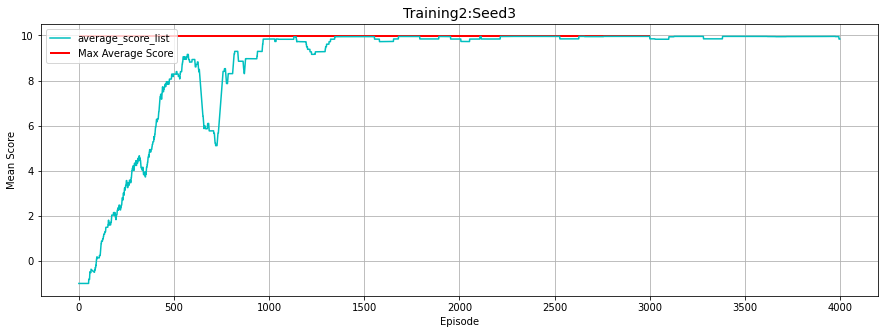

Brain Saved for Training 2 in seed 4
Episode 46	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 475
Score: [9.049205]
Episode 64	Average Score: -0.842975,	Average Step: 498.62504761904766Task solved in step: 476
Score: [9.047405]
Episode 67	Average Score: -0.700045,	Average Step: 498.2985074626866Task solved in step: 290
Score: [9.4188]
Episode 70	Average Score: -0.564060,	Average Step: 495.34285714285716Task solved in step: 257
Score: [9.485199]
Episode 71	Average Score: -0.422521,	Average Step: 491.98591549295776Task solved in step: 394
Score: [9.211203]
Episode 73	Average Score: -0.298463,	Average Step: 490.73972602739724Task solved in step: 307
Score: [9.3844]
Episode 75	Average Score: -0.178712,	Average Step: 488.4567567567568Task solved in step: 167
Score: [9.664399]
Episode 78	Average Score: -0.073577,	Average Step: 484.55128205128204Task solved in step: 360
Score: [9.278203]
Episode 79	Average Score: 0.044800,	Average Step: 482.9746835443038Task solved in step

Episode 2718	Average Score: -0.584102,	Average Step: 491.06Task solved in step: 383
Score: [9.233003]
Episode 2724	Average Score: -0.481772,	Average Step: 489.9Task solved in step: 338
Score: [9.322202]
Episode 2739	Average Score: -0.378550,	Average Step: 488.29Task solved in step: 459
Score: [9.080404]
Episode 2747	Average Score: -0.385536,	Average Step: 491.78Task solved in step: 398
Score: [9.202204]
Episode 2766	Average Score: -0.490914,	Average Step: 494.47Task solved in step: 123
Score: [9.7528]
Episode 2780	Average Score: -0.484088,	Average Step: 491.06Task solved in step: 429
Score: [9.140204]
Episode 2781	Average Score: -0.382686,	Average Step: 490.36Task solved in step: 168
Score: [9.6626]
Episode 2807	Average Score: -0.276060,	Average Step: 487.05Task solved in step: 210
Score: [9.5786]
Episode 2811	Average Score: -0.170275,	Average Step: 484.16Task solved in step: 132
Score: [9.7354]
Episode 2812	Average Score: -0.062921,	Average Step: 480.49Task solved in step: 62
Score: [

Episode 3226	Average Score: 8.347182,	Average Step: 125.75Task solved in step: 63
Score: [9.8732]
Episode 3227	Average Score: 8.455914,	Average Step: 121.39Task solved in step: 58
Score: [9.882]
Episode 3229	Average Score: 8.457334,	Average Step: 120.68Task solved in step: 63
Score: [9.873401]
Episode 3230	Average Score: 8.459049,	Average Step: 119.82Task solved in step: 46
Score: [9.9066]
Episode 3231	Average Score: 8.464651,	Average Step: 117.02Task solved in step: 21
Score: [9.9578]
Episode 3232	Average Score: 8.574230,	Average Step: 112.24Task solved in step: 26
Score: [9.9466]
Episode 3233	Average Score: 8.579850,	Average Step: 109.43Task solved in step: 46
Score: [9.9066]
Episode 3234	Average Score: 8.584399,	Average Step: 107.15Task solved in step: 46
Score: [9.9066]
Episode 3235	Average Score: 8.593182,	Average Step: 102.76Task solved in step: 46
Score: [9.9066]
Episode 3237	Average Score: 8.592942,	Average Step: 102.88Task solved in step: 63
Score: [9.873401]
Episode 3239	Aver

Episode 3314	Average Score: 9.611565,	Average Step: 43.86Task solved in step: 22
Score: [9.955601]
Episode 3315	Average Score: 9.611543,	Average Step: 43.87Task solved in step: 22
Score: [9.955601]
Episode 3316	Average Score: 9.611521,	Average Step: 43.88Task solved in step: 22
Score: [9.955601]
Episode 3317	Average Score: 9.611499,	Average Step: 43.89Task solved in step: 22
Score: [9.955601]
Episode 3318	Average Score: 9.611477,	Average Step: 43.9Task solved in step: 22
Score: [9.955601]
Episode 3319	Average Score: 9.611455,	Average Step: 43.91Task solved in step: 22
Score: [9.955601]
Episode 3320	Average Score: 9.611432,	Average Step: 43.92Task solved in step: 22
Score: [9.955601]
Episode 3321	Average Score: 9.611411,	Average Step: 43.93Task solved in step: 22
Score: [9.955601]
Episode 3324	Average Score: 9.392384,	Average Step: 53.43Task solved in step: 25
Score: [9.9496]
Episode 3325	Average Score: 9.392330,	Average Step: 53.46Task solved in step: 22
Score: [9.955601]
Episode 3326	

Episode 3400	Average Score: 9.728253,	Average Step: 35.58Task solved in step: 19
Score: [9.9616]
Episode 3401	Average Score: 9.728383,	Average Step: 35.52Task solved in step: 21
Score: [9.956]
Episode 3402	Average Score: 9.728449,	Average Step: 35.48Task solved in step: 55
Score: [9.8880005]
Episode 3403	Average Score: 9.727773,	Average Step: 35.81Task solved in step: 73
Score: [9.8522005]
Episode 3404	Average Score: 9.726738,	Average Step: 36.32Task solved in step: 19
Score: [9.9616]
Episode 3405	Average Score: 9.726797,	Average Step: 36.29Task solved in step: 19
Score: [9.9616]
Episode 3406	Average Score: 9.726904,	Average Step: 36.24Task solved in step: 22
Score: [9.9558]
Episode 3407	Average Score: 9.726974,	Average Step: 36.21Task solved in step: 19
Score: [9.9616]
Episode 3408	Average Score: 9.727080,	Average Step: 36.16Task solved in step: 19
Score: [9.9616]
Episode 3409	Average Score: 9.727209,	Average Step: 36.1Task solved in step: 19
Score: [9.9616]
Episode 3410	Average Score

Episode 3568	Average Score: 9.956709,	Average Step: 21.39Task solved in step: 19
Score: [9.9616]
Episode 3569	Average Score: 9.956709,	Average Step: 21.39Task solved in step: 19
Score: [9.9616]
Episode 3570	Average Score: 9.956738,	Average Step: 21.38Task solved in step: 19
Score: [9.9616]
Episode 3571	Average Score: 9.956789,	Average Step: 21.36Task solved in step: 19
Score: [9.9616]
Episode 3572	Average Score: 9.956789,	Average Step: 21.36Task solved in step: 19
Score: [9.9616]
Episode 3573	Average Score: 9.956789,	Average Step: 21.36Task solved in step: 20
Score: [9.9586]
Episode 3574	Average Score: 9.956759,	Average Step: 21.37Task solved in step: 19
Score: [9.9616]
Episode 3575	Average Score: 9.956759,	Average Step: 21.37Task solved in step: 19
Score: [9.9616]
Episode 3576	Average Score: 9.956759,	Average Step: 21.37Task solved in step: 19
Score: [9.9616]
Episode 3577	Average Score: 9.956759,	Average Step: 21.37Task solved in step: 19
Score: [9.9616]
Episode 3578	Average Score: 9.

Episode 3653	Average Score: 9.953050,	Average Step: 23.17Task solved in step: 25
Score: [9.9488]
Episode 3654	Average Score: 9.952923,	Average Step: 23.23Task solved in step: 35
Score: [9.928201]
Episode 3655	Average Score: 9.952588,	Average Step: 23.39Task solved in step: 35
Score: [9.928201]
Episode 3656	Average Score: 9.952358,	Average Step: 23.5Task solved in step: 25
Score: [9.9488]
Episode 3657	Average Score: 9.952230,	Average Step: 23.56Task solved in step: 23
Score: [9.9536]
Episode 3658	Average Score: 9.952150,	Average Step: 23.6Task solved in step: 23
Score: [9.9536]
Episode 3659	Average Score: 9.952069,	Average Step: 23.64Task solved in step: 25
Score: [9.9492]
Episode 3660	Average Score: 9.951946,	Average Step: 23.7Task solved in step: 25
Score: [9.9492]
Episode 3661	Average Score: 9.951822,	Average Step: 23.76Task solved in step: 25
Score: [9.9488]
Episode 3662	Average Score: 9.951694,	Average Step: 23.82Task solved in step: 25
Score: [9.9488]
Episode 3663	Average Score: 9

Episode 3739	Average Score: 9.808781,	Average Step: 45.04Task solved in step: 27
Score: [9.9452]
Episode 3740	Average Score: 9.808697,	Average Step: 45.08Task solved in step: 27
Score: [9.9452]
Episode 3741	Average Score: 9.808612,	Average Step: 45.12Task solved in step: 25
Score: [9.948]
Episode 3742	Average Score: 9.808604,	Average Step: 45.12Task solved in step: 22
Score: [9.955]
Episode 3743	Average Score: 9.808690,	Average Step: 45.08Task solved in step: 25
Score: [9.948]
Episode 3744	Average Score: 9.808679,	Average Step: 45.08Task solved in step: 22
Score: [9.955]
Episode 3745	Average Score: 9.808710,	Average Step: 45.06Task solved in step: 25
Score: [9.948]
Episode 3746	Average Score: 9.808655,	Average Step: 45.08Task solved in step: 22
Score: [9.955]
Episode 3747	Average Score: 9.808669,	Average Step: 45.07Task solved in step: 27
Score: [9.9452]
Episode 3748	Average Score: 9.808584,	Average Step: 45.11Task solved in step: 29
Score: [9.9404]
Episode 3749	Average Score: 9.808476

Episode 3827	Average Score: 9.612144,	Average Step: 43.35Task solved in step: 29
Score: [9.940201]
Episode 3828	Average Score: 9.612105,	Average Step: 43.37Task solved in step: 29
Score: [9.940801]
Episode 3829	Average Score: 9.611976,	Average Step: 43.43Task solved in step: 25
Score: [9.9488]
Episode 3830	Average Score: 9.611936,	Average Step: 43.45Task solved in step: 25
Score: [9.9488]
Episode 3831	Average Score: 9.611896,	Average Step: 43.47Task solved in step: 41
Score: [9.917601]
Episode 3832	Average Score: 9.611544,	Average Step: 43.65Task solved in step: 27
Score: [9.9444]
Episode 3833	Average Score: 9.611460,	Average Step: 43.69Task solved in step: 25
Score: [9.9488]
Episode 3834	Average Score: 9.611419,	Average Step: 43.71Task solved in step: 25
Score: [9.9488]
Episode 3835	Average Score: 9.611368,	Average Step: 43.74Task solved in step: 27
Score: [9.9446]
Episode 3836	Average Score: 9.611263,	Average Step: 43.79Task solved in step: 31
Score: [9.937799]
Episode 3837	Average S

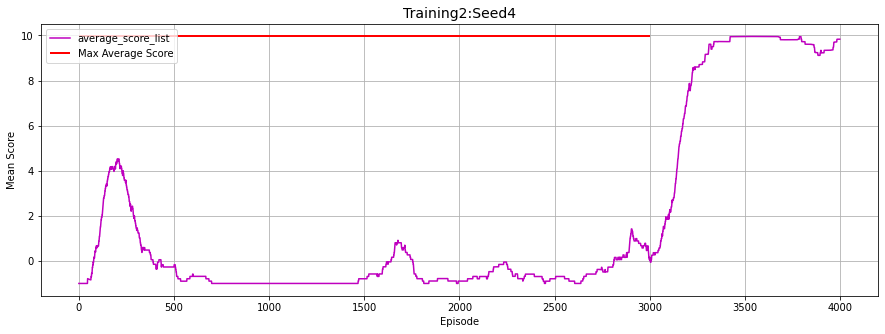

CPU times: user 2h 32min, sys: 13h 33min 18s, total: 16h 5min 18s
Wall time: 4h 35min 18s


In [17]:
%%time

seed_number=5

for seed in range(seed_number):
    

                
    #Logged values


    scores = []
    step=[] 
    average_score_list=[]                                           #Saves last 100 average scores
    average_step_list=[]   
    scores_window = deque(maxlen=100)                               # Saves last 100 avarage solved steps
    step_window = deque(maxlen=100)                                 # last 100 scores

    #Hyperparamaters:

    n_episodes=4000
    max_t=500
    eps_start=1.0
    eps=eps_start
    eps_end=0.01 
    eps_decay=0.995


    #Call DQN function
    agent = DQN_Agent(state_size, action_size, seed=seed)
     
    #Load weights:    
    if seed == 0:
        print("Brain Loaded for Train_2 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train1_Seed0.pth'))
    if seed == 1:
        print("Brain Loaded for Train_2 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train1_Seed1.pth'))
    if seed == 2:
        print("Brain Loaded for Training 2 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train1_Seed2.pth'))
    if seed == 3:
        print("Brain Loaded for Training 2 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train1_Seed3.pth'))
    if seed == 4:
        print("Brain Saved for Training 2 in seed",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train1_Seed4.pth'))


    env.reset()
    for episode in range(1,n_episodes+1):

        done=False
        #Reset environment for each episode:
        env.reset()
        #Get information from reset environment:
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        # get initial state of the unity environment
        state = decision_steps.obs[0]
        #Score list containing scores from each episode:
        score = 0
        mean_score=[]
        for i in range(max_t):


            action = agent.act(state, eps)        #action as numpy.int64
            action_fixed=np.array([[action]])
            action_tuple = ActionTuple()
            action_tuple.add_discrete(action_fixed)

            #Set action information
            env.set_actions(behavior_name,action_tuple)
            # Move the simulation forward
            env.step()
            # Get the new simulation results
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            # get the next states for each unity agent in the environment
            next_state = decision_steps.obs[0]

            # get the rewards for each unity agent in the environment
            rewards = decision_steps.reward

            #If episode dones:
            if(len(terminal_steps.reward)!=0):

                        done= True
                        rewards= terminal_steps.reward
                        next_state = terminal_steps.obs[0]




            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent.step(state, action, rewards, next_state,done)

            #New state is the next state:
            state = next_state

            #Iterate rewards on score
            score += rewards


            if rewards > 0:
                print("Task solved in step:",i)
                print("Score:",score)


            if done:

                break


        #Decrease epsilon parameter step by step:
        eps = max(eps_end, eps_decay*eps) 

        #Save last step
        step.append(i)
        # save last steps for window for average 100:        
        step_window.append(i)
        #Create list for avarge 100 scores
        average_step_list.append(np.mean(step_window))

        # save most recent score:
        scores.append(score)
        # save most recent score for window for average 100:        
        scores_window.append(score)  
        #Create list for avarge 100 scores
        average_score_list.append(np.mean(scores_window))



        print('\rEpisode {}\tAverage Score: {:.6f},\tAverage Step: {}'.format(episode, np.mean(scores_window),np.mean(step_window)), end="")
       
       
        if episode % 1000 == 0:
    
            if seed == 0:
                print("Brain Saved for Train_2 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train2_Seed0.pth')
            if seed == 1:
                print("Brain Saved for Train_2 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train2_Seed1.pth')
            if seed == 2:
                print("Brain Saved for Train_2 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train2_Seed2.pth')
            if seed == 3:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train2_Seed3.pth')

            if seed == 4:
                print("Brain Saved for Train_1 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train2_Seed4.pth')
                
                
                

    #Save datas per each seed
    score_shape=len(scores)
    df= pd.DataFrame(list(zip(np.array(scores).reshape(score_shape).tolist(), average_score_list, step,average_step_list)), columns= ['Scores','Mean_Scores','Completed_Steps','MeanCompleted_Steps'])
    df.to_csv('Train_1_Seed_'+str(seed)+'.csv')
    
    #Plot mean reward:
    color=["b","g","r","c","m"]
    plt.rcParams['figure.figsize'] = [15,5]
    plt.plot(np.arange(len(average_score_list)), average_score_list,label="average_score_list",color=color[seed])
    plt.hlines(y=max(average_score_list), xmin=0, xmax=3000, colors='red', linestyles='-', lw=2, label='Max Average Score')
    plt.xlabel('Episode', fontsize=10)
    plt.ylabel('Mean Score', fontsize=10)
    plt.title("Training1:Seed{}".format(seed),fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("Training1:Seed{}.png".format(seed))
    plt.show()
    
    



# Third training:Default

In [18]:
env.close()

In [19]:
default_file="HER_3_no.app"
alternative_file="HER_3_no_alternate.app"
default_logged="HER_3_no_log.app"
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=default_file,worker_id=0,side_channels=[channel])
channel.set_configuration_parameters(time_scale = 100.0)
# get the behavior:
env.reset()
behavior_name = list(env.behavior_specs)[0]
print(behavior_name)
spec = env.behavior_specs[behavior_name]
# reset the environment
env.reset()
decision_steps, terminal_steps = env.get_steps(behavior_name)

for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")
    
action_size=branch_size    
print('Number of actions:', action_size)

# examine the state space 
state=decision_steps.obs[0][0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('States have length:', type(state))
env.reset()

HERTask_2?team=0
Action number 0 has 5 different options
Number of actions: 5
States look like: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.46935856 0.         1.
 0.         0.         0.         0.         0.         0.52897596
 0.         1.         0.         0.         0.         0.
 0.         0.52897596 0.         1.         0.         0.
 0.         0.         0.         0.7077888  0.         1.
 0.        

Brain Loaded for Train_3 in seed: 0
Episode 33	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 435
Score: [9.128004]
Episode 70	Average Score: -0.855308,	Average Step: 498.08571428571434Task solved in step: 268
Score: [9.4632]
Episode 86	Average Score: -0.760562,	Average Step: 495.56976744186045Task solved in step: 431
Score: [9.137004]
Episode 91	Average Score: -0.662322,	Average Step: 495.01098901098964Task solved in step: 407
Score: [9.184204]
Episode 93	Average Score: -0.560076,	Average Step: 494.10752688172045Task solved in step: 360
Score: [9.279403]
Episode 98	Average Score: -0.477629,	Average Step: 492.93877551020413Task solved in step: 90
Score: [9.818999]
Episode 102	Average Score: -0.379886,	Average Step: 488.976868686869Task solved in step: 124
Score: [9.7512]
Episode 103	Average Score: -0.272374,	Average Step: 485.22Task solved in step: 415
Score: [9.168804]
Episode 104	Average Score: -0.170686,	Average Step: 484.38Task solved in step: 381
Score: [9.23780

Episode 250	Average Score: 5.051621,	Average Step: 323.46Task solved in step: 51
Score: [9.8966]
Episode 254	Average Score: 5.052991,	Average Step: 322.77Task solved in step: 51
Score: [9.8977995]
Episode 255	Average Score: 5.060573,	Average Step: 318.98Task solved in step: 319
Score: [9.360601]
Episode 256	Average Score: 5.055892,	Average Step: 321.32Task solved in step: 49
Score: [9.901]
Episode 259	Average Score: 4.951045,	Average Step: 323.74Task solved in step: 80
Score: [9.839]
Episode 260	Average Score: 4.955365,	Average Step: 321.58Task solved in step: 41
Score: [9.9178]
Episode 261	Average Score: 4.956881,	Average Step: 320.83Task solved in step: 31
Score: [9.9366]
Episode 262	Average Score: 5.066247,	Average Step: 316.15Task solved in step: 286
Score: [9.427601]
Episode 263	Average Score: 5.170523,	Average Step: 314.02Task solved in step: 54
Score: [9.8918]
Episode 264	Average Score: 5.279441,	Average Step: 309.57Task solved in step: 382
Score: [9.234603]
Episode 265	Average 

Episode 374	Average Score: 6.363281,	Average Step: 217.68Task solved in step: 150
Score: [9.6996]
Episode 375	Average Score: 6.470276,	Average Step: 214.19Task solved in step: 52
Score: [9.8942]
Episode 377	Average Score: 6.476028,	Average Step: 211.31Task solved in step: 135
Score: [9.7294]
Episode 378	Average Score: 6.473984,	Average Step: 212.33Task solved in step: 77
Score: [9.8442]
Episode 379	Average Score: 6.476188,	Average Step: 211.22Task solved in step: 39
Score: [9.9218]
Episode 380	Average Score: 6.477926,	Average Step: 210.36Task solved in step: 37
Score: [9.9246]
Episode 383	Average Score: 6.372534,	Average Step: 213.05Task solved in step: 29
Score: [9.9406]
Episode 384	Average Score: 6.481940,	Average Step: 208.35Task solved in step: 26
Score: [9.9462]
Episode 385	Average Score: 6.481914,	Average Step: 208.36Task solved in step: 93
Score: [9.8126]
Episode 386	Average Score: 6.590040,	Average Step: 204.3Task solved in step: 66
Score: [9.8668]
Episode 388	Average Score: 6.

Episode 475	Average Score: 8.138201,	Average Step: 130.23Task solved in step: 33
Score: [9.933]
Episode 476	Average Score: 8.138589,	Average Step: 130.04Task solved in step: 69
Score: [9.861]
Episode 477	Average Score: 8.247198,	Average Step: 125.74Task solved in step: 42
Score: [9.9154005]
Episode 478	Average Score: 8.249059,	Average Step: 124.81Task solved in step: 46
Score: [9.906]
Episode 479	Average Score: 8.249677,	Average Step: 124.5Task solved in step: 30
Score: [9.938399]
Episode 480	Average Score: 8.249844,	Average Step: 124.41Task solved in step: 33
Score: [9.9338]
Episode 481	Average Score: 8.249935,	Average Step: 124.37Task solved in step: 28
Score: [9.943601]
Episode 482	Average Score: 8.359371,	Average Step: 119.66Task solved in step: 32
Score: [9.9352]
Episode 483	Average Score: 8.468722,	Average Step: 114.99Task solved in step: 29
Score: [9.941601]
Episode 484	Average Score: 8.468732,	Average Step: 114.99Task solved in step: 38
Score: [9.9236]
Episode 485	Average Score

Episode 849	Average Score: 0.913901,	Average Step: 442.13Task solved in step: 44
Score: [9.9108]
Episode 850	Average Score: 1.023009,	Average Step: 437.58Task solved in step: 32
Score: [9.9356]
Episode 851	Average Score: 1.132365,	Average Step: 432.91Task solved in step: 342
Score: [9.315602]
Episode 852	Average Score: 1.131101,	Average Step: 433.55Task solved in step: 124
Score: [9.7514]
Episode 858	Average Score: 1.023307,	Average Step: 437.44Task solved in step: 350
Score: [9.298402]
Episode 860	Average Score: 1.022915,	Average Step: 437.63Task solved in step: 90
Score: [9.8192]
Episode 861	Average Score: 1.131107,	Average Step: 433.54Task solved in step: 26
Score: [9.9462]
Episode 862	Average Score: 1.240569,	Average Step: 428.81Task solved in step: 255
Score: [9.4892]
Episode 863	Average Score: 1.345461,	Average Step: 426.37Task solved in step: 170
Score: [9.6594]
Episode 866	Average Score: 1.452055,	Average Step: 423.08Task solved in step: 99
Score: [9.8014]
Episode 867	Average S

Episode 1193	Average Score: 6.640766,	Average Step: 278.93Task solved in step: 87
Score: [9.8246]
Episode 1194	Average Score: 6.749012,	Average Step: 274.81Task solved in step: 255
Score: [9.4883995]
Episode 1195	Average Score: 6.853896,	Average Step: 272.37Task solved in step: 43
Score: [9.913601]
Episode 1196	Average Score: 6.963032,	Average Step: 267.81Task solved in step: 326
Score: [9.347801]
Episode 1198	Average Score: 6.852906,	Average Step: 272.87Task solved in step: 193
Score: [9.6119995]
Episode 1200	Average Score: 6.743466,	Average Step: 277.58Task solved in step: 290
Score: [9.4186]
Episode 1201	Average Score: 6.739304,	Average Step: 279.66Task solved in step: 81
Score: [9.836801]
Episode 1202	Average Score: 6.847672,	Average Step: 275.48Task solved in step: 97
Score: [9.8057995]
Episode 1203	Average Score: 6.955729,	Average Step: 271.46Task solved in step: 406
Score: [9.187803]
Episode 1205	Average Score: 6.841504,	Average Step: 278.57Task solved in step: 67
Score: [9.865]

Episode 1361	Average Score: 3.515252,	Average Step: 341.58Task solved in step: 194
Score: [9.6102]
Episode 1363	Average Score: 3.514856,	Average Step: 341.77Task solved in step: 113
Score: [9.7738]
Episode 1364	Average Score: 3.622593,	Average Step: 337.91Task solved in step: 62
Score: [9.874201]
Episode 1365	Average Score: 3.731336,	Average Step: 333.54Task solved in step: 159
Score: [9.68]
Episode 1366	Average Score: 3.838135,	Average Step: 330.14Task solved in step: 29
Score: [9.941]
Episode 1367	Average Score: 3.947546,	Average Step: 325.44Task solved in step: 39
Score: [9.921]
Episode 1368	Average Score: 3.952731,	Average Step: 322.85Task solved in step: 51
Score: [9.8976]
Episode 1369	Average Score: 4.061707,	Average Step: 318.37Task solved in step: 27
Score: [9.944]
Episode 1370	Average Score: 4.171147,	Average Step: 313.65Task solved in step: 111
Score: [9.7766]
Episode 1371	Average Score: 4.173086,	Average Step: 312.68Task solved in step: 60
Score: [9.879601]
Episode 1374	Aver

Episode 1575	Average Score: 8.068635,	Average Step: 115.08Task solved in step: 22
Score: [9.9546]
Episode 1576	Average Score: 8.178180,	Average Step: 110.31Task solved in step: 22
Score: [9.9546]
Episode 1578	Average Score: 8.179753,	Average Step: 109.52Task solved in step: 34
Score: [9.9304]
Episode 1579	Average Score: 8.179793,	Average Step: 109.5Task solved in step: 39
Score: [9.9212]
Episode 1580	Average Score: 8.179741,	Average Step: 109.53Task solved in step: 26
Score: [9.9468]
Episode 1581	Average Score: 8.180107,	Average Step: 109.35Task solved in step: 102
Score: [9.794]
Episode 1582	Average Score: 8.288048,	Average Step: 105.38Task solved in step: 23
Score: [9.9524]
Episode 1583	Average Score: 8.290331,	Average Step: 104.24Task solved in step: 23
Score: [9.9524]
Episode 1584	Average Score: 8.399855,	Average Step: 99.48Task solved in step: 22
Score: [9.955601]
Episode 1587	Average Score: 8.181981,	Average Step: 108.41Task solved in step: 23
Score: [9.9536]
Episode 1607	Average

Episode 1736	Average Score: 6.383917,	Average Step: 207.32Task solved in step: 28
Score: [9.943]
Episode 1737	Average Score: 6.493348,	Average Step: 202.61Task solved in step: 31
Score: [9.936]
Episode 1738	Average Score: 6.602707,	Average Step: 197.93Task solved in step: 31
Score: [9.936]
Episode 1739	Average Score: 6.712067,	Average Step: 193.25Task solved in step: 24
Score: [9.951799]
Episode 1740	Average Score: 6.821585,	Average Step: 188.5Task solved in step: 24
Score: [9.950399]
Episode 1741	Average Score: 6.931089,	Average Step: 183.75Task solved in step: 24
Score: [9.950399]
Episode 1743	Average Score: 7.040593,	Average Step: 179.0Task solved in step: 24
Score: [9.950999]
Episode 1744	Average Score: 7.040595,	Average Step: 179.0Task solved in step: 61
Score: [9.8778]
Episode 1745	Average Score: 7.039885,	Average Step: 179.36Task solved in step: 23
Score: [9.9526005]
Episode 1746	Average Score: 7.149412,	Average Step: 174.6Task solved in step: 366
Score: [9.266003]
Episode 1747	

Episode 1824	Average Score: 9.030962,	Average Step: 83.89Task solved in step: 22
Score: [9.954801]
Episode 1825	Average Score: 9.140510,	Average Step: 79.12Task solved in step: 50
Score: [9.8982]
Episode 1826	Average Score: 9.140572,	Average Step: 79.09Task solved in step: 22
Score: [9.954801]
Episode 1827	Average Score: 9.140867,	Average Step: 78.94Task solved in step: 22
Score: [9.954801]
Episode 1828	Average Score: 9.142538,	Average Step: 78.1Task solved in step: 22
Score: [9.954]
Episode 1829	Average Score: 9.252079,	Average Step: 73.33Task solved in step: 22
Score: [9.9546]
Episode 1830	Average Score: 9.254688,	Average Step: 72.02Task solved in step: 23
Score: [9.9526005]
Episode 1831	Average Score: 9.257608,	Average Step: 70.56Task solved in step: 23
Score: [9.952999]
Episode 1832	Average Score: 9.266745,	Average Step: 65.99Task solved in step: 22
Score: [9.955]
Episode 1833	Average Score: 9.266769,	Average Step: 65.98Task solved in step: 22
Score: [9.955]
Episode 1834	Average Sc

Episode 1908	Average Score: 9.821110,	Average Step: 38.86Task solved in step: 22
Score: [9.954801]
Episode 1909	Average Score: 9.930658,	Average Step: 34.09Task solved in step: 22
Score: [9.954801]
Episode 1910	Average Score: 9.930658,	Average Step: 34.09Task solved in step: 28
Score: [9.9434]
Episode 1911	Average Score: 9.930564,	Average Step: 34.14Task solved in step: 22
Score: [9.954801]
Episode 1912	Average Score: 9.930564,	Average Step: 34.14Task solved in step: 25
Score: [9.9494]
Episode 1913	Average Score: 9.930531,	Average Step: 34.16Task solved in step: 25
Score: [9.9492]
Episode 1914	Average Score: 9.930495,	Average Step: 34.18Task solved in step: 22
Score: [9.955]
Episode 1915	Average Score: 9.930553,	Average Step: 34.15Task solved in step: 22
Score: [9.955]
Episode 1916	Average Score: 9.930554,	Average Step: 34.15Task solved in step: 23
Score: [9.952]
Episode 1917	Average Score: 9.930592,	Average Step: 34.13Task solved in step: 210
Score: [9.5798]
Episode 1918	Average Score

Episode 2076	Average Score: 9.931487,	Average Step: 33.71Task solved in step: 22
Score: [9.955]
Episode 2077	Average Score: 9.932712,	Average Step: 33.1Task solved in step: 22
Score: [9.955]
Episode 2078	Average Score: 9.932757,	Average Step: 33.08Task solved in step: 22
Score: [9.955]
Episode 2079	Average Score: 9.932757,	Average Step: 33.08Task solved in step: 22
Score: [9.955]
Episode 2080	Average Score: 9.932757,	Average Step: 33.08Task solved in step: 22
Score: [9.955]
Episode 2081	Average Score: 9.932757,	Average Step: 33.08Task solved in step: 22
Score: [9.954]
Episode 2082	Average Score: 9.932747,	Average Step: 33.08Task solved in step: 77
Score: [9.845799]
Episode 2083	Average Score: 9.931701,	Average Step: 33.61Task solved in step: 22
Score: [9.955]
Episode 2084	Average Score: 9.931703,	Average Step: 33.61Task solved in step: 22
Score: [9.955]
Episode 2085	Average Score: 9.931721,	Average Step: 33.6Task solved in step: 22
Score: [9.955]
Episode 2086	Average Score: 9.931724,	A

Episode 2247	Average Score: 9.605533,	Average Step: 46.65Task solved in step: 49
Score: [9.901]
Episode 2248	Average Score: 9.604993,	Average Step: 46.92Task solved in step: 22
Score: [9.954801]
Episode 2249	Average Score: 9.604993,	Average Step: 46.92Task solved in step: 22
Score: [9.954801]
Episode 2250	Average Score: 9.604993,	Average Step: 46.92Task solved in step: 22
Score: [9.954801]
Episode 2251	Average Score: 9.604992,	Average Step: 46.92Task solved in step: 22
Score: [9.955]
Episode 2252	Average Score: 9.604995,	Average Step: 46.92Task solved in step: 22
Score: [9.954801]
Episode 2253	Average Score: 9.604995,	Average Step: 46.92Task solved in step: 22
Score: [9.954801]
Episode 2254	Average Score: 9.604993,	Average Step: 46.92Task solved in step: 22
Score: [9.954801]
Episode 2255	Average Score: 9.604990,	Average Step: 46.92Task solved in step: 22
Score: [9.954801]
Episode 2256	Average Score: 9.604988,	Average Step: 46.92Task solved in step: 22
Score: [9.954801]
Episode 2257	Ave

Episode 2331	Average Score: 9.835501,	Average Step: 31.68Task solved in step: 42
Score: [9.9146]
Episode 2332	Average Score: 9.835099,	Average Step: 31.88Task solved in step: 151
Score: [9.6962]
Episode 2333	Average Score: 9.832514,	Average Step: 33.17Task solved in step: 22
Score: [9.954801]
Episode 2334	Average Score: 9.832513,	Average Step: 33.17Task solved in step: 22
Score: [9.954801]
Episode 2335	Average Score: 9.832520,	Average Step: 33.17Task solved in step: 22
Score: [9.955]
Episode 2336	Average Score: 9.942072,	Average Step: 28.4Task solved in step: 22
Score: [9.955]
Episode 2337	Average Score: 9.943381,	Average Step: 27.75Task solved in step: 22
Score: [9.955]
Episode 2338	Average Score: 9.943848,	Average Step: 27.52Task solved in step: 20
Score: [9.958]
Episode 2339	Average Score: 9.943880,	Average Step: 27.5Task solved in step: 60
Score: [9.8784]
Episode 2340	Average Score: 9.943210,	Average Step: 27.83Task solved in step: 22
Score: [9.955]
Episode 2341	Average Score: 9.94

Episode 2418	Average Score: 9.723388,	Average Step: 37.75Task solved in step: 22
Score: [9.954801]
Episode 2419	Average Score: 9.723388,	Average Step: 37.75Task solved in step: 22
Score: [9.954801]
Episode 2420	Average Score: 9.723388,	Average Step: 37.75Task solved in step: 22
Score: [9.954801]
Episode 2421	Average Score: 9.723388,	Average Step: 37.75Task solved in step: 22
Score: [9.955]
Episode 2422	Average Score: 9.723445,	Average Step: 37.72Task solved in step: 22
Score: [9.955]
Episode 2423	Average Score: 9.723877,	Average Step: 37.5Task solved in step: 22
Score: [9.955]
Episode 2424	Average Score: 9.723880,	Average Step: 37.5Task solved in step: 22
Score: [9.955]
Episode 2425	Average Score: 9.723882,	Average Step: 37.5Task solved in step: 22
Score: [9.955]
Episode 2426	Average Score: 9.723885,	Average Step: 37.5Task solved in step: 22
Score: [9.955]
Episode 2427	Average Score: 9.723885,	Average Step: 37.5Task solved in step: 22
Score: [9.955]
Episode 2428	Average Score: 9.723885

Episode 2503	Average Score: 9.944736,	Average Step: 27.07Task solved in step: 22
Score: [9.955]
Episode 2504	Average Score: 9.944739,	Average Step: 27.07Task solved in step: 22
Score: [9.955]
Episode 2505	Average Score: 9.944742,	Average Step: 27.07Task solved in step: 22
Score: [9.955]
Episode 2506	Average Score: 9.946296,	Average Step: 26.29Task solved in step: 22
Score: [9.955]
Episode 2507	Average Score: 9.947160,	Average Step: 25.86Task solved in step: 104
Score: [9.790999]
Episode 2508	Average Score: 9.945520,	Average Step: 26.68Task solved in step: 22
Score: [9.954801]
Episode 2509	Average Score: 9.945518,	Average Step: 26.68Task solved in step: 22
Score: [9.954801]
Episode 2510	Average Score: 9.945515,	Average Step: 26.68Task solved in step: 22
Score: [9.954801]
Episode 2511	Average Score: 9.945512,	Average Step: 26.68Task solved in step: 22
Score: [9.954801]
Episode 2512	Average Score: 9.945510,	Average Step: 26.68Task solved in step: 22
Score: [9.955]
Episode 2513	Average Sco

Episode 2590	Average Score: 9.611966,	Average Step: 43.48Task solved in step: 22
Score: [9.954801]
Episode 2591	Average Score: 9.611967,	Average Step: 43.48Task solved in step: 22
Score: [9.954801]
Episode 2592	Average Score: 9.611966,	Average Step: 43.48Task solved in step: 22
Score: [9.955]
Episode 2593	Average Score: 9.611969,	Average Step: 43.48Task solved in step: 22
Score: [9.955]
Episode 2594	Average Score: 9.611971,	Average Step: 43.48Task solved in step: 22
Score: [9.955]
Episode 2595	Average Score: 9.611974,	Average Step: 43.48Task solved in step: 22
Score: [9.955]
Episode 2596	Average Score: 9.611977,	Average Step: 43.48Task solved in step: 23
Score: [9.9522]
Episode 2597	Average Score: 9.611992,	Average Step: 43.47Task solved in step: 22
Score: [9.955]
Episode 2598	Average Score: 9.612048,	Average Step: 43.44Task solved in step: 22
Score: [9.955]
Episode 2599	Average Score: 9.612048,	Average Step: 43.44Task solved in step: 22
Score: [9.955]
Episode 2600	Average Score: 9.612

Episode 2675	Average Score: 9.951402,	Average Step: 23.77Task solved in step: 22
Score: [9.955]
Episode 2676	Average Score: 9.951404,	Average Step: 23.77Task solved in step: 22
Score: [9.955]
Episode 2677	Average Score: 9.951406,	Average Step: 23.77Task solved in step: 22
Score: [9.955]
Episode 2678	Average Score: 9.951408,	Average Step: 23.77Task solved in step: 22
Score: [9.955]
Episode 2679	Average Score: 9.951410,	Average Step: 23.77Task solved in step: 22
Score: [9.9558]
Episode 2680	Average Score: 9.951420,	Average Step: 23.77Task solved in step: 22
Score: [9.955]
Episode 2681	Average Score: 9.951422,	Average Step: 23.77Task solved in step: 22
Score: [9.955]
Episode 2682	Average Score: 9.951674,	Average Step: 23.64Task solved in step: 22
Score: [9.954801]
Episode 2683	Average Score: 9.951672,	Average Step: 23.64Task solved in step: 36
Score: [9.9264]
Episode 2685	Average Score: 9.841835,	Average Step: 28.55Task solved in step: 20
Score: [9.9596]
Episode 2686	Average Score: 9.8419

Episode 2763	Average Score: 9.617265,	Average Step: 40.83Task solved in step: 24
Score: [9.9506]
Episode 2764	Average Score: 9.617222,	Average Step: 40.85Task solved in step: 22
Score: [9.9558]
Episode 2765	Average Score: 9.617232,	Average Step: 40.85Task solved in step: 22
Score: [9.9558]
Episode 2766	Average Score: 9.617242,	Average Step: 40.85Task solved in step: 22
Score: [9.9558]
Episode 2767	Average Score: 9.617242,	Average Step: 40.85Task solved in step: 22
Score: [9.9558]
Episode 2768	Average Score: 9.617251,	Average Step: 40.85Task solved in step: 22
Score: [9.9558]
Episode 2769	Average Score: 9.617260,	Average Step: 40.85Task solved in step: 22
Score: [9.9558]
Episode 2770	Average Score: 9.617286,	Average Step: 40.84Task solved in step: 22
Score: [9.9558]
Episode 2771	Average Score: 9.617293,	Average Step: 40.84Task solved in step: 22
Score: [9.955]
Episode 2772	Average Score: 9.617293,	Average Step: 40.84Task solved in step: 22
Score: [9.955]
Episode 2773	Average Score: 9.61

Episode 2848	Average Score: 9.953485,	Average Step: 22.87Task solved in step: 22
Score: [9.955]
Episode 2849	Average Score: 9.953504,	Average Step: 22.86Task solved in step: 22
Score: [9.955]
Episode 2850	Average Score: 9.953553,	Average Step: 22.84Task solved in step: 22
Score: [9.955]
Episode 2851	Average Score: 9.953548,	Average Step: 22.84Task solved in step: 22
Score: [9.955]
Episode 2852	Average Score: 9.953549,	Average Step: 22.84Task solved in step: 22
Score: [9.954801]
Episode 2853	Average Score: 9.953549,	Average Step: 22.84Task solved in step: 22
Score: [9.954801]
Episode 2854	Average Score: 9.953548,	Average Step: 22.84Task solved in step: 22
Score: [9.955]
Episode 2855	Average Score: 9.953551,	Average Step: 22.84Task solved in step: 22
Score: [9.955]
Episode 2856	Average Score: 9.953543,	Average Step: 22.84Task solved in step: 22
Score: [9.955]
Episode 2857	Average Score: 9.953544,	Average Step: 22.84Task solved in step: 22
Score: [9.955]
Episode 2858	Average Score: 9.9535

Episode 3016	Average Score: 9.928786,	Average Step: 35.08Task solved in step: 20
Score: [9.9596]
Episode 3017	Average Score: 9.929278,	Average Step: 34.84Task solved in step: 22
Score: [9.954801]
Episode 3018	Average Score: 9.929246,	Average Step: 34.86Task solved in step: 22
Score: [9.954801]
Episode 3019	Average Score: 9.929392,	Average Step: 34.79Task solved in step: 22
Score: [9.955]
Episode 3020	Average Score: 9.932755,	Average Step: 33.11Task solved in step: 22
Score: [9.955]
Episode 3021	Average Score: 9.933017,	Average Step: 32.98Task solved in step: 22
Score: [9.955]
Episode 3022	Average Score: 9.933636,	Average Step: 32.67Task solved in step: 22
Score: [9.955]
Episode 3023	Average Score: 9.933605,	Average Step: 32.69Task solved in step: 23
Score: [9.952801]
Episode 3024	Average Score: 9.933537,	Average Step: 32.72Task solved in step: 22
Score: [9.954]
Episode 3025	Average Score: 9.933529,	Average Step: 32.72Task solved in step: 20
Score: [9.9596]
Episode 3026	Average Score: 9

Episode 3102	Average Score: 9.828314,	Average Step: 35.3Task solved in step: 22
Score: [9.955]
Episode 3103	Average Score: 9.828317,	Average Step: 35.3Task solved in step: 20
Score: [9.9596]
Episode 3105	Average Score: 9.718817,	Average Step: 40.05Task solved in step: 20
Score: [9.9596]
Episode 3106	Average Score: 9.718873,	Average Step: 40.03Task solved in step: 172
Score: [9.654999]
Episode 3107	Average Score: 9.715828,	Average Step: 41.55Task solved in step: 138
Score: [9.723]
Episode 3108	Average Score: 9.713507,	Average Step: 42.71Task solved in step: 22
Score: [9.955]
Episode 3109	Average Score: 9.713508,	Average Step: 42.71Task solved in step: 21
Score: [9.957601]
Episode 3110	Average Score: 9.713534,	Average Step: 42.7Task solved in step: 20
Score: [9.958]
Episode 3111	Average Score: 9.713563,	Average Step: 42.68Task solved in step: 20
Score: [9.9596]
Episode 3112	Average Score: 9.713609,	Average Step: 42.66Task solved in step: 20
Score: [9.958]
Episode 3113	Average Score: 9.72

Episode 3193	Average Score: 9.237379,	Average Step: 80.77Task solved in step: 25
Score: [9.948999]
Episode 3197	Average Score: 8.908767,	Average Step: 95.07Task solved in step: 21
Score: [9.9564]
Episode 3198	Average Score: 8.908774,	Average Step: 95.06Task solved in step: 21
Score: [9.9564]
Episode 3199	Average Score: 8.908791,	Average Step: 95.05Task solved in step: 21
Score: [9.9564]
Episode 3200	Average Score: 8.908808,	Average Step: 95.04Task solved in step: 25
Score: [9.948999]
Episode 3201	Average Score: 8.908749,	Average Step: 95.07Task solved in step: 78
Score: [9.8428]
Episode 3202	Average Score: 8.907629,	Average Step: 95.63Task solved in step: 60
Score: [9.8792]
Episode 3203	Average Score: 8.906871,	Average Step: 96.01Task solved in step: 45
Score: [9.9086]
Episode 3204	Average Score: 8.906361,	Average Step: 96.26Task solved in step: 22
Score: [9.9544]
Episode 3205	Average Score: 9.015903,	Average Step: 91.49Task solved in step: 34
Score: [9.931]
Episode 3206	Average Score:

Episode 3281	Average Score: 9.507848,	Average Step: 45.42Task solved in step: 25
Score: [9.948999]
Episode 3282	Average Score: 9.507788,	Average Step: 45.45Task solved in step: 25
Score: [9.948999]
Episode 3283	Average Score: 9.507727,	Average Step: 45.48Task solved in step: 25
Score: [9.948999]
Episode 3284	Average Score: 9.617217,	Average Step: 40.74Task solved in step: 25
Score: [9.948999]
Episode 3285	Average Score: 9.617143,	Average Step: 40.78Task solved in step: 25
Score: [9.948999]
Episode 3286	Average Score: 9.617069,	Average Step: 40.82Task solved in step: 25
Score: [9.948999]
Episode 3287	Average Score: 9.617356,	Average Step: 40.68Task solved in step: 25
Score: [9.948999]
Episode 3288	Average Score: 9.617283,	Average Step: 40.72Task solved in step: 21
Score: [9.9564]
Episode 3290	Average Score: 9.507720,	Average Step: 45.5Task solved in step: 21
Score: [9.9564]
Episode 3291	Average Score: 9.507720,	Average Step: 45.5Task solved in step: 22
Score: [9.955]
Episode 3292	Averag

Episode 3456	Average Score: 9.618167,	Average Step: 40.18Task solved in step: 21
Score: [9.9564]
Episode 3457	Average Score: 9.727730,	Average Step: 35.4Task solved in step: 21
Score: [9.9564]
Episode 3458	Average Score: 9.727730,	Average Step: 35.4Task solved in step: 46
Score: [9.9066]
Episode 3459	Average Score: 9.727233,	Average Step: 35.65Task solved in step: 21
Score: [9.9564]
Episode 3460	Average Score: 9.727233,	Average Step: 35.65Task solved in step: 24
Score: [9.950999]
Episode 3461	Average Score: 9.727179,	Average Step: 35.68Task solved in step: 21
Score: [9.9564]
Episode 3462	Average Score: 9.836742,	Average Step: 30.9Task solved in step: 23
Score: [9.9534]
Episode 3463	Average Score: 9.836713,	Average Step: 30.92Task solved in step: 21
Score: [9.9564]
Episode 3464	Average Score: 9.836713,	Average Step: 30.92Task solved in step: 21
Score: [9.9564]
Episode 3465	Average Score: 9.836712,	Average Step: 30.92Task solved in step: 21
Score: [9.9564]
Episode 3466	Average Score: 9.8

Episode 3626	Average Score: 9.843575,	Average Step: 27.43Task solved in step: 21
Score: [9.9564]
Episode 3627	Average Score: 9.843628,	Average Step: 27.4Task solved in step: 21
Score: [9.9564]
Episode 3628	Average Score: 9.843632,	Average Step: 27.4Task solved in step: 21
Score: [9.9564]
Episode 3629	Average Score: 9.843632,	Average Step: 27.4Task solved in step: 21
Score: [9.9564]
Episode 3631	Average Score: 9.734067,	Average Step: 32.18Task solved in step: 21
Score: [9.9564]
Episode 3632	Average Score: 9.734067,	Average Step: 32.18Task solved in step: 30
Score: [9.938399]
Episode 3633	Average Score: 9.733888,	Average Step: 32.27Task solved in step: 30
Score: [9.938399]
Episode 3634	Average Score: 9.733707,	Average Step: 32.36Task solved in step: 21
Score: [9.9564]
Episode 3635	Average Score: 9.733707,	Average Step: 32.36Task solved in step: 21
Score: [9.9564]
Episode 3636	Average Score: 9.733707,	Average Step: 32.36Task solved in step: 21
Score: [9.9564]
Episode 3637	Average Score: 9

Episode 3713	Average Score: 9.686763,	Average Step: 55.89Task solved in step: 72
Score: [9.8542]
Episode 3714	Average Score: 9.685740,	Average Step: 56.4Task solved in step: 94
Score: [9.81]
Episode 3715	Average Score: 9.684277,	Average Step: 57.13Task solved in step: 21
Score: [9.9564]
Episode 3716	Average Score: 9.684277,	Average Step: 57.13Task solved in step: 26
Score: [9.9476]
Episode 3717	Average Score: 9.684188,	Average Step: 57.18Task solved in step: 26
Score: [9.9464]
Episode 3718	Average Score: 9.684088,	Average Step: 57.23Task solved in step: 28
Score: [9.942]
Episode 3719	Average Score: 9.683945,	Average Step: 57.3Task solved in step: 21
Score: [9.9564]
Episode 3720	Average Score: 9.683945,	Average Step: 57.3Task solved in step: 259
Score: [9.480399]
Episode 3721	Average Score: 9.679185,	Average Step: 59.68Task solved in step: 22
Score: [9.954801]
Episode 3722	Average Score: 9.679169,	Average Step: 59.69Task solved in step: 22
Score: [9.954801]
Episode 3723	Average Score: 9

Episode 3798	Average Score: 9.823118,	Average Step: 37.81Task solved in step: 21
Score: [9.956]
Episode 3799	Average Score: 9.824059,	Average Step: 37.34Task solved in step: 23
Score: [9.9538]
Episode 3800	Average Score: 9.824060,	Average Step: 37.34Task solved in step: 22
Score: [9.954801]
Episode 3801	Average Score: 9.831627,	Average Step: 33.56Task solved in step: 22
Score: [9.954801]
Episode 3802	Average Score: 9.833004,	Average Step: 32.87Task solved in step: 22
Score: [9.954801]
Episode 3803	Average Score: 9.833012,	Average Step: 32.87Task solved in step: 22
Score: [9.954801]
Episode 3804	Average Score: 9.832995,	Average Step: 32.88Task solved in step: 22
Score: [9.954801]
Episode 3805	Average Score: 9.833004,	Average Step: 32.88Task solved in step: 22
Score: [9.954801]
Episode 3806	Average Score: 9.832989,	Average Step: 32.89Task solved in step: 23
Score: [9.952]
Episode 3807	Average Score: 9.833048,	Average Step: 32.86Task solved in step: 21
Score: [9.9564]
Episode 3808	Average

Episode 3966	Average Score: 9.951561,	Average Step: 23.66Task solved in step: 22
Score: [9.954801]
Episode 3967	Average Score: 9.951561,	Average Step: 23.66Task solved in step: 22
Score: [9.954801]
Episode 3968	Average Score: 9.951561,	Average Step: 23.66Task solved in step: 22
Score: [9.954801]
Episode 3969	Average Score: 9.951559,	Average Step: 23.66Task solved in step: 22
Score: [9.954801]
Episode 3970	Average Score: 9.951556,	Average Step: 23.66Task solved in step: 22
Score: [9.955]
Episode 3971	Average Score: 9.951557,	Average Step: 23.66Task solved in step: 22
Score: [9.955]
Episode 3972	Average Score: 9.951587,	Average Step: 23.65Task solved in step: 22
Score: [9.954801]
Episode 3973	Average Score: 9.951539,	Average Step: 23.67Task solved in step: 22
Score: [9.954801]
Episode 3974	Average Score: 9.951539,	Average Step: 23.67Task solved in step: 22
Score: [9.955]
Episode 3975	Average Score: 9.951539,	Average Step: 23.67Task solved in step: 22
Score: [9.955]
Episode 3976	Average S

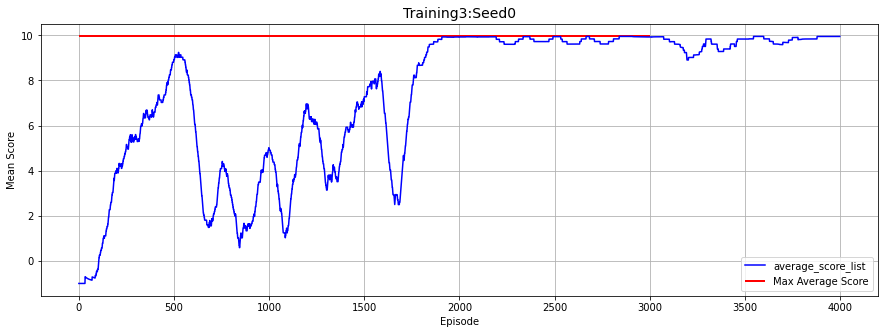

Brain Loaded for Train_3 in seed: 1
Episode 17	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 389
Score: [9.221603]
Episode 50	Average Score: -0.795562,	Average Step: 496.85510204081634Task solved in step: 359
Score: [9.280803]
Episode 272	Average Score: -0.999994,	Average Step: 499.0474747474746Task solved in step: 89
Score: [9.8216]
Episode 283	Average Score: -0.891778,	Average Step: 494.9Task solved in step: 138
Score: [9.7222]
Episode 289	Average Score: -0.784556,	Average Step: 491.29Task solved in step: 190
Score: [9.6194]
Episode 314	Average Score: -0.678362,	Average Step: 488.2Task solved in step: 287
Score: [9.4244]
Episode 327	Average Score: -0.574118,	Average Step: 486.08Task solved in step: 411
Score: [9.176003]
Episode 348	Average Score: -0.472358,	Average Step: 485.2Task solved in step: 412
Score: [9.175803]
Episode 351	Average Score: -0.370600,	Average Step: 484.33Task solved in step: 371
Score: [9.256602]
Episode 352	Average Score: -0.268034,	Average S

Episode 2660	Average Score: 5.374784,	Average Step: 261.9Task solved in step: 28
Score: [9.9438]
Episode 2661	Average Score: 5.484223,	Average Step: 257.19Task solved in step: 28
Score: [9.9438]
Episode 2662	Average Score: 5.593660,	Average Step: 252.48Task solved in step: 28
Score: [9.9438]
Episode 2666	Average Score: 5.379669,	Average Step: 259.47Task solved in step: 54
Score: [9.890201]
Episode 2670	Average Score: 5.061730,	Average Step: 268.43Task solved in step: 84
Score: [9.8312]
Episode 2678	Average Score: 4.959467,	Average Step: 269.56Task solved in step: 77
Score: [9.8454]
Episode 2679	Average Score: 5.067921,	Average Step: 265.34Task solved in step: 101
Score: [9.7978]
Episode 2683	Average Score: 4.855241,	Average Step: 271.68Task solved in step: 84
Score: [9.830999]
Episode 2692	Average Score: 4.639751,	Average Step: 279.41Task solved in step: 429
Score: [9.140004]
Episode 2693	Average Score: 4.631977,	Average Step: 283.29Task solved in step: 236
Score: [9.526199]
Episode 26

Episode 2807	Average Score: 6.492266,	Average Step: 203.23Task solved in step: 107
Score: [9.7852]
Episode 2808	Average Score: 6.600119,	Average Step: 199.31Task solved in step: 32
Score: [9.9344]
Episode 2809	Average Score: 6.709462,	Average Step: 194.64Task solved in step: 24
Score: [9.9516]
Episode 2810	Average Score: 6.818978,	Average Step: 189.89Task solved in step: 24
Score: [9.9516]
Episode 2811	Average Score: 6.928494,	Average Step: 185.14Task solved in step: 25
Score: [9.948]
Episode 2812	Average Score: 7.037974,	Average Step: 180.4Task solved in step: 34
Score: [9.931601]
Episode 2813	Average Score: 7.147289,	Average Step: 175.75Task solved in step: 25
Score: [9.948]
Episode 2814	Average Score: 7.147238,	Average Step: 175.77Task solved in step: 100
Score: [9.7998]
Episode 2815	Average Score: 7.145957,	Average Step: 176.41Task solved in step: 29
Score: [9.9406]
Episode 2816	Average Score: 7.146058,	Average Step: 176.36Task solved in step: 29
Score: [9.9418]
Episode 2817	Averag

Episode 2979	Average Score: 9.594704,	Average Step: 52.1Task solved in step: 31
Score: [9.9374]
Episode 2981	Average Score: 9.485230,	Average Step: 56.83Task solved in step: 21
Score: [9.957601]
Episode 2982	Average Score: 9.485453,	Average Step: 56.72Task solved in step: 25
Score: [9.9494]
Episode 2983	Average Score: 9.486835,	Average Step: 56.03Task solved in step: 30
Score: [9.9394]
Episode 2984	Average Score: 9.486809,	Average Step: 56.05Task solved in step: 30
Score: [9.9394]
Episode 2985	Average Score: 9.486780,	Average Step: 56.07Task solved in step: 28
Score: [9.942201]
Episode 2986	Average Score: 9.486780,	Average Step: 56.07Task solved in step: 51
Score: [9.8976]
Episode 2987	Average Score: 9.488814,	Average Step: 55.06Task solved in step: 26
Score: [9.9466]
Episode 2988	Average Score: 9.488935,	Average Step: 55.0Task solved in step: 26
Score: [9.9466]
Episode 2989	Average Score: 9.489055,	Average Step: 54.94Task solved in step: 26
Score: [9.9466]
Episode 2990	Average Score: 

Episode 3064	Average Score: 9.825872,	Average Step: 36.51Task solved in step: 21
Score: [9.957601]
Episode 3065	Average Score: 9.826015,	Average Step: 36.44Task solved in step: 141
Score: [9.7162]
Episode 3066	Average Score: 9.823784,	Average Step: 37.55Task solved in step: 23
Score: [9.952]
Episode 3067	Average Score: 9.823748,	Average Step: 37.56Task solved in step: 21
Score: [9.957601]
Episode 3068	Average Score: 9.823901,	Average Step: 37.49Task solved in step: 21
Score: [9.957601]
Episode 3069	Average Score: 9.824322,	Average Step: 37.28Task solved in step: 21
Score: [9.957601]
Episode 3070	Average Score: 9.824451,	Average Step: 37.22Task solved in step: 21
Score: [9.957601]
Episode 3071	Average Score: 9.824563,	Average Step: 37.17Task solved in step: 21
Score: [9.957601]
Episode 3072	Average Score: 9.824757,	Average Step: 37.08Task solved in step: 21
Score: [9.957601]
Episode 3073	Average Score: 9.825615,	Average Step: 36.65Task solved in step: 21
Score: [9.957601]
Episode 3074	A

Episode 3148	Average Score: 9.941501,	Average Step: 28.87Task solved in step: 26
Score: [9.9472]
Episode 3149	Average Score: 9.941631,	Average Step: 28.81Task solved in step: 31
Score: [9.936999]
Episode 3150	Average Score: 9.941511,	Average Step: 28.87Task solved in step: 103
Score: [9.7926]
Episode 3151	Average Score: 9.939948,	Average Step: 29.65Task solved in step: 73
Score: [9.8538]
Episode 3152	Average Score: 9.938996,	Average Step: 30.13Task solved in step: 27
Score: [9.9448]
Episode 3153	Average Score: 9.938954,	Average Step: 30.15Task solved in step: 23
Score: [9.9536]
Episode 3154	Average Score: 9.938999,	Average Step: 30.13Task solved in step: 97
Score: [9.8048]
Episode 3155	Average Score: 9.937558,	Average Step: 30.85Task solved in step: 26
Score: [9.9468]
Episode 3156	Average Score: 9.937575,	Average Step: 30.84Task solved in step: 26
Score: [9.9478]
Episode 3157	Average Score: 9.937617,	Average Step: 30.82Task solved in step: 27
Score: [9.9456005]
Episode 3158	Average Sco

Episode 3232	Average Score: 9.945592,	Average Step: 26.83Task solved in step: 21
Score: [9.956201]
Episode 3233	Average Score: 9.945578,	Average Step: 26.83Task solved in step: 21
Score: [9.956201]
Episode 3234	Average Score: 9.945580,	Average Step: 26.83Task solved in step: 21
Score: [9.956201]
Episode 3235	Average Score: 9.945566,	Average Step: 26.83Task solved in step: 21
Score: [9.956201]
Episode 3236	Average Score: 9.945552,	Average Step: 26.83Task solved in step: 21
Score: [9.956201]
Episode 3237	Average Score: 9.945539,	Average Step: 26.83Task solved in step: 21
Score: [9.956201]
Episode 3238	Average Score: 9.945523,	Average Step: 26.83Task solved in step: 25
Score: [9.9496]
Episode 3239	Average Score: 9.945444,	Average Step: 26.87Task solved in step: 25
Score: [9.9496]
Episode 3240	Average Score: 9.945364,	Average Step: 26.91Task solved in step: 25
Score: [9.9496]
Episode 3241	Average Score: 9.945285,	Average Step: 26.95Task solved in step: 25
Score: [9.9496]
Episode 3242	Avera

Episode 3399	Average Score: 9.934543,	Average Step: 32.01Task solved in step: 27
Score: [9.9448]
Episode 3400	Average Score: 9.934445,	Average Step: 32.06Task solved in step: 22
Score: [9.9546]
Episode 3401	Average Score: 9.934429,	Average Step: 32.07Task solved in step: 21
Score: [9.956201]
Episode 3402	Average Score: 9.934464,	Average Step: 32.05Task solved in step: 21
Score: [9.956201]
Episode 3403	Average Score: 9.934500,	Average Step: 32.03Task solved in step: 21
Score: [9.956201]
Episode 3404	Average Score: 9.934536,	Average Step: 32.01Task solved in step: 21
Score: [9.956201]
Episode 3405	Average Score: 9.934552,	Average Step: 32.0Task solved in step: 24
Score: [9.951799]
Episode 3406	Average Score: 9.934524,	Average Step: 32.02Task solved in step: 21
Score: [9.956201]
Episode 3407	Average Score: 9.934513,	Average Step: 32.02Task solved in step: 25
Score: [9.9494]
Episode 3408	Average Score: 9.934445,	Average Step: 32.06Task solved in step: 21
Score: [9.956201]
Episode 3409	Aver

Episode 3484	Average Score: 9.921859,	Average Step: 38.37Task solved in step: 22
Score: [9.9546]
Episode 3485	Average Score: 9.921957,	Average Step: 38.32Task solved in step: 22
Score: [9.9546]
Episode 3486	Average Score: 9.922055,	Average Step: 38.27Task solved in step: 22
Score: [9.9546]
Episode 3487	Average Score: 9.922153,	Average Step: 38.22Task solved in step: 22
Score: [9.9546]
Episode 3488	Average Score: 9.922251,	Average Step: 38.17Task solved in step: 23
Score: [9.9526005]
Episode 3489	Average Score: 9.922329,	Average Step: 38.13Task solved in step: 23
Score: [9.9526005]
Episode 3490	Average Score: 9.924329,	Average Step: 37.13Task solved in step: 25
Score: [9.948999]
Episode 3491	Average Score: 9.924256,	Average Step: 37.17Task solved in step: 22
Score: [9.9546]
Episode 3492	Average Score: 9.924241,	Average Step: 37.18Task solved in step: 22
Score: [9.9546]
Episode 3493	Average Score: 9.924261,	Average Step: 37.17Task solved in step: 22
Score: [9.9546]
Episode 3494	Average S

Episode 3652	Average Score: 9.953516,	Average Step: 22.54Task solved in step: 23
Score: [9.9526005]
Episode 3653	Average Score: 9.953495,	Average Step: 22.55Task solved in step: 22
Score: [9.954201]
Episode 3654	Average Score: 9.953512,	Average Step: 22.54Task solved in step: 26
Score: [9.9466]
Episode 3655	Average Score: 9.953480,	Average Step: 22.55Task solved in step: 23
Score: [9.9526005]
Episode 3656	Average Score: 9.953462,	Average Step: 22.56Task solved in step: 23
Score: [9.9526005]
Episode 3657	Average Score: 9.953462,	Average Step: 22.56Task solved in step: 23
Score: [9.9526005]
Episode 3658	Average Score: 9.953461,	Average Step: 22.56Task solved in step: 23
Score: [9.9526005]
Episode 3659	Average Score: 9.953461,	Average Step: 22.56Task solved in step: 21
Score: [9.956201]
Episode 3660	Average Score: 9.953497,	Average Step: 22.54Task solved in step: 21
Score: [9.956201]
Episode 3661	Average Score: 9.953533,	Average Step: 22.52Task solved in step: 21
Score: [9.956201]
Episode

Episode 3736	Average Score: 9.952767,	Average Step: 22.9Task solved in step: 21
Score: [9.956201]
Episode 3737	Average Score: 9.952785,	Average Step: 22.89Task solved in step: 21
Score: [9.956201]
Episode 3738	Average Score: 9.952803,	Average Step: 22.88Task solved in step: 21
Score: [9.956201]
Episode 3739	Average Score: 9.952839,	Average Step: 22.86Task solved in step: 21
Score: [9.956201]
Episode 3740	Average Score: 9.952875,	Average Step: 22.84Task solved in step: 21
Score: [9.956201]
Episode 3741	Average Score: 9.952911,	Average Step: 22.82Task solved in step: 21
Score: [9.956201]
Episode 3742	Average Score: 9.952947,	Average Step: 22.8Task solved in step: 21
Score: [9.956201]
Episode 3743	Average Score: 9.952984,	Average Step: 22.78Task solved in step: 21
Score: [9.956201]
Episode 3744	Average Score: 9.953000,	Average Step: 22.77Task solved in step: 23
Score: [9.9526005]
Episode 3745	Average Score: 9.952983,	Average Step: 22.78Task solved in step: 23
Score: [9.9526005]
Episode 37

Episode 3820	Average Score: 9.954947,	Average Step: 21.73Task solved in step: 21
Score: [9.956201]
Episode 3821	Average Score: 9.954983,	Average Step: 21.71Task solved in step: 21
Score: [9.956201]
Episode 3822	Average Score: 9.955019,	Average Step: 21.69Task solved in step: 21
Score: [9.956201]
Episode 3823	Average Score: 9.955005,	Average Step: 21.69Task solved in step: 21
Score: [9.956201]
Episode 3824	Average Score: 9.955041,	Average Step: 21.67Task solved in step: 21
Score: [9.956201]
Episode 3825	Average Score: 9.955077,	Average Step: 21.65Task solved in step: 21
Score: [9.956201]
Episode 3826	Average Score: 9.955113,	Average Step: 21.63Task solved in step: 23
Score: [9.9526005]
Episode 3827	Average Score: 9.955112,	Average Step: 21.63Task solved in step: 21
Score: [9.956201]
Episode 3828	Average Score: 9.955150,	Average Step: 21.61Task solved in step: 21
Score: [9.956201]
Episode 3829	Average Score: 9.955185,	Average Step: 21.59Task solved in step: 21
Score: [9.956201]
Episode 3

Episode 3904	Average Score: 9.955649,	Average Step: 21.29Task solved in step: 21
Score: [9.956201]
Episode 3905	Average Score: 9.955725,	Average Step: 21.25Task solved in step: 21
Score: [9.956201]
Episode 3906	Average Score: 9.955725,	Average Step: 21.25Task solved in step: 21
Score: [9.956201]
Episode 3907	Average Score: 9.955725,	Average Step: 21.25Task solved in step: 21
Score: [9.956201]
Episode 3908	Average Score: 9.955725,	Average Step: 21.25Task solved in step: 21
Score: [9.956201]
Episode 3909	Average Score: 9.955725,	Average Step: 21.25Task solved in step: 21
Score: [9.956201]
Episode 3910	Average Score: 9.955725,	Average Step: 21.25Task solved in step: 21
Score: [9.956201]
Episode 3911	Average Score: 9.955725,	Average Step: 21.25Task solved in step: 21
Score: [9.956201]
Episode 3912	Average Score: 9.955725,	Average Step: 21.25Task solved in step: 21
Score: [9.956201]
Episode 3913	Average Score: 9.955725,	Average Step: 21.25Task solved in step: 21
Score: [9.956201]
Episode 39

Episode 3988	Average Score: 9.955845,	Average Step: 21.19Task solved in step: 21
Score: [9.956201]
Episode 3989	Average Score: 9.955845,	Average Step: 21.19Task solved in step: 21
Score: [9.956201]
Episode 3990	Average Score: 9.955845,	Average Step: 21.19Task solved in step: 23
Score: [9.9526005]
Episode 3991	Average Score: 9.955810,	Average Step: 21.21Task solved in step: 21
Score: [9.956201]
Episode 3992	Average Score: 9.955826,	Average Step: 21.2Task solved in step: 21
Score: [9.956201]
Episode 3993	Average Score: 9.955825,	Average Step: 21.2Task solved in step: 21
Score: [9.956201]
Episode 3994	Average Score: 9.955826,	Average Step: 21.2Task solved in step: 25
Score: [9.9496]
Episode 3995	Average Score: 9.955759,	Average Step: 21.24Task solved in step: 21
Score: [9.956201]
Episode 3996	Average Score: 9.955759,	Average Step: 21.24Task solved in step: 21
Score: [9.956201]
Episode 3997	Average Score: 9.955759,	Average Step: 21.24Task solved in step: 21
Score: [9.956201]
Episode 3998	A

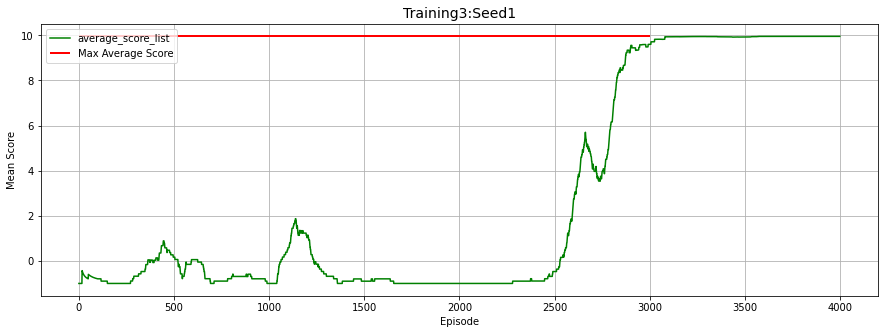

Brain Loaded for Training 3 in seed: 2
Episode 67	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 297
Score: [9.4058]
Episode 75	Average Score: -0.861250,	Average Step: 496.30666666666676Task solved in step: 352
Score: [9.295603]
Episode 80	Average Score: -0.741227,	Average Step: 494.63757848101275Task solved in step: 336
Score: [9.326802]
Episode 90	Average Score: -0.655237,	Average Step: 493.31111111111113Task solved in step: 409
Score: [9.180403]
Episode 91	Average Score: -0.547153,	Average Step: 492.38461538461536Task solved in step: 211
Score: [9.576799]
Episode 94	Average Score: -0.449086,	Average Step: 489.53191489361775Task solved in step: 369
Score: [9.260202]
Episode 97	Average Score: -0.360349,	Average Step: 488.4845360824742Task solved in step: 393
Score: [9.212203]
Episode 101	Average Score: -0.277416,	Average Step: 487.7426262626264Task solved in step: 412
Score: [9.174603]
Episode 102	Average Score: -0.175671,	Average Step: 486.87Task solved in step: 20

Episode 253	Average Score: 5.280958,	Average Step: 308.78Task solved in step: 199
Score: [9.601199]
Episode 256	Average Score: 5.173765,	Average Step: 312.38Task solved in step: 56
Score: [9.8864]
Episode 259	Average Score: 5.175231,	Average Step: 311.64Task solved in step: 349
Score: [9.301002]
Episode 260	Average Score: 5.173621,	Average Step: 312.45Task solved in step: 61
Score: [9.876201]
Episode 262	Average Score: 5.180541,	Average Step: 308.99Task solved in step: 134
Score: [9.730999]
Episode 264	Average Score: 5.187341,	Average Step: 305.59Task solved in step: 317
Score: [9.364401]
Episode 265	Average Score: 5.182669,	Average Step: 307.92Task solved in step: 359
Score: [9.280402]
Episode 268	Average Score: 5.073417,	Average Step: 312.54Task solved in step: 170
Score: [9.6596]
Episode 271	Average Score: 4.967083,	Average Step: 315.71Task solved in step: 222
Score: [9.5543995]
Episode 273	Average Score: 5.072627,	Average Step: 312.94Task solved in step: 48
Score: [9.903]
Episode 2

Episode 393	Average Score: 5.844298,	Average Step: 227.15Task solved in step: 53
Score: [9.8938]
Episode 394	Average Score: 5.845344,	Average Step: 226.63Task solved in step: 26
Score: [9.9462]
Episode 395	Average Score: 5.954806,	Average Step: 221.9Task solved in step: 27
Score: [9.9444]
Episode 397	Average Score: 5.959495,	Average Step: 219.55Task solved in step: 24
Score: [9.9506]
Episode 398	Average Score: 5.965827,	Average Step: 216.38Task solved in step: 28
Score: [9.9426]
Episode 399	Average Score: 5.969122,	Average Step: 214.73Task solved in step: 23
Score: [9.9534]
Episode 400	Average Score: 6.078657,	Average Step: 209.97Task solved in step: 53
Score: [9.8924]
Episode 403	Average Score: 5.969530,	Average Step: 214.53Task solved in step: 36
Score: [9.927601]
Episode 404	Average Score: 6.078806,	Average Step: 209.9Task solved in step: 70
Score: [9.859799]
Episode 406	Average Score: 6.080737,	Average Step: 208.94Task solved in step: 24
Score: [9.951799]
Episode 407	Average Score:

Episode 578	Average Score: 9.159374,	Average Step: 69.7Task solved in step: 24
Score: [9.9506]
Episode 579	Average Score: 9.159359,	Average Step: 69.71Task solved in step: 35
Score: [9.928801]
Episode 580	Average Score: 9.159204,	Average Step: 69.79Task solved in step: 26
Score: [9.946]
Episode 582	Average Score: 9.159974,	Average Step: 69.4Task solved in step: 25
Score: [9.948999]
Episode 583	Average Score: 9.159992,	Average Step: 69.39Task solved in step: 24
Score: [9.9512]
Episode 585	Average Score: 9.051012,	Average Step: 73.88Task solved in step: 24
Score: [9.9506]
Episode 586	Average Score: 9.051016,	Average Step: 73.88Task solved in step: 33
Score: [9.9326]
Episode 587	Average Score: 9.160343,	Average Step: 69.22Task solved in step: 24
Score: [9.9506]
Episode 589	Average Score: 9.160536,	Average Step: 69.12Task solved in step: 22
Score: [9.954801]
Episode 590	Average Score: 9.270083,	Average Step: 64.35Task solved in step: 22
Score: [9.9552]
Episode 591	Average Score: 9.270081,	

Episode 782	Average Score: 8.624795,	Average Step: 87.11Task solved in step: 22
Score: [9.954]
Episode 783	Average Score: 8.624777,	Average Step: 87.11Task solved in step: 21
Score: [9.957601]
Episode 784	Average Score: 8.734352,	Average Step: 82.33Task solved in step: 23
Score: [9.953199]
Episode 785	Average Score: 8.734393,	Average Step: 82.31Task solved in step: 21
Score: [9.957601]
Episode 786	Average Score: 8.843968,	Average Step: 77.53Task solved in step: 21
Score: [9.957601]
Episode 787	Average Score: 8.843981,	Average Step: 77.53Task solved in step: 21
Score: [9.957601]
Episode 788	Average Score: 8.844107,	Average Step: 77.47Task solved in step: 21
Score: [9.957601]
Episode 789	Average Score: 8.844626,	Average Step: 77.21Task solved in step: 23
Score: [9.9524]
Episode 790	Average Score: 8.954150,	Average Step: 72.45Task solved in step: 21
Score: [9.957601]
Episode 791	Average Score: 8.954264,	Average Step: 72.4Task solved in step: 21
Score: [9.957601]
Episode 792	Average Score:

Episode 952	Average Score: 9.842309,	Average Step: 28.44Task solved in step: 21
Score: [9.957601]
Episode 953	Average Score: 9.842309,	Average Step: 28.44Task solved in step: 21
Score: [9.957601]
Episode 954	Average Score: 9.842309,	Average Step: 28.44Task solved in step: 21
Score: [9.957601]
Episode 955	Average Score: 9.842309,	Average Step: 28.44Task solved in step: 21
Score: [9.957601]
Episode 956	Average Score: 9.842308,	Average Step: 28.44Task solved in step: 21
Score: [9.957601]
Episode 957	Average Score: 9.842308,	Average Step: 28.44Task solved in step: 21
Score: [9.957601]
Episode 958	Average Score: 9.842308,	Average Step: 28.44Task solved in step: 21
Score: [9.957601]
Episode 959	Average Score: 9.842308,	Average Step: 28.44Task solved in step: 21
Score: [9.957601]
Episode 960	Average Score: 9.842324,	Average Step: 28.44Task solved in step: 21
Score: [9.957601]
Episode 961	Average Score: 9.842325,	Average Step: 28.44Task solved in step: 24
Score: [9.9502]
Episode 962	Average Sc

Episode 1036	Average Score: 9.955591,	Average Step: 21.73Task solved in step: 24
Score: [9.9502]
Episode 1037	Average Score: 9.955517,	Average Step: 21.76Task solved in step: 24
Score: [9.9502]
Episode 1038	Average Score: 9.955442,	Average Step: 21.79Task solved in step: 24
Score: [9.9502]
Episode 1039	Average Score: 9.955369,	Average Step: 21.82Task solved in step: 24
Score: [9.9502]
Episode 1040	Average Score: 9.955295,	Average Step: 21.85Task solved in step: 24
Score: [9.9502]
Episode 1041	Average Score: 9.955268,	Average Step: 21.86Task solved in step: 35
Score: [9.9286]
Episode 1042	Average Score: 9.954978,	Average Step: 22.0Task solved in step: 24
Score: [9.951799]
Episode 1043	Average Score: 9.954920,	Average Step: 22.03Task solved in step: 24
Score: [9.951799]
Episode 1044	Average Score: 9.954862,	Average Step: 22.06Task solved in step: 24
Score: [9.9502]
Episode 1045	Average Score: 9.954787,	Average Step: 22.09Task solved in step: 35
Score: [9.9286]
Episode 1046	Average Score:

Episode 1121	Average Score: 9.944944,	Average Step: 26.82Task solved in step: 22
Score: [9.954201]
Episode 1122	Average Score: 9.944923,	Average Step: 26.83Task solved in step: 22
Score: [9.954201]
Episode 1123	Average Score: 9.944901,	Average Step: 26.84Task solved in step: 22
Score: [9.954201]
Episode 1124	Average Score: 9.944880,	Average Step: 26.85Task solved in step: 22
Score: [9.954201]
Episode 1125	Average Score: 9.944857,	Average Step: 26.86Task solved in step: 22
Score: [9.954201]
Episode 1126	Average Score: 9.944898,	Average Step: 26.84Task solved in step: 21
Score: [9.9564]
Episode 1127	Average Score: 9.944959,	Average Step: 26.81Task solved in step: 21
Score: [9.9564]
Episode 1128	Average Score: 9.944947,	Average Step: 26.81Task solved in step: 27
Score: [9.9456005]
Episode 1129	Average Score: 9.944827,	Average Step: 26.87Task solved in step: 25
Score: [9.9486]
Episode 1130	Average Score: 9.944736,	Average Step: 26.91Task solved in step: 23
Score: [9.9526005]
Episode 1131	A

Episode 1205	Average Score: 9.948380,	Average Step: 25.02Task solved in step: 21
Score: [9.9564]
Episode 1206	Average Score: 9.948380,	Average Step: 25.02Task solved in step: 21
Score: [9.9564]
Episode 1207	Average Score: 9.948380,	Average Step: 25.02Task solved in step: 20
Score: [9.9584]
Episode 1208	Average Score: 9.948400,	Average Step: 25.01Task solved in step: 21
Score: [9.9564]
Episode 1209	Average Score: 9.948400,	Average Step: 25.01Task solved in step: 21
Score: [9.9564]
Episode 1210	Average Score: 9.948400,	Average Step: 25.01Task solved in step: 21
Score: [9.9564]
Episode 1211	Average Score: 9.948400,	Average Step: 25.01Task solved in step: 21
Score: [9.9564]
Episode 1212	Average Score: 9.948422,	Average Step: 25.0Task solved in step: 21
Score: [9.9564]
Episode 1213	Average Score: 9.948503,	Average Step: 24.96Task solved in step: 21
Score: [9.9564]
Episode 1214	Average Score: 9.954881,	Average Step: 21.77Task solved in step: 21
Score: [9.9564]
Episode 1215	Average Score: 9.9

Episode 1290	Average Score: 9.955297,	Average Step: 21.59Task solved in step: 20
Score: [9.9584]
Episode 1291	Average Score: 9.955317,	Average Step: 21.58Task solved in step: 20
Score: [9.9584]
Episode 1292	Average Score: 9.955337,	Average Step: 21.57Task solved in step: 20
Score: [9.9584]
Episode 1293	Average Score: 9.955357,	Average Step: 21.56Task solved in step: 20
Score: [9.9584]
Episode 1294	Average Score: 9.955398,	Average Step: 21.54Task solved in step: 20
Score: [9.9584]
Episode 1295	Average Score: 9.955418,	Average Step: 21.53Task solved in step: 20
Score: [9.9584]
Episode 1296	Average Score: 9.955438,	Average Step: 21.52Task solved in step: 24
Score: [9.9512]
Episode 1297	Average Score: 9.955386,	Average Step: 21.55Task solved in step: 21
Score: [9.9564]
Episode 1298	Average Score: 9.955441,	Average Step: 21.52Task solved in step: 21
Score: [9.9564]
Episode 1299	Average Score: 9.955441,	Average Step: 21.52Task solved in step: 21
Score: [9.9564]
Episode 1300	Average Score: 9.

Episode 1459	Average Score: 9.951336,	Average Step: 23.63Task solved in step: 21
Score: [9.9564]
Episode 1460	Average Score: 9.951336,	Average Step: 23.63Task solved in step: 21
Score: [9.9566]
Episode 1461	Average Score: 9.951389,	Average Step: 23.6Task solved in step: 21
Score: [9.9566]
Episode 1462	Average Score: 9.951392,	Average Step: 23.6Task solved in step: 21
Score: [9.9564]
Episode 1463	Average Score: 9.951391,	Average Step: 23.6Task solved in step: 21
Score: [9.9564]
Episode 1464	Average Score: 9.951391,	Average Step: 23.6Task solved in step: 21
Score: [9.9564]
Episode 1465	Average Score: 9.951392,	Average Step: 23.6Task solved in step: 21
Score: [9.9564]
Episode 1466	Average Score: 9.951423,	Average Step: 23.58Task solved in step: 21
Score: [9.9564]
Episode 1467	Average Score: 9.951422,	Average Step: 23.58Task solved in step: 20
Score: [9.9584]
Episode 1468	Average Score: 9.951464,	Average Step: 23.56Task solved in step: 21
Score: [9.9564]
Episode 1469	Average Score: 9.95159

Episode 1627	Average Score: 9.956373,	Average Step: 21.09Task solved in step: 24
Score: [9.95]
Episode 1628	Average Score: 9.956289,	Average Step: 21.13Task solved in step: 24
Score: [9.95]
Episode 1629	Average Score: 9.956205,	Average Step: 21.17Task solved in step: 20
Score: [9.9584]
Episode 1630	Average Score: 9.956225,	Average Step: 21.16Task solved in step: 20
Score: [9.9584]
Episode 1631	Average Score: 9.956296,	Average Step: 21.12Task solved in step: 20
Score: [9.9584]
Episode 1632	Average Score: 9.956317,	Average Step: 21.11Task solved in step: 24
Score: [9.9506]
Episode 1633	Average Score: 9.956259,	Average Step: 21.14Task solved in step: 23
Score: [9.953199]
Episode 1634	Average Score: 9.956226,	Average Step: 21.16Task solved in step: 20
Score: [9.9584]
Episode 1635	Average Score: 9.956246,	Average Step: 21.15Task solved in step: 28
Score: [9.9428005]
Episode 1636	Average Score: 9.956111,	Average Step: 21.22Task solved in step: 23
Score: [9.9536]
Episode 1637	Average Score: 9

Episode 1796	Average Score: 9.952202,	Average Step: 23.29Task solved in step: 21
Score: [9.9564]
Episode 1797	Average Score: 9.952238,	Average Step: 23.27Task solved in step: 21
Score: [9.9564]
Episode 1798	Average Score: 9.952219,	Average Step: 23.28Task solved in step: 21
Score: [9.9564]
Episode 1799	Average Score: 9.952198,	Average Step: 23.29Task solved in step: 21
Score: [9.9564]
Episode 1800	Average Score: 9.952307,	Average Step: 23.23Task solved in step: 21
Score: [9.9564]
Episode 1801	Average Score: 9.952307,	Average Step: 23.23Task solved in step: 21
Score: [9.9564]
Episode 1802	Average Score: 9.952307,	Average Step: 23.23Task solved in step: 23
Score: [9.953199]
Episode 1803	Average Score: 9.952274,	Average Step: 23.25Task solved in step: 21
Score: [9.9564]
Episode 1804	Average Score: 9.952274,	Average Step: 23.25Task solved in step: 20
Score: [9.9584]
Episode 1805	Average Score: 9.952293,	Average Step: 23.24Task solved in step: 60
Score: [9.8784]
Episode 1806	Average Score: 

Episode 1881	Average Score: 9.952195,	Average Step: 23.21Task solved in step: 21
Score: [9.9564]
Episode 1882	Average Score: 9.952228,	Average Step: 23.19Task solved in step: 21
Score: [9.956201]
Episode 1883	Average Score: 9.952206,	Average Step: 23.2Task solved in step: 30
Score: [9.938399]
Episode 1884	Average Score: 9.952005,	Average Step: 23.3Task solved in step: 21
Score: [9.9564]
Episode 1885	Average Score: 9.952038,	Average Step: 23.28Task solved in step: 21
Score: [9.9564]
Episode 1886	Average Score: 9.952069,	Average Step: 23.26Task solved in step: 21
Score: [9.9564]
Episode 1887	Average Score: 9.952102,	Average Step: 23.24Task solved in step: 21
Score: [9.9564]
Episode 1888	Average Score: 9.952134,	Average Step: 23.22Task solved in step: 21
Score: [9.9564]
Episode 1889	Average Score: 9.954114,	Average Step: 22.23Task solved in step: 21
Score: [9.9564]
Episode 1890	Average Score: 9.954094,	Average Step: 22.24Task solved in step: 21
Score: [9.9564]
Episode 1891	Average Score: 

Episode 2049	Average Score: 9.955072,	Average Step: 21.76Task solved in step: 23
Score: [9.953199]
Episode 2050	Average Score: 9.955039,	Average Step: 21.78Task solved in step: 21
Score: [9.9564]
Episode 2051	Average Score: 9.955040,	Average Step: 21.78Task solved in step: 20
Score: [9.9584]
Episode 2052	Average Score: 9.955088,	Average Step: 21.75Task solved in step: 20
Score: [9.9584]
Episode 2053	Average Score: 9.955140,	Average Step: 21.72Task solved in step: 21
Score: [9.956201]
Episode 2054	Average Score: 9.955136,	Average Step: 21.72Task solved in step: 23
Score: [9.953199]
Episode 2055	Average Score: 9.955088,	Average Step: 21.75Task solved in step: 24
Score: [9.9514]
Episode 2056	Average Score: 9.955116,	Average Step: 21.74Task solved in step: 23
Score: [9.953199]
Episode 2057	Average Score: 9.955086,	Average Step: 21.76Task solved in step: 30
Score: [9.938399]
Episode 2058	Average Score: 9.954906,	Average Step: 21.85Task solved in step: 23
Score: [9.953199]
Episode 2059	Avera

Episode 2134	Average Score: 9.844882,	Average Step: 26.92Task solved in step: 22
Score: [9.9558]
Episode 2135	Average Score: 9.844908,	Average Step: 26.91Task solved in step: 24
Score: [9.9508]
Episode 2136	Average Score: 9.844851,	Average Step: 26.94Task solved in step: 27
Score: [9.9446]
Episode 2137	Average Score: 9.844852,	Average Step: 26.94Task solved in step: 27
Score: [9.9448]
Episode 2138	Average Score: 9.844769,	Average Step: 26.98Task solved in step: 27
Score: [9.9446]
Episode 2139	Average Score: 9.844629,	Average Step: 27.05Task solved in step: 21
Score: [9.9564]
Episode 2140	Average Score: 9.844630,	Average Step: 27.05Task solved in step: 23
Score: [9.9536]
Episode 2141	Average Score: 9.844602,	Average Step: 27.07Task solved in step: 21
Score: [9.9564]
Episode 2142	Average Score: 9.844612,	Average Step: 27.06Task solved in step: 21
Score: [9.9564]
Episode 2143	Average Score: 9.844614,	Average Step: 27.06Task solved in step: 24
Score: [9.950399]
Episode 2144	Average Score: 

Episode 2303	Average Score: 9.829126,	Average Step: 34.74Task solved in step: 27
Score: [9.9446]
Episode 2304	Average Score: 9.938572,	Average Step: 30.02Task solved in step: 67
Score: [9.8654]
Episode 2305	Average Score: 9.937816,	Average Step: 30.4Task solved in step: 21
Score: [9.956201]
Episode 2306	Average Score: 9.937814,	Average Step: 30.4Task solved in step: 21
Score: [9.956201]
Episode 2307	Average Score: 9.937811,	Average Step: 30.4Task solved in step: 21
Score: [9.956201]
Episode 2308	Average Score: 9.937809,	Average Step: 30.4Task solved in step: 21
Score: [9.956201]
Episode 2309	Average Score: 9.937807,	Average Step: 30.4Task solved in step: 21
Score: [9.956201]
Episode 2310	Average Score: 9.937805,	Average Step: 30.4Task solved in step: 21
Score: [9.956201]
Episode 2311	Average Score: 9.937802,	Average Step: 30.4Task solved in step: 21
Score: [9.956201]
Episode 2312	Average Score: 9.937801,	Average Step: 30.4Task solved in step: 21
Score: [9.956201]
Episode 2313	Average S

Episode 2470	Average Score: 9.955711,	Average Step: 21.32Task solved in step: 21
Score: [9.956201]
Episode 2471	Average Score: 9.955712,	Average Step: 21.32Task solved in step: 21
Score: [9.956201]
Episode 2472	Average Score: 9.955709,	Average Step: 21.32Task solved in step: 21
Score: [9.9564]
Episode 2473	Average Score: 9.955742,	Average Step: 21.3Task solved in step: 21
Score: [9.9564]
Episode 2474	Average Score: 9.955742,	Average Step: 21.3Task solved in step: 21
Score: [9.956201]
Episode 2475	Average Score: 9.955740,	Average Step: 21.3Task solved in step: 21
Score: [9.956201]
Episode 2476	Average Score: 9.955740,	Average Step: 21.3Task solved in step: 22
Score: [9.9558]
Episode 2477	Average Score: 9.955736,	Average Step: 21.31Task solved in step: 21
Score: [9.956201]
Episode 2478	Average Score: 9.955735,	Average Step: 21.31Task solved in step: 21
Score: [9.9564]
Episode 2480	Average Score: 9.846203,	Average Step: 26.07Task solved in step: 21
Score: [9.956201]
Episode 2481	Average S

Episode 2555	Average Score: 9.845919,	Average Step: 26.29Task solved in step: 23
Score: [9.952]
Episode 2556	Average Score: 9.845906,	Average Step: 26.29Task solved in step: 21
Score: [9.9566]
Episode 2557	Average Score: 9.845911,	Average Step: 26.29Task solved in step: 23
Score: [9.9522]
Episode 2558	Average Score: 9.845870,	Average Step: 26.31Task solved in step: 21
Score: [9.956201]
Episode 2559	Average Score: 9.845870,	Average Step: 26.31Task solved in step: 21
Score: [9.956201]
Episode 2560	Average Score: 9.845870,	Average Step: 26.31Task solved in step: 20
Score: [9.9582]
Episode 2561	Average Score: 9.845890,	Average Step: 26.3Task solved in step: 21
Score: [9.9564]
Episode 2562	Average Score: 9.845948,	Average Step: 26.27Task solved in step: 21
Score: [9.956201]
Episode 2563	Average Score: 9.845948,	Average Step: 26.27Task solved in step: 21
Score: [9.956201]
Episode 2564	Average Score: 9.845948,	Average Step: 26.27Task solved in step: 21
Score: [9.956201]
Episode 2565	Average S

Episode 2640	Average Score: 9.845603,	Average Step: 26.51Task solved in step: 21
Score: [9.956201]
Episode 2641	Average Score: 9.845602,	Average Step: 26.51Task solved in step: 22
Score: [9.955601]
Episode 2642	Average Score: 9.845602,	Average Step: 26.51Task solved in step: 21
Score: [9.956201]
Episode 2643	Average Score: 9.845608,	Average Step: 26.5Task solved in step: 24
Score: [9.9502]
Episode 2644	Average Score: 9.845596,	Average Step: 26.5Task solved in step: 21
Score: [9.956201]
Episode 2645	Average Score: 9.845602,	Average Step: 26.49Task solved in step: 21
Score: [9.956201]
Episode 2646	Average Score: 9.845601,	Average Step: 26.49Task solved in step: 21
Score: [9.956201]
Episode 2647	Average Score: 9.845601,	Average Step: 26.49Task solved in step: 23
Score: [9.9534]
Episode 2648	Average Score: 9.845572,	Average Step: 26.51Task solved in step: 21
Score: [9.956201]
Episode 2649	Average Score: 9.845572,	Average Step: 26.51Task solved in step: 22
Score: [9.955601]
Episode 2650	Ave

Episode 2725	Average Score: 9.736091,	Average Step: 31.44Task solved in step: 22
Score: [9.955601]
Episode 2726	Average Score: 9.736092,	Average Step: 31.44Task solved in step: 22
Score: [9.955601]
Episode 2727	Average Score: 9.736085,	Average Step: 31.45Task solved in step: 22
Score: [9.955601]
Episode 2728	Average Score: 9.736120,	Average Step: 31.44Task solved in step: 22
Score: [9.955601]
Episode 2729	Average Score: 9.736123,	Average Step: 31.44Task solved in step: 22
Score: [9.955601]
Episode 2730	Average Score: 9.736117,	Average Step: 31.45Task solved in step: 22
Score: [9.955601]
Episode 2731	Average Score: 9.736099,	Average Step: 31.46Task solved in step: 22
Score: [9.955601]
Episode 2732	Average Score: 9.736093,	Average Step: 31.47Task solved in step: 22
Score: [9.955601]
Episode 2733	Average Score: 9.845649,	Average Step: 26.7Task solved in step: 22
Score: [9.955601]
Episode 2734	Average Score: 9.845650,	Average Step: 26.7Task solved in step: 21
Score: [9.9566]
Episode 2735	A

Episode 2809	Average Score: 9.845619,	Average Step: 26.83Task solved in step: 24
Score: [9.9516]
Episode 2810	Average Score: 9.845580,	Average Step: 26.85Task solved in step: 24
Score: [9.9514]
Episode 2811	Average Score: 9.845538,	Average Step: 26.87Task solved in step: 21
Score: [9.9566]
Episode 2812	Average Score: 9.845591,	Average Step: 26.84Task solved in step: 21
Score: [9.9566]
Episode 2813	Average Score: 9.845600,	Average Step: 26.83Task solved in step: 21
Score: [9.9566]
Episode 2814	Average Score: 9.845611,	Average Step: 26.82Task solved in step: 21
Score: [9.9566]
Episode 2815	Average Score: 9.845620,	Average Step: 26.81Task solved in step: 21
Score: [9.9566]
Episode 2816	Average Score: 9.845631,	Average Step: 26.8Task solved in step: 21
Score: [9.9566]
Episode 2817	Average Score: 9.845652,	Average Step: 26.79Task solved in step: 21
Score: [9.9566]
Episode 2818	Average Score: 9.845653,	Average Step: 26.79Task solved in step: 21
Score: [9.9566]
Episode 2819	Average Score: 9.8

Episode 2893	Average Score: 9.954540,	Average Step: 22.29Task solved in step: 27
Score: [9.9446]
Episode 2894	Average Score: 9.954430,	Average Step: 22.34Task solved in step: 21
Score: [9.9566]
Episode 2895	Average Score: 9.954440,	Average Step: 22.33Task solved in step: 22
Score: [9.954]
Episode 2896	Average Score: 9.954424,	Average Step: 22.33Task solved in step: 21
Score: [9.9566]
Episode 2897	Average Score: 9.954434,	Average Step: 22.32Task solved in step: 21
Score: [9.9566]
Episode 2898	Average Score: 9.954444,	Average Step: 22.31Task solved in step: 342
Score: [9.314802]
Episode 2899	Average Score: 9.948036,	Average Step: 25.51Task solved in step: 23
Score: [9.9536]
Episode 2900	Average Score: 9.948017,	Average Step: 25.52Task solved in step: 21
Score: [9.9566]
Episode 2901	Average Score: 9.948028,	Average Step: 25.51Task solved in step: 23
Score: [9.952999]
Episode 2902	Average Score: 9.948001,	Average Step: 25.52Task solved in step: 23
Score: [9.952999]
Episode 2903	Average Sco

Episode 2979	Average Score: 9.839297,	Average Step: 29.68Task solved in step: 21
Score: [9.9566]
Episode 2980	Average Score: 9.839297,	Average Step: 29.68Task solved in step: 21
Score: [9.9566]
Episode 2981	Average Score: 9.839297,	Average Step: 29.68Task solved in step: 21
Score: [9.9566]
Episode 2982	Average Score: 9.839350,	Average Step: 29.65Task solved in step: 21
Score: [9.9566]
Episode 2983	Average Score: 9.839350,	Average Step: 29.65Task solved in step: 23
Score: [9.9538]
Episode 2984	Average Score: 9.839321,	Average Step: 29.67Task solved in step: 24
Score: [9.951799]
Episode 2985	Average Score: 9.839273,	Average Step: 29.7Task solved in step: 21
Score: [9.9566]
Episode 2986	Average Score: 9.839273,	Average Step: 29.7Task solved in step: 21
Score: [9.9566]
Episode 2987	Average Score: 9.839301,	Average Step: 29.68Task solved in step: 23
Score: [9.9524]
Episode 2988	Average Score: 9.839259,	Average Step: 29.7Task solved in step: 23
Score: [9.9524]
Episode 2989	Average Score: 9.8

Episode 3066	Average Score: 9.736495,	Average Step: 31.08Task solved in step: 21
Score: [9.9566]
Episode 3067	Average Score: 9.736495,	Average Step: 31.08Task solved in step: 21
Score: [9.9566]
Episode 3068	Average Score: 9.736551,	Average Step: 31.05Task solved in step: 25
Score: [9.9488]
Episode 3069	Average Score: 9.736473,	Average Step: 31.09Task solved in step: 21
Score: [9.9566]
Episode 3070	Average Score: 9.736473,	Average Step: 31.09Task solved in step: 21
Score: [9.956201]
Episode 3071	Average Score: 9.736469,	Average Step: 31.09Task solved in step: 21
Score: [9.9566]
Episode 3072	Average Score: 9.736469,	Average Step: 31.09Task solved in step: 21
Score: [9.957601]
Episode 3073	Average Score: 9.736519,	Average Step: 31.07Task solved in step: 21
Score: [9.957601]
Episode 3074	Average Score: 9.736529,	Average Step: 31.07Task solved in step: 21
Score: [9.957601]
Episode 3075	Average Score: 9.736539,	Average Step: 31.07Task solved in step: 21
Score: [9.957601]
Episode 3076	Average

Episode 3234	Average Score: 9.955701,	Average Step: 21.56Task solved in step: 21
Score: [9.9566]
Episode 3235	Average Score: 9.955705,	Average Step: 21.56Task solved in step: 21
Score: [9.9566]
Episode 3236	Average Score: 9.955695,	Average Step: 21.56Task solved in step: 21
Score: [9.9566]
Episode 3237	Average Score: 9.955685,	Average Step: 21.56Task solved in step: 27
Score: [9.9456005]
Episode 3238	Average Score: 9.955565,	Average Step: 21.62Task solved in step: 21
Score: [9.957601]
Episode 3239	Average Score: 9.955565,	Average Step: 21.62Task solved in step: 29
Score: [9.940801]
Episode 3240	Average Score: 9.955447,	Average Step: 21.68Task solved in step: 21
Score: [9.9566]
Episode 3241	Average Score: 9.955437,	Average Step: 21.68Task solved in step: 21
Score: [9.9566]
Episode 3242	Average Score: 9.955437,	Average Step: 21.68Task solved in step: 21
Score: [9.9566]
Episode 3243	Average Score: 9.955437,	Average Step: 21.68Task solved in step: 21
Score: [9.9566]
Episode 3244	Average Sc

Episode 3319	Average Score: 9.846409,	Average Step: 26.25Task solved in step: 21
Score: [9.9566]
Episode 3320	Average Score: 9.846433,	Average Step: 26.24Task solved in step: 21
Score: [9.957601]
Episode 3321	Average Score: 9.846443,	Average Step: 26.24Task solved in step: 21
Score: [9.9566]
Episode 3322	Average Score: 9.846443,	Average Step: 26.24Task solved in step: 21
Score: [9.9566]
Episode 3323	Average Score: 9.846443,	Average Step: 26.24Task solved in step: 22
Score: [9.955601]
Episode 3324	Average Score: 9.846433,	Average Step: 26.25Task solved in step: 21
Score: [9.9566]
Episode 3325	Average Score: 9.846434,	Average Step: 26.25Task solved in step: 21
Score: [9.9566]
Episode 3326	Average Score: 9.846434,	Average Step: 26.25Task solved in step: 21
Score: [9.9566]
Episode 3327	Average Score: 9.846433,	Average Step: 26.25Task solved in step: 21
Score: [9.9566]
Episode 3328	Average Score: 9.846461,	Average Step: 26.23Task solved in step: 25
Score: [9.948]
Episode 3329	Average Score:

Episode 3405	Average Score: 9.737133,	Average Step: 31.07Task solved in step: 21
Score: [9.957601]
Episode 3406	Average Score: 9.737133,	Average Step: 31.07Task solved in step: 21
Score: [9.957601]
Episode 3407	Average Score: 9.737195,	Average Step: 31.04Task solved in step: 21
Score: [9.957601]
Episode 3408	Average Score: 9.737195,	Average Step: 31.04Task solved in step: 21
Score: [9.957601]
Episode 3409	Average Score: 9.737194,	Average Step: 31.04Task solved in step: 21
Score: [9.957601]
Episode 3410	Average Score: 9.737234,	Average Step: 31.02Task solved in step: 21
Score: [9.957601]
Episode 3411	Average Score: 9.737234,	Average Step: 31.02Task solved in step: 21
Score: [9.957601]
Episode 3412	Average Score: 9.737234,	Average Step: 31.02Task solved in step: 21
Score: [9.957601]
Episode 3413	Average Score: 9.737234,	Average Step: 31.02Task solved in step: 21
Score: [9.957601]
Episode 3414	Average Score: 9.737234,	Average Step: 31.02Task solved in step: 21
Score: [9.957601]
Episode 34

Episode 3489	Average Score: 9.956708,	Average Step: 21.32Task solved in step: 21
Score: [9.957601]
Episode 3490	Average Score: 9.956708,	Average Step: 21.32Task solved in step: 21
Score: [9.957601]
Episode 3491	Average Score: 9.956708,	Average Step: 21.32Task solved in step: 21
Score: [9.957601]
Episode 3492	Average Score: 9.956708,	Average Step: 21.32Task solved in step: 21
Score: [9.957601]
Episode 3493	Average Score: 9.956732,	Average Step: 21.31Task solved in step: 21
Score: [9.957601]
Episode 3494	Average Score: 9.956732,	Average Step: 21.31Task solved in step: 21
Score: [9.957601]
Episode 3495	Average Score: 9.956758,	Average Step: 21.3Task solved in step: 21
Score: [9.957601]
Episode 3496	Average Score: 9.956758,	Average Step: 21.3Task solved in step: 21
Score: [9.956201]
Episode 3497	Average Score: 9.956744,	Average Step: 21.3Task solved in step: 21
Score: [9.957601]
Episode 3498	Average Score: 9.956755,	Average Step: 21.3Task solved in step: 21
Score: [9.957601]
Episode 3499	A

Episode 3655	Average Score: 9.951015,	Average Step: 23.92Task solved in step: 21
Score: [9.9566]
Episode 3656	Average Score: 9.951005,	Average Step: 23.92Task solved in step: 21
Score: [9.9566]
Episode 3657	Average Score: 9.950994,	Average Step: 23.92Task solved in step: 24
Score: [9.9508]
Episode 3658	Average Score: 9.950936,	Average Step: 23.95Task solved in step: 21
Score: [9.956201]
Episode 3659	Average Score: 9.950933,	Average Step: 23.95Task solved in step: 21
Score: [9.957601]
Episode 3660	Average Score: 9.950942,	Average Step: 23.95Task solved in step: 24
Score: [9.951799]
Episode 3661	Average Score: 9.950931,	Average Step: 23.96Task solved in step: 21
Score: [9.9566]
Episode 3662	Average Score: 9.950950,	Average Step: 23.95Task solved in step: 21
Score: [9.9566]
Episode 3663	Average Score: 9.950940,	Average Step: 23.95Task solved in step: 21
Score: [9.9566]
Episode 3664	Average Score: 9.950931,	Average Step: 23.95Task solved in step: 21
Score: [9.9566]
Episode 3665	Average Sco

Episode 3823	Average Score: 9.956203,	Average Step: 21.28Task solved in step: 21
Score: [9.9566]
Episode 3824	Average Score: 9.956173,	Average Step: 21.29Task solved in step: 21
Score: [9.9566]
Episode 3825	Average Score: 9.956173,	Average Step: 21.29Task solved in step: 21
Score: [9.956201]
Episode 3826	Average Score: 9.956168,	Average Step: 21.29Task solved in step: 21
Score: [9.956201]
Episode 3827	Average Score: 9.956164,	Average Step: 21.29Task solved in step: 21
Score: [9.956201]
Episode 3828	Average Score: 9.956218,	Average Step: 21.26Task solved in step: 21
Score: [9.956201]
Episode 3830	Average Score: 9.846628,	Average Step: 26.04Task solved in step: 21
Score: [9.956201]
Episode 3831	Average Score: 9.846614,	Average Step: 26.04Task solved in step: 21
Score: [9.956201]
Episode 3832	Average Score: 9.846601,	Average Step: 26.04Task solved in step: 21
Score: [9.956201]
Episode 3833	Average Score: 9.846596,	Average Step: 26.04Task solved in step: 21
Score: [9.956201]
Episode 3834	A

Episode 3909	Average Score: 9.843263,	Average Step: 27.64Task solved in step: 21
Score: [9.9566]
Episode 3910	Average Score: 9.843287,	Average Step: 27.63Task solved in step: 21
Score: [9.9566]
Episode 3911	Average Score: 9.843287,	Average Step: 27.63Task solved in step: 25
Score: [9.9484]
Episode 3912	Average Score: 9.843208,	Average Step: 27.67Task solved in step: 21
Score: [9.9566]
Episode 3913	Average Score: 9.843199,	Average Step: 27.67Task solved in step: 21
Score: [9.9566]
Episode 3914	Average Score: 9.843204,	Average Step: 27.67Task solved in step: 21
Score: [9.956201]
Episode 3915	Average Score: 9.843199,	Average Step: 27.67Task solved in step: 21
Score: [9.9566]
Episode 3916	Average Score: 9.843199,	Average Step: 27.67Task solved in step: 21
Score: [9.9566]
Episode 3917	Average Score: 9.843252,	Average Step: 27.64Task solved in step: 21
Score: [9.9566]
Episode 3918	Average Score: 9.843252,	Average Step: 27.64Task solved in step: 23
Score: [9.9526005]
Episode 3919	Average Scor

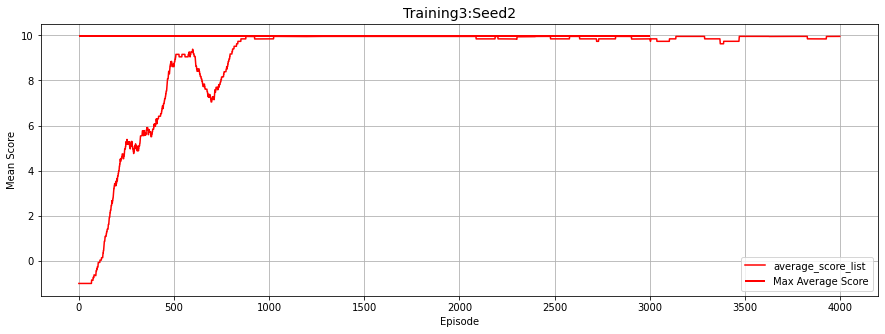

Brain Loaded for Training 3 in seed: 3
Episode 32	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 428
Score: [9.142404]
Episode 39	Average Score: -0.739933,	Average Step: 497.17948717948724Task solved in step: 335
Score: [9.329402]
Episode 42	Average Score: -0.512571,	Average Step: 493.4047619047619Task solved in step: 135
Score: [9.729799]
Episode 49	Average Score: -0.363227,	Average Step: 486.77551020408167Task solved in step: 247
Score: [9.504999]
Episode 61	Average Score: -0.316280,	Average Step: 485.04918032786884Task solved in step: 324
Score: [9.351401]
Episode 64	Average Score: -0.186588,	Average Step: 482.9687557142857Task solved in step: 110
Score: [9.778999]
Episode 71	Average Score: -0.114966,	Average Step: 479.07042253521126Task solved in step: 206
Score: [9.5868]
Episode 74	Average Score: -0.007781,	Average Step: 475.9189189189189Task solved in step: 376
Score: [9.246003]
Episode 88	Average Score: -0.049201,	Average Step: 478.19318181818186Task solved in

Episode 305	Average Score: 3.710398,	Average Step: 343.99Task solved in step: 32
Score: [9.9358]
Episode 306	Average Score: 3.819755,	Average Step: 339.32Task solved in step: 68
Score: [9.863601]
Episode 308	Average Score: 3.928391,	Average Step: 335.01Task solved in step: 73
Score: [9.8532]
Episode 310	Average Score: 4.036923,	Average Step: 330.75Task solved in step: 73
Score: [9.853]
Episode 312	Average Score: 4.040162,	Average Step: 329.13Task solved in step: 165
Score: [9.6692]
Episode 313	Average Score: 4.043021,	Average Step: 327.7Task solved in step: 186
Score: [9.6262]
Episode 314	Average Score: 4.149283,	Average Step: 324.57Task solved in step: 359
Score: [9.280203]
Episode 315	Average Score: 4.252085,	Average Step: 323.17Task solved in step: 65
Score: [9.868]
Episode 317	Average Score: 4.360765,	Average Step: 318.83Task solved in step: 339
Score: [9.321602]
Episode 323	Average Score: 4.143883,	Average Step: 327.27Task solved in step: 278
Score: [9.4434]
Episode 324	Average Sc

Episode 448	Average Score: 5.488612,	Average Step: 254.95Task solved in step: 30
Score: [9.9386]
Episode 449	Average Score: 5.492034,	Average Step: 253.24Task solved in step: 41
Score: [9.9178]
Episode 450	Average Score: 5.601212,	Average Step: 248.66Task solved in step: 47
Score: [9.9058]
Episode 454	Average Score: 5.279887,	Average Step: 259.31Task solved in step: 38
Score: [9.9236]
Episode 455	Average Score: 5.281133,	Average Step: 258.69Task solved in step: 43
Score: [9.913799]
Episode 456	Average Score: 5.282625,	Average Step: 257.95Task solved in step: 33
Score: [9.932]
Episode 458	Average Score: 5.286591,	Average Step: 255.96Task solved in step: 96
Score: [9.806399]
Episode 459	Average Score: 5.394655,	Average Step: 251.93Task solved in step: 29
Score: [9.940001]
Episode 462	Average Score: 5.176025,	Average Step: 261.23Task solved in step: 32
Score: [9.9356]
Episode 463	Average Score: 5.285381,	Average Step: 256.56Task solved in step: 24
Score: [9.9514]
Episode 464	Average Score

Episode 551	Average Score: 7.923752,	Average Step: 137.56Task solved in step: 183
Score: [9.6328]
Episode 552	Average Score: 8.030080,	Average Step: 134.4Task solved in step: 133
Score: [9.7328005]
Episode 553	Average Score: 8.137407,	Average Step: 130.74Task solved in step: 65
Score: [9.8694]
Episode 554	Average Score: 8.246101,	Average Step: 126.4Task solved in step: 38
Score: [9.9236]
Episode 555	Average Score: 8.246101,	Average Step: 126.4Task solved in step: 24
Score: [9.95]
Episode 557	Average Score: 8.137143,	Average Step: 130.87Task solved in step: 27
Score: [9.9456005]
Episode 558	Average Score: 8.246598,	Average Step: 126.15Task solved in step: 22
Score: [9.955601]
Episode 559	Average Score: 8.248092,	Average Step: 125.41Task solved in step: 23
Score: [9.952999]
Episode 560	Average Score: 8.248221,	Average Step: 125.35Task solved in step: 481
Score: [9.036205]
Episode 561	Average Score: 8.348583,	Average Step: 125.17Task solved in step: 26
Score: [9.9472]
Episode 562	Average 

Episode 657	Average Score: 7.730018,	Average Step: 134.44Task solved in step: 63
Score: [9.872801]
Episode 658	Average Score: 7.729290,	Average Step: 134.8Task solved in step: 23
Score: [9.9526005]
Episode 659	Average Score: 7.729259,	Average Step: 134.81Task solved in step: 21
Score: [9.9578]
Episode 660	Average Score: 7.729307,	Average Step: 134.79Task solved in step: 49
Score: [9.900801]
Episode 661	Average Score: 7.737954,	Average Step: 130.47Task solved in step: 57
Score: [9.8856]
Episode 662	Average Score: 7.737338,	Average Step: 130.78Task solved in step: 24
Score: [9.9514]
Episode 663	Average Score: 7.737564,	Average Step: 130.67Task solved in step: 21
Score: [9.9578]
Episode 664	Average Score: 7.847142,	Average Step: 125.89Task solved in step: 29
Score: [9.9412]
Episode 665	Average Score: 7.846996,	Average Step: 125.96Task solved in step: 40
Score: [9.9198]
Episode 666	Average Score: 7.846796,	Average Step: 126.06Task solved in step: 26
Score: [9.947]
Episode 667	Average Score

Episode 747	Average Score: 9.384376,	Average Step: 57.36Task solved in step: 27
Score: [9.9446]
Episode 748	Average Score: 9.384373,	Average Step: 57.36Task solved in step: 22
Score: [9.955601]
Episode 749	Average Score: 9.384433,	Average Step: 57.33Task solved in step: 22
Score: [9.955601]
Episode 750	Average Score: 9.384451,	Average Step: 57.32Task solved in step: 22
Score: [9.955601]
Episode 751	Average Score: 9.384749,	Average Step: 57.17Task solved in step: 21
Score: [9.9578]
Episode 752	Average Score: 9.385996,	Average Step: 56.55Task solved in step: 53
Score: [9.893]
Episode 753	Average Score: 9.385590,	Average Step: 56.75Task solved in step: 26
Score: [9.9466]
Episode 754	Average Score: 9.385639,	Average Step: 56.72Task solved in step: 26
Score: [9.9466]
Episode 755	Average Score: 9.385678,	Average Step: 56.7Task solved in step: 21
Score: [9.957601]
Episode 756	Average Score: 9.385682,	Average Step: 56.7Task solved in step: 21
Score: [9.957601]
Episode 757	Average Score: 9.3858

Episode 919	Average Score: 9.728266,	Average Step: 35.53Task solved in step: 22
Score: [9.9554]
Episode 920	Average Score: 9.728270,	Average Step: 35.53Task solved in step: 21
Score: [9.957601]
Episode 921	Average Score: 9.728268,	Average Step: 35.53Task solved in step: 21
Score: [9.957601]
Episode 922	Average Score: 9.728266,	Average Step: 35.53Task solved in step: 21
Score: [9.9578]
Episode 923	Average Score: 9.728267,	Average Step: 35.53Task solved in step: 35
Score: [9.9298]
Episode 924	Average Score: 9.727986,	Average Step: 35.67Task solved in step: 20
Score: [9.9582]
Episode 925	Average Score: 9.728003,	Average Step: 35.66Task solved in step: 21
Score: [9.957601]
Episode 926	Average Score: 9.735086,	Average Step: 32.12Task solved in step: 21
Score: [9.957601]
Episode 927	Average Score: 9.735130,	Average Step: 32.1Task solved in step: 21
Score: [9.957601]
Episode 928	Average Score: 9.844706,	Average Step: 27.32Task solved in step: 21
Score: [9.957601]
Episode 930	Average Score: 9.

Episode 1005	Average Score: 9.846372,	Average Step: 26.55Task solved in step: 23
Score: [9.952999]
Episode 1006	Average Score: 9.846325,	Average Step: 26.57Task solved in step: 21
Score: [9.957601]
Episode 1007	Average Score: 9.846326,	Average Step: 26.57Task solved in step: 21
Score: [9.9578]
Episode 1008	Average Score: 9.846332,	Average Step: 26.57Task solved in step: 21
Score: [9.9578]
Episode 1009	Average Score: 9.846334,	Average Step: 26.57Task solved in step: 21
Score: [9.9578]
Episode 1010	Average Score: 9.846335,	Average Step: 26.57Task solved in step: 22
Score: [9.9558]
Episode 1011	Average Score: 9.846315,	Average Step: 26.58Task solved in step: 65
Score: [9.8684]
Episode 1012	Average Score: 9.845422,	Average Step: 27.02Task solved in step: 21
Score: [9.957601]
Episode 1013	Average Score: 9.845419,	Average Step: 27.02Task solved in step: 62
Score: [9.8746]
Episode 1014	Average Score: 9.844675,	Average Step: 27.39Task solved in step: 22
Score: [9.955]
Episode 1015	Average Scor

Episode 1089	Average Score: 9.953326,	Average Step: 23.07Task solved in step: 21
Score: [9.957601]
Episode 1090	Average Score: 9.953325,	Average Step: 23.07Task solved in step: 21
Score: [9.957601]
Episode 1091	Average Score: 9.953324,	Average Step: 23.07Task solved in step: 21
Score: [9.957601]
Episode 1092	Average Score: 9.953324,	Average Step: 23.07Task solved in step: 21
Score: [9.957601]
Episode 1093	Average Score: 9.953324,	Average Step: 23.07Task solved in step: 21
Score: [9.9578]
Episode 1094	Average Score: 9.953326,	Average Step: 23.07Task solved in step: 21
Score: [9.9578]
Episode 1095	Average Score: 9.953365,	Average Step: 23.06Task solved in step: 21
Score: [9.9578]
Episode 1096	Average Score: 9.953367,	Average Step: 23.06Task solved in step: 21
Score: [9.9578]
Episode 1097	Average Score: 9.953370,	Average Step: 23.06Task solved in step: 21
Score: [9.957601]
Episode 1098	Average Score: 9.953369,	Average Step: 23.06Task solved in step: 21
Score: [9.957601]
Episode 1099	Avera

Episode 1173	Average Score: 9.954988,	Average Step: 22.28Task solved in step: 21
Score: [9.957601]
Episode 1174	Average Score: 9.954987,	Average Step: 22.28Task solved in step: 21
Score: [9.957601]
Episode 1175	Average Score: 9.954984,	Average Step: 22.28Task solved in step: 24
Score: [9.950399]
Episode 1176	Average Score: 9.954912,	Average Step: 22.31Task solved in step: 21
Score: [9.957601]
Episode 1177	Average Score: 9.955091,	Average Step: 22.22Task solved in step: 21
Score: [9.957601]
Episode 1178	Average Score: 9.956588,	Average Step: 21.47Task solved in step: 21
Score: [9.957601]
Episode 1179	Average Score: 9.956588,	Average Step: 21.47Task solved in step: 21
Score: [9.957601]
Episode 1180	Average Score: 9.956588,	Average Step: 21.47Task solved in step: 21
Score: [9.957601]
Episode 1181	Average Score: 9.956609,	Average Step: 21.46Task solved in step: 21
Score: [9.957601]
Episode 1182	Average Score: 9.956609,	Average Step: 21.46Task solved in step: 21
Score: [9.957601]
Episode 11

Episode 1257	Average Score: 9.956505,	Average Step: 21.51Task solved in step: 21
Score: [9.957601]
Episode 1258	Average Score: 9.956505,	Average Step: 21.51Task solved in step: 21
Score: [9.957601]
Episode 1259	Average Score: 9.956505,	Average Step: 21.51Task solved in step: 21
Score: [9.957601]
Episode 1260	Average Score: 9.956503,	Average Step: 21.51Task solved in step: 21
Score: [9.957601]
Episode 1261	Average Score: 9.956500,	Average Step: 21.51Task solved in step: 21
Score: [9.957601]
Episode 1262	Average Score: 9.956512,	Average Step: 21.51Task solved in step: 21
Score: [9.957601]
Episode 1263	Average Score: 9.956512,	Average Step: 21.51Task solved in step: 23
Score: [9.9536]
Episode 1264	Average Score: 9.956513,	Average Step: 21.51Task solved in step: 21
Score: [9.957601]
Episode 1265	Average Score: 9.956553,	Average Step: 21.49Task solved in step: 21
Score: [9.957601]
Episode 1266	Average Score: 9.956553,	Average Step: 21.49Task solved in step: 21
Score: [9.957601]
Episode 1267

Episode 1341	Average Score: 9.954926,	Average Step: 22.25Task solved in step: 21
Score: [9.957601]
Episode 1342	Average Score: 9.954926,	Average Step: 22.25Task solved in step: 21
Score: [9.9568]
Episode 1343	Average Score: 9.954994,	Average Step: 22.22Task solved in step: 21
Score: [9.957601]
Episode 1344	Average Score: 9.954994,	Average Step: 22.22Task solved in step: 21
Score: [9.957601]
Episode 1345	Average Score: 9.954994,	Average Step: 22.22Task solved in step: 21
Score: [9.957601]
Episode 1346	Average Score: 9.955127,	Average Step: 22.16Task solved in step: 21
Score: [9.957601]
Episode 1347	Average Score: 9.955127,	Average Step: 22.16Task solved in step: 21
Score: [9.957601]
Episode 1348	Average Score: 9.955127,	Average Step: 22.16Task solved in step: 21
Score: [9.957601]
Episode 1349	Average Score: 9.955127,	Average Step: 22.16Task solved in step: 23
Score: [9.9536]
Episode 1350	Average Score: 9.955088,	Average Step: 22.18Task solved in step: 21
Score: [9.957601]
Episode 1351	A

Episode 1508	Average Score: 9.951519,	Average Step: 23.74Task solved in step: 21
Score: [9.957601]
Episode 1509	Average Score: 9.951535,	Average Step: 23.74Task solved in step: 40
Score: [9.9198]
Episode 1510	Average Score: 9.951158,	Average Step: 23.93Task solved in step: 21
Score: [9.957601]
Episode 1511	Average Score: 9.951157,	Average Step: 23.93Task solved in step: 21
Score: [9.957601]
Episode 1512	Average Score: 9.951191,	Average Step: 23.92Task solved in step: 21
Score: [9.957601]
Episode 1513	Average Score: 9.951239,	Average Step: 23.9Task solved in step: 21
Score: [9.9568]
Episode 1514	Average Score: 9.951337,	Average Step: 23.85Task solved in step: 21
Score: [9.9568]
Episode 1515	Average Score: 9.951365,	Average Step: 23.84Task solved in step: 21
Score: [9.9568]
Episode 1516	Average Score: 9.951365,	Average Step: 23.84Task solved in step: 21
Score: [9.9568]
Episode 1517	Average Score: 9.951365,	Average Step: 23.84Task solved in step: 21
Score: [9.9568]
Episode 1518	Average Sc

Episode 1592	Average Score: 9.955539,	Average Step: 21.77Task solved in step: 21
Score: [9.957601]
Episode 1593	Average Score: 9.955539,	Average Step: 21.77Task solved in step: 21
Score: [9.957601]
Episode 1594	Average Score: 9.955547,	Average Step: 21.77Task solved in step: 21
Score: [9.957601]
Episode 1595	Average Score: 9.955554,	Average Step: 21.77Task solved in step: 21
Score: [9.957601]
Episode 1596	Average Score: 9.955623,	Average Step: 21.74Task solved in step: 21
Score: [9.957601]
Episode 1597	Average Score: 9.955623,	Average Step: 21.74Task solved in step: 21
Score: [9.9568]
Episode 1598	Average Score: 9.955615,	Average Step: 21.74Task solved in step: 21
Score: [9.9568]
Episode 1599	Average Score: 9.955606,	Average Step: 21.74Task solved in step: 21
Score: [9.957601]
Episode 1600	Average Score: 9.955606,	Average Step: 21.74Task solved in step: 21
Score: [9.957601]
Episode 1601	Average Score: 9.955615,	Average Step: 21.74Task solved in step: 21
Score: [9.957601]
Episode 1602	A

Episode 1758	Average Score: 9.949071,	Average Step: 25.22Task solved in step: 21
Score: [9.957601]
Episode 1759	Average Score: 9.949071,	Average Step: 25.22Task solved in step: 21
Score: [9.957601]
Episode 1760	Average Score: 9.949401,	Average Step: 25.06Task solved in step: 21
Score: [9.957601]
Episode 1761	Average Score: 9.949401,	Average Step: 25.06Task solved in step: 21
Score: [9.957601]
Episode 1762	Average Score: 9.949401,	Average Step: 25.06Task solved in step: 31
Score: [9.9366]
Episode 1763	Average Score: 9.949191,	Average Step: 25.16Task solved in step: 21
Score: [9.957601]
Episode 1764	Average Score: 9.950229,	Average Step: 24.64Task solved in step: 21
Score: [9.957601]
Episode 1765	Average Score: 9.950229,	Average Step: 24.64Task solved in step: 21
Score: [9.957601]
Episode 1766	Average Score: 9.950229,	Average Step: 24.64Task solved in step: 21
Score: [9.957601]
Episode 1767	Average Score: 9.950229,	Average Step: 24.64Task solved in step: 21
Score: [9.957601]
Episode 1768

Episode 1841	Average Score: 9.956159,	Average Step: 21.66Task solved in step: 21
Score: [9.957601]
Episode 1842	Average Score: 9.956159,	Average Step: 21.66Task solved in step: 21
Score: [9.957601]
Episode 1843	Average Score: 9.956159,	Average Step: 21.66Task solved in step: 22
Score: [9.955601]
Episode 1844	Average Score: 9.956139,	Average Step: 21.67Task solved in step: 21
Score: [9.957601]
Episode 1845	Average Score: 9.956139,	Average Step: 21.67Task solved in step: 21
Score: [9.957601]
Episode 1846	Average Score: 9.956140,	Average Step: 21.67Task solved in step: 21
Score: [9.957601]
Episode 1847	Average Score: 9.956139,	Average Step: 21.67Task solved in step: 23
Score: [9.952]
Episode 1848	Average Score: 9.956083,	Average Step: 21.69Task solved in step: 21
Score: [9.957601]
Episode 1849	Average Score: 9.956082,	Average Step: 21.69Task solved in step: 21
Score: [9.957601]
Episode 1850	Average Score: 9.956083,	Average Step: 21.69Task solved in step: 21
Score: [9.957601]
Episode 1851	

Episode 1925	Average Score: 9.957000,	Average Step: 21.27Task solved in step: 21
Score: [9.957601]
Episode 1926	Average Score: 9.957045,	Average Step: 21.25Task solved in step: 21
Score: [9.957601]
Episode 1927	Average Score: 9.957045,	Average Step: 21.25Task solved in step: 23
Score: [9.9538]
Episode 1928	Average Score: 9.957006,	Average Step: 21.27Task solved in step: 21
Score: [9.957601]
Episode 1929	Average Score: 9.957006,	Average Step: 21.27Task solved in step: 21
Score: [9.957601]
Episode 1930	Average Score: 9.957006,	Average Step: 21.27Task solved in step: 21
Score: [9.957601]
Episode 1931	Average Score: 9.957006,	Average Step: 21.27Task solved in step: 21
Score: [9.956201]
Episode 1932	Average Score: 9.956993,	Average Step: 21.27Task solved in step: 21
Score: [9.957601]
Episode 1933	Average Score: 9.956992,	Average Step: 21.27Task solved in step: 21
Score: [9.957601]
Episode 1934	Average Score: 9.956993,	Average Step: 21.27Task solved in step: 21
Score: [9.957601]
Episode 1935

Episode 2091	Average Score: 9.957041,	Average Step: 21.23Task solved in step: 22
Score: [9.955601]
Episode 2092	Average Score: 9.957021,	Average Step: 21.24Task solved in step: 21
Score: [9.957601]
Episode 2093	Average Score: 9.957022,	Average Step: 21.24Task solved in step: 21
Score: [9.957601]
Episode 2095	Average Score: 9.847477,	Average Step: 26.01Task solved in step: 21
Score: [9.957601]
Episode 2096	Average Score: 9.847476,	Average Step: 26.01Task solved in step: 21
Score: [9.957601]
Episode 2097	Average Score: 9.847477,	Average Step: 26.01Task solved in step: 21
Score: [9.957601]
Episode 2098	Average Score: 9.847476,	Average Step: 26.01Task solved in step: 21
Score: [9.957601]
Episode 2099	Average Score: 9.847477,	Average Step: 26.01Task solved in step: 21
Score: [9.957601]
Episode 2100	Average Score: 9.847496,	Average Step: 26.0Task solved in step: 21
Score: [9.957601]
Episode 2101	Average Score: 9.847538,	Average Step: 25.98Task solved in step: 21
Score: [9.957601]
Episode 210

Episode 2181	Average Score: 9.288827,	Average Step: 55.24Task solved in step: 21
Score: [9.957601]
Episode 2182	Average Score: 9.288827,	Average Step: 55.24Task solved in step: 21
Score: [9.957601]
Episode 2183	Average Score: 9.288827,	Average Step: 55.24Task solved in step: 21
Score: [9.957601]
Episode 2184	Average Score: 9.288827,	Average Step: 55.24Task solved in step: 23
Score: [9.953199]
Episode 2185	Average Score: 9.288783,	Average Step: 55.26Task solved in step: 21
Score: [9.957601]
Episode 2186	Average Score: 9.288783,	Average Step: 55.26Task solved in step: 22
Score: [9.954201]
Episode 2187	Average Score: 9.288756,	Average Step: 55.27Task solved in step: 22
Score: [9.954201]
Episode 2188	Average Score: 9.288723,	Average Step: 55.28Task solved in step: 22
Score: [9.954201]
Episode 2189	Average Score: 9.288690,	Average Step: 55.29Task solved in step: 35
Score: [9.928201]
Episode 2190	Average Score: 9.288397,	Average Step: 55.43Task solved in step: 21
Score: [9.957601]
Episode 21

Episode 2266	Average Score: 9.843972,	Average Step: 27.71Task solved in step: 21
Score: [9.957601]
Episode 2267	Average Score: 9.844003,	Average Step: 27.7Task solved in step: 21
Score: [9.957601]
Episode 2268	Average Score: 9.844002,	Average Step: 27.7Task solved in step: 21
Score: [9.957601]
Episode 2269	Average Score: 9.844003,	Average Step: 27.7Task solved in step: 21
Score: [9.957601]
Episode 2270	Average Score: 9.844002,	Average Step: 27.7Task solved in step: 21
Score: [9.957601]
Episode 2271	Average Score: 9.844003,	Average Step: 27.7Task solved in step: 21
Score: [9.957601]
Episode 2272	Average Score: 9.844036,	Average Step: 27.69Task solved in step: 22
Score: [9.954201]
Episode 2273	Average Score: 9.844003,	Average Step: 27.7Task solved in step: 23
Score: [9.952801]
Episode 2274	Average Score: 9.843955,	Average Step: 27.72Task solved in step: 21
Score: [9.956]
Episode 2275	Average Score: 9.843940,	Average Step: 27.72Task solved in step: 21
Score: [9.957601]
Episode 2276	Averag

Episode 2351	Average Score: 9.845514,	Average Step: 26.91Task solved in step: 21
Score: [9.957601]
Episode 2352	Average Score: 9.845514,	Average Step: 26.91Task solved in step: 22
Score: [9.954201]
Episode 2354	Average Score: 9.735905,	Average Step: 31.7Task solved in step: 21
Score: [9.957601]
Episode 2355	Average Score: 9.735905,	Average Step: 31.7Task solved in step: 22
Score: [9.954201]
Episode 2356	Average Score: 9.735871,	Average Step: 31.71Task solved in step: 23
Score: [9.9524]
Episode 2357	Average Score: 9.735837,	Average Step: 31.72Task solved in step: 23
Score: [9.9524]
Episode 2358	Average Score: 9.735785,	Average Step: 31.74Task solved in step: 21
Score: [9.956201]
Episode 2359	Average Score: 9.735771,	Average Step: 31.74Task solved in step: 21
Score: [9.9578]
Episode 2360	Average Score: 9.735773,	Average Step: 31.74Task solved in step: 21
Score: [9.9578]
Episode 2361	Average Score: 9.735775,	Average Step: 31.74Task solved in step: 21
Score: [9.9578]
Episode 2362	Average S

Episode 2438	Average Score: 9.728460,	Average Step: 35.43Task solved in step: 21
Score: [9.957]
Episode 2439	Average Score: 9.728452,	Average Step: 35.43Task solved in step: 20
Score: [9.9584]
Episode 2440	Average Score: 9.728457,	Average Step: 35.42Task solved in step: 50
Score: [9.898399]
Episode 2441	Average Score: 9.727857,	Average Step: 35.72Task solved in step: 20
Score: [9.9594]
Episode 2442	Average Score: 9.727876,	Average Step: 35.71Task solved in step: 20
Score: [9.9594]
Episode 2443	Average Score: 9.727908,	Average Step: 35.7Task solved in step: 20
Score: [9.9594]
Episode 2444	Average Score: 9.727924,	Average Step: 35.69Task solved in step: 20
Score: [9.9594]
Episode 2445	Average Score: 9.727941,	Average Step: 35.68Task solved in step: 20
Score: [9.9594]
Episode 2446	Average Score: 9.727957,	Average Step: 35.67Task solved in step: 24
Score: [9.9512]
Episode 2447	Average Score: 9.727890,	Average Step: 35.7Task solved in step: 24
Score: [9.9512]
Episode 2448	Average Score: 9.7

Episode 2523	Average Score: 9.956180,	Average Step: 21.5Task solved in step: 22
Score: [9.9554]
Episode 2524	Average Score: 9.956150,	Average Step: 21.52Task solved in step: 35
Score: [9.9286]
Episode 2525	Average Score: 9.955852,	Average Step: 21.67Task solved in step: 20
Score: [9.9594]
Episode 2526	Average Score: 9.955861,	Average Step: 21.67Task solved in step: 20
Score: [9.9594]
Episode 2527	Average Score: 9.955872,	Average Step: 21.67Task solved in step: 20
Score: [9.9594]
Episode 2528	Average Score: 9.955888,	Average Step: 21.66Task solved in step: 20
Score: [9.9594]
Episode 2529	Average Score: 9.955904,	Average Step: 21.65Task solved in step: 20
Score: [9.9594]
Episode 2530	Average Score: 9.955992,	Average Step: 21.61Task solved in step: 20
Score: [9.9594]
Episode 2531	Average Score: 9.956008,	Average Step: 21.6Task solved in step: 20
Score: [9.9594]
Episode 2532	Average Score: 9.956018,	Average Step: 21.6Task solved in step: 20
Score: [9.9594]
Episode 2533	Average Score: 9.956

Episode 2609	Average Score: 9.847117,	Average Step: 26.08Task solved in step: 20
Score: [9.9584]
Episode 2610	Average Score: 9.847108,	Average Step: 26.08Task solved in step: 23
Score: [9.9524]
Episode 2611	Average Score: 9.847037,	Average Step: 26.11Task solved in step: 20
Score: [9.9594]
Episode 2612	Average Score: 9.847037,	Average Step: 26.11Task solved in step: 20
Score: [9.9594]
Episode 2613	Average Score: 9.847037,	Average Step: 26.11Task solved in step: 20
Score: [9.9594]
Episode 2614	Average Score: 9.847038,	Average Step: 26.11Task solved in step: 20
Score: [9.9594]
Episode 2615	Average Score: 9.847038,	Average Step: 26.11Task solved in step: 20
Score: [9.9594]
Episode 2616	Average Score: 9.847038,	Average Step: 26.11Task solved in step: 20
Score: [9.9594]
Episode 2617	Average Score: 9.847038,	Average Step: 26.11Task solved in step: 20
Score: [9.9594]
Episode 2618	Average Score: 9.847038,	Average Step: 26.11Task solved in step: 20
Score: [9.9594]
Episode 2619	Average Score: 9.

Episode 2778	Average Score: 9.844102,	Average Step: 27.39Task solved in step: 22
Score: [9.9554]
Episode 2779	Average Score: 9.844075,	Average Step: 27.41Task solved in step: 22
Score: [9.9554]
Episode 2780	Average Score: 9.844083,	Average Step: 27.41Task solved in step: 22
Score: [9.9554]
Episode 2781	Average Score: 9.844083,	Average Step: 27.41Task solved in step: 25
Score: [9.9496]
Episode 2782	Average Score: 9.843985,	Average Step: 27.46Task solved in step: 20
Score: [9.9594]
Episode 2783	Average Score: 9.844015,	Average Step: 27.45Task solved in step: 22
Score: [9.9554]
Episode 2784	Average Score: 9.843985,	Average Step: 27.47Task solved in step: 23
Score: [9.9524]
Episode 2785	Average Score: 9.843955,	Average Step: 27.48Task solved in step: 23
Score: [9.9524]
Episode 2786	Average Score: 9.843885,	Average Step: 27.51Task solved in step: 22
Score: [9.9554]
Episode 2787	Average Score: 9.843845,	Average Step: 27.53Task solved in step: 25
Score: [9.9488]
Episode 2788	Average Score: 9.

Episode 2950	Average Score: 9.735449,	Average Step: 31.7Task solved in step: 23
Score: [9.9524]
Episode 2951	Average Score: 9.735389,	Average Step: 31.73Task solved in step: 23
Score: [9.9524]
Episode 2952	Average Score: 9.735475,	Average Step: 31.68Task solved in step: 23
Score: [9.9524]
Episode 2953	Average Score: 9.844998,	Average Step: 26.92Task solved in step: 23
Score: [9.9524]
Episode 2954	Average Score: 9.844939,	Average Step: 26.95Task solved in step: 20
Score: [9.9584]
Episode 2955	Average Score: 9.844939,	Average Step: 26.95Task solved in step: 23
Score: [9.9524]
Episode 2956	Average Score: 9.844909,	Average Step: 26.96Task solved in step: 22
Score: [9.9554]
Episode 2957	Average Score: 9.844909,	Average Step: 26.96Task solved in step: 22
Score: [9.9554]
Episode 2958	Average Score: 9.844909,	Average Step: 26.96Task solved in step: 23
Score: [9.9524]
Episode 2959	Average Score: 9.844879,	Average Step: 26.97Task solved in step: 20
Score: [9.9584]
Episode 2960	Average Score: 9.8

Episode 3034	Average Score: 9.955211,	Average Step: 21.74Task solved in step: 20
Score: [9.9584]
Episode 3035	Average Score: 9.955210,	Average Step: 21.74Task solved in step: 20
Score: [9.9584]
Episode 3036	Average Score: 9.955210,	Average Step: 21.74Task solved in step: 20
Score: [9.9584]
Episode 3037	Average Score: 9.955218,	Average Step: 21.73Task solved in step: 23
Score: [9.952]
Episode 3038	Average Score: 9.955205,	Average Step: 21.73Task solved in step: 20
Score: [9.9584]
Episode 3039	Average Score: 9.955235,	Average Step: 21.71Task solved in step: 23
Score: [9.952]
Episode 3040	Average Score: 9.955201,	Average Step: 21.72Task solved in step: 20
Score: [9.9584]
Episode 3041	Average Score: 9.955201,	Average Step: 21.72Task solved in step: 20
Score: [9.9584]
Episode 3042	Average Score: 9.955201,	Average Step: 21.72Task solved in step: 20
Score: [9.9584]
Episode 3043	Average Score: 9.955231,	Average Step: 21.7Task solved in step: 20
Score: [9.9584]
Episode 3044	Average Score: 9.955

Episode 3203	Average Score: 9.956011,	Average Step: 21.25Task solved in step: 20
Score: [9.9584]
Episode 3204	Average Score: 9.956011,	Average Step: 21.25Task solved in step: 20
Score: [9.9584]
Episode 3205	Average Score: 9.956080,	Average Step: 21.21Task solved in step: 20
Score: [9.9584]
Episode 3206	Average Score: 9.956095,	Average Step: 21.2Task solved in step: 23
Score: [9.9538]
Episode 3207	Average Score: 9.956073,	Average Step: 21.22Task solved in step: 20
Score: [9.9584]
Episode 3208	Average Score: 9.956073,	Average Step: 21.22Task solved in step: 20
Score: [9.9584]
Episode 3209	Average Score: 9.956073,	Average Step: 21.22Task solved in step: 20
Score: [9.9584]
Episode 3210	Average Score: 9.956073,	Average Step: 21.22Task solved in step: 20
Score: [9.9584]
Episode 3211	Average Score: 9.956072,	Average Step: 21.22Task solved in step: 20
Score: [9.9584]
Episode 3212	Average Score: 9.956272,	Average Step: 21.12Task solved in step: 20
Score: [9.9584]
Episode 3213	Average Score: 9.9

Episode 3374	Average Score: 9.957539,	Average Step: 20.47Task solved in step: 20
Score: [9.9584]
Episode 3375	Average Score: 9.957539,	Average Step: 20.47Task solved in step: 20
Score: [9.9584]
Episode 3376	Average Score: 9.957539,	Average Step: 20.47Task solved in step: 20
Score: [9.9584]
Episode 3377	Average Score: 9.957539,	Average Step: 20.47Task solved in step: 20
Score: [9.9584]
Episode 3378	Average Score: 9.957538,	Average Step: 20.47Task solved in step: 22
Score: [9.955]
Episode 3379	Average Score: 9.957505,	Average Step: 20.49Task solved in step: 20
Score: [9.9584]
Episode 3380	Average Score: 9.957505,	Average Step: 20.49Task solved in step: 42
Score: [9.9140005]
Episode 3381	Average Score: 9.957069,	Average Step: 20.7Task solved in step: 20
Score: [9.9584]
Episode 3382	Average Score: 9.957069,	Average Step: 20.7Task solved in step: 22
Score: [9.9544]
Episode 3383	Average Score: 9.957028,	Average Step: 20.72Task solved in step: 20
Score: [9.9584]
Episode 3384	Average Score: 9.

Episode 3542	Average Score: 9.957366,	Average Step: 20.58Task solved in step: 20
Score: [9.9584]
Episode 3543	Average Score: 9.957366,	Average Step: 20.58Task solved in step: 21
Score: [9.9564]
Episode 3544	Average Score: 9.957347,	Average Step: 20.59Task solved in step: 22
Score: [9.955]
Episode 3545	Average Score: 9.957313,	Average Step: 20.61Task solved in step: 20
Score: [9.9584]
Episode 3546	Average Score: 9.957313,	Average Step: 20.61Task solved in step: 20
Score: [9.9584]
Episode 3547	Average Score: 9.957313,	Average Step: 20.61Task solved in step: 20
Score: [9.9584]
Episode 3548	Average Score: 9.957375,	Average Step: 20.58Task solved in step: 20
Score: [9.9584]
Episode 3549	Average Score: 9.957375,	Average Step: 20.58Task solved in step: 20
Score: [9.9584]
Episode 3550	Average Score: 9.957384,	Average Step: 20.57Task solved in step: 20
Score: [9.9584]
Episode 3551	Average Score: 9.957384,	Average Step: 20.57Task solved in step: 21
Score: [9.9574]
Episode 3552	Average Score: 9.9

Episode 3710	Average Score: 9.956394,	Average Step: 21.16Task solved in step: 20
Score: [9.9584]
Episode 3711	Average Score: 9.956394,	Average Step: 21.16Task solved in step: 20
Score: [9.9584]
Episode 3712	Average Score: 9.956394,	Average Step: 21.16Task solved in step: 20
Score: [9.9584]
Episode 3713	Average Score: 9.956394,	Average Step: 21.16Task solved in step: 20
Score: [9.9584]
Episode 3714	Average Score: 9.956456,	Average Step: 21.13Task solved in step: 20
Score: [9.9584]
Episode 3715	Average Score: 9.956466,	Average Step: 21.12Task solved in step: 20
Score: [9.9584]
Episode 3716	Average Score: 9.956466,	Average Step: 21.12Task solved in step: 20
Score: [9.9584]
Episode 3717	Average Score: 9.956466,	Average Step: 21.12Task solved in step: 20
Score: [9.9584]
Episode 3718	Average Score: 9.956500,	Average Step: 21.1Task solved in step: 20
Score: [9.9584]
Episode 3719	Average Score: 9.956500,	Average Step: 21.1Task solved in step: 25
Score: [9.9494]
Episode 3720	Average Score: 9.95

Episode 3795	Average Score: 9.952401,	Average Step: 23.27Task solved in step: 21
Score: [9.9574]
Episode 3796	Average Score: 9.952392,	Average Step: 23.28Task solved in step: 21
Score: [9.9574]
Episode 3797	Average Score: 9.952392,	Average Step: 23.28Task solved in step: 21
Score: [9.9574]
Episode 3798	Average Score: 9.952381,	Average Step: 23.29Task solved in step: 21
Score: [9.9574]
Episode 3799	Average Score: 9.952372,	Average Step: 23.3Task solved in step: 21
Score: [9.9574]
Episode 3800	Average Score: 9.952361,	Average Step: 23.31Task solved in step: 20
Score: [9.9584]
Episode 3801	Average Score: 9.952421,	Average Step: 23.28Task solved in step: 20
Score: [9.9584]
Episode 3802	Average Score: 9.952480,	Average Step: 23.25Task solved in step: 25
Score: [9.9494]
Episode 3803	Average Score: 9.952401,	Average Step: 23.29Task solved in step: 21
Score: [9.9574]
Episode 3804	Average Score: 9.952391,	Average Step: 23.3Task solved in step: 21
Score: [9.9574]
Episode 3805	Average Score: 9.95

Episode 3963	Average Score: 9.956486,	Average Step: 21.44Task solved in step: 21
Score: [9.9574]
Episode 3964	Average Score: 9.956486,	Average Step: 21.44Task solved in step: 21
Score: [9.9574]
Episode 3965	Average Score: 9.956486,	Average Step: 21.44Task solved in step: 148
Score: [9.702399]
Episode 3966	Average Score: 9.953936,	Average Step: 22.71Task solved in step: 21
Score: [9.9574]
Episode 3967	Average Score: 9.953947,	Average Step: 22.71Task solved in step: 21
Score: [9.9574]
Episode 3968	Average Score: 9.953947,	Average Step: 22.71Task solved in step: 24
Score: [9.950399]
Episode 3969	Average Score: 9.953876,	Average Step: 22.74Task solved in step: 21
Score: [9.9574]
Episode 3970	Average Score: 9.953867,	Average Step: 22.75Task solved in step: 21
Score: [9.9574]
Episode 3971	Average Score: 9.953867,	Average Step: 22.75Task solved in step: 21
Score: [9.9574]
Episode 3972	Average Score: 9.953867,	Average Step: 22.75Task solved in step: 21
Score: [9.9574]
Episode 3973	Average Scor

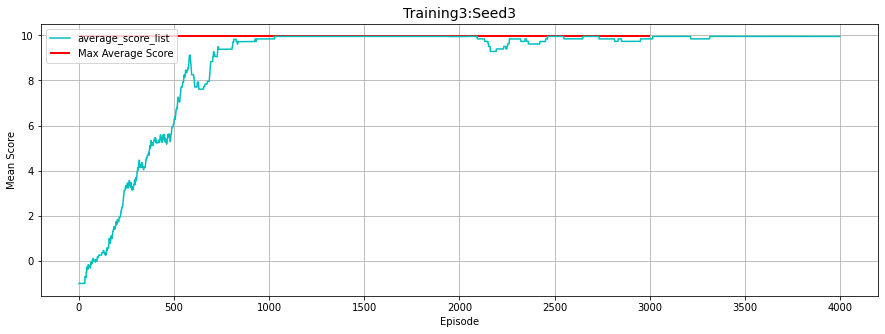

Brain Saved for Training 3 in seed 4
Episode 15	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 397
Score: [9.205003]
Episode 86	Average Score: -0.881331,	Average Step: 497.81395348837216Task solved in step: 345
Score: [9.308202]
Episode 91	Average Score: -0.774574,	Average Step: 496.18681318681327Task solved in step: 466
Score: [9.066605]
Episode 93	Average Score: -0.671179,	Average Step: 495.89247311827955Task solved in step: 437
Score: [9.125804]
Episode 95	Average Score: -0.571514,	Average Step: 495.30526315789473Task solved in step: 461
Score: [9.076005]
Episode 110	Average Score: -0.492178,	Average Step: 495.1170707070704Task solved in step: 494
Score: [9.011606]
Episode 117	Average Score: -0.494112,	Average Step: 496.08Task solved in step: 249
Score: [9.499999]
Episode 132	Average Score: -0.389112,	Average Step: 493.58Task solved in step: 492
Score: [9.014405]
Episode 134	Average Score: -0.288968,	Average Step: 493.51Task solved in step: 310
Score: [9.3782015]


Episode 622	Average Score: 5.209373,	Average Step: 294.57Task solved in step: 154
Score: [9.6908]
Episode 623	Average Score: 5.316280,	Average Step: 291.12Task solved in step: 22
Score: [9.954]
Episode 624	Average Score: 5.425820,	Average Step: 286.35Task solved in step: 22
Score: [9.954]
Episode 625	Average Score: 5.535360,	Average Step: 281.58Task solved in step: 22
Score: [9.954]
Episode 626	Average Score: 5.540096,	Average Step: 279.21Task solved in step: 27
Score: [9.9454]
Episode 627	Average Score: 5.649549,	Average Step: 274.49Task solved in step: 22
Score: [9.954]
Episode 628	Average Score: 5.759089,	Average Step: 269.72Task solved in step: 22
Score: [9.954]
Episode 629	Average Score: 5.868630,	Average Step: 264.95Task solved in step: 22
Score: [9.954]
Episode 630	Average Score: 5.978169,	Average Step: 260.18Task solved in step: 22
Score: [9.954]
Episode 631	Average Score: 5.981942,	Average Step: 258.29Task solved in step: 28
Score: [9.942201]
Episode 632	Average Score: 6.09136

Episode 1459	Average Score: 4.957195,	Average Step: 270.59Task solved in step: 24
Score: [9.9516]
Episode 1460	Average Score: 5.066711,	Average Step: 265.84Task solved in step: 25
Score: [9.9486]
Episode 1461	Average Score: 5.066653,	Average Step: 265.87Task solved in step: 24
Score: [9.9516]
Episode 1462	Average Score: 5.069221,	Average Step: 264.59Task solved in step: 24
Score: [9.9516]
Episode 1463	Average Score: 5.178737,	Average Step: 259.84Task solved in step: 24
Score: [9.9516]
Episode 1464	Average Score: 5.288252,	Average Step: 255.09Task solved in step: 24
Score: [9.9516]
Episode 1465	Average Score: 5.397768,	Average Step: 250.34Task solved in step: 46
Score: [9.9078]
Episode 1467	Average Score: 5.405714,	Average Step: 246.37Task solved in step: 24
Score: [9.9516]
Episode 1469	Average Score: 5.304242,	Average Step: 247.11Task solved in step: 50
Score: [9.898]
Episode 1472	Average Score: 5.413222,	Average Step: 242.62Task solved in step: 24
Score: [9.9516]
Episode 1473	Average 

Episode 2913	Average Score: 6.191652,	Average Step: 203.55Task solved in step: 22
Score: [9.9558]
Episode 2914	Average Score: 6.191657,	Average Step: 203.55Task solved in step: 22
Score: [9.9558]
Episode 2915	Average Score: 6.192358,	Average Step: 203.2Task solved in step: 22
Score: [9.9558]
Episode 2916	Average Score: 6.192363,	Average Step: 203.2Task solved in step: 22
Score: [9.9558]
Episode 2917	Average Score: 6.192417,	Average Step: 203.18Task solved in step: 24
Score: [9.9516]
Episode 2918	Average Score: 6.192429,	Average Step: 203.18Task solved in step: 22
Score: [9.9558]
Episode 2919	Average Score: 6.301987,	Average Step: 198.41Task solved in step: 22
Score: [9.9558]
Episode 2920	Average Score: 6.411544,	Average Step: 193.64Task solved in step: 22
Score: [9.954801]
Episode 2921	Average Score: 6.411602,	Average Step: 193.61Task solved in step: 20
Score: [9.958]
Episode 2922	Average Score: 6.521182,	Average Step: 188.82Task solved in step: 20
Score: [9.958]
Episode 2923	Average S

Episode 3001	Average Score: 9.625437,	Average Step: 36.47Task solved in step: 20
Score: [9.958]
Episode 3002	Average Score: 9.625459,	Average Step: 36.45Task solved in step: 93
Score: [9.8124]
Episode 3003	Average Score: 9.624050,	Average Step: 37.15Task solved in step: 20
Score: [9.958]
Episode 3004	Average Score: 9.624099,	Average Step: 37.12Task solved in step: 20
Score: [9.958]
Episode 3005	Average Score: 9.624146,	Average Step: 37.09Task solved in step: 20
Score: [9.958]
Episode 3006	Average Score: 9.626569,	Average Step: 35.87Task solved in step: 20
Score: [9.958]
Episode 3007	Average Score: 9.626616,	Average Step: 35.84Task solved in step: 20
Score: [9.958]
Episode 3008	Average Score: 9.626638,	Average Step: 35.82Task solved in step: 20
Score: [9.958]
Episode 3009	Average Score: 9.626687,	Average Step: 35.79Task solved in step: 20
Score: [9.958]
Episode 3010	Average Score: 9.626735,	Average Step: 35.76Task solved in step: 20
Score: [9.958]
Episode 3011	Average Score: 9.626757,	A

Episode 3223	Average Score: 6.881264,	Average Step: 158.41Task solved in step: 20
Score: [9.958]
Episode 3224	Average Score: 6.990843,	Average Step: 153.62Task solved in step: 20
Score: [9.958]
Episode 3225	Average Score: 7.100424,	Average Step: 148.83Task solved in step: 20
Score: [9.958]
Episode 3226	Average Score: 7.210004,	Average Step: 144.04Task solved in step: 20
Score: [9.958]
Episode 3227	Average Score: 7.319584,	Average Step: 139.25Task solved in step: 20
Score: [9.958]
Episode 3228	Average Score: 7.429164,	Average Step: 134.46Task solved in step: 20
Score: [9.958]
Episode 3229	Average Score: 7.538744,	Average Step: 129.67Task solved in step: 20
Score: [9.958]
Episode 3230	Average Score: 7.648324,	Average Step: 124.88Task solved in step: 20
Score: [9.958]
Episode 3231	Average Score: 7.757904,	Average Step: 120.09Task solved in step: 20
Score: [9.958]
Episode 3232	Average Score: 7.867484,	Average Step: 115.3Task solved in step: 20
Score: [9.958]
Episode 3233	Average Score: 7.9

Episode 3396	Average Score: 9.847535,	Average Step: 25.3Task solved in step: 20
Score: [9.958]
Episode 3397	Average Score: 9.847535,	Average Step: 25.3Task solved in step: 20
Score: [9.958]
Episode 3398	Average Score: 9.847534,	Average Step: 25.3Task solved in step: 20
Score: [9.958]
Episode 3399	Average Score: 9.847534,	Average Step: 25.3Task solved in step: 20
Score: [9.958]
Episode 3400	Average Score: 9.847535,	Average Step: 25.3Task solved in step: 24
Score: [9.950399]
Episode 3401	Average Score: 9.847459,	Average Step: 25.34Task solved in step: 20
Score: [9.958]
Episode 3402	Average Score: 9.847458,	Average Step: 25.34Task solved in step: 20
Score: [9.958]
Episode 3403	Average Score: 9.847502,	Average Step: 25.31Task solved in step: 20
Score: [9.958]
Episode 3404	Average Score: 9.847523,	Average Step: 25.3Task solved in step: 20
Score: [9.958]
Episode 3405	Average Score: 9.847523,	Average Step: 25.3Task solved in step: 20
Score: [9.958]
Episode 3406	Average Score: 9.847523,	Averag

Episode 3571	Average Score: 9.737985,	Average Step: 30.06Task solved in step: 20
Score: [9.958]
Episode 3572	Average Score: 9.738030,	Average Step: 30.03Task solved in step: 20
Score: [9.958]
Episode 3574	Average Score: 9.628451,	Average Step: 34.82Task solved in step: 20
Score: [9.958]
Episode 3575	Average Score: 9.738030,	Average Step: 30.03Task solved in step: 20
Score: [9.958]
Episode 3576	Average Score: 9.738087,	Average Step: 30.0Task solved in step: 21
Score: [9.9568]
Episode 3577	Average Score: 9.738074,	Average Step: 30.01Task solved in step: 20
Score: [9.958]
Episode 3578	Average Score: 9.738075,	Average Step: 30.01Task solved in step: 20
Score: [9.958]
Episode 3579	Average Score: 9.738112,	Average Step: 29.99Task solved in step: 20
Score: [9.958]
Episode 3580	Average Score: 9.738112,	Average Step: 29.99Task solved in step: 20
Score: [9.958]
Episode 3581	Average Score: 9.738112,	Average Step: 29.99Task solved in step: 20
Score: [9.958]
Episode 3582	Average Score: 9.738112,	Av

Episode 3742	Average Score: 9.951344,	Average Step: 23.39Task solved in step: 72
Score: [9.8546]
Episode 3743	Average Score: 9.950310,	Average Step: 23.91Task solved in step: 20
Score: [9.958]
Episode 3744	Average Score: 9.950310,	Average Step: 23.91Task solved in step: 20
Score: [9.958]
Episode 3745	Average Score: 9.950310,	Average Step: 23.91Task solved in step: 23
Score: [9.9526005]
Episode 3746	Average Score: 9.950256,	Average Step: 23.94Task solved in step: 23
Score: [9.9522]
Episode 3747	Average Score: 9.950198,	Average Step: 23.97Task solved in step: 20
Score: [9.958]
Episode 3748	Average Score: 9.950198,	Average Step: 23.97Task solved in step: 23
Score: [9.9522]
Episode 3749	Average Score: 9.950140,	Average Step: 24.0Task solved in step: 20
Score: [9.958]
Episode 3750	Average Score: 9.950140,	Average Step: 24.0Task solved in step: 20
Score: [9.958]
Episode 3751	Average Score: 9.950140,	Average Step: 24.0Task solved in step: 20
Score: [9.958]
Episode 3752	Average Score: 9.950140

Episode 3828	Average Score: 9.949664,	Average Step: 24.21Task solved in step: 20
Score: [9.958]
Episode 3829	Average Score: 9.949664,	Average Step: 24.21Task solved in step: 20
Score: [9.958]
Episode 3830	Average Score: 9.949664,	Average Step: 24.21Task solved in step: 20
Score: [9.958]
Episode 3831	Average Score: 9.949735,	Average Step: 24.17Task solved in step: 20
Score: [9.958]
Episode 3832	Average Score: 9.949735,	Average Step: 24.17Task solved in step: 20
Score: [9.958]
Episode 3833	Average Score: 9.949735,	Average Step: 24.17Task solved in step: 20
Score: [9.958]
Episode 3834	Average Score: 9.949735,	Average Step: 24.17Task solved in step: 20
Score: [9.958]
Episode 3835	Average Score: 9.949735,	Average Step: 24.17Task solved in step: 20
Score: [9.958]
Episode 3836	Average Score: 9.949780,	Average Step: 24.14Task solved in step: 20
Score: [9.958]
Episode 3837	Average Score: 9.949780,	Average Step: 24.14Task solved in step: 20
Score: [9.958]
Episode 3838	Average Score: 9.949780,	Av

Episode 3915	Average Score: 9.847467,	Average Step: 25.3Task solved in step: 20
Score: [9.958]
Episode 3916	Average Score: 9.847495,	Average Step: 25.28Task solved in step: 20
Score: [9.958]
Episode 3917	Average Score: 9.847555,	Average Step: 25.25Task solved in step: 23
Score: [9.9522]
Episode 3918	Average Score: 9.847527,	Average Step: 25.26Task solved in step: 20
Score: [9.958]
Episode 3919	Average Score: 9.847527,	Average Step: 25.26Task solved in step: 20
Score: [9.958]
Episode 3920	Average Score: 9.847527,	Average Step: 25.26Task solved in step: 20
Score: [9.958]
Episode 3921	Average Score: 9.847527,	Average Step: 25.26Task solved in step: 20
Score: [9.958]
Episode 3922	Average Score: 9.847527,	Average Step: 25.26Task solved in step: 20
Score: [9.958]
Episode 3923	Average Score: 9.847527,	Average Step: 25.26Task solved in step: 20
Score: [9.958]
Episode 3924	Average Score: 9.847527,	Average Step: 25.26Task solved in step: 20
Score: [9.958]
Episode 3925	Average Score: 9.847527,	Av

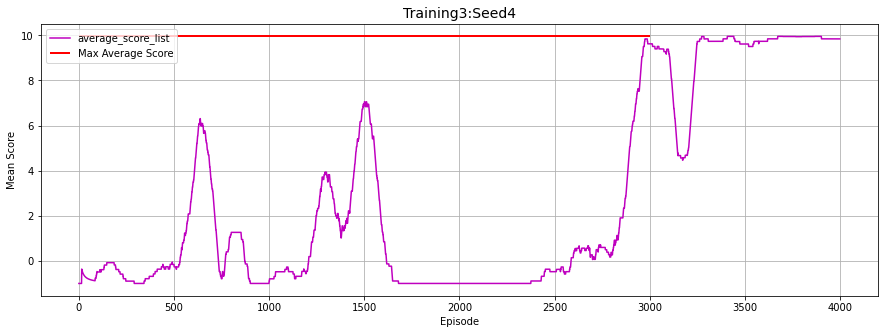

CPU times: user 2h 46min 29s, sys: 14h 24min 3s, total: 17h 10min 33s
Wall time: 4h 56min 49s


In [20]:
%%time

seed_number=5

for seed in range(seed_number):
    

                
    #Logged values


    scores = []
    step=[] 
    average_score_list=[]                                           #Saves last 100 average scores
    average_step_list=[]   
    scores_window = deque(maxlen=100)                               # Saves last 100 avarage solved steps
    step_window = deque(maxlen=100)                                 # last 100 scores

    #Hyperparamaters:

    n_episodes=4000
    max_t=500
    eps_start=1.0
    eps=eps_start
    eps_end=0.01 
    eps_decay=0.995


    #Call DQN function
    agent = DQN_Agent(state_size, action_size, seed=seed)
     
    #Load weights:    
    if seed == 0:
        print("Brain Loaded for Train_3 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train2_Seed0.pth'))
    if seed == 1:
        print("Brain Loaded for Train_3 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train2_Seed1.pth'))
    if seed == 2:
        print("Brain Loaded for Training 3 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train2_Seed2.pth'))
    if seed == 3:
        print("Brain Loaded for Training 3 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train2_Seed3.pth'))
    if seed == 4:
        print("Brain Saved for Training 3 in seed",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train2_Seed4.pth'))


    env.reset()
    for episode in range(1,n_episodes+1):

        done=False
        #Reset environment for each episode:
        env.reset()
        #Get information from reset environment:
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        # get initial state of the unity environment
        state = decision_steps.obs[0]
        #Score list containing scores from each episode:
        score = 0
        mean_score=[]
        for i in range(max_t):


            action = agent.act(state, eps)        #action as numpy.int64
            action_fixed=np.array([[action]])
            action_tuple = ActionTuple()
            action_tuple.add_discrete(action_fixed)

            #Set action information
            env.set_actions(behavior_name,action_tuple)
            # Move the simulation forward
            env.step()
            # Get the new simulation results
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            # get the next states for each unity agent in the environment
            next_state = decision_steps.obs[0]

            # get the rewards for each unity agent in the environment
            rewards = decision_steps.reward

            #If episode dones:
            if(len(terminal_steps.reward)!=0):

                        done= True
                        rewards= terminal_steps.reward
                        next_state = terminal_steps.obs[0]




            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent.step(state, action, rewards, next_state,done)

            #New state is the next state:
            state = next_state

            #Iterate rewards on score
            score += rewards


            if rewards > 0:
                print("Task solved in step:",i)
                print("Score:",score)


            if done:

                break


        #Decrease epsilon parameter step by step:
        eps = max(eps_end, eps_decay*eps) 

        #Save last step
        step.append(i)
        # save last steps for window for average 100:        
        step_window.append(i)
        #Create list for avarge 100 scores
        average_step_list.append(np.mean(step_window))

        # save most recent score:
        scores.append(score)
        # save most recent score for window for average 100:        
        scores_window.append(score)  
        #Create list for avarge 100 scores
        average_score_list.append(np.mean(scores_window))



        print('\rEpisode {}\tAverage Score: {:.6f},\tAverage Step: {}'.format(episode, np.mean(scores_window),np.mean(step_window)), end="")
       
       
        if episode % 1000 == 0:
    
            if seed == 0:
                print("Brain Saved for Training 3 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train3_Seed0.pth')
            if seed == 1:
                print("Brain Saved for Training 3 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train3_Seed1.pth')
            if seed == 2:
                print("Brain Saved for Training 3 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train3_Seed2.pth')
            if seed == 3:
                print("Brain Saved for Training 3 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train3_Seed3.pth')

            if seed == 4:
                print("Brain Saved for Training 3 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train3_Seed4.pth')
                
                
                

    #Save datas per each seed
    score_shape=len(scores)
    df= pd.DataFrame(list(zip(np.array(scores).reshape(score_shape).tolist(), average_score_list, step,average_step_list)), columns= ['Scores','Mean_Scores','Completed_Steps','MeanCompleted_Steps'])
    df.to_csv('Train_3_Seed_'+str(seed)+'.csv')
    
    #Plot mean reward:
    color=["b","g","r","c","m"]
    plt.rcParams['figure.figsize'] = [15,5]
    plt.plot(np.arange(len(average_score_list)), average_score_list,label="average_score_list",color=color[seed])
    plt.hlines(y=max(average_score_list), xmin=0, xmax=3000, colors='red', linestyles='-', lw=2, label='Max Average Score')
    plt.xlabel('Episode', fontsize=10)
    plt.ylabel('Mean Score', fontsize=10)
    plt.title("Training3:Seed{}".format(seed),fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("Training3:Seed{}.png".format(seed))
    plt.show()
    
    




# 4-) Fourth training:Alternative Door

In [21]:
env.close()

In [23]:
default_file="HER_3_no.app"
alternative_file="HER_3_no_alternate.app"
default_logged="HER_3_no_log.app"
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=alternative_file,worker_id=0,side_channels=[channel])
channel.set_configuration_parameters(time_scale = 100.0)
# get the behavior:
env.reset()
behavior_name = list(env.behavior_specs)[0]
print(behavior_name)
spec = env.behavior_specs[behavior_name]
# reset the environment
env.reset()
decision_steps, terminal_steps = env.get_steps(behavior_name)

for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")
    
action_size=branch_size    
print('Number of actions:', action_size)

# examine the state space 
state=decision_steps.obs[0][0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('States have length:', type(state))
env.reset()

HERTask_2?team=0
Action number 0 has 5 different options
Number of actions: 5
States look like: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.46935856 0.         1.
 0.         0.         0.         0.         0.         0.52897596
 0.         1.         0.         0.         0.         0.
 0.         0.5289759  0.         1.         0.         0.
 0.         0.         0.         0.707789   0.         1.
 0.        

Brain Loaded for Training 4 in seed: 0
Episode 11	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 390
Score: [9.219003]
Episode 70	Average Score: -0.854008,	Average Step: 497.44285714285714Task solved in step: 391
Score: [9.217803]
Episode 81	Average Score: -0.747688,	Average Step: 496.32098765432173Task solved in step: 379
Score: [9.241603]
Episode 118	Average Score: -0.795400,	Average Step: 496.7295959595963Task solved in step: 218
Score: [9.562599]
Episode 119	Average Score: -0.689774,	Average Step: 493.91Task solved in step: 459
Score: [9.081004]
Episode 126	Average Score: -0.588964,	Average Step: 493.51Task solved in step: 395
Score: [9.209403]
Episode 163	Average Score: -0.486870,	Average Step: 492.47Task solved in step: 329
Score: [9.341601]
Episode 171	Average Score: -0.485632,	Average Step: 491.85Task solved in step: 315
Score: [9.368401]
Episode 178	Average Score: -0.381948,	Average Step: 490.01Task solved in step: 203
Score: [9.5926]
Episode 194	Average Sco

Episode 473	Average Score: 3.633888,	Average Step: 382.27Task solved in step: 476
Score: [9.046805]
Episode 474	Average Score: 3.734356,	Average Step: 382.04Task solved in step: 338
Score: [9.323602]
Episode 477	Average Score: 3.735508,	Average Step: 381.47Task solved in step: 100
Score: [9.7998]
Episode 478	Average Score: 3.735914,	Average Step: 381.27Task solved in step: 155
Score: [9.688399]
Episode 481	Average Score: 3.638692,	Average Step: 379.87Task solved in step: 262
Score: [9.474999]
Episode 483	Average Score: 3.636468,	Average Step: 380.98Task solved in step: 440
Score: [9.119405]
Episode 488	Average Score: 3.531724,	Average Step: 383.35Task solved in step: 32
Score: [9.9344]
Episode 489	Average Score: 3.641068,	Average Step: 378.68Task solved in step: 307
Score: [9.384201]
Episode 490	Average Score: 3.643790,	Average Step: 377.32Task solved in step: 108
Score: [9.782]
Episode 491	Average Score: 3.751610,	Average Step: 373.41Task solved in step: 165
Score: [9.6694]
Episode 49

Episode 692	Average Score: 7.597770,	Average Step: 150.46Task solved in step: 31
Score: [9.9366]
Episode 693	Average Score: 7.707136,	Average Step: 145.78Task solved in step: 128
Score: [9.742]
Episode 694	Average Score: 7.705274,	Average Step: 146.71Task solved in step: 135
Score: [9.728999]
Episode 695	Average Score: 7.812563,	Average Step: 143.07Task solved in step: 125
Score: [9.7486]
Episode 696	Average Score: 7.810595,	Average Step: 144.05Task solved in step: 99
Score: [9.8014]
Episode 697	Average Score: 7.809257,	Average Step: 144.72Task solved in step: 30
Score: [9.9394]
Episode 698	Average Score: 7.809235,	Average Step: 144.73Task solved in step: 52
Score: [9.8949995]
Episode 699	Average Score: 7.808795,	Average Step: 144.95Task solved in step: 93
Score: [9.8138]
Episode 701	Average Score: 7.702719,	Average Step: 147.99Task solved in step: 29
Score: [9.941601]
Episode 702	Average Score: 7.702577,	Average Step: 148.06Task solved in step: 24
Score: [9.9506]
Episode 703	Average S

Episode 833	Average Score: 4.626387,	Average Step: 286.0Task solved in step: 171
Score: [9.6562]
Episode 834	Average Score: 4.626555,	Average Step: 285.91Task solved in step: 37
Score: [9.9251995]
Episode 835	Average Score: 4.735807,	Average Step: 281.29Task solved in step: 71
Score: [9.8574]
Episode 836	Average Score: 4.734969,	Average Step: 281.71Task solved in step: 35
Score: [9.928]
Episode 837	Average Score: 4.741249,	Average Step: 278.57Task solved in step: 42
Score: [9.9146]
Episode 842	Average Score: 4.528589,	Average Step: 284.89Task solved in step: 140
Score: [9.719]
Episode 843	Average Score: 4.635778,	Average Step: 281.3Task solved in step: 145
Score: [9.7094]
Episode 844	Average Score: 4.633371,	Average Step: 282.51Task solved in step: 392
Score: [9.214603]
Episode 845	Average Score: 4.626287,	Average Step: 286.05Task solved in step: 51
Score: [9.8972]
Episode 847	Average Score: 4.625789,	Average Step: 286.37Task solved in step: 163
Score: [9.6722]
Episode 848	Average Scor

Episode 994	Average Score: 3.312704,	Average Step: 342.84Task solved in step: 29
Score: [9.940001]
Episode 995	Average Score: 3.422104,	Average Step: 338.14Task solved in step: 30
Score: [9.9396]
Episode 996	Average Score: 3.427566,	Average Step: 335.41Task solved in step: 38
Score: [9.9223995]
Episode 997	Average Score: 3.536789,	Average Step: 330.8Task solved in step: 38
Score: [9.9223995]
Episode 999	Average Score: 3.646013,	Average Step: 326.19Task solved in step: 43
Score: [9.912201]
Episode 1000	Average Score: 3.645747,	Average Step: 326.32Brain Saved for Training 4 in episode: 1000 in seed 0
Episode 1001	Average Score: 3.645747,	Average Step: 326.32Task solved in step: 28
Score: [9.943]
Episode 1003	Average Score: 3.645801,	Average Step: 326.29Task solved in step: 30
Score: [9.9386]
Episode 1004	Average Score: 3.755187,	Average Step: 321.6Task solved in step: 110
Score: [9.778999]
Episode 1006	Average Score: 3.644281,	Average Step: 327.05Task solved in step: 376
Score: [9.246203

Episode 1087	Average Score: 8.771486,	Average Step: 113.64Task solved in step: 37
Score: [9.9248]
Episode 1088	Average Score: 8.771300,	Average Step: 113.73Task solved in step: 25
Score: [9.9484]
Episode 1089	Average Score: 8.771422,	Average Step: 113.67Task solved in step: 25
Score: [9.9484]
Episode 1090	Average Score: 8.772428,	Average Step: 113.17Task solved in step: 25
Score: [9.9484]
Episode 1091	Average Score: 8.774055,	Average Step: 112.35Task solved in step: 25
Score: [9.9484]
Episode 1092	Average Score: 8.774097,	Average Step: 112.33Task solved in step: 25
Score: [9.9484]
Episode 1093	Average Score: 8.776389,	Average Step: 111.18Task solved in step: 166
Score: [9.665999]
Episode 1094	Average Score: 8.773652,	Average Step: 112.54Task solved in step: 31
Score: [9.9366]
Episode 1095	Average Score: 8.773618,	Average Step: 112.56Task solved in step: 25
Score: [9.948999]
Episode 1096	Average Score: 8.773711,	Average Step: 112.51Task solved in step: 23
Score: [9.9536]
Episode 1097	Av

Episode 1259	Average Score: 9.592660,	Average Step: 53.07Task solved in step: 25
Score: [9.9498]
Episode 1261	Average Score: 9.483329,	Average Step: 57.74Task solved in step: 23
Score: [9.9526005]
Episode 1262	Average Score: 9.483318,	Average Step: 57.74Task solved in step: 23
Score: [9.9526005]
Episode 1263	Average Score: 9.483308,	Average Step: 57.74Task solved in step: 23
Score: [9.952801]
Episode 1264	Average Score: 9.483300,	Average Step: 57.74Task solved in step: 23
Score: [9.952801]
Episode 1265	Average Score: 9.487638,	Average Step: 55.57Task solved in step: 23
Score: [9.9526005]
Episode 1266	Average Score: 9.487810,	Average Step: 55.48Task solved in step: 23
Score: [9.9526005]
Episode 1267	Average Score: 9.487801,	Average Step: 55.48Task solved in step: 23
Score: [9.9526005]
Episode 1268	Average Score: 9.488296,	Average Step: 55.23Task solved in step: 26
Score: [9.9478]
Episode 1269	Average Score: 9.490271,	Average Step: 54.25Task solved in step: 23
Score: [9.9522]
Episode 127

Episode 1344	Average Score: 9.824021,	Average Step: 37.44Task solved in step: 26
Score: [9.9462]
Episode 1345	Average Score: 9.823960,	Average Step: 37.47Task solved in step: 26
Score: [9.9462]
Episode 1346	Average Score: 9.823895,	Average Step: 37.5Task solved in step: 23
Score: [9.9524]
Episode 1347	Average Score: 9.823890,	Average Step: 37.5Task solved in step: 23
Score: [9.9524]
Episode 1348	Average Score: 9.823944,	Average Step: 37.47Task solved in step: 26
Score: [9.9478]
Episode 1349	Average Score: 9.823952,	Average Step: 37.47Task solved in step: 19
Score: [9.9618]
Episode 1350	Average Score: 9.824128,	Average Step: 37.39Task solved in step: 23
Score: [9.9522]
Episode 1351	Average Score: 9.824121,	Average Step: 37.39Task solved in step: 27
Score: [9.9444]
Episode 1353	Average Score: 9.714514,	Average Step: 42.19Task solved in step: 23
Score: [9.9522]
Episode 1354	Average Score: 9.714510,	Average Step: 42.19Task solved in step: 23
Score: [9.9522]
Episode 1355	Average Score: 9.71

Episode 1514	Average Score: 9.943891,	Average Step: 27.22Task solved in step: 24
Score: [9.9502]
Episode 1515	Average Score: 9.943871,	Average Step: 27.23Task solved in step: 24
Score: [9.9502]
Episode 1516	Average Score: 9.943851,	Average Step: 27.24Task solved in step: 29
Score: [9.9404]
Episode 1517	Average Score: 9.943733,	Average Step: 27.3Task solved in step: 24
Score: [9.9502]
Episode 1518	Average Score: 9.943713,	Average Step: 27.31Task solved in step: 25
Score: [9.948]
Episode 1519	Average Score: 9.943671,	Average Step: 27.33Task solved in step: 23
Score: [9.9522]
Episode 1520	Average Score: 9.943671,	Average Step: 27.33Task solved in step: 23
Score: [9.9522]
Episode 1521	Average Score: 9.943671,	Average Step: 27.33Task solved in step: 24
Score: [9.9502]
Episode 1522	Average Score: 9.943651,	Average Step: 27.34Task solved in step: 24
Score: [9.9502]
Episode 1523	Average Score: 9.943631,	Average Step: 27.35Task solved in step: 24
Score: [9.9502]
Episode 1524	Average Score: 9.94

Episode 1599	Average Score: 9.948930,	Average Step: 24.75Task solved in step: 24
Score: [9.9502]
Episode 1600	Average Score: 9.948930,	Average Step: 24.75Task solved in step: 24
Score: [9.9502]
Episode 1601	Average Score: 9.948930,	Average Step: 24.75Task solved in step: 24
Score: [9.9502]
Episode 1602	Average Score: 9.948930,	Average Step: 24.75Task solved in step: 24
Score: [9.9502]
Episode 1603	Average Score: 9.948930,	Average Step: 24.75Task solved in step: 24
Score: [9.9502]
Episode 1604	Average Score: 9.948935,	Average Step: 24.74Task solved in step: 22
Score: [9.9544]
Episode 1605	Average Score: 9.948954,	Average Step: 24.73Task solved in step: 22
Score: [9.9544]
Episode 1606	Average Score: 9.948997,	Average Step: 24.71Task solved in step: 22
Score: [9.9544]
Episode 1607	Average Score: 9.949039,	Average Step: 24.69Task solved in step: 35
Score: [9.9292]
Episode 1608	Average Score: 9.948829,	Average Step: 24.8Task solved in step: 23
Score: [9.9522]
Episode 1609	Average Score: 9.9

Episode 1684	Average Score: 9.947958,	Average Step: 25.28Task solved in step: 22
Score: [9.955601]
Episode 1685	Average Score: 9.947970,	Average Step: 25.28Task solved in step: 22
Score: [9.955601]
Episode 1686	Average Score: 9.947982,	Average Step: 25.28Task solved in step: 22
Score: [9.9544]
Episode 1687	Average Score: 9.947983,	Average Step: 25.28Task solved in step: 22
Score: [9.9544]
Episode 1688	Average Score: 9.947982,	Average Step: 25.28Task solved in step: 22
Score: [9.9544]
Episode 1689	Average Score: 9.947982,	Average Step: 25.28Task solved in step: 22
Score: [9.9544]
Episode 1690	Average Score: 9.947982,	Average Step: 25.28Task solved in step: 27
Score: [9.9458]
Episode 1691	Average Score: 9.947822,	Average Step: 25.36Task solved in step: 22
Score: [9.9544]
Episode 1692	Average Score: 9.947822,	Average Step: 25.36Task solved in step: 22
Score: [9.9544]
Episode 1693	Average Score: 9.947864,	Average Step: 25.34Task solved in step: 22
Score: [9.9544]
Episode 1694	Average Score

Episode 1769	Average Score: 9.946155,	Average Step: 26.2Task solved in step: 22
Score: [9.9544]
Episode 1770	Average Score: 9.946155,	Average Step: 26.2Task solved in step: 22
Score: [9.9544]
Episode 1771	Average Score: 9.946155,	Average Step: 26.2Task solved in step: 22
Score: [9.9544]
Episode 1772	Average Score: 9.946155,	Average Step: 26.2Task solved in step: 22
Score: [9.9544]
Episode 1773	Average Score: 9.946155,	Average Step: 26.2Task solved in step: 22
Score: [9.9544]
Episode 1774	Average Score: 9.946155,	Average Step: 26.2Task solved in step: 22
Score: [9.9544]
Episode 1775	Average Score: 9.946155,	Average Step: 26.2Task solved in step: 22
Score: [9.9544]
Episode 1776	Average Score: 9.946081,	Average Step: 26.23Task solved in step: 22
Score: [9.9544]
Episode 1777	Average Score: 9.946082,	Average Step: 26.23Task solved in step: 22
Score: [9.9544]
Episode 1778	Average Score: 9.946082,	Average Step: 26.23Task solved in step: 22
Score: [9.9544]
Episode 1779	Average Score: 9.946082,

Episode 1856	Average Score: 9.731346,	Average Step: 33.57Task solved in step: 25
Score: [9.9494]
Episode 1857	Average Score: 9.731297,	Average Step: 33.6Task solved in step: 22
Score: [9.9544]
Episode 1858	Average Score: 9.731316,	Average Step: 33.59Task solved in step: 22
Score: [9.9544]
Episode 1859	Average Score: 9.731336,	Average Step: 33.58Task solved in step: 22
Score: [9.9544]
Episode 1860	Average Score: 9.731328,	Average Step: 33.58Task solved in step: 23
Score: [9.9524]
Episode 1861	Average Score: 9.731300,	Average Step: 33.59Task solved in step: 22
Score: [9.9544]
Episode 1862	Average Score: 9.731292,	Average Step: 33.59Task solved in step: 22
Score: [9.9544]
Episode 1863	Average Score: 9.731335,	Average Step: 33.57Task solved in step: 22
Score: [9.9544]
Episode 1864	Average Score: 9.731377,	Average Step: 33.55Task solved in step: 22
Score: [9.9544]
Episode 1865	Average Score: 9.731377,	Average Step: 33.55Task solved in step: 22
Score: [9.9544]
Episode 1866	Average Score: 9.7

Episode 2024	Average Score: 9.950866,	Average Step: 23.84Task solved in step: 32
Score: [9.9342]
Episode 2025	Average Score: 9.950776,	Average Step: 23.88Task solved in step: 23
Score: [9.9524]
Episode 2026	Average Score: 9.950756,	Average Step: 23.89Task solved in step: 23
Score: [9.9524]
Episode 2027	Average Score: 9.950736,	Average Step: 23.9Task solved in step: 23
Score: [9.952]
Episode 2028	Average Score: 9.950712,	Average Step: 23.91Task solved in step: 25
Score: [9.9494]
Episode 2029	Average Score: 9.950663,	Average Step: 23.94Task solved in step: 23
Score: [9.9524]
Episode 2030	Average Score: 9.950643,	Average Step: 23.95Task solved in step: 23
Score: [9.9524]
Episode 2031	Average Score: 9.950623,	Average Step: 23.96Task solved in step: 23
Score: [9.9524]
Episode 2032	Average Score: 9.950603,	Average Step: 23.97Task solved in step: 23
Score: [9.9524]
Episode 2033	Average Score: 9.950583,	Average Step: 23.98Task solved in step: 23
Score: [9.952]
Episode 2034	Average Score: 9.950

Episode 2193	Average Score: 9.940073,	Average Step: 29.4Task solved in step: 23
Score: [9.9524]
Episode 2194	Average Score: 9.940361,	Average Step: 29.25Task solved in step: 24
Score: [9.951799]
Episode 2195	Average Score: 9.940413,	Average Step: 29.23Task solved in step: 24
Score: [9.951799]
Episode 2196	Average Score: 9.940505,	Average Step: 29.19Task solved in step: 24
Score: [9.951799]
Episode 2197	Average Score: 9.940557,	Average Step: 29.17Task solved in step: 25
Score: [9.948]
Episode 2198	Average Score: 9.940571,	Average Step: 29.16Task solved in step: 24
Score: [9.951799]
Episode 2199	Average Score: 9.940621,	Average Step: 29.14Task solved in step: 24
Score: [9.951799]
Episode 2200	Average Score: 9.940616,	Average Step: 29.15Task solved in step: 23
Score: [9.9524]
Episode 2201	Average Score: 9.940616,	Average Step: 29.15Task solved in step: 23
Score: [9.9524]
Episode 2202	Average Score: 9.940616,	Average Step: 29.15Task solved in step: 24
Score: [9.951799]
Episode 2203	Average

Episode 2361	Average Score: 9.950330,	Average Step: 24.62Task solved in step: 24
Score: [9.951799]
Episode 2362	Average Score: 9.950434,	Average Step: 24.57Task solved in step: 24
Score: [9.951799]
Episode 2363	Average Score: 9.950434,	Average Step: 24.57Task solved in step: 24
Score: [9.951799]
Episode 2364	Average Score: 9.950435,	Average Step: 24.57Task solved in step: 24
Score: [9.951799]
Episode 2365	Average Score: 9.950434,	Average Step: 24.57Task solved in step: 24
Score: [9.951799]
Episode 2366	Average Score: 9.950434,	Average Step: 24.57Task solved in step: 23
Score: [9.9522]
Episode 2367	Average Score: 9.950438,	Average Step: 24.56Task solved in step: 28
Score: [9.943]
Episode 2368	Average Score: 9.950351,	Average Step: 24.6Task solved in step: 24
Score: [9.951799]
Episode 2369	Average Score: 9.950351,	Average Step: 24.6Task solved in step: 28
Score: [9.9438]
Episode 2370	Average Score: 9.950770,	Average Step: 24.39Task solved in step: 24
Score: [9.951799]
Episode 2371	Averag

Episode 2445	Average Score: 9.951185,	Average Step: 24.25Task solved in step: 25
Score: [9.9492]
Episode 2446	Average Score: 9.951160,	Average Step: 24.26Task solved in step: 24
Score: [9.951799]
Episode 2447	Average Score: 9.951159,	Average Step: 24.26Task solved in step: 24
Score: [9.951799]
Episode 2448	Average Score: 9.951188,	Average Step: 24.25Task solved in step: 24
Score: [9.951799]
Episode 2449	Average Score: 9.951188,	Average Step: 24.25Task solved in step: 24
Score: [9.951799]
Episode 2450	Average Score: 9.951188,	Average Step: 24.25Task solved in step: 24
Score: [9.951799]
Episode 2451	Average Score: 9.951188,	Average Step: 24.25Task solved in step: 24
Score: [9.951799]
Episode 2452	Average Score: 9.951188,	Average Step: 24.25Task solved in step: 24
Score: [9.951799]
Episode 2453	Average Score: 9.951188,	Average Step: 24.25Task solved in step: 24
Score: [9.951799]
Episode 2454	Average Score: 9.951188,	Average Step: 24.25Task solved in step: 24
Score: [9.951799]
Episode 2455

Episode 2529	Average Score: 9.949336,	Average Step: 25.15Task solved in step: 24
Score: [9.951799]
Episode 2530	Average Score: 9.949336,	Average Step: 25.15Task solved in step: 24
Score: [9.951799]
Episode 2531	Average Score: 9.949336,	Average Step: 25.15Task solved in step: 24
Score: [9.951799]
Episode 2532	Average Score: 9.949336,	Average Step: 25.15Task solved in step: 24
Score: [9.951799]
Episode 2533	Average Score: 9.949336,	Average Step: 25.15Task solved in step: 24
Score: [9.951799]
Episode 2534	Average Score: 9.949336,	Average Step: 25.15Task solved in step: 24
Score: [9.951799]
Episode 2535	Average Score: 9.949364,	Average Step: 25.14Task solved in step: 24
Score: [9.951799]
Episode 2536	Average Score: 9.949364,	Average Step: 25.14Task solved in step: 24
Score: [9.951799]
Episode 2537	Average Score: 9.949364,	Average Step: 25.14Task solved in step: 24
Score: [9.951799]
Episode 2538	Average Score: 9.949364,	Average Step: 25.14Task solved in step: 24
Score: [9.951799]
Episode 25

Episode 2614	Average Score: 9.840240,	Average Step: 29.66Task solved in step: 27
Score: [9.944]
Episode 2615	Average Score: 9.840162,	Average Step: 29.69Task solved in step: 23
Score: [9.9522]
Episode 2616	Average Score: 9.840167,	Average Step: 29.68Task solved in step: 23
Score: [9.9522]
Episode 2617	Average Score: 9.840171,	Average Step: 29.67Task solved in step: 24
Score: [9.951799]
Episode 2618	Average Score: 9.840171,	Average Step: 29.67Task solved in step: 24
Score: [9.951799]
Episode 2619	Average Score: 9.840171,	Average Step: 29.67Task solved in step: 26
Score: [9.9478]
Episode 2620	Average Score: 9.840131,	Average Step: 29.69Task solved in step: 24
Score: [9.951799]
Episode 2621	Average Score: 9.840131,	Average Step: 29.69Task solved in step: 24
Score: [9.951799]
Episode 2622	Average Score: 9.840131,	Average Step: 29.69Task solved in step: 23
Score: [9.9526005]
Episode 2623	Average Score: 9.840138,	Average Step: 29.68Task solved in step: 26
Score: [9.9466]
Episode 2624	Average

Episode 2698	Average Score: 9.950766,	Average Step: 24.38Task solved in step: 25
Score: [9.9482]
Episode 2699	Average Score: 9.950730,	Average Step: 24.39Task solved in step: 23
Score: [9.9526005]
Episode 2700	Average Score: 9.950778,	Average Step: 24.36Task solved in step: 24
Score: [9.951799]
Episode 2701	Average Score: 9.950788,	Average Step: 24.36Task solved in step: 24
Score: [9.951799]
Episode 2702	Average Score: 9.950788,	Average Step: 24.36Task solved in step: 24
Score: [9.951799]
Episode 2703	Average Score: 9.951108,	Average Step: 24.2Task solved in step: 26
Score: [9.946]
Episode 2704	Average Score: 9.951050,	Average Step: 24.22Task solved in step: 23
Score: [9.9526005]
Episode 2705	Average Score: 9.951057,	Average Step: 24.21Task solved in step: 26
Score: [9.9462]
Episode 2706	Average Score: 9.951042,	Average Step: 24.21Task solved in step: 24
Score: [9.951799]
Episode 2707	Average Score: 9.951082,	Average Step: 24.19Task solved in step: 24
Score: [9.951799]
Episode 2708	Ave

Episode 2782	Average Score: 9.950027,	Average Step: 24.59Task solved in step: 24
Score: [9.951799]
Episode 2783	Average Score: 9.950023,	Average Step: 24.6Task solved in step: 23
Score: [9.9526005]
Episode 2784	Average Score: 9.950027,	Average Step: 24.6Task solved in step: 26
Score: [9.9472]
Episode 2785	Average Score: 9.949981,	Average Step: 24.62Task solved in step: 24
Score: [9.951799]
Episode 2786	Average Score: 9.949981,	Average Step: 24.62Task solved in step: 24
Score: [9.951799]
Episode 2787	Average Score: 9.949981,	Average Step: 24.62Task solved in step: 24
Score: [9.951799]
Episode 2788	Average Score: 9.949981,	Average Step: 24.62Task solved in step: 26
Score: [9.947]
Episode 2789	Average Score: 9.949933,	Average Step: 24.64Task solved in step: 23
Score: [9.9526005]
Episode 2790	Average Score: 9.949941,	Average Step: 24.63Task solved in step: 25
Score: [9.9492]
Episode 2791	Average Score: 9.949915,	Average Step: 24.64Task solved in step: 24
Score: [9.951799]
Episode 2792	Aver

Episode 2866	Average Score: 9.950778,	Average Step: 24.08Task solved in step: 24
Score: [9.951799]
Episode 2867	Average Score: 9.950770,	Average Step: 24.09Task solved in step: 23
Score: [9.9526005]
Episode 2868	Average Score: 9.950829,	Average Step: 24.06Task solved in step: 23
Score: [9.9526005]
Episode 2869	Average Score: 9.950812,	Average Step: 24.07Task solved in step: 23
Score: [9.9526005]
Episode 2870	Average Score: 9.950826,	Average Step: 24.06Task solved in step: 23
Score: [9.9526005]
Episode 2871	Average Score: 9.950810,	Average Step: 24.07Task solved in step: 23
Score: [9.9526005]
Episode 2872	Average Score: 9.950818,	Average Step: 24.06Task solved in step: 23
Score: [9.9526005]
Episode 2873	Average Score: 9.950827,	Average Step: 24.05Task solved in step: 23
Score: [9.9526005]
Episode 2874	Average Score: 9.950827,	Average Step: 24.05Task solved in step: 22
Score: [9.954201]
Episode 2875	Average Score: 9.950843,	Average Step: 24.04Task solved in step: 23
Score: [9.9526005]
Ep

Episode 2950	Average Score: 9.951786,	Average Step: 23.46Task solved in step: 23
Score: [9.9526005]
Episode 2951	Average Score: 9.951786,	Average Step: 23.46Task solved in step: 23
Score: [9.9526005]
Episode 2952	Average Score: 9.951786,	Average Step: 23.46Task solved in step: 23
Score: [9.9526005]
Episode 2953	Average Score: 9.951786,	Average Step: 23.46Task solved in step: 23
Score: [9.9526005]
Episode 2954	Average Score: 9.951795,	Average Step: 23.45Task solved in step: 23
Score: [9.9526005]
Episode 2955	Average Score: 9.951802,	Average Step: 23.44Task solved in step: 26
Score: [9.9472]
Episode 2956	Average Score: 9.951813,	Average Step: 23.44Task solved in step: 23
Score: [9.9526005]
Episode 2957	Average Score: 9.951813,	Average Step: 23.44Task solved in step: 23
Score: [9.9526005]
Episode 2958	Average Score: 9.951813,	Average Step: 23.44Task solved in step: 26
Score: [9.9468]
Episode 2959	Average Score: 9.951798,	Average Step: 23.45Task solved in step: 23
Score: [9.9526005]
Episod

Episode 3117	Average Score: 9.950775,	Average Step: 24.26Task solved in step: 26
Score: [9.9478]
Episode 3118	Average Score: 9.950755,	Average Step: 24.27Task solved in step: 25
Score: [9.9498]
Episode 3119	Average Score: 9.950756,	Average Step: 24.27Task solved in step: 25
Score: [9.9498]
Episode 3120	Average Score: 9.950632,	Average Step: 24.34Task solved in step: 25
Score: [9.9498]
Episode 3121	Average Score: 9.950649,	Average Step: 24.34Task solved in step: 18
Score: [9.9622]
Episode 3122	Average Score: 9.950730,	Average Step: 24.3Task solved in step: 18
Score: [9.9622]
Episode 3123	Average Score: 9.950811,	Average Step: 24.26Task solved in step: 18
Score: [9.9622]
Episode 3124	Average Score: 9.950935,	Average Step: 24.19Task solved in step: 23
Score: [9.9538]
Episode 3125	Average Score: 9.950975,	Average Step: 24.17Task solved in step: 21
Score: [9.9566]
Episode 3126	Average Score: 9.951056,	Average Step: 24.13Task solved in step: 25
Score: [9.9498]
Episode 3127	Average Score: 9.9

Episode 3287	Average Score: 9.841343,	Average Step: 28.82Task solved in step: 23
Score: [9.952999]
Episode 3288	Average Score: 9.841387,	Average Step: 28.8Task solved in step: 23
Score: [9.952999]
Episode 3289	Average Score: 9.841418,	Average Step: 28.78Task solved in step: 23
Score: [9.952999]
Episode 3290	Average Score: 9.841450,	Average Step: 28.76Task solved in step: 25
Score: [9.9498]
Episode 3291	Average Score: 9.841450,	Average Step: 28.76Task solved in step: 23
Score: [9.952999]
Episode 3293	Average Score: 9.731985,	Average Step: 33.48Task solved in step: 23
Score: [9.952999]
Episode 3294	Average Score: 9.732017,	Average Step: 33.46Task solved in step: 23
Score: [9.952999]
Episode 3295	Average Score: 9.732017,	Average Step: 33.46Task solved in step: 23
Score: [9.952999]
Episode 3296	Average Score: 9.732017,	Average Step: 33.46Task solved in step: 23
Score: [9.953199]
Episode 3297	Average Score: 9.732050,	Average Step: 33.44Task solved in step: 23
Score: [9.952999]
Episode 3298	

Episode 3372	Average Score: 9.843410,	Average Step: 27.76Task solved in step: 23
Score: [9.952999]
Episode 3373	Average Score: 9.843410,	Average Step: 27.76Task solved in step: 23
Score: [9.952999]
Episode 3374	Average Score: 9.843438,	Average Step: 27.75Task solved in step: 23
Score: [9.952999]
Episode 3375	Average Score: 9.843467,	Average Step: 27.74Task solved in step: 23
Score: [9.952999]
Episode 3376	Average Score: 9.843468,	Average Step: 27.74Task solved in step: 23
Score: [9.952999]
Episode 3377	Average Score: 9.843468,	Average Step: 27.74Task solved in step: 24
Score: [9.9502]
Episode 3378	Average Score: 9.843440,	Average Step: 27.75Task solved in step: 24
Score: [9.9502]
Episode 3379	Average Score: 9.843418,	Average Step: 27.76Task solved in step: 24
Score: [9.9502]
Episode 3380	Average Score: 9.843390,	Average Step: 27.77Task solved in step: 24
Score: [9.9502]
Episode 3381	Average Score: 9.843362,	Average Step: 27.78Task solved in step: 24
Score: [9.9502]
Episode 3382	Average

Episode 3538	Average Score: 9.948956,	Average Step: 24.99Task solved in step: 26
Score: [9.9478]
Episode 3539	Average Score: 9.948904,	Average Step: 25.02Task solved in step: 23
Score: [9.952999]
Episode 3540	Average Score: 9.948904,	Average Step: 25.02Task solved in step: 23
Score: [9.952999]
Episode 3541	Average Score: 9.948904,	Average Step: 25.02Task solved in step: 23
Score: [9.952999]
Episode 3542	Average Score: 9.948905,	Average Step: 25.02Task solved in step: 23
Score: [9.952999]
Episode 3543	Average Score: 9.948904,	Average Step: 25.02Task solved in step: 23
Score: [9.952999]
Episode 3544	Average Score: 9.948905,	Average Step: 25.02Task solved in step: 23
Score: [9.952999]
Episode 3545	Average Score: 9.948904,	Average Step: 25.02Task solved in step: 25
Score: [9.9498]
Episode 3546	Average Score: 9.948809,	Average Step: 25.07Task solved in step: 23
Score: [9.952999]
Episode 3547	Average Score: 9.948745,	Average Step: 25.1Task solved in step: 23
Score: [9.952999]
Episode 3548	Av

Episode 3625	Average Score: 9.623559,	Average Step: 37.71Task solved in step: 23
Score: [9.952999]
Episode 3626	Average Score: 9.623559,	Average Step: 37.71Task solved in step: 23
Score: [9.952999]
Episode 3627	Average Score: 9.623558,	Average Step: 37.71Task solved in step: 26
Score: [9.9468]
Episode 3628	Average Score: 9.623496,	Average Step: 37.74Task solved in step: 23
Score: [9.952999]
Episode 3629	Average Score: 9.623496,	Average Step: 37.74Task solved in step: 23
Score: [9.952999]
Episode 3630	Average Score: 9.623496,	Average Step: 37.74Task solved in step: 23
Score: [9.952999]
Episode 3631	Average Score: 9.623462,	Average Step: 37.76Task solved in step: 23
Score: [9.952999]
Episode 3632	Average Score: 9.623462,	Average Step: 37.76Task solved in step: 23
Score: [9.952999]
Episode 3633	Average Score: 9.623462,	Average Step: 37.76Task solved in step: 23
Score: [9.952999]
Episode 3634	Average Score: 9.623370,	Average Step: 37.81Task solved in step: 24
Score: [9.950399]
Episode 3635

Episode 3863	Average Score: 3.896997,	Average Step: 300.66Task solved in step: 42
Score: [9.9144]
Episode 3864	Average Score: 3.896639,	Average Step: 300.84Task solved in step: 21
Score: [9.9564]
Episode 3865	Average Score: 4.006203,	Average Step: 296.06Task solved in step: 21
Score: [9.9564]
Episode 3866	Average Score: 4.006237,	Average Step: 296.04Task solved in step: 21
Score: [9.9574]
Episode 3867	Average Score: 4.115811,	Average Step: 291.26Task solved in step: 21
Score: [9.9564]
Episode 3868	Average Score: 4.115845,	Average Step: 291.24Task solved in step: 21
Score: [9.956]
Episode 3870	Average Score: 4.116039,	Average Step: 291.14Task solved in step: 20
Score: [9.9594]
Episode 3871	Average Score: 4.225633,	Average Step: 286.35Task solved in step: 18
Score: [9.9622]
Episode 3872	Average Score: 4.225749,	Average Step: 286.29Task solved in step: 21
Score: [9.9566]
Episode 3873	Average Score: 4.335315,	Average Step: 281.51Task solved in step: 29
Score: [9.940201]
Episode 3874	Averag

Episode 3948	Average Score: 9.840619,	Average Step: 29.06Task solved in step: 21
Score: [9.9564]
Episode 3949	Average Score: 9.840630,	Average Step: 29.05Task solved in step: 21
Score: [9.9564]
Episode 3950	Average Score: 9.840649,	Average Step: 29.04Task solved in step: 20
Score: [9.9594]
Episode 3951	Average Score: 9.840677,	Average Step: 29.03Task solved in step: 20
Score: [9.9594]
Episode 3952	Average Score: 9.840705,	Average Step: 29.02Task solved in step: 20
Score: [9.9594]
Episode 3953	Average Score: 9.840854,	Average Step: 28.95Task solved in step: 22
Score: [9.954]
Episode 3954	Average Score: 9.840865,	Average Step: 28.94Task solved in step: 20
Score: [9.9594]
Episode 3955	Average Score: 9.841659,	Average Step: 28.55Task solved in step: 21
Score: [9.9564]
Episode 3956	Average Score: 9.841659,	Average Step: 28.55Task solved in step: 21
Score: [9.9564]
Episode 3957	Average Score: 9.841881,	Average Step: 28.44Task solved in step: 20
Score: [9.9594]
Episode 3958	Average Score: 9.8

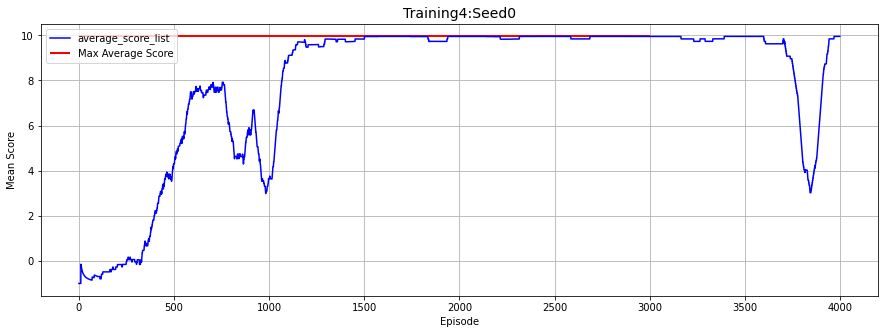

Brain Loaded for Training 4 in seed: 1
Episode 41	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 235
Score: [9.5282]
Episode 44	Average Score: -0.760717,	Average Step: 493.06046511627904Task solved in step: 385
Score: [9.229002]
Episode 46	Average Score: -0.548751,	Average Step: 490.7826086956522Task solved in step: 395
Score: [9.209403]
Episode 48	Average Score: -0.354857,	Average Step: 488.95833333333333Task solved in step: 463
Score: [9.072005]
Episode 49	Average Score: -0.162472,	Average Step: 488.42857142857144Task solved in step: 354
Score: [9.291001]
Episode 58	Average Score: -0.115001,	Average Step: 487.56896551724146Task solved in step: 341
Score: [9.317801]
Episode 61	Average Score: 0.010619,	Average Step: 485.54098360655746Task solved in step: 210
Score: [9.5789995]
Episode 65	Average Score: 0.111181,	Average Step: 481.9230769230769Task solved in step: 319
Score: [9.360802]
Episode 66	Average Score: 0.251327,	Average Step: 479.45454545454544Task solved in 

Episode 525	Average Score: 0.035075,	Average Step: 481.53Task solved in step: 489
Score: [9.020605]
Episode 531	Average Score: 0.135281,	Average Step: 481.43Task solved in step: 385
Score: [9.229802]
Episode 532	Average Score: 0.237579,	Average Step: 480.29Task solved in step: 136
Score: [9.7262]
Episode 541	Average Score: 0.238443,	Average Step: 479.85Task solved in step: 64
Score: [9.871799]
Episode 550	Average Score: 0.347161,	Average Step: 475.5Task solved in step: 92
Score: [9.8148]
Episode 569	Average Score: 0.350471,	Average Step: 473.84Task solved in step: 194
Score: [9.6114]
Episode 586	Average Score: 0.251833,	Average Step: 473.15Task solved in step: 442
Score: [9.114604]
Episode 591	Average Score: 0.249073,	Average Step: 474.53Task solved in step: 286
Score: [9.427601]
Episode 598	Average Score: 0.353349,	Average Step: 472.4Task solved in step: 120
Score: [9.7598]
Episode 605	Average Score: 0.155999,	Average Step: 471.07Task solved in step: 326
Score: [9.347201]
Episode 616	

Episode 973	Average Score: 5.999685,	Average Step: 249.38Task solved in step: 63
Score: [9.8732]
Episode 974	Average Score: 6.007141,	Average Step: 245.65Task solved in step: 29
Score: [9.9404]
Episode 975	Average Score: 6.012161,	Average Step: 243.14Task solved in step: 198
Score: [9.602399]
Episode 976	Average Score: 6.015836,	Average Step: 241.3Task solved in step: 37
Score: [9.924]
Episode 977	Average Score: 6.016947,	Average Step: 240.74Task solved in step: 18
Score: [9.9623995]
Episode 978	Average Score: 6.018945,	Average Step: 239.74Task solved in step: 29
Score: [9.940201]
Episode 979	Average Score: 6.128346,	Average Step: 235.04Task solved in step: 29
Score: [9.940201]
Episode 980	Average Score: 6.237749,	Average Step: 230.34Task solved in step: 28
Score: [9.9432]
Episode 982	Average Score: 6.242775,	Average Step: 227.83Task solved in step: 23
Score: [9.952801]
Episode 984	Average Score: 6.245098,	Average Step: 226.67Task solved in step: 84
Score: [9.830999]
Episode 985	Averag

Episode 1120	Average Score: 5.282071,	Average Step: 258.26Task solved in step: 89
Score: [9.821799]
Episode 1121	Average Score: 5.280710,	Average Step: 258.94Task solved in step: 42
Score: [9.9154005]
Episode 1122	Average Score: 5.280279,	Average Step: 259.16Task solved in step: 91
Score: [9.816999]
Episode 1125	Average Score: 5.169883,	Average Step: 264.36Task solved in step: 23
Score: [9.953199]
Episode 1126	Average Score: 5.171064,	Average Step: 263.77Task solved in step: 22
Score: [9.9552]
Episode 1127	Average Score: 5.280616,	Average Step: 259.0Task solved in step: 33
Score: [9.9338]
Episode 1128	Average Score: 5.389954,	Average Step: 254.34Task solved in step: 22
Score: [9.9552]
Episode 1129	Average Score: 5.499506,	Average Step: 249.57Task solved in step: 22
Score: [9.9552]
Episode 1130	Average Score: 5.609058,	Average Step: 244.8Task solved in step: 88
Score: [9.8226]
Episode 1131	Average Score: 5.613642,	Average Step: 242.51Task solved in step: 25
Score: [9.948999]
Episode 113

Episode 1223	Average Score: 7.858272,	Average Step: 120.2Task solved in step: 34
Score: [9.931]
Episode 1224	Average Score: 7.967581,	Average Step: 115.55Task solved in step: 29
Score: [9.9406]
Episode 1225	Average Score: 8.076988,	Average Step: 110.85Task solved in step: 31
Score: [9.9366]
Episode 1227	Average Score: 7.967269,	Average Step: 115.7Task solved in step: 21
Score: [9.9572]
Episode 1228	Average Score: 7.967504,	Average Step: 115.58Task solved in step: 26
Score: [9.9466]
Episode 1229	Average Score: 7.967418,	Average Step: 115.62Task solved in step: 26
Score: [9.9466]
Episode 1230	Average Score: 7.967331,	Average Step: 115.66Task solved in step: 18
Score: [9.9623995]
Episode 1231	Average Score: 7.968730,	Average Step: 114.96Task solved in step: 18
Score: [9.9623995]
Episode 1232	Average Score: 7.968863,	Average Step: 114.89Task solved in step: 18
Score: [9.9623995]
Episode 1233	Average Score: 7.969410,	Average Step: 114.61Task solved in step: 18
Score: [9.9623995]
Episode 123

Episode 1317	Average Score: 8.962708,	Average Step: 67.92Task solved in step: 18
Score: [9.9623995]
Episode 1318	Average Score: 8.962707,	Average Step: 67.92Task solved in step: 18
Score: [9.9623995]
Episode 1319	Average Score: 8.962983,	Average Step: 67.78Task solved in step: 18
Score: [9.9623995]
Episode 1320	Average Score: 8.963323,	Average Step: 67.61Task solved in step: 18
Score: [9.9623995]
Episode 1321	Average Score: 8.963399,	Average Step: 67.57Task solved in step: 18
Score: [9.9623995]
Episode 1322	Average Score: 8.963739,	Average Step: 67.4Task solved in step: 18
Score: [9.9623995]
Episode 1323	Average Score: 8.964019,	Average Step: 67.26Task solved in step: 21
Score: [9.957]
Episode 1324	Average Score: 8.964278,	Average Step: 67.13Task solved in step: 18
Score: [9.9623995]
Episode 1325	Average Score: 8.964497,	Average Step: 67.02Task solved in step: 18
Score: [9.9623995]
Episode 1326	Average Score: 8.964755,	Average Step: 66.89Task solved in step: 18
Score: [9.9623995]
Episo

Episode 1486	Average Score: 9.738229,	Average Step: 30.25Task solved in step: 18
Score: [9.9623995]
Episode 1487	Average Score: 9.738230,	Average Step: 30.25Task solved in step: 18
Score: [9.9623995]
Episode 1488	Average Score: 9.738230,	Average Step: 30.25Task solved in step: 18
Score: [9.9623995]
Episode 1489	Average Score: 9.738229,	Average Step: 30.25Task solved in step: 18
Score: [9.9623995]
Episode 1490	Average Score: 9.738289,	Average Step: 30.22Task solved in step: 18
Score: [9.9623995]
Episode 1491	Average Score: 9.738290,	Average Step: 30.22Task solved in step: 18
Score: [9.9623995]
Episode 1492	Average Score: 9.738289,	Average Step: 30.22Task solved in step: 19
Score: [9.9612]
Episode 1493	Average Score: 9.738277,	Average Step: 30.23Task solved in step: 19
Score: [9.9612]
Episode 1494	Average Score: 9.738265,	Average Step: 30.24Task solved in step: 19
Score: [9.9612]
Episode 1495	Average Score: 9.738254,	Average Step: 30.25Task solved in step: 19
Score: [9.9612]
Episode 1496

Episode 1573	Average Score: 9.850565,	Average Step: 24.2Task solved in step: 19
Score: [9.9612]
Episode 1574	Average Score: 9.850565,	Average Step: 24.2Task solved in step: 19
Score: [9.9612]
Episode 1575	Average Score: 9.850564,	Average Step: 24.2Task solved in step: 19
Score: [9.9612]
Episode 1576	Average Score: 9.850564,	Average Step: 24.2Task solved in step: 19
Score: [9.9612]
Episode 1577	Average Score: 9.850565,	Average Step: 24.2Task solved in step: 19
Score: [9.9612]
Episode 1578	Average Score: 9.850565,	Average Step: 24.2Task solved in step: 19
Score: [9.9612]
Episode 1579	Average Score: 9.850564,	Average Step: 24.2Task solved in step: 19
Score: [9.9612]
Episode 1580	Average Score: 9.850564,	Average Step: 24.2Task solved in step: 21
Score: [9.957]
Episode 1581	Average Score: 9.850522,	Average Step: 24.22Task solved in step: 19
Score: [9.9612]
Episode 1582	Average Score: 9.850522,	Average Step: 24.22Task solved in step: 19
Score: [9.9612]
Episode 1583	Average Score: 9.850522,	A

Episode 1658	Average Score: 9.960133,	Average Step: 19.53Task solved in step: 19
Score: [9.9612]
Episode 1659	Average Score: 9.960132,	Average Step: 19.53Task solved in step: 19
Score: [9.9612]
Episode 1660	Average Score: 9.960133,	Average Step: 19.53Task solved in step: 19
Score: [9.9612]
Episode 1661	Average Score: 9.960208,	Average Step: 19.49Task solved in step: 19
Score: [9.9612]
Episode 1662	Average Score: 9.960209,	Average Step: 19.49Task solved in step: 19
Score: [9.9612]
Episode 1663	Average Score: 9.960209,	Average Step: 19.49Task solved in step: 32
Score: [9.9342]
Episode 1664	Average Score: 9.959938,	Average Step: 19.62Task solved in step: 19
Score: [9.9612]
Episode 1665	Average Score: 9.959938,	Average Step: 19.62Task solved in step: 19
Score: [9.9612]
Episode 1666	Average Score: 9.959938,	Average Step: 19.62Task solved in step: 19
Score: [9.9612]
Episode 1667	Average Score: 9.959938,	Average Step: 19.62Task solved in step: 19
Score: [9.9612]
Episode 1668	Average Score: 9.

Episode 1828	Average Score: 9.959870,	Average Step: 19.64Task solved in step: 19
Score: [9.9612]
Episode 1829	Average Score: 9.959870,	Average Step: 19.64Task solved in step: 19
Score: [9.9612]
Episode 1830	Average Score: 9.959870,	Average Step: 19.64Task solved in step: 19
Score: [9.9612]
Episode 1831	Average Score: 9.959870,	Average Step: 19.64Task solved in step: 19
Score: [9.9612]
Episode 1832	Average Score: 9.959870,	Average Step: 19.64Task solved in step: 19
Score: [9.9612]
Episode 1833	Average Score: 9.959870,	Average Step: 19.64Task solved in step: 19
Score: [9.9612]
Episode 1834	Average Score: 9.959870,	Average Step: 19.64Task solved in step: 19
Score: [9.9612]
Episode 1835	Average Score: 9.959870,	Average Step: 19.64Task solved in step: 19
Score: [9.9612]
Episode 1836	Average Score: 9.959870,	Average Step: 19.64Task solved in step: 19
Score: [9.9612]
Episode 1837	Average Score: 9.959870,	Average Step: 19.64Task solved in step: 20
Score: [9.9592]
Episode 1838	Average Score: 9.

Episode 1913	Average Score: 9.959138,	Average Step: 20.02Task solved in step: 19
Score: [9.9612]
Episode 1914	Average Score: 9.959138,	Average Step: 20.02Task solved in step: 19
Score: [9.9612]
Episode 1915	Average Score: 9.959226,	Average Step: 19.98Task solved in step: 19
Score: [9.9612]
Episode 1916	Average Score: 9.959226,	Average Step: 19.98Task solved in step: 19
Score: [9.9612]
Episode 1917	Average Score: 9.959227,	Average Step: 19.98Task solved in step: 19
Score: [9.9612]
Episode 1918	Average Score: 9.959226,	Average Step: 19.98Task solved in step: 19
Score: [9.9612]
Episode 1919	Average Score: 9.959370,	Average Step: 19.91Task solved in step: 19
Score: [9.9612]
Episode 1920	Average Score: 9.959452,	Average Step: 19.87Task solved in step: 19
Score: [9.9612]
Episode 1921	Average Score: 9.959453,	Average Step: 19.87Task solved in step: 19
Score: [9.9612]
Episode 1922	Average Score: 9.959452,	Average Step: 19.87Task solved in step: 19
Score: [9.9612]
Episode 1923	Average Score: 9.

Episode 2083	Average Score: 9.957956,	Average Step: 20.59Task solved in step: 19
Score: [9.9612]
Episode 2084	Average Score: 9.957956,	Average Step: 20.59Task solved in step: 24
Score: [9.951799]
Episode 2085	Average Score: 9.957863,	Average Step: 20.64Task solved in step: 24
Score: [9.951799]
Episode 2086	Average Score: 9.957819,	Average Step: 20.67Task solved in step: 19
Score: [9.9612]
Episode 2087	Average Score: 9.957896,	Average Step: 20.63Task solved in step: 19
Score: [9.9612]
Episode 2088	Average Score: 9.957974,	Average Step: 20.59Task solved in step: 19
Score: [9.9612]
Episode 2089	Average Score: 9.958052,	Average Step: 20.55Task solved in step: 19
Score: [9.9612]
Episode 2090	Average Score: 9.958052,	Average Step: 20.55Task solved in step: 19
Score: [9.9612]
Episode 2091	Average Score: 9.958052,	Average Step: 20.55Task solved in step: 19
Score: [9.9612]
Episode 2092	Average Score: 9.958053,	Average Step: 20.55Task solved in step: 19
Score: [9.9612]
Episode 2093	Average Score

Episode 2168	Average Score: 9.954150,	Average Step: 22.52Task solved in step: 19
Score: [9.9612]
Episode 2169	Average Score: 9.954150,	Average Step: 22.52Task solved in step: 19
Score: [9.9612]
Episode 2170	Average Score: 9.954185,	Average Step: 22.5Task solved in step: 19
Score: [9.9612]
Episode 2171	Average Score: 9.954184,	Average Step: 22.5Task solved in step: 19
Score: [9.9612]
Episode 2172	Average Score: 9.954185,	Average Step: 22.5Task solved in step: 19
Score: [9.9612]
Episode 2173	Average Score: 9.954184,	Average Step: 22.5Task solved in step: 21
Score: [9.9564]
Episode 2174	Average Score: 9.954137,	Average Step: 22.52Task solved in step: 19
Score: [9.9612]
Episode 2175	Average Score: 9.954136,	Average Step: 22.52Task solved in step: 19
Score: [9.9612]
Episode 2176	Average Score: 9.954177,	Average Step: 22.5Task solved in step: 19
Score: [9.9612]
Episode 2177	Average Score: 9.954177,	Average Step: 22.5Task solved in step: 19
Score: [9.9612]
Episode 2178	Average Score: 9.954176

Episode 2338	Average Score: 9.959137,	Average Step: 20.0Task solved in step: 20
Score: [9.9588]
Episode 2339	Average Score: 9.959112,	Average Step: 20.01Task solved in step: 19
Score: [9.9612]
Episode 2340	Average Score: 9.959112,	Average Step: 20.01Task solved in step: 19
Score: [9.9612]
Episode 2341	Average Score: 9.959112,	Average Step: 20.01Task solved in step: 19
Score: [9.9612]
Episode 2342	Average Score: 9.959112,	Average Step: 20.01Task solved in step: 19
Score: [9.9612]
Episode 2343	Average Score: 9.959272,	Average Step: 19.93Task solved in step: 19
Score: [9.9612]
Episode 2344	Average Score: 9.959338,	Average Step: 19.9Task solved in step: 20
Score: [9.9584]
Episode 2345	Average Score: 9.959311,	Average Step: 19.91Task solved in step: 19
Score: [9.9612]
Episode 2346	Average Score: 9.959311,	Average Step: 19.91Task solved in step: 19
Score: [9.9612]
Episode 2347	Average Score: 9.959311,	Average Step: 19.91Task solved in step: 19
Score: [9.9612]
Episode 2348	Average Score: 9.95

Episode 2508	Average Score: 9.959771,	Average Step: 19.7Task solved in step: 19
Score: [9.9612]
Episode 2509	Average Score: 9.959770,	Average Step: 19.7Task solved in step: 19
Score: [9.9612]
Episode 2510	Average Score: 9.959949,	Average Step: 19.61Task solved in step: 19
Score: [9.9612]
Episode 2511	Average Score: 9.959949,	Average Step: 19.61Task solved in step: 19
Score: [9.9612]
Episode 2512	Average Score: 9.959949,	Average Step: 19.61Task solved in step: 19
Score: [9.9612]
Episode 2513	Average Score: 9.959949,	Average Step: 19.61Task solved in step: 19
Score: [9.9612]
Episode 2514	Average Score: 9.959949,	Average Step: 19.61Task solved in step: 21
Score: [9.9572]
Episode 2515	Average Score: 9.959908,	Average Step: 19.63Task solved in step: 19
Score: [9.9612]
Episode 2516	Average Score: 9.959908,	Average Step: 19.63Task solved in step: 19
Score: [9.9612]
Episode 2517	Average Score: 9.959908,	Average Step: 19.63Task solved in step: 19
Score: [9.9612]
Episode 2518	Average Score: 9.95

Episode 2594	Average Score: 9.960710,	Average Step: 19.23Task solved in step: 19
Score: [9.9612]
Episode 2595	Average Score: 9.960710,	Average Step: 19.23Task solved in step: 19
Score: [9.9612]
Episode 2596	Average Score: 9.960711,	Average Step: 19.23Task solved in step: 21
Score: [9.9574]
Episode 2597	Average Score: 9.960672,	Average Step: 19.25Task solved in step: 19
Score: [9.9612]
Episode 2598	Average Score: 9.960754,	Average Step: 19.21Task solved in step: 19
Score: [9.9612]
Episode 2599	Average Score: 9.960754,	Average Step: 19.21Task solved in step: 19
Score: [9.9612]
Episode 2600	Average Score: 9.960754,	Average Step: 19.21Task solved in step: 19
Score: [9.9612]
Episode 2601	Average Score: 9.960754,	Average Step: 19.21Task solved in step: 21
Score: [9.9564]
Episode 2602	Average Score: 9.960734,	Average Step: 19.22Task solved in step: 19
Score: [9.9612]
Episode 2603	Average Score: 9.960754,	Average Step: 19.21Task solved in step: 19
Score: [9.9612]
Episode 2604	Average Score: 9.

Episode 2679	Average Score: 9.954945,	Average Step: 22.11Task solved in step: 19
Score: [9.9612]
Episode 2680	Average Score: 9.954945,	Average Step: 22.11Task solved in step: 19
Score: [9.9612]
Episode 2681	Average Score: 9.954944,	Average Step: 22.11Task solved in step: 19
Score: [9.9612]
Episode 2682	Average Score: 9.954944,	Average Step: 22.11Task solved in step: 19
Score: [9.9612]
Episode 2683	Average Score: 9.954945,	Average Step: 22.11Task solved in step: 19
Score: [9.9612]
Episode 2684	Average Score: 9.954944,	Average Step: 22.11Task solved in step: 19
Score: [9.9612]
Episode 2685	Average Score: 9.954944,	Average Step: 22.11Task solved in step: 19
Score: [9.9612]
Episode 2686	Average Score: 9.954944,	Average Step: 22.11Task solved in step: 19
Score: [9.9612]
Episode 2687	Average Score: 9.954944,	Average Step: 22.11Task solved in step: 19
Score: [9.9612]
Episode 2688	Average Score: 9.954944,	Average Step: 22.11Task solved in step: 19
Score: [9.9612]
Episode 2689	Average Score: 9.

Episode 2765	Average Score: 9.954530,	Average Step: 22.31Task solved in step: 19
Score: [9.9612]
Episode 2766	Average Score: 9.954530,	Average Step: 22.31Task solved in step: 94
Score: [9.811601]
Episode 2767	Average Score: 9.953034,	Average Step: 23.06Task solved in step: 19
Score: [9.9612]
Episode 2768	Average Score: 9.953034,	Average Step: 23.06Task solved in step: 19
Score: [9.9612]
Episode 2769	Average Score: 9.953034,	Average Step: 23.06Task solved in step: 19
Score: [9.9612]
Episode 2770	Average Score: 9.953034,	Average Step: 23.06Task solved in step: 19
Score: [9.9612]
Episode 2771	Average Score: 9.953034,	Average Step: 23.06Task solved in step: 19
Score: [9.9612]
Episode 2772	Average Score: 9.953034,	Average Step: 23.06Task solved in step: 19
Score: [9.9612]
Episode 2773	Average Score: 9.953034,	Average Step: 23.06Task solved in step: 24
Score: [9.950999]
Episode 2774	Average Score: 9.952932,	Average Step: 23.11Task solved in step: 23
Score: [9.952]
Episode 2775	Average Score:

Episode 2934	Average Score: 9.960116,	Average Step: 19.51Task solved in step: 19
Score: [9.9612]
Episode 2935	Average Score: 9.960116,	Average Step: 19.51Task solved in step: 19
Score: [9.9612]
Episode 2936	Average Score: 9.960116,	Average Step: 19.51Task solved in step: 19
Score: [9.9612]
Episode 2937	Average Score: 9.960116,	Average Step: 19.51Task solved in step: 19
Score: [9.9612]
Episode 2938	Average Score: 9.960116,	Average Step: 19.51Task solved in step: 19
Score: [9.9612]
Episode 2939	Average Score: 9.960116,	Average Step: 19.51Task solved in step: 19
Score: [9.9612]
Episode 2940	Average Score: 9.960116,	Average Step: 19.51Task solved in step: 19
Score: [9.9612]
Episode 2941	Average Score: 9.960116,	Average Step: 19.51Task solved in step: 19
Score: [9.9612]
Episode 2942	Average Score: 9.960213,	Average Step: 19.46Task solved in step: 23
Score: [9.9524]
Episode 2943	Average Score: 9.960125,	Average Step: 19.5Task solved in step: 19
Score: [9.9612]
Episode 2944	Average Score: 9.9

Episode 3018	Average Score: 9.958415,	Average Step: 20.36Task solved in step: 118
Score: [9.7634]
Episode 3019	Average Score: 9.956437,	Average Step: 21.35Task solved in step: 19
Score: [9.9612]
Episode 3020	Average Score: 9.956437,	Average Step: 21.35Task solved in step: 19
Score: [9.9612]
Episode 3021	Average Score: 9.956437,	Average Step: 21.35Task solved in step: 19
Score: [9.9612]
Episode 3022	Average Score: 9.956437,	Average Step: 21.35Task solved in step: 19
Score: [9.9612]
Episode 3023	Average Score: 9.956437,	Average Step: 21.35Task solved in step: 19
Score: [9.9612]
Episode 3024	Average Score: 9.956437,	Average Step: 21.35Task solved in step: 19
Score: [9.9612]
Episode 3025	Average Score: 9.956437,	Average Step: 21.35Task solved in step: 19
Score: [9.9612]
Episode 3026	Average Score: 9.956437,	Average Step: 21.35Task solved in step: 19
Score: [9.9612]
Episode 3027	Average Score: 9.956437,	Average Step: 21.35Task solved in step: 19
Score: [9.9612]
Episode 3028	Average Score: 9

Episode 3187	Average Score: 9.957463,	Average Step: 20.69Task solved in step: 20
Score: [9.9586]
Episode 3188	Average Score: 9.957498,	Average Step: 20.67Task solved in step: 24
Score: [9.951799]
Episode 3189	Average Score: 9.957464,	Average Step: 20.69Task solved in step: 20
Score: [9.9586]
Episode 3190	Average Score: 9.957479,	Average Step: 20.68Task solved in step: 27
Score: [9.9452]
Episode 3191	Average Score: 9.957345,	Average Step: 20.75Task solved in step: 20
Score: [9.9586]
Episode 3192	Average Score: 9.957378,	Average Step: 20.73Task solved in step: 20
Score: [9.9586]
Episode 3193	Average Score: 9.957376,	Average Step: 20.73Task solved in step: 20
Score: [9.9586]
Episode 3194	Average Score: 9.957376,	Average Step: 20.73Task solved in step: 20
Score: [9.9586]
Episode 3195	Average Score: 9.957377,	Average Step: 20.73Task solved in step: 23
Score: [9.9524]
Episode 3196	Average Score: 9.957289,	Average Step: 20.77Task solved in step: 20
Score: [9.9586]
Episode 3197	Average Score: 

Episode 3356	Average Score: 9.959631,	Average Step: 19.76Task solved in step: 22
Score: [9.9552]
Episode 3357	Average Score: 9.959552,	Average Step: 19.8Task solved in step: 22
Score: [9.9552]
Episode 3358	Average Score: 9.959472,	Average Step: 19.84Task solved in step: 22
Score: [9.9552]
Episode 3359	Average Score: 9.959392,	Average Step: 19.88Task solved in step: 18
Score: [9.9632]
Episode 3360	Average Score: 9.959392,	Average Step: 19.88Task solved in step: 21
Score: [9.956201]
Episode 3361	Average Score: 9.959321,	Average Step: 19.91Task solved in step: 20
Score: [9.9582]
Episode 3362	Average Score: 9.959271,	Average Step: 19.93Task solved in step: 19
Score: [9.9612]
Episode 3363	Average Score: 9.959250,	Average Step: 19.94Task solved in step: 19
Score: [9.9612]
Episode 3364	Average Score: 9.959230,	Average Step: 19.95Task solved in step: 20
Score: [9.9584]
Episode 3365	Average Score: 9.959301,	Average Step: 19.91Task solved in step: 19
Score: [9.9612]
Episode 3366	Average Score: 9

Episode 3441	Average Score: 9.960033,	Average Step: 19.55Task solved in step: 24
Score: [9.9506]
Episode 3442	Average Score: 9.959948,	Average Step: 19.59Task solved in step: 18
Score: [9.9632]
Episode 3443	Average Score: 9.959967,	Average Step: 19.58Task solved in step: 18
Score: [9.9632]
Episode 3444	Average Score: 9.959988,	Average Step: 19.57Task solved in step: 18
Score: [9.9632]
Episode 3445	Average Score: 9.959988,	Average Step: 19.57Task solved in step: 19
Score: [9.9612]
Episode 3446	Average Score: 9.959967,	Average Step: 19.58Task solved in step: 18
Score: [9.9632]
Episode 3447	Average Score: 9.959967,	Average Step: 19.58Task solved in step: 18
Score: [9.9632]
Episode 3448	Average Score: 9.959967,	Average Step: 19.58Task solved in step: 18
Score: [9.9632]
Episode 3449	Average Score: 9.959987,	Average Step: 19.57Task solved in step: 18
Score: [9.9632]
Episode 3450	Average Score: 9.960008,	Average Step: 19.56Task solved in step: 18
Score: [9.9632]
Episode 3451	Average Score: 9.

Episode 3526	Average Score: 9.961237,	Average Step: 18.97Task solved in step: 18
Score: [9.9632]
Episode 3527	Average Score: 9.961257,	Average Step: 18.96Task solved in step: 29
Score: [9.940001]
Episode 3528	Average Score: 9.961045,	Average Step: 19.06Task solved in step: 34
Score: [9.931601]
Episode 3529	Average Score: 9.960764,	Average Step: 19.2Task solved in step: 18
Score: [9.9632]
Episode 3530	Average Score: 9.960784,	Average Step: 19.19Task solved in step: 19
Score: [9.9612]
Episode 3531	Average Score: 9.960784,	Average Step: 19.19Task solved in step: 21
Score: [9.9572]
Episode 3532	Average Score: 9.960769,	Average Step: 19.2Task solved in step: 19
Score: [9.9612]
Episode 3533	Average Score: 9.960749,	Average Step: 19.21Task solved in step: 22
Score: [9.9552]
Episode 3534	Average Score: 9.960669,	Average Step: 19.25Task solved in step: 19
Score: [9.9612]
Episode 3535	Average Score: 9.960649,	Average Step: 19.26Task solved in step: 19
Score: [9.9612]
Episode 3536	Average Score: 

Episode 3698	Average Score: 9.831235,	Average Step: 33.96Task solved in step: 19
Score: [9.9612]
Episode 3699	Average Score: 9.831235,	Average Step: 33.96Task solved in step: 19
Score: [9.9612]
Episode 3700	Average Score: 9.831235,	Average Step: 33.96Task solved in step: 19
Score: [9.9612]
Episode 3701	Average Score: 9.831235,	Average Step: 33.96Task solved in step: 24
Score: [9.9512]
Episode 3702	Average Score: 9.831115,	Average Step: 34.02Task solved in step: 369
Score: [9.260402]
Episode 3703	Average Score: 9.824086,	Average Step: 37.53Task solved in step: 26
Score: [9.9466]
Episode 3704	Average Score: 9.823920,	Average Step: 37.61Task solved in step: 18
Score: [9.9632]
Episode 3705	Average Score: 9.823921,	Average Step: 37.61Task solved in step: 18
Score: [9.9632]
Episode 3706	Average Score: 9.823921,	Average Step: 37.61Task solved in step: 19
Score: [9.9612]
Episode 3707	Average Score: 9.823921,	Average Step: 37.61Task solved in step: 19
Score: [9.9612]
Episode 3708	Average Score:

Episode 3783	Average Score: 9.951755,	Average Step: 23.71Task solved in step: 19
Score: [9.9612]
Episode 3784	Average Score: 9.951756,	Average Step: 23.71Task solved in step: 19
Score: [9.9612]
Episode 3785	Average Score: 9.951755,	Average Step: 23.71Task solved in step: 19
Score: [9.9612]
Episode 3786	Average Score: 9.951775,	Average Step: 23.7Task solved in step: 20
Score: [9.9592]
Episode 3787	Average Score: 9.951756,	Average Step: 23.71Task solved in step: 19
Score: [9.9612]
Episode 3788	Average Score: 9.951756,	Average Step: 23.71Task solved in step: 19
Score: [9.9612]
Episode 3789	Average Score: 9.951756,	Average Step: 23.71Task solved in step: 19
Score: [9.9612]
Episode 3790	Average Score: 9.951756,	Average Step: 23.71Task solved in step: 19
Score: [9.9612]
Episode 3791	Average Score: 9.951756,	Average Step: 23.71Task solved in step: 19
Score: [9.9612]
Episode 3792	Average Score: 9.951775,	Average Step: 23.7Task solved in step: 19
Score: [9.9612]
Episode 3793	Average Score: 9.95

Episode 3869	Average Score: 9.958858,	Average Step: 20.18Task solved in step: 19
Score: [9.9612]
Episode 3870	Average Score: 9.958858,	Average Step: 20.18Task solved in step: 19
Score: [9.9612]
Episode 3871	Average Score: 9.958858,	Average Step: 20.18Task solved in step: 19
Score: [9.9612]
Episode 3872	Average Score: 9.958912,	Average Step: 20.15Task solved in step: 19
Score: [9.9612]
Episode 3873	Average Score: 9.958912,	Average Step: 20.15Task solved in step: 19
Score: [9.9612]
Episode 3874	Average Score: 9.958912,	Average Step: 20.15Task solved in step: 19
Score: [9.9612]
Episode 3875	Average Score: 9.958912,	Average Step: 20.15Task solved in step: 19
Score: [9.9612]
Episode 3876	Average Score: 9.958912,	Average Step: 20.15Task solved in step: 19
Score: [9.9612]
Episode 3877	Average Score: 9.958912,	Average Step: 20.15Task solved in step: 19
Score: [9.9612]
Episode 3878	Average Score: 9.958912,	Average Step: 20.15Task solved in step: 18
Score: [9.9623995]
Episode 3879	Average Score:

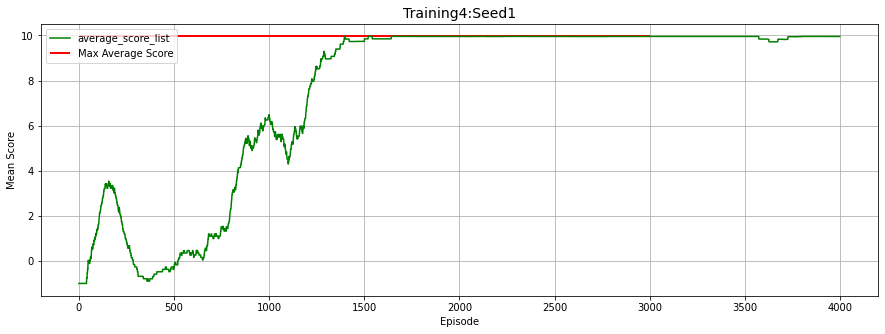

Brain Loaded for Training 4 in seed: 2
Episode 76	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 137
Score: [9.7246]
Episode 107	Average Score: -0.892748,	Average Step: 495.3843434343435Task solved in step: 388
Score: [9.222003]
Episode 134	Average Score: -0.790528,	Average Step: 494.27Task solved in step: 324
Score: [9.351801]
Episode 137	Average Score: -0.687010,	Average Step: 492.52Task solved in step: 452
Score: [9.094805]
Episode 149	Average Score: -0.586062,	Average Step: 492.05Task solved in step: 404
Score: [9.190204]
Episode 172	Average Score: -0.484160,	Average Step: 491.1Task solved in step: 381
Score: [9.236803]
Episode 173	Average Score: -0.381792,	Average Step: 489.92Task solved in step: 258
Score: [9.483799]
Episode 181	Average Score: -0.384200,	Average Step: 491.13Task solved in step: 141
Score: [9.716399]
Episode 182	Average Score: -0.277036,	Average Step: 487.55Task solved in step: 372
Score: [9.254003]
Episode 184	Average Score: -0.174496,	Average 

Episode 1289	Average Score: 2.906624,	Average Step: 395.87Task solved in step: 35
Score: [9.928]
Episode 1290	Average Score: 3.015904,	Average Step: 391.23Task solved in step: 210
Score: [9.5786]
Episode 1292	Average Score: 3.121690,	Average Step: 388.34Task solved in step: 59
Score: [9.881]
Episode 1294	Average Score: 3.230500,	Average Step: 383.94Task solved in step: 263
Score: [9.473]
Episode 1295	Average Score: 3.335229,	Average Step: 381.58Task solved in step: 497
Score: [9.004206]
Episode 1297	Average Score: 3.435272,	Average Step: 381.56Task solved in step: 47
Score: [9.9046]
Episode 1301	Average Score: 3.544318,	Average Step: 377.04Task solved in step: 362
Score: [9.274402]
Episode 1309	Average Score: 3.231482,	Average Step: 383.44Task solved in step: 87
Score: [9.8248005]
Episode 1311	Average Score: 3.131696,	Average Step: 383.33Task solved in step: 412
Score: [9.175803]
Episode 1312	Average Score: 3.127018,	Average Step: 385.67Task solved in step: 41
Score: [9.9164]
Episode 1

Episode 2497	Average Score: 4.294263,	Average Step: 302.11Task solved in step: 38
Score: [9.9236]
Episode 2498	Average Score: 4.403499,	Average Step: 297.5Task solved in step: 34
Score: [9.931]
Episode 2499	Average Score: 4.512809,	Average Step: 292.85Task solved in step: 24
Score: [9.95]
Episode 2500	Average Score: 4.514377,	Average Step: 292.06Task solved in step: 47
Score: [9.905]
Episode 2501	Average Score: 4.623427,	Average Step: 287.54Task solved in step: 150
Score: [9.6992]
Episode 2502	Average Score: 4.730419,	Average Step: 284.05Task solved in step: 177
Score: [9.6449995]
Episode 2503	Average Score: 4.836869,	Average Step: 280.83Task solved in step: 35
Score: [9.9298]
Episode 2504	Average Score: 4.946167,	Average Step: 276.19Task solved in step: 23
Score: [9.952]
Episode 2505	Average Score: 4.950598,	Average Step: 273.97Task solved in step: 26
Score: [9.946]
Episode 2506	Average Score: 4.950815,	Average Step: 273.86Task solved in step: 29
Score: [9.9418]
Episode 2507	Average S

Episode 2696	Average Score: 8.496417,	Average Step: 101.22Task solved in step: 21
Score: [9.9564]
Episode 2697	Average Score: 8.496464,	Average Step: 101.19Task solved in step: 18
Score: [9.9623995]
Episode 2698	Average Score: 8.497139,	Average Step: 100.85Task solved in step: 20
Score: [9.9596]
Episode 2699	Average Score: 8.497217,	Average Step: 100.81Task solved in step: 18
Score: [9.9623995]
Episode 2700	Average Score: 8.497324,	Average Step: 100.75Task solved in step: 21
Score: [9.9564]
Episode 2701	Average Score: 8.497454,	Average Step: 100.68Task solved in step: 19
Score: [9.9604]
Episode 2702	Average Score: 8.497479,	Average Step: 100.66Task solved in step: 242
Score: [9.5157995]
Episode 2703	Average Score: 8.493059,	Average Step: 102.87Task solved in step: 18
Score: [9.962]
Episode 2704	Average Score: 8.493101,	Average Step: 102.84Task solved in step: 22
Score: [9.9544]
Episode 2705	Average Score: 8.493067,	Average Step: 102.85Task solved in step: 18
Score: [9.962]
Episode 2706

Episode 2784	Average Score: 9.737103,	Average Step: 30.78Task solved in step: 18
Score: [9.962]
Episode 2785	Average Score: 9.737100,	Average Step: 30.78Task solved in step: 19
Score: [9.9618]
Episode 2786	Average Score: 9.737094,	Average Step: 30.79Task solved in step: 20
Score: [9.9588]
Episode 2787	Average Score: 9.737058,	Average Step: 30.81Task solved in step: 20
Score: [9.9598]
Episode 2788	Average Score: 9.737036,	Average Step: 30.83Task solved in step: 18
Score: [9.962]
Episode 2789	Average Score: 9.737060,	Average Step: 30.81Task solved in step: 19
Score: [9.9618]
Episode 2790	Average Score: 9.737054,	Average Step: 30.82Task solved in step: 18
Score: [9.962]
Episode 2791	Average Score: 9.737050,	Average Step: 30.82Task solved in step: 20
Score: [9.9584]
Episode 2792	Average Score: 9.737009,	Average Step: 30.84Task solved in step: 18
Score: [9.962]
Episode 2793	Average Score: 9.737005,	Average Step: 30.84Task solved in step: 19
Score: [9.9618]
Episode 2794	Average Score: 9.7370

Episode 2871	Average Score: 9.736828,	Average Step: 31.0Task solved in step: 18
Score: [9.962]
Episode 2872	Average Score: 9.736851,	Average Step: 30.98Task solved in step: 21
Score: [9.9572]
Episode 2873	Average Score: 9.736803,	Average Step: 31.01Task solved in step: 18
Score: [9.9623995]
Episode 2874	Average Score: 9.736832,	Average Step: 30.99Task solved in step: 18
Score: [9.9623995]
Episode 2875	Average Score: 9.736997,	Average Step: 30.9Task solved in step: 18
Score: [9.9623995]
Episode 2876	Average Score: 9.737001,	Average Step: 30.9Task solved in step: 18
Score: [9.9623995]
Episode 2877	Average Score: 9.737007,	Average Step: 30.89Task solved in step: 18
Score: [9.9623995]
Episode 2878	Average Score: 9.737056,	Average Step: 30.86Task solved in step: 18
Score: [9.9623995]
Episode 2879	Average Score: 9.737060,	Average Step: 30.86Task solved in step: 18
Score: [9.9623995]
Episode 2880	Average Score: 9.737065,	Average Step: 30.85Task solved in step: 27
Score: [9.9448]
Episode 2881	

Episode 2957	Average Score: 9.726363,	Average Step: 36.13Task solved in step: 21
Score: [9.9572]
Episode 2958	Average Score: 9.726363,	Average Step: 36.13Task solved in step: 18
Score: [9.962]
Episode 2959	Average Score: 9.726363,	Average Step: 36.13Task solved in step: 21
Score: [9.9572]
Episode 2960	Average Score: 9.726363,	Average Step: 36.13Task solved in step: 18
Score: [9.9622]
Episode 2961	Average Score: 9.726366,	Average Step: 36.13Task solved in step: 18
Score: [9.9622]
Episode 2962	Average Score: 9.726416,	Average Step: 36.1Task solved in step: 23
Score: [9.9538]
Episode 2963	Average Score: 9.726335,	Average Step: 36.15Task solved in step: 18
Score: [9.9622]
Episode 2964	Average Score: 9.726384,	Average Step: 36.12Task solved in step: 22
Score: [9.9558]
Episode 2965	Average Score: 9.726322,	Average Step: 36.16Task solved in step: 23
Score: [9.9538]
Episode 2966	Average Score: 9.726288,	Average Step: 36.18Task solved in step: 20
Score: [9.9596]
Episode 2967	Average Score: 9.72

Episode 3047	Average Score: 9.389006,	Average Step: 54.89Task solved in step: 22
Score: [9.9554]
Episode 3048	Average Score: 9.388935,	Average Step: 54.93Task solved in step: 18
Score: [9.9623995]
Episode 3049	Average Score: 9.388935,	Average Step: 54.93Task solved in step: 32
Score: [9.9348]
Episode 3050	Average Score: 9.388659,	Average Step: 55.07Task solved in step: 34
Score: [9.93]
Episode 3051	Average Score: 9.388433,	Average Step: 55.18Task solved in step: 24
Score: [9.9514]
Episode 3052	Average Score: 9.388396,	Average Step: 55.2Task solved in step: 18
Score: [9.9623995]
Episode 3053	Average Score: 9.388726,	Average Step: 55.03Task solved in step: 28
Score: [9.943601]
Episode 3054	Average Score: 9.388538,	Average Step: 55.13Task solved in step: 24
Score: [9.9508]
Episode 3055	Average Score: 9.388471,	Average Step: 55.16Task solved in step: 25
Score: [9.948999]
Episode 3056	Average Score: 9.390410,	Average Step: 54.19Task solved in step: 18
Score: [9.9623995]
Episode 3057	Average

Episode 3134	Average Score: 9.518867,	Average Step: 39.82Task solved in step: 21
Score: [9.9566]
Episode 3135	Average Score: 9.518810,	Average Step: 39.85Task solved in step: 18
Score: [9.962]
Episode 3136	Average Score: 9.518809,	Average Step: 39.85Task solved in step: 21
Score: [9.9572]
Episode 3137	Average Score: 9.518759,	Average Step: 39.88Task solved in step: 18
Score: [9.962]
Episode 3138	Average Score: 9.518756,	Average Step: 39.88Task solved in step: 18
Score: [9.962]
Episode 3139	Average Score: 9.518754,	Average Step: 39.88Task solved in step: 23
Score: [9.9536]
Episode 3140	Average Score: 9.518952,	Average Step: 39.78Task solved in step: 18
Score: [9.962]
Episode 3141	Average Score: 9.628572,	Average Step: 34.97Task solved in step: 21
Score: [9.9572]
Episode 3142	Average Score: 9.628572,	Average Step: 34.97Task solved in step: 18
Score: [9.962]
Episode 3143	Average Score: 9.628568,	Average Step: 34.97Task solved in step: 21
Score: [9.9572]
Episode 3144	Average Score: 9.62855

Episode 3305	Average Score: 9.959747,	Average Step: 19.4Task solved in step: 25
Score: [9.948999]
Episode 3306	Average Score: 9.959618,	Average Step: 19.47Task solved in step: 18
Score: [9.962]
Episode 3307	Average Score: 9.959665,	Average Step: 19.44Task solved in step: 21
Score: [9.9572]
Episode 3308	Average Score: 9.959618,	Average Step: 19.47Task solved in step: 18
Score: [9.962]
Episode 3309	Average Score: 9.959665,	Average Step: 19.44Task solved in step: 21
Score: [9.9572]
Episode 3310	Average Score: 9.959618,	Average Step: 19.47Task solved in step: 18
Score: [9.962]
Episode 3311	Average Score: 9.959665,	Average Step: 19.44Task solved in step: 20
Score: [9.9596]
Episode 3312	Average Score: 9.959641,	Average Step: 19.46Task solved in step: 18
Score: [9.962]
Episode 3313	Average Score: 9.959689,	Average Step: 19.43Task solved in step: 21
Score: [9.9572]
Episode 3314	Average Score: 9.959641,	Average Step: 19.46Task solved in step: 18
Score: [9.9622]
Episode 3315	Average Score: 9.959

Episode 3478	Average Score: 9.737590,	Average Step: 30.55Task solved in step: 18
Score: [9.9623995]
Episode 3479	Average Score: 9.737592,	Average Step: 30.55Task solved in step: 18
Score: [9.9623995]
Episode 3480	Average Score: 9.737594,	Average Step: 30.55Task solved in step: 18
Score: [9.9623995]
Episode 3481	Average Score: 9.737596,	Average Step: 30.55Task solved in step: 18
Score: [9.962]
Episode 3482	Average Score: 9.737594,	Average Step: 30.55Task solved in step: 19
Score: [9.9618]
Episode 3483	Average Score: 9.737590,	Average Step: 30.56Task solved in step: 22
Score: [9.9554]
Episode 3484	Average Score: 9.737579,	Average Step: 30.57Task solved in step: 18
Score: [9.962]
Episode 3485	Average Score: 9.847199,	Average Step: 25.76Task solved in step: 24
Score: [9.9512]
Episode 3486	Average Score: 9.847115,	Average Step: 25.8Task solved in step: 18
Score: [9.962]
Episode 3487	Average Score: 9.847115,	Average Step: 25.8Task solved in step: 19
Score: [9.9618]
Episode 3488	Average Score

Episode 3565	Average Score: 9.850644,	Average Step: 23.99Task solved in step: 18
Score: [9.9623995]
Episode 3566	Average Score: 9.850648,	Average Step: 23.99Task solved in step: 18
Score: [9.9623995]
Episode 3567	Average Score: 9.850858,	Average Step: 23.88Task solved in step: 18
Score: [9.9623995]
Episode 3568	Average Score: 9.850992,	Average Step: 23.81Task solved in step: 18
Score: [9.9622]
Episode 3569	Average Score: 9.850994,	Average Step: 23.81Task solved in step: 21
Score: [9.9566]
Episode 3570	Average Score: 9.851005,	Average Step: 23.8Task solved in step: 18
Score: [9.9622]
Episode 3571	Average Score: 9.851007,	Average Step: 23.8Task solved in step: 18
Score: [9.962]
Episode 3572	Average Score: 9.851008,	Average Step: 23.79Task solved in step: 19
Score: [9.9618]
Episode 3573	Average Score: 9.851006,	Average Step: 23.8Task solved in step: 18
Score: [9.962]
Episode 3574	Average Score: 9.851007,	Average Step: 23.79Task solved in step: 19
Score: [9.9618]
Episode 3575	Average Score

Episode 3649	Average Score: 9.960584,	Average Step: 18.93Task solved in step: 22
Score: [9.955601]
Episode 3650	Average Score: 9.960624,	Average Step: 18.91Task solved in step: 18
Score: [9.962]
Episode 3651	Average Score: 9.960622,	Average Step: 18.91Task solved in step: 22
Score: [9.955601]
Episode 3652	Average Score: 9.960557,	Average Step: 18.95Task solved in step: 18
Score: [9.962]
Episode 3653	Average Score: 9.960554,	Average Step: 18.95Task solved in step: 22
Score: [9.955601]
Episode 3654	Average Score: 9.960488,	Average Step: 18.99Task solved in step: 18
Score: [9.9623995]
Episode 3655	Average Score: 9.960490,	Average Step: 18.99Task solved in step: 18
Score: [9.9623995]
Episode 3656	Average Score: 9.960632,	Average Step: 18.92Task solved in step: 18
Score: [9.9623995]
Episode 3657	Average Score: 9.960632,	Average Step: 18.92Task solved in step: 18
Score: [9.9623995]
Episode 3658	Average Score: 9.960632,	Average Step: 18.92Task solved in step: 18
Score: [9.9623995]
Episode 365

Episode 3733	Average Score: 9.959170,	Average Step: 19.68Task solved in step: 18
Score: [9.9623995]
Episode 3734	Average Score: 9.959269,	Average Step: 19.63Task solved in step: 18
Score: [9.9623995]
Episode 3735	Average Score: 9.959270,	Average Step: 19.63Task solved in step: 18
Score: [9.9623995]
Episode 3736	Average Score: 9.959272,	Average Step: 19.63Task solved in step: 18
Score: [9.9622]
Episode 3737	Average Score: 9.959274,	Average Step: 19.63Task solved in step: 18
Score: [9.9622]
Episode 3738	Average Score: 9.959391,	Average Step: 19.57Task solved in step: 18
Score: [9.9622]
Episode 3739	Average Score: 9.959393,	Average Step: 19.57Task solved in step: 18
Score: [9.9623995]
Episode 3740	Average Score: 9.959511,	Average Step: 19.51Task solved in step: 18
Score: [9.9623995]
Episode 3741	Average Score: 9.959515,	Average Step: 19.51Task solved in step: 18
Score: [9.9623995]
Episode 3742	Average Score: 9.959633,	Average Step: 19.45Task solved in step: 18
Score: [9.962]
Episode 3743	

Episode 3818	Average Score: 9.956837,	Average Step: 20.75Task solved in step: 18
Score: [9.962]
Episode 3819	Average Score: 9.956873,	Average Step: 20.73Task solved in step: 20
Score: [9.9584]
Episode 3820	Average Score: 9.956833,	Average Step: 20.75Task solved in step: 18
Score: [9.962]
Episode 3821	Average Score: 9.956829,	Average Step: 20.75Task solved in step: 23
Score: [9.952]
Episode 3822	Average Score: 9.956781,	Average Step: 20.77Task solved in step: 23
Score: [9.952]
Episode 3823	Average Score: 9.956677,	Average Step: 20.82Task solved in step: 23
Score: [9.952]
Episode 3824	Average Score: 9.956574,	Average Step: 20.87Task solved in step: 22
Score: [9.9554]
Episode 3825	Average Score: 9.956566,	Average Step: 20.88Task solved in step: 18
Score: [9.962]
Episode 3826	Average Score: 9.956561,	Average Step: 20.88Task solved in step: 21
Score: [9.9564]
Episode 3827	Average Score: 9.956506,	Average Step: 20.91Task solved in step: 18
Score: [9.962]
Episode 3828	Average Score: 9.956668,

Episode 3986	Average Score: 9.844936,	Average Step: 26.83Task solved in step: 22
Score: [9.954801]
Episode 3987	Average Score: 9.844860,	Average Step: 26.87Task solved in step: 18
Score: [9.9622]
Episode 3988	Average Score: 9.844858,	Average Step: 26.87Task solved in step: 18
Score: [9.962]
Episode 3989	Average Score: 9.844853,	Average Step: 26.87Task solved in step: 22
Score: [9.954801]
Episode 3990	Average Score: 9.844777,	Average Step: 26.91Task solved in step: 18
Score: [9.9622]
Episode 3991	Average Score: 9.844776,	Average Step: 26.91Task solved in step: 18
Score: [9.962]
Episode 3992	Average Score: 9.844771,	Average Step: 26.91Task solved in step: 22
Score: [9.954801]
Episode 3993	Average Score: 9.844695,	Average Step: 26.95Task solved in step: 18
Score: [9.962]
Episode 3994	Average Score: 9.844691,	Average Step: 26.95Task solved in step: 22
Score: [9.954801]
Episode 3995	Average Score: 9.844615,	Average Step: 26.99Task solved in step: 18
Score: [9.962]
Episode 3996	Average Score

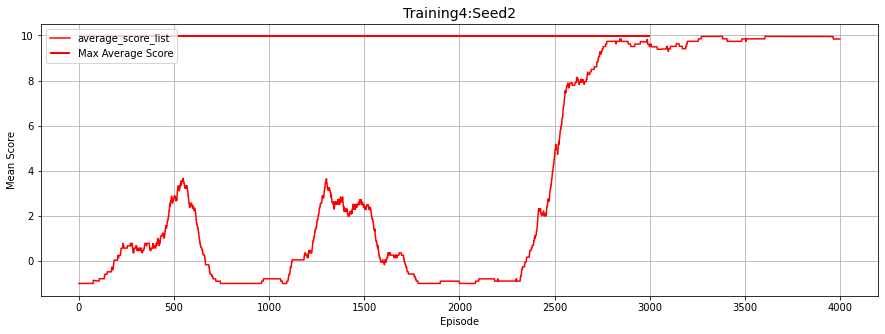

Brain Loaded for Training 4 in seed: 3
Episode 60	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 414
Score: [9.1704035]
Episode 67	Average Score: -0.848197,	Average Step: 497.73134328358217Task solved in step: 445
Score: [9.108805]
Episode 68	Average Score: -0.701771,	Average Step: 496.95588235294116Task solved in step: 191
Score: [9.6162]
Episode 70	Average Score: -0.558631,	Average Step: 492.6142857142857Task solved in step: 336
Score: [9.327602]
Episode 73	Average Score: -0.435296,	Average Step: 490.64383561643837Task solved in step: 481
Score: [9.037805]
Episode 76	Average Score: -0.325510,	Average Step: 490.73684210526327Task solved in step: 374
Score: [9.250402]
Episode 78	Average Score: -0.211389,	Average Step: 489.34615384615387Task solved in step: 156
Score: [9.687799]
Episode 81	Average Score: -0.108649,	Average Step: 485.4691358024691Task solved in step: 221
Score: [9.5568]
Episode 83	Average Score: -0.002937,	Average Step: 482.4457831325301Task solved in 

Episode 842	Average Score: 2.077292,	Average Step: 410.5Task solved in step: 101
Score: [9.796801]
Episode 843	Average Score: 2.185260,	Average Step: 406.52Task solved in step: 100
Score: [9.7994]
Episode 845	Average Score: 2.191414,	Average Step: 403.45Task solved in step: 50
Score: [9.898]
Episode 846	Average Score: 2.300394,	Average Step: 398.96Task solved in step: 41
Score: [9.9166]
Episode 847	Average Score: 2.409560,	Average Step: 394.38Task solved in step: 105
Score: [9.7894]
Episode 848	Average Score: 2.416296,	Average Step: 391.01Task solved in step: 35
Score: [9.9292]
Episode 849	Average Score: 2.525588,	Average Step: 386.37Task solved in step: 53
Score: [9.8924]
Episode 850	Average Score: 2.634512,	Average Step: 381.91Task solved in step: 90
Score: [9.819799]
Episode 853	Average Score: 2.633308,	Average Step: 382.52Task solved in step: 102
Score: [9.794]
Episode 854	Average Score: 2.741248,	Average Step: 378.55Task solved in step: 65
Score: [9.8696]
Episode 856	Average Score

Episode 1020	Average Score: 4.450046,	Average Step: 324.23Task solved in step: 20
Score: [9.9596]
Episode 1021	Average Score: 4.559641,	Average Step: 319.44Task solved in step: 20
Score: [9.9596]
Episode 1023	Average Score: 4.452541,	Average Step: 322.99Task solved in step: 22
Score: [9.9546]
Episode 1024	Average Score: 4.562087,	Average Step: 318.22Task solved in step: 22
Score: [9.9546]
Episode 1025	Average Score: 4.671633,	Average Step: 313.45Task solved in step: 22
Score: [9.9546]
Episode 1027	Average Score: 4.676023,	Average Step: 311.25Task solved in step: 61
Score: [9.877601]
Episode 1028	Average Score: 4.679537,	Average Step: 309.5Task solved in step: 18
Score: [9.9623995]
Episode 1029	Average Score: 4.688927,	Average Step: 304.8Task solved in step: 18
Score: [9.9623995]
Episode 1030	Average Score: 4.798551,	Average Step: 299.99Task solved in step: 20
Score: [9.9596]
Episode 1031	Average Score: 4.801255,	Average Step: 298.64Task solved in step: 20
Score: [9.9584]
Episode 1032	A

Episode 1110	Average Score: 9.150352,	Average Step: 74.27Task solved in step: 21
Score: [9.957]
Episode 1111	Average Score: 9.152449,	Average Step: 73.22Task solved in step: 21
Score: [9.957]
Episode 1112	Average Score: 9.152422,	Average Step: 73.23Task solved in step: 21
Score: [9.957]
Episode 1113	Average Score: 9.152422,	Average Step: 73.23Task solved in step: 21
Score: [9.957]
Episode 1114	Average Score: 9.152475,	Average Step: 73.2Task solved in step: 43
Score: [9.913401]
Episode 1115	Average Score: 9.152134,	Average Step: 73.37Task solved in step: 65
Score: [9.8686]
Episode 1116	Average Score: 9.151344,	Average Step: 73.76Task solved in step: 73
Score: [9.8534]
Episode 1117	Average Score: 9.259878,	Average Step: 69.5Task solved in step: 243
Score: [9.512199]
Episode 1118	Average Score: 9.259171,	Average Step: 69.85Task solved in step: 31
Score: [9.937799]
Episode 1119	Average Score: 9.259753,	Average Step: 69.56Task solved in step: 26
Score: [9.9462]
Episode 1120	Average Score: 9

Episode 1196	Average Score: 9.685229,	Average Step: 56.71Task solved in step: 38
Score: [9.9232]
Episode 1197	Average Score: 9.685760,	Average Step: 56.45Task solved in step: 115
Score: [9.769799]
Episode 1198	Average Score: 9.691438,	Average Step: 53.62Task solved in step: 39
Score: [9.9214]
Episode 1199	Average Score: 9.691332,	Average Step: 53.68Task solved in step: 34
Score: [9.93]
Episode 1200	Average Score: 9.691265,	Average Step: 53.71Task solved in step: 34
Score: [9.93]
Episode 1201	Average Score: 9.691411,	Average Step: 53.63Task solved in step: 46
Score: [9.9074]
Episode 1202	Average Score: 9.698956,	Average Step: 49.86Task solved in step: 24
Score: [9.951799]
Episode 1203	Average Score: 9.699018,	Average Step: 49.83Task solved in step: 24
Score: [9.951799]
Episode 1204	Average Score: 9.808536,	Average Step: 45.08Task solved in step: 30
Score: [9.9382]
Episode 1205	Average Score: 9.809171,	Average Step: 44.76Task solved in step: 25
Score: [9.9488]
Episode 1206	Average Score:

Episode 1281	Average Score: 9.928747,	Average Step: 35.11Task solved in step: 24
Score: [9.951799]
Episode 1282	Average Score: 9.928800,	Average Step: 35.09Task solved in step: 26
Score: [9.9474]
Episode 1283	Average Score: 9.928807,	Average Step: 35.09Task solved in step: 21
Score: [9.9572]
Episode 1284	Average Score: 9.928914,	Average Step: 35.04Task solved in step: 24
Score: [9.951799]
Episode 1285	Average Score: 9.929285,	Average Step: 34.86Task solved in step: 24
Score: [9.951799]
Episode 1286	Average Score: 9.929338,	Average Step: 34.84Task solved in step: 24
Score: [9.951799]
Episode 1287	Average Score: 9.929310,	Average Step: 34.86Task solved in step: 24
Score: [9.951799]
Episode 1288	Average Score: 9.929281,	Average Step: 34.88Task solved in step: 34
Score: [9.93]
Episode 1289	Average Score: 9.929061,	Average Step: 34.99Task solved in step: 34
Score: [9.93]
Episode 1290	Average Score: 9.929073,	Average Step: 34.98Task solved in step: 31
Score: [9.937799]
Episode 1291	Average S

Episode 1367	Average Score: 9.834614,	Average Step: 32.07Task solved in step: 18
Score: [9.9623995]
Episode 1368	Average Score: 9.834614,	Average Step: 32.07Task solved in step: 18
Score: [9.9623995]
Episode 1369	Average Score: 9.834938,	Average Step: 31.91Task solved in step: 18
Score: [9.9623995]
Episode 1370	Average Score: 9.835262,	Average Step: 31.75Task solved in step: 18
Score: [9.9623995]
Episode 1371	Average Score: 9.835587,	Average Step: 31.59Task solved in step: 18
Score: [9.9623995]
Episode 1372	Average Score: 9.835937,	Average Step: 31.41Task solved in step: 18
Score: [9.9623995]
Episode 1373	Average Score: 9.835964,	Average Step: 31.39Task solved in step: 18
Score: [9.9623995]
Episode 1374	Average Score: 9.835993,	Average Step: 31.37Task solved in step: 18
Score: [9.9623995]
Episode 1375	Average Score: 9.836020,	Average Step: 31.35Task solved in step: 18
Score: [9.9623995]
Episode 1376	Average Score: 9.836048,	Average Step: 31.33Task solved in step: 18
Score: [9.9623995]


Episode 1452	Average Score: 9.726151,	Average Step: 36.24Task solved in step: 18
Score: [9.9623995]
Episode 1453	Average Score: 9.835774,	Average Step: 31.43Task solved in step: 18
Score: [9.9623995]
Episode 1454	Average Score: 9.836074,	Average Step: 31.28Task solved in step: 24
Score: [9.9516]
Episode 1455	Average Score: 9.835967,	Average Step: 31.34Task solved in step: 24
Score: [9.9516]
Episode 1456	Average Score: 9.835858,	Average Step: 31.4Task solved in step: 18
Score: [9.9623995]
Episode 1457	Average Score: 9.835925,	Average Step: 31.36Task solved in step: 18
Score: [9.9623995]
Episode 1458	Average Score: 9.835952,	Average Step: 31.34Task solved in step: 18
Score: [9.9623995]
Episode 1459	Average Score: 9.835980,	Average Step: 31.32Task solved in step: 20
Score: [9.958]
Episode 1460	Average Score: 9.835937,	Average Step: 31.34Task solved in step: 35
Score: [9.9284]
Episode 1461	Average Score: 9.835596,	Average Step: 31.51Task solved in step: 23
Score: [9.952]
Episode 1463	Avera

Episode 1537	Average Score: 9.738271,	Average Step: 30.12Task solved in step: 20
Score: [9.9598]
Episode 1538	Average Score: 9.738244,	Average Step: 30.14Task solved in step: 18
Score: [9.9623995]
Episode 1539	Average Score: 9.738245,	Average Step: 30.14Task solved in step: 18
Score: [9.9623995]
Episode 1540	Average Score: 9.738244,	Average Step: 30.14Task solved in step: 18
Score: [9.9623995]
Episode 1541	Average Score: 9.738244,	Average Step: 30.14Task solved in step: 18
Score: [9.9623995]
Episode 1542	Average Score: 9.738245,	Average Step: 30.14Task solved in step: 18
Score: [9.9623995]
Episode 1543	Average Score: 9.738245,	Average Step: 30.14Task solved in step: 18
Score: [9.9623995]
Episode 1544	Average Score: 9.738245,	Average Step: 30.14Task solved in step: 18
Score: [9.9623995]
Episode 1545	Average Score: 9.738245,	Average Step: 30.14Task solved in step: 18
Score: [9.9623995]
Episode 1546	Average Score: 9.738245,	Average Step: 30.14Task solved in step: 18
Score: [9.9623995]
Epi

Episode 1621	Average Score: 9.957380,	Average Step: 20.54Task solved in step: 18
Score: [9.9623995]
Episode 1622	Average Score: 9.957380,	Average Step: 20.54Task solved in step: 18
Score: [9.9623995]
Episode 1623	Average Score: 9.957380,	Average Step: 20.54Task solved in step: 18
Score: [9.9623995]
Episode 1624	Average Score: 9.957380,	Average Step: 20.54Task solved in step: 18
Score: [9.9623995]
Episode 1625	Average Score: 9.957380,	Average Step: 20.54Task solved in step: 20
Score: [9.9584]
Episode 1626	Average Score: 9.957340,	Average Step: 20.56Task solved in step: 18
Score: [9.9623995]
Episode 1627	Average Score: 9.957340,	Average Step: 20.56Task solved in step: 34
Score: [9.9314]
Episode 1628	Average Score: 9.957030,	Average Step: 20.72Task solved in step: 29
Score: [9.940001]
Episode 1629	Average Score: 9.956998,	Average Step: 20.73Task solved in step: 18
Score: [9.9623995]
Episode 1630	Average Score: 9.957026,	Average Step: 20.71Task solved in step: 18
Score: [9.9623995]
Episode

Episode 1704	Average Score: 9.961193,	Average Step: 18.63Task solved in step: 18
Score: [9.9623995]
Episode 1705	Average Score: 9.961288,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 1706	Average Score: 9.961288,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 1707	Average Score: 9.961287,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 1708	Average Score: 9.961288,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 1709	Average Score: 9.961288,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 1710	Average Score: 9.961289,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 1711	Average Score: 9.961288,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 1712	Average Score: 9.961288,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]
Episode 1713	Average Score: 9.961288,	Average Step: 18.58Task solved in step: 18
Score: [9.9623995]


Episode 1868	Average Score: 9.958137,	Average Step: 20.19Task solved in step: 18
Score: [9.9623995]
Episode 1869	Average Score: 9.958190,	Average Step: 20.16Task solved in step: 18
Score: [9.9623995]
Episode 1870	Average Score: 9.958190,	Average Step: 20.16Task solved in step: 18
Score: [9.9623995]
Episode 1871	Average Score: 9.958190,	Average Step: 20.16Task solved in step: 18
Score: [9.9623995]
Episode 1872	Average Score: 9.958191,	Average Step: 20.16Task solved in step: 18
Score: [9.9623995]
Episode 1873	Average Score: 9.958190,	Average Step: 20.16Task solved in step: 20
Score: [9.9598]
Episode 1874	Average Score: 9.958219,	Average Step: 20.15Task solved in step: 18
Score: [9.9623995]
Episode 1875	Average Score: 9.958546,	Average Step: 19.98Task solved in step: 18
Score: [9.9623995]
Episode 1876	Average Score: 9.958547,	Average Step: 19.98Task solved in step: 18
Score: [9.9623995]
Episode 1877	Average Score: 9.958546,	Average Step: 19.98Task solved in step: 18
Score: [9.9623995]
Epi

Episode 1951	Average Score: 9.954571,	Average Step: 21.98Task solved in step: 18
Score: [9.9623995]
Episode 1952	Average Score: 9.954571,	Average Step: 21.98Task solved in step: 18
Score: [9.9623995]
Episode 1953	Average Score: 9.954571,	Average Step: 21.98Task solved in step: 18
Score: [9.9623995]
Episode 1954	Average Score: 9.954571,	Average Step: 21.98Task solved in step: 18
Score: [9.9623995]
Episode 1955	Average Score: 9.954571,	Average Step: 21.98Task solved in step: 18
Score: [9.9623995]
Episode 1956	Average Score: 9.954571,	Average Step: 21.98Task solved in step: 18
Score: [9.9623995]
Episode 1957	Average Score: 9.954571,	Average Step: 21.98Task solved in step: 18
Score: [9.9623995]
Episode 1958	Average Score: 9.954640,	Average Step: 21.94Task solved in step: 18
Score: [9.9623995]
Episode 1959	Average Score: 9.954640,	Average Step: 21.94Task solved in step: 18
Score: [9.9623995]
Episode 1960	Average Score: 9.954640,	Average Step: 21.94Task solved in step: 18
Score: [9.9623995]


Episode 2033	Average Score: 9.961903,	Average Step: 18.27Task solved in step: 18
Score: [9.9623995]
Episode 2034	Average Score: 9.961903,	Average Step: 18.27Task solved in step: 18
Score: [9.9623995]
Episode 2035	Average Score: 9.961903,	Average Step: 18.27Task solved in step: 21
Score: [9.9574]
Episode 2036	Average Score: 9.961852,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2037	Average Score: 9.961852,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2038	Average Score: 9.961852,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2039	Average Score: 9.961852,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2040	Average Score: 9.961852,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2041	Average Score: 9.961852,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 2042	Average Score: 9.961852,	Average Step: 18.3Task solved in step: 18
Score: [9.9623995]
Episode 20

Episode 2117	Average Score: 9.960953,	Average Step: 18.74Task solved in step: 18
Score: [9.9623995]
Episode 2118	Average Score: 9.960953,	Average Step: 18.74Task solved in step: 18
Score: [9.9623995]
Episode 2119	Average Score: 9.960952,	Average Step: 18.74Task solved in step: 18
Score: [9.9623995]
Episode 2120	Average Score: 9.960952,	Average Step: 18.74Task solved in step: 18
Score: [9.9623995]
Episode 2121	Average Score: 9.960953,	Average Step: 18.74Task solved in step: 18
Score: [9.9623995]
Episode 2122	Average Score: 9.961033,	Average Step: 18.7Task solved in step: 18
Score: [9.9623995]
Episode 2123	Average Score: 9.961033,	Average Step: 18.7Task solved in step: 18
Score: [9.9623995]
Episode 2124	Average Score: 9.961033,	Average Step: 18.7Task solved in step: 18
Score: [9.9623995]
Episode 2125	Average Score: 9.961033,	Average Step: 18.7Task solved in step: 18
Score: [9.9623995]
Episode 2126	Average Score: 9.961033,	Average Step: 18.7Task solved in step: 18
Score: [9.9623995]
Episo

Episode 2281	Average Score: 9.961224,	Average Step: 18.63Task solved in step: 23
Score: [9.9534]
Episode 2282	Average Score: 9.961228,	Average Step: 18.63Task solved in step: 20
Score: [9.9582]
Episode 2283	Average Score: 9.961205,	Average Step: 18.64Task solved in step: 23
Score: [9.9534]
Episode 2284	Average Score: 9.961115,	Average Step: 18.69Task solved in step: 18
Score: [9.962]
Episode 2285	Average Score: 9.961110,	Average Step: 18.69Task solved in step: 18
Score: [9.9623995]
Episode 2286	Average Score: 9.961110,	Average Step: 18.69Task solved in step: 18
Score: [9.9623995]
Episode 2287	Average Score: 9.961110,	Average Step: 18.69Task solved in step: 18
Score: [9.9623995]
Episode 2288	Average Score: 9.961110,	Average Step: 18.69Task solved in step: 18
Score: [9.9623995]
Episode 2289	Average Score: 9.961161,	Average Step: 18.66Task solved in step: 18
Score: [9.9623995]
Episode 2290	Average Score: 9.961161,	Average Step: 18.66Task solved in step: 18
Score: [9.9623995]
Episode 2291	

Episode 2365	Average Score: 9.956825,	Average Step: 20.94Task solved in step: 18
Score: [9.9623995]
Episode 2366	Average Score: 9.956825,	Average Step: 20.94Task solved in step: 18
Score: [9.9623995]
Episode 2367	Average Score: 9.956825,	Average Step: 20.94Task solved in step: 47
Score: [9.9044]
Episode 2368	Average Score: 9.956245,	Average Step: 21.23Task solved in step: 27
Score: [9.9456005]
Episode 2369	Average Score: 9.956077,	Average Step: 21.32Task solved in step: 27
Score: [9.9456005]
Episode 2370	Average Score: 9.956077,	Average Step: 21.32Task solved in step: 27
Score: [9.9456005]
Episode 2371	Average Score: 9.955999,	Average Step: 21.36Task solved in step: 34
Score: [9.9318]
Episode 2372	Average Score: 9.955783,	Average Step: 21.47Task solved in step: 32
Score: [9.9358]
Episode 2373	Average Score: 9.955607,	Average Step: 21.56Task solved in step: 25
Score: [9.9486]
Episode 2374	Average Score: 9.955559,	Average Step: 21.58Task solved in step: 24
Score: [9.95]
Episode 2376	Aver

Episode 2451	Average Score: 9.823337,	Average Step: 37.78Task solved in step: 22
Score: [9.954201]
Episode 2452	Average Score: 9.823255,	Average Step: 37.82Task solved in step: 22
Score: [9.954201]
Episode 2453	Average Score: 9.823174,	Average Step: 37.86Task solved in step: 25
Score: [9.9494]
Episode 2454	Average Score: 9.823055,	Average Step: 37.92Task solved in step: 18
Score: [9.9623995]
Episode 2455	Average Score: 9.823055,	Average Step: 37.92Task solved in step: 21
Score: [9.9574]
Episode 2456	Average Score: 9.823094,	Average Step: 37.9Task solved in step: 28
Score: [9.9426]
Episode 2457	Average Score: 9.823065,	Average Step: 37.91Task solved in step: 22
Score: [9.955]
Episode 2458	Average Score: 9.823871,	Average Step: 37.51Task solved in step: 58
Score: [9.8828]
Episode 2459	Average Score: 9.823419,	Average Step: 37.74Task solved in step: 22
Score: [9.955]
Episode 2460	Average Score: 9.823435,	Average Step: 37.73Task solved in step: 22
Score: [9.955]
Episode 2461	Average Score:

Episode 2537	Average Score: 9.831875,	Average Step: 33.48Task solved in step: 18
Score: [9.9623995]
Episode 2538	Average Score: 9.832510,	Average Step: 33.16Task solved in step: 24
Score: [9.9508]
Episode 2539	Average Score: 9.832653,	Average Step: 33.09Task solved in step: 24
Score: [9.9508]
Episode 2540	Average Score: 9.833767,	Average Step: 32.53Task solved in step: 24
Score: [9.9508]
Episode 2541	Average Score: 9.833795,	Average Step: 32.52Task solved in step: 24
Score: [9.9508]
Episode 2542	Average Score: 9.833753,	Average Step: 32.54Task solved in step: 140
Score: [9.719]
Episode 2543	Average Score: 9.831576,	Average Step: 33.63Task solved in step: 24
Score: [9.9508]
Episode 2544	Average Score: 9.831598,	Average Step: 33.62Task solved in step: 22
Score: [9.954201]
Episode 2545	Average Score: 9.831757,	Average Step: 33.54Task solved in step: 23
Score: [9.952999]
Episode 2546	Average Score: 9.831808,	Average Step: 33.51Task solved in step: 39
Score: [9.9204]
Episode 2547	Average Sc

Episode 2709	Average Score: 9.622069,	Average Step: 38.24Task solved in step: 18
Score: [9.9623995]
Episode 2710	Average Score: 9.622069,	Average Step: 38.24Task solved in step: 18
Score: [9.9623995]
Episode 2711	Average Score: 9.622069,	Average Step: 38.24Task solved in step: 18
Score: [9.9623995]
Episode 2712	Average Score: 9.622069,	Average Step: 38.24Task solved in step: 18
Score: [9.9623995]
Episode 2713	Average Score: 9.622117,	Average Step: 38.21Task solved in step: 18
Score: [9.9623995]
Episode 2714	Average Score: 9.622117,	Average Step: 38.21Task solved in step: 21
Score: [9.9572]
Episode 2715	Average Score: 9.622065,	Average Step: 38.24Task solved in step: 18
Score: [9.9623995]
Episode 2716	Average Score: 9.622065,	Average Step: 38.24Task solved in step: 18
Score: [9.9623995]
Episode 2717	Average Score: 9.622327,	Average Step: 38.11Task solved in step: 18
Score: [9.9623995]
Episode 2718	Average Score: 9.624643,	Average Step: 36.95Task solved in step: 18
Score: [9.9623995]
Epi

Episode 2792	Average Score: 9.956779,	Average Step: 20.85Task solved in step: 18
Score: [9.9623995]
Episode 2793	Average Score: 9.956780,	Average Step: 20.85Task solved in step: 18
Score: [9.9623995]
Episode 2794	Average Score: 9.956779,	Average Step: 20.85Task solved in step: 18
Score: [9.9623995]
Episode 2795	Average Score: 9.956780,	Average Step: 20.85Task solved in step: 18
Score: [9.9623995]
Episode 2796	Average Score: 9.956780,	Average Step: 20.85Task solved in step: 21
Score: [9.9572]
Episode 2797	Average Score: 9.956729,	Average Step: 20.88Task solved in step: 18
Score: [9.9623995]
Episode 2798	Average Score: 9.956729,	Average Step: 20.88Task solved in step: 18
Score: [9.9623995]
Episode 2799	Average Score: 9.956729,	Average Step: 20.88Task solved in step: 19
Score: [9.9606]
Episode 2800	Average Score: 9.956710,	Average Step: 20.89Task solved in step: 18
Score: [9.9623995]
Episode 2801	Average Score: 9.956710,	Average Step: 20.89Task solved in step: 18
Score: [9.9623995]
Episod

Episode 2956	Average Score: 9.960109,	Average Step: 19.19Task solved in step: 18
Score: [9.9623995]
Episode 2957	Average Score: 9.960163,	Average Step: 19.16Task solved in step: 18
Score: [9.9623995]
Episode 2958	Average Score: 9.960162,	Average Step: 19.16Task solved in step: 18
Score: [9.9623995]
Episode 2959	Average Score: 9.960200,	Average Step: 19.14Task solved in step: 18
Score: [9.9623995]
Episode 2960	Average Score: 9.960213,	Average Step: 19.13Task solved in step: 18
Score: [9.9623995]
Episode 2961	Average Score: 9.960311,	Average Step: 19.08Task solved in step: 18
Score: [9.9623995]
Episode 2962	Average Score: 9.960310,	Average Step: 19.08Task solved in step: 20
Score: [9.9584]
Episode 2963	Average Score: 9.960270,	Average Step: 19.1Task solved in step: 18
Score: [9.9623995]
Episode 2964	Average Score: 9.960270,	Average Step: 19.1Task solved in step: 18
Score: [9.9623995]
Episode 2965	Average Score: 9.960270,	Average Step: 19.1Task solved in step: 18
Score: [9.9623995]
Episod

Episode 3040	Average Score: 9.956832,	Average Step: 20.8Task solved in step: 18
Score: [9.9623995]
Episode 3041	Average Score: 9.956832,	Average Step: 20.8Task solved in step: 38
Score: [9.922]
Episode 3042	Average Score: 9.956440,	Average Step: 20.99Task solved in step: 23
Score: [9.953199]
Episode 3043	Average Score: 9.956627,	Average Step: 20.9Task solved in step: 18
Score: [9.9623995]
Episode 3044	Average Score: 9.956627,	Average Step: 20.9Task solved in step: 25
Score: [9.948999]
Episode 3045	Average Score: 9.956492,	Average Step: 20.97Task solved in step: 18
Score: [9.9623995]
Episode 3046	Average Score: 9.956492,	Average Step: 20.97Task solved in step: 18
Score: [9.9623995]
Episode 3047	Average Score: 9.956492,	Average Step: 20.97Task solved in step: 18
Score: [9.9623995]
Episode 3048	Average Score: 9.956492,	Average Step: 20.97Task solved in step: 18
Score: [9.9623995]
Episode 3049	Average Score: 9.956492,	Average Step: 20.97Task solved in step: 18
Score: [9.9623995]
Episode 30

Episode 3206	Average Score: 9.961744,	Average Step: 18.35Task solved in step: 18
Score: [9.9623995]
Episode 3207	Average Score: 9.961744,	Average Step: 18.35Task solved in step: 18
Score: [9.9623995]
Episode 3208	Average Score: 9.961744,	Average Step: 18.35Task solved in step: 18
Score: [9.9623995]
Episode 3209	Average Score: 9.961747,	Average Step: 18.35Task solved in step: 18
Score: [9.9623995]
Episode 3210	Average Score: 9.961747,	Average Step: 18.35Task solved in step: 18
Score: [9.9623995]
Episode 3211	Average Score: 9.961804,	Average Step: 18.32Task solved in step: 18
Score: [9.9623995]
Episode 3212	Average Score: 9.961804,	Average Step: 18.32Task solved in step: 18
Score: [9.9623995]
Episode 3213	Average Score: 9.961804,	Average Step: 18.32Task solved in step: 18
Score: [9.9623995]
Episode 3214	Average Score: 9.961804,	Average Step: 18.32Task solved in step: 18
Score: [9.9623995]
Episode 3215	Average Score: 9.961804,	Average Step: 18.32Task solved in step: 21
Score: [9.957601]
E

Episode 3372	Average Score: 9.953597,	Average Step: 22.45Task solved in step: 18
Score: [9.9623995]
Episode 3373	Average Score: 9.953597,	Average Step: 22.45Task solved in step: 18
Score: [9.9623995]
Episode 3374	Average Score: 9.953597,	Average Step: 22.45Task solved in step: 18
Score: [9.9623995]
Episode 3375	Average Score: 9.953597,	Average Step: 22.45Task solved in step: 18
Score: [9.9623995]
Episode 3376	Average Score: 9.953597,	Average Step: 22.45Task solved in step: 18
Score: [9.9623995]
Episode 3377	Average Score: 9.953597,	Average Step: 22.45Task solved in step: 18
Score: [9.9623995]
Episode 3378	Average Score: 9.953597,	Average Step: 22.45Task solved in step: 18
Score: [9.9623995]
Episode 3379	Average Score: 9.953597,	Average Step: 22.45Task solved in step: 18
Score: [9.9623995]
Episode 3380	Average Score: 9.953597,	Average Step: 22.45Task solved in step: 18
Score: [9.9623995]
Episode 3381	Average Score: 9.953597,	Average Step: 22.45Task solved in step: 18
Score: [9.9623995]


Episode 3456	Average Score: 9.961784,	Average Step: 18.33Task solved in step: 18
Score: [9.9623995]
Episode 3457	Average Score: 9.961784,	Average Step: 18.33Task solved in step: 21
Score: [9.9574]
Episode 3458	Average Score: 9.961735,	Average Step: 18.36Task solved in step: 18
Score: [9.9623995]
Episode 3459	Average Score: 9.961735,	Average Step: 18.36Task solved in step: 18
Score: [9.9623995]
Episode 3460	Average Score: 9.961735,	Average Step: 18.36Task solved in step: 19
Score: [9.9606]
Episode 3461	Average Score: 9.961717,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episode 3462	Average Score: 9.961717,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episode 3463	Average Score: 9.961717,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episode 3464	Average Score: 9.961717,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episode 3465	Average Score: 9.961717,	Average Step: 18.37Task solved in step: 18
Score: [9.9623995]
Episod

Episode 3622	Average Score: 9.961071,	Average Step: 18.69Task solved in step: 18
Score: [9.9623995]
Episode 3623	Average Score: 9.961071,	Average Step: 18.69Task solved in step: 18
Score: [9.9623995]
Episode 3624	Average Score: 9.961071,	Average Step: 18.69Task solved in step: 18
Score: [9.9623995]
Episode 3625	Average Score: 9.961071,	Average Step: 18.69Task solved in step: 18
Score: [9.9623995]
Episode 3626	Average Score: 9.961071,	Average Step: 18.69Task solved in step: 18
Score: [9.9623995]
Episode 3627	Average Score: 9.961095,	Average Step: 18.68Task solved in step: 18
Score: [9.9623995]
Episode 3628	Average Score: 9.961095,	Average Step: 18.68Task solved in step: 18
Score: [9.9623995]
Episode 3629	Average Score: 9.961095,	Average Step: 18.68Task solved in step: 18
Score: [9.9623995]
Episode 3630	Average Score: 9.961228,	Average Step: 18.61Task solved in step: 18
Score: [9.9623995]
Episode 3631	Average Score: 9.961228,	Average Step: 18.61Task solved in step: 18
Score: [9.9623995]


Episode 3787	Average Score: 9.960623,	Average Step: 18.91Task solved in step: 24
Score: [9.9506]
Episode 3788	Average Score: 9.960505,	Average Step: 18.97Task solved in step: 20
Score: [9.9598]
Episode 3789	Average Score: 9.960479,	Average Step: 18.99Task solved in step: 18
Score: [9.9623995]
Episode 3790	Average Score: 9.960479,	Average Step: 18.99Task solved in step: 18
Score: [9.9623995]
Episode 3791	Average Score: 9.960479,	Average Step: 18.99Task solved in step: 18
Score: [9.9623995]
Episode 3792	Average Score: 9.960479,	Average Step: 18.99Task solved in step: 18
Score: [9.9623995]
Episode 3793	Average Score: 9.960479,	Average Step: 18.99Task solved in step: 18
Score: [9.9623995]
Episode 3794	Average Score: 9.960479,	Average Step: 18.99Task solved in step: 18
Score: [9.9623995]
Episode 3795	Average Score: 9.960479,	Average Step: 18.99Task solved in step: 18
Score: [9.9623995]
Episode 3796	Average Score: 9.960572,	Average Step: 18.94Task solved in step: 18
Score: [9.9623995]
Episod

Episode 3870	Average Score: 9.960156,	Average Step: 19.23Task solved in step: 20
Score: [9.9596]
Episode 3871	Average Score: 9.960128,	Average Step: 19.25Task solved in step: 18
Score: [9.9623995]
Episode 3872	Average Score: 9.960128,	Average Step: 19.25Task solved in step: 21
Score: [9.9578]
Episode 3873	Average Score: 9.960082,	Average Step: 19.28Task solved in step: 18
Score: [9.9623995]
Episode 3874	Average Score: 9.960082,	Average Step: 19.28Task solved in step: 18
Score: [9.9623995]
Episode 3875	Average Score: 9.960083,	Average Step: 19.28Task solved in step: 18
Score: [9.9623995]
Episode 3876	Average Score: 9.960082,	Average Step: 19.28Task solved in step: 18
Score: [9.9623995]
Episode 3877	Average Score: 9.960083,	Average Step: 19.28Task solved in step: 18
Score: [9.9623995]
Episode 3878	Average Score: 9.960082,	Average Step: 19.28Task solved in step: 18
Score: [9.9623995]
Episode 3879	Average Score: 9.960083,	Average Step: 19.28Task solved in step: 18
Score: [9.9623995]
Episod

Episode 3954	Average Score: 9.955527,	Average Step: 21.67Task solved in step: 20
Score: [9.9598]
Episode 3955	Average Score: 9.955502,	Average Step: 21.69Task solved in step: 20
Score: [9.9598]
Episode 3956	Average Score: 9.955476,	Average Step: 21.71Task solved in step: 22
Score: [9.954201]
Episode 3957	Average Score: 9.955394,	Average Step: 21.75Task solved in step: 20
Score: [9.9598]
Episode 3958	Average Score: 9.955394,	Average Step: 21.75Task solved in step: 20
Score: [9.9598]
Episode 3959	Average Score: 9.955368,	Average Step: 21.77Task solved in step: 20
Score: [9.9596]
Episode 3960	Average Score: 9.955340,	Average Step: 21.79Task solved in step: 23
Score: [9.952]
Episode 3961	Average Score: 9.955236,	Average Step: 21.84Task solved in step: 18
Score: [9.9623995]
Episode 3962	Average Score: 9.956130,	Average Step: 21.39Task solved in step: 20
Score: [9.9598]
Episode 3963	Average Score: 9.956104,	Average Step: 21.41Task solved in step: 20
Score: [9.9598]
Episode 3964	Average Score

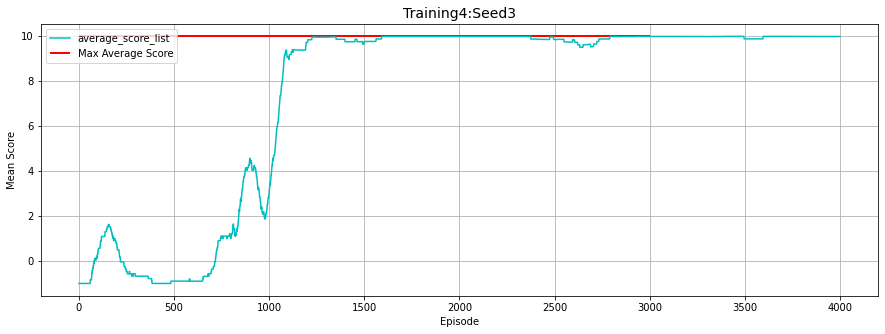

Brain Saved for Training 4 in seed 4
Episode 56	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 413
Score: [9.172403]
Episode 58	Average Score: -0.824608,	Average Step: 497.51724137931035Task solved in step: 303
Score: [9.392001]
Episode 80	Average Score: -0.742939,	Average Step: 495.47537974683546Task solved in step: 448
Score: [9.102005]
Episode 81	Average Score: -0.621397,	Average Step: 494.8888888888889Task solved in step: 301
Score: [9.3978]
Episode 82	Average Score: -0.499211,	Average Step: 492.5243902439024Task solved in step: 184
Score: [9.63]
Episode 87	Average Score: -0.405808,	Average Step: 489.2758620689655Task solved in step: 35
Score: [9.9298]
Episode 88	Average Score: -0.288358,	Average Step: 484.1136363636364Task solved in step: 297
Score: [9.405]
Episode 89	Average Score: -0.179444,	Average Step: 482.0112359550562Task solved in step: 227
Score: [9.5442]
Episode 92	Average Score: -0.091590,	Average Step: 479.60869565217394Task solved in step: 499
Score

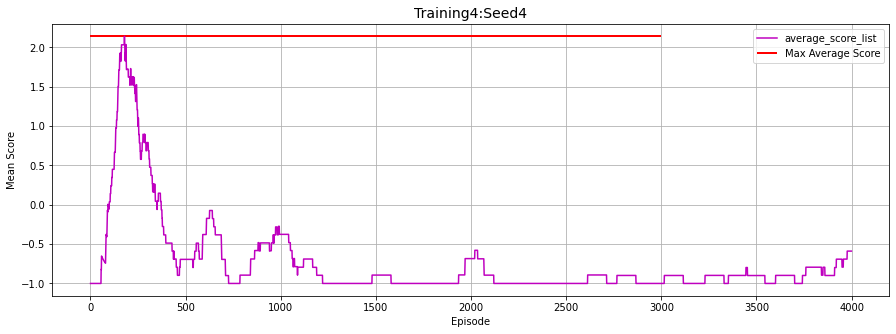

CPU times: user 3h 37min 13s, sys: 16h 48min 33s, total: 20h 25min 46s
Wall time: 6h 23min 31s


In [24]:
%%time

seed_number=5

for seed in range(seed_number):
    

                
    #Logged values


    scores = []
    step=[] 
    average_score_list=[]                                           #Saves last 100 average scores
    average_step_list=[]   
    scores_window = deque(maxlen=100)                               # Saves last 100 avarage solved steps
    step_window = deque(maxlen=100)                                 # last 100 scores

    #Hyperparamaters:

    n_episodes=4000
    max_t=500
    eps_start=1.0
    eps=eps_start
    eps_end=0.01 
    eps_decay=0.995


    #Call DQN function
    agent = DQN_Agent(state_size, action_size, seed=seed)
     
    #Load weights:    
    if seed == 0:
        print("Brain Loaded for Training 4 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train3_Seed0.pth'))
    if seed == 1:
        print("Brain Loaded for Training 4 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train3_Seed1.pth'))
    if seed == 2:
        print("Brain Loaded for Training 4 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train3_Seed2.pth'))
    if seed == 3:
        print("Brain Loaded for Training 4 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train3_Seed3.pth'))
    if seed == 4:
        print("Brain Saved for Training 4 in seed",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train3_Seed4.pth'))


    env.reset()
    for episode in range(1,n_episodes+1):

        done=False
        #Reset environment for each episode:
        env.reset()
        #Get information from reset environment:
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        # get initial state of the unity environment
        state = decision_steps.obs[0]
        #Score list containing scores from each episode:
        score = 0
        mean_score=[]
        for i in range(max_t):


            action = agent.act(state, eps)        #action as numpy.int64
            action_fixed=np.array([[action]])
            action_tuple = ActionTuple()
            action_tuple.add_discrete(action_fixed)

            #Set action information
            env.set_actions(behavior_name,action_tuple)
            # Move the simulation forward
            env.step()
            # Get the new simulation results
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            # get the next states for each unity agent in the environment
            next_state = decision_steps.obs[0]

            # get the rewards for each unity agent in the environment
            rewards = decision_steps.reward

            #If episode dones:
            if(len(terminal_steps.reward)!=0):

                        done= True
                        rewards= terminal_steps.reward
                        next_state = terminal_steps.obs[0]




            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent.step(state, action, rewards, next_state,done)

            #New state is the next state:
            state = next_state

            #Iterate rewards on score
            score += rewards


            if rewards > 0:
                print("Task solved in step:",i)
                print("Score:",score)


            if done:

                break


        #Decrease epsilon parameter step by step:
        eps = max(eps_end, eps_decay*eps) 

        #Save last step
        step.append(i)
        # save last steps for window for average 100:        
        step_window.append(i)
        #Create list for avarge 100 scores
        average_step_list.append(np.mean(step_window))

        # save most recent score:
        scores.append(score)
        # save most recent score for window for average 100:        
        scores_window.append(score)  
        #Create list for avarge 100 scores
        average_score_list.append(np.mean(scores_window))



        print('\rEpisode {}\tAverage Score: {:.6f},\tAverage Step: {}'.format(episode, np.mean(scores_window),np.mean(step_window)), end="")
       
       
        if episode % 1000 == 0:
    
            if seed == 0:
                print("Brain Saved for Training 4 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train4_Seed0.pth')
            if seed == 1:
                print("Brain Saved for Training 4 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train4_Seed1.pth')
            if seed == 2:
                print("Brain Saved for Training 4 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train4_Seed2.pth')
            if seed == 3:
                print("Brain Saved for Training 4 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train4_Seed3.pth')

            if seed == 4:
                print("Brain Saved for Training 4 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train4_Seed4.pth')
                
                
                

    #Save datas per each seed
    score_shape=len(scores)
    df= pd.DataFrame(list(zip(np.array(scores).reshape(score_shape).tolist(), average_score_list, step,average_step_list)), columns= ['Scores','Mean_Scores','Completed_Steps','MeanCompleted_Steps'])
    df.to_csv('Train_4_Seed_'+str(seed)+'.csv')
    
    #Plot mean reward:
    color=["b","g","r","c","m"]
    plt.rcParams['figure.figsize'] = [15,5]
    plt.plot(np.arange(len(average_score_list)), average_score_list,label="average_score_list",color=color[seed])
    plt.hlines(y=max(average_score_list), xmin=0, xmax=3000, colors='red', linestyles='-', lw=2, label='Max Average Score')
    plt.xlabel('Episode', fontsize=10)
    plt.ylabel('Mean Score', fontsize=10)
    plt.title("Training4:Seed{}".format(seed),fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("Training4:Seed{}.png".format(seed))
    plt.show()
    
    





# 5-) Fifth training:Default Door

In [25]:
env.close()

In [26]:
default_file="HER_3_no.app"
alternative_file="HER_3_no_alternate.app"
default_logged="HER_3_no_log.app"
channel = EngineConfigurationChannel()
env = UnityEnvironment(file_name=default_file,worker_id=0,side_channels=[channel])
channel.set_configuration_parameters(time_scale = 100.0)
# get the behavior:
env.reset()
behavior_name = list(env.behavior_specs)[0]
print(behavior_name)
spec = env.behavior_specs[behavior_name]
# reset the environment
env.reset()
decision_steps, terminal_steps = env.get_steps(behavior_name)

for action, branch_size in enumerate(spec.action_spec.discrete_branches):
    print(f"Action number {action} has {branch_size} different options")
    
action_size=branch_size    
print('Number of actions:', action_size)

# examine the state space 
state=decision_steps.obs[0][0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print('States have length:', type(state))
env.reset()

HERTask_2?team=0
Action number 0 has 5 different options
Number of actions: 5
States look like: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.46935856 0.         1.
 0.         0.         0.         0.         0.         0.52897596
 0.         1.         0.         0.         0.         0.
 0.         0.52897596 0.         1.         0.         0.
 0.         0.         0.         0.7077888  0.         1.
 0.        

Brain Loaded for Training 5 in seed: 0
Episode 60	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 440
Score: [9.119004]
Episode 68	Average Score: -0.851185,	Average Step: 498.13235294117646Task solved in step: 404
Score: [9.190804]
Episode 81	Average Score: -0.749256,	Average Step: 497.09876543209885Task solved in step: 255
Score: [9.4897995]
Episode 122	Average Score: -0.691998,	Average Step: 495.0279797979817Task solved in step: 209
Score: [9.58]
Episode 134	Average Score: -0.586198,	Average Step: 492.12Task solved in step: 403
Score: [9.192403]
Episode 439	Average Score: -0.999994,	Average Step: 499.04Task solved in step: 183
Score: [9.6322]
Episode 474	Average Score: -0.893672,	Average Step: 495.84Task solved in step: 453
Score: [9.092205]
Episode 484	Average Score: -0.792750,	Average Step: 495.38Task solved in step: 454
Score: [9.091405]
Episode 523	Average Score: -0.691836,	Average Step: 494.93Task solved in step: 495
Score: [9.008006]
Episode 536	Average Score:

Episode 2809	Average Score: 0.467537,	Average Step: 465.3Task solved in step: 42
Score: [9.914801]
Episode 2810	Average Score: 0.473829,	Average Step: 462.15Task solved in step: 315
Score: [9.369201]
Episode 2811	Average Score: 0.577521,	Average Step: 460.31Task solved in step: 397
Score: [9.205203]
Episode 2812	Average Score: 0.679573,	Average Step: 459.29Task solved in step: 246
Score: [9.5062]
Episode 2817	Average Score: 0.678053,	Average Step: 460.05Task solved in step: 46
Score: [9.9062]
Episode 2819	Average Score: 0.787115,	Average Step: 455.52Task solved in step: 316
Score: [9.366401]
Episode 2820	Average Score: 0.890779,	Average Step: 453.69Task solved in step: 426
Score: [9.147404]
Episode 2953	Average Score: -0.999994,	Average Step: 499.07Task solved in step: 345
Score: [9.309602]
Episode 2991	Average Score: -0.896898,	Average Step: 497.46Task solved in step: 453
Score: [9.0932045]
Episode 2992	Average Score: -0.795966,	Average Step: 497.0Task solved in step: 24
Score: [9.95]

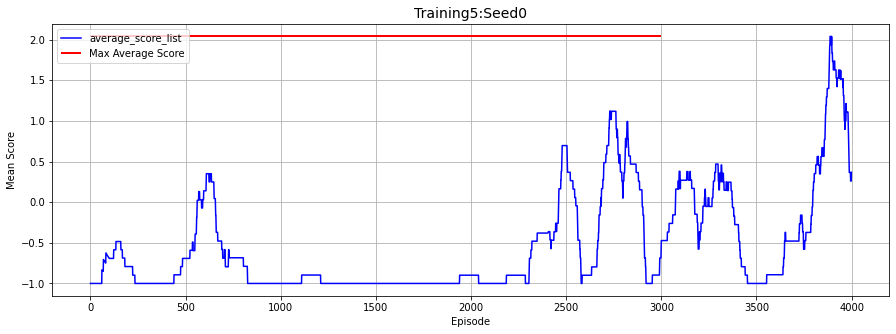

Brain Loaded for Training 5 in seed: 1
Episode 22	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 222
Score: [9.5546]
Episode 23	Average Score: -0.541099,	Average Step: 486.95652173913044Task solved in step: 385
Score: [9.229202]
Episode 42	Average Score: -0.505142,	Average Step: 489.69047619047625Task solved in step: 341
Score: [9.316202]
Episode 44	Average Score: -0.293176,	Average Step: 486.52272727272725Task solved in step: 254
Score: [9.490999]
Episode 45	Average Score: -0.075750,	Average Step: 481.35555555555555Task solved in step: 443
Score: [9.113804]
Episode 58	Average Score: -0.108533,	Average Step: 484.34482758620696Task solved in step: 385
Score: [9.229802]
Episode 75	Average Score: -0.174200,	Average Step: 486.14666666666665Task solved in step: 480
Score: [9.038405]
Episode 78	Average Score: -0.077264,	Average Step: 486.39743589743593Task solved in step: 386
Score: [9.227603]
Episode 79	Average Score: 0.040519,	Average Step: 485.126582278481Task solved in

Episode 368	Average Score: 8.050182,	Average Step: 174.27Task solved in step: 54
Score: [9.8908]
Episode 369	Average Score: 8.049823,	Average Step: 174.45Task solved in step: 75
Score: [9.8486]
Episode 370	Average Score: 8.049023,	Average Step: 174.85Task solved in step: 38
Score: [9.922]
Episode 371	Average Score: 8.051960,	Average Step: 173.38Task solved in step: 43
Score: [9.913601]
Episode 372	Average Score: 8.053367,	Average Step: 172.68Task solved in step: 78
Score: [9.842]
Episode 373	Average Score: 8.161786,	Average Step: 168.47Task solved in step: 33
Score: [9.9322]
Episode 374	Average Score: 8.271109,	Average Step: 163.81Task solved in step: 32
Score: [9.9346]
Episode 375	Average Score: 8.274775,	Average Step: 161.98Task solved in step: 27
Score: [9.944]
Episode 376	Average Score: 8.276970,	Average Step: 160.88Task solved in step: 367
Score: [9.265403]
Episode 377	Average Score: 8.273518,	Average Step: 162.61Task solved in step: 29
Score: [9.940001]
Episode 378	Average Score:

Episode 546	Average Score: 9.318985,	Average Step: 89.89Task solved in step: 276
Score: [9.4466]
Episode 547	Average Score: 9.314807,	Average Step: 91.98Task solved in step: 23
Score: [9.9522]
Episode 548	Average Score: 9.315817,	Average Step: 91.47Task solved in step: 226
Score: [9.547799]
Episode 549	Average Score: 9.311765,	Average Step: 93.5Task solved in step: 26
Score: [9.9466]
Episode 551	Average Score: 9.205564,	Average Step: 96.59Task solved in step: 116
Score: [9.7674]
Episode 552	Average Score: 9.206064,	Average Step: 96.34Task solved in step: 31
Score: [9.936999]
Episode 553	Average Score: 9.213254,	Average Step: 92.75Task solved in step: 87
Score: [9.8246]
Episode 554	Average Score: 9.321500,	Average Step: 88.63Task solved in step: 36
Score: [9.926001]
Episode 555	Average Score: 9.322285,	Average Step: 88.23Task solved in step: 317
Score: [9.365001]
Episode 556	Average Score: 9.317102,	Average Step: 90.82Task solved in step: 21
Score: [9.957601]
Episode 557	Average Score: 

Episode 724	Average Score: 9.083652,	Average Step: 107.61Task solved in step: 21
Score: [9.957601]
Episode 725	Average Score: 9.084213,	Average Step: 107.33Task solved in step: 21
Score: [9.957601]
Episode 726	Average Score: 9.084269,	Average Step: 107.31Task solved in step: 28
Score: [9.943]
Episode 727	Average Score: 9.085930,	Average Step: 106.48Task solved in step: 28
Score: [9.943]
Episode 728	Average Score: 9.088988,	Average Step: 104.95Task solved in step: 40
Score: [9.9182005]
Episode 729	Average Score: 9.089585,	Average Step: 104.65Task solved in step: 78
Score: [9.8426]
Episode 730	Average Score: 9.088569,	Average Step: 105.16Task solved in step: 100
Score: [9.799]
Episode 731	Average Score: 9.087385,	Average Step: 105.75Task solved in step: 20
Score: [9.9582]
Episode 732	Average Score: 9.087543,	Average Step: 105.67Task solved in step: 26
Score: [9.9476]
Episode 733	Average Score: 9.091520,	Average Step: 103.68Task solved in step: 28
Score: [9.943]
Episode 734	Average Score:

Episode 816	Average Score: 9.139350,	Average Step: 79.86Task solved in step: 429
Score: [9.140004]
Episode 817	Average Score: 9.131227,	Average Step: 83.92Task solved in step: 24
Score: [9.950399]
Episode 818	Average Score: 9.131154,	Average Step: 83.95Task solved in step: 23
Score: [9.9522]
Episode 819	Average Score: 9.131101,	Average Step: 83.97Task solved in step: 23
Score: [9.9522]
Episode 820	Average Score: 9.131209,	Average Step: 83.91Task solved in step: 27
Score: [9.9456005]
Episode 821	Average Score: 9.131257,	Average Step: 83.89Task solved in step: 23
Score: [9.9522]
Episode 822	Average Score: 9.131359,	Average Step: 83.84Task solved in step: 39
Score: [9.9208]
Episode 823	Average Score: 9.133697,	Average Step: 82.67Task solved in step: 92
Score: [9.8154]
Episode 825	Average Score: 9.022723,	Average Step: 88.15Task solved in step: 152
Score: [9.6952]
Episode 826	Average Score: 9.020099,	Average Step: 89.46Task solved in step: 318
Score: [9.363801]
Episode 827	Average Score: 9

Episode 989	Average Score: 9.946796,	Average Step: 26.08Task solved in step: 24
Score: [9.950399]
Episode 990	Average Score: 9.946718,	Average Step: 26.12Task solved in step: 25
Score: [9.9488]
Episode 991	Average Score: 9.946625,	Average Step: 26.17Task solved in step: 30
Score: [9.9386]
Episode 992	Average Score: 9.946434,	Average Step: 26.26Task solved in step: 22
Score: [9.955]
Episode 993	Average Score: 9.946408,	Average Step: 26.27Task solved in step: 22
Score: [9.955]
Episode 994	Average Score: 9.946383,	Average Step: 26.28Task solved in step: 24
Score: [9.950399]
Episode 995	Average Score: 9.946311,	Average Step: 26.31Task solved in step: 83
Score: [9.8334]
Episode 996	Average Score: 9.945069,	Average Step: 26.93Task solved in step: 26
Score: [9.9474]
Episode 997	Average Score: 9.944960,	Average Step: 26.99Task solved in step: 23
Score: [9.9524]
Episode 998	Average Score: 9.944901,	Average Step: 27.02Task solved in step: 23
Score: [9.9524]
Episode 999	Average Score: 9.944904,	A

Episode 1074	Average Score: 9.840253,	Average Step: 29.28Task solved in step: 22
Score: [9.954201]
Episode 1075	Average Score: 9.840219,	Average Step: 29.29Task solved in step: 22
Score: [9.955]
Episode 1076	Average Score: 9.840194,	Average Step: 29.3Task solved in step: 20
Score: [9.9582]
Episode 1077	Average Score: 9.840199,	Average Step: 29.29Task solved in step: 20
Score: [9.9582]
Episode 1078	Average Score: 9.840205,	Average Step: 29.28Task solved in step: 26
Score: [9.9468]
Episode 1079	Average Score: 9.840096,	Average Step: 29.33Task solved in step: 132
Score: [9.7346]
Episode 1080	Average Score: 9.837867,	Average Step: 30.44Task solved in step: 25
Score: [9.9488]
Episode 1081	Average Score: 9.838102,	Average Step: 30.32Task solved in step: 63
Score: [9.872801]
Episode 1082	Average Score: 9.837305,	Average Step: 30.72Task solved in step: 22
Score: [9.955]
Episode 1083	Average Score: 9.837273,	Average Step: 30.74Task solved in step: 21
Score: [9.957601]
Episode 1084	Average Score

Episode 1243	Average Score: 9.847134,	Average Step: 26.2Task solved in step: 64
Score: [9.870999]
Episode 1244	Average Score: 9.846334,	Average Step: 26.6Task solved in step: 380
Score: [9.238603]
Episode 1245	Average Score: 9.839254,	Average Step: 30.14Task solved in step: 21
Score: [9.9578]
Episode 1246	Average Score: 9.839255,	Average Step: 30.14Task solved in step: 21
Score: [9.9578]
Episode 1247	Average Score: 9.839231,	Average Step: 30.16Task solved in step: 21
Score: [9.9578]
Episode 1248	Average Score: 9.839231,	Average Step: 30.16Task solved in step: 21
Score: [9.9578]
Episode 1249	Average Score: 9.839232,	Average Step: 30.16Task solved in step: 21
Score: [9.9578]
Episode 1250	Average Score: 9.839232,	Average Step: 30.16Task solved in step: 21
Score: [9.9578]
Episode 1251	Average Score: 9.839442,	Average Step: 30.06Task solved in step: 21
Score: [9.9578]
Episode 1252	Average Score: 9.839442,	Average Step: 30.06Task solved in step: 21
Score: [9.9578]
Episode 1253	Average Score:

Episode 1414	Average Score: 9.831432,	Average Step: 34.12Task solved in step: 21
Score: [9.9574]
Episode 1415	Average Score: 9.831428,	Average Step: 34.12Task solved in step: 22
Score: [9.9554]
Episode 1416	Average Score: 9.831403,	Average Step: 34.13Task solved in step: 21
Score: [9.9578]
Episode 1417	Average Score: 9.831403,	Average Step: 34.13Task solved in step: 21
Score: [9.9578]
Episode 1418	Average Score: 9.831403,	Average Step: 34.13Task solved in step: 21
Score: [9.9578]
Episode 1419	Average Score: 9.831404,	Average Step: 34.13Task solved in step: 21
Score: [9.9578]
Episode 1420	Average Score: 9.831404,	Average Step: 34.13Task solved in step: 21
Score: [9.9574]
Episode 1421	Average Score: 9.831400,	Average Step: 34.13Task solved in step: 21
Score: [9.9578]
Episode 1422	Average Score: 9.831400,	Average Step: 34.13Task solved in step: 35
Score: [9.929]
Episode 1423	Average Score: 9.831112,	Average Step: 34.27Task solved in step: 21
Score: [9.9578]
Episode 1424	Average Score: 9.8

Episode 1500	Average Score: 9.841043,	Average Step: 29.28Task solved in step: 21
Score: [9.9578]
Episode 1501	Average Score: 9.841043,	Average Step: 29.28Task solved in step: 23
Score: [9.953199]
Episode 1502	Average Score: 9.840998,	Average Step: 29.3Task solved in step: 21
Score: [9.9578]
Episode 1503	Average Score: 9.840998,	Average Step: 29.3Task solved in step: 23
Score: [9.9524]
Episode 1504	Average Score: 9.840943,	Average Step: 29.32Task solved in step: 21
Score: [9.9578]
Episode 1505	Average Score: 9.840943,	Average Step: 29.32Task solved in step: 21
Score: [9.9578]
Episode 1506	Average Score: 9.840943,	Average Step: 29.32Task solved in step: 21
Score: [9.9578]
Episode 1507	Average Score: 9.840944,	Average Step: 29.32Task solved in step: 20
Score: [9.9594]
Episode 1508	Average Score: 9.840980,	Average Step: 29.3Task solved in step: 21
Score: [9.9578]
Episode 1509	Average Score: 9.840981,	Average Step: 29.3Task solved in step: 21
Score: [9.9578]
Episode 1510	Average Score: 9.84

Episode 1670	Average Score: 9.840744,	Average Step: 29.04Task solved in step: 24
Score: [9.9512]
Episode 1671	Average Score: 9.840677,	Average Step: 29.07Task solved in step: 27
Score: [9.9458]
Episode 1672	Average Score: 9.840558,	Average Step: 29.13Task solved in step: 27
Score: [9.9458]
Episode 1673	Average Score: 9.840477,	Average Step: 29.17Task solved in step: 24
Score: [9.9514]
Episode 1674	Average Score: 9.840414,	Average Step: 29.2Task solved in step: 23
Score: [9.9536]
Episode 1675	Average Score: 9.840372,	Average Step: 29.22Task solved in step: 24
Score: [9.95]
Episode 1676	Average Score: 9.840295,	Average Step: 29.25Task solved in step: 24
Score: [9.95]
Episode 1677	Average Score: 9.840217,	Average Step: 29.28Task solved in step: 23
Score: [9.9536]
Episode 1678	Average Score: 9.840237,	Average Step: 29.27Task solved in step: 24
Score: [9.95]
Episode 1679	Average Score: 9.840158,	Average Step: 29.3Task solved in step: 20
Score: [9.959]
Episode 1680	Average Score: 9.840170,	A

Episode 1838	Average Score: 9.954020,	Average Step: 22.43Task solved in step: 22
Score: [9.9554]
Episode 1839	Average Score: 9.954074,	Average Step: 22.41Task solved in step: 21
Score: [9.9566]
Episode 1840	Average Score: 9.954131,	Average Step: 22.38Task solved in step: 28
Score: [9.9438]
Episode 1841	Average Score: 9.954070,	Average Step: 22.42Task solved in step: 28
Score: [9.9438]
Episode 1842	Average Score: 9.954288,	Average Step: 22.32Task solved in step: 28
Score: [9.9438]
Episode 1843	Average Score: 9.954196,	Average Step: 22.37Task solved in step: 28
Score: [9.9438]
Episode 1844	Average Score: 9.954103,	Average Step: 22.42Task solved in step: 23
Score: [9.952999]
Episode 1845	Average Score: 9.954091,	Average Step: 22.43Task solved in step: 32
Score: [9.9356]
Episode 1846	Average Score: 9.954006,	Average Step: 22.48Task solved in step: 41
Score: [9.916201]
Episode 1847	Average Score: 9.953668,	Average Step: 22.65Task solved in step: 22
Score: [9.9554]
Episode 1848	Average Score

Episode 2011	Average Score: 9.948109,	Average Step: 25.49Task solved in step: 22
Score: [9.9554]
Episode 2012	Average Score: 9.948133,	Average Step: 25.48Task solved in step: 25
Score: [9.9494]
Episode 2013	Average Score: 9.948097,	Average Step: 25.5Task solved in step: 22
Score: [9.9554]
Episode 2014	Average Score: 9.948121,	Average Step: 25.49Task solved in step: 22
Score: [9.9552]
Episode 2015	Average Score: 9.948119,	Average Step: 25.49Task solved in step: 22
Score: [9.9544]
Episode 2016	Average Score: 9.948110,	Average Step: 25.49Task solved in step: 22
Score: [9.955601]
Episode 2017	Average Score: 9.948112,	Average Step: 25.49Task solved in step: 22
Score: [9.955601]
Episode 2018	Average Score: 9.948124,	Average Step: 25.49Task solved in step: 22
Score: [9.955601]
Episode 2019	Average Score: 9.948185,	Average Step: 25.46Task solved in step: 22
Score: [9.955601]
Episode 2020	Average Score: 9.948228,	Average Step: 25.44Task solved in step: 22
Score: [9.955601]
Episode 2021	Average 

Episode 2182	Average Score: 9.843697,	Average Step: 27.69Task solved in step: 22
Score: [9.9552]
Episode 2183	Average Score: 9.843735,	Average Step: 27.67Task solved in step: 22
Score: [9.9552]
Episode 2184	Average Score: 9.843772,	Average Step: 27.65Task solved in step: 24
Score: [9.9514]
Episode 2185	Average Score: 9.843772,	Average Step: 27.65Task solved in step: 24
Score: [9.9514]
Episode 2186	Average Score: 9.843773,	Average Step: 27.65Task solved in step: 27
Score: [9.9442005]
Episode 2187	Average Score: 9.843701,	Average Step: 27.68Task solved in step: 22
Score: [9.9552]
Episode 2188	Average Score: 9.843739,	Average Step: 27.66Task solved in step: 22
Score: [9.9552]
Episode 2189	Average Score: 9.843777,	Average Step: 27.64Task solved in step: 22
Score: [9.9552]
Episode 2190	Average Score: 9.843905,	Average Step: 27.58Task solved in step: 20
Score: [9.9594]
Episode 2191	Average Score: 9.843985,	Average Step: 27.54Task solved in step: 20
Score: [9.9594]
Episode 2192	Average Score:

Episode 2352	Average Score: 9.845035,	Average Step: 27.09Task solved in step: 23
Score: [9.952]
Episode 2353	Average Score: 9.845002,	Average Step: 27.1Task solved in step: 22
Score: [9.9558]
Episode 2354	Average Score: 9.845046,	Average Step: 27.08Task solved in step: 22
Score: [9.954201]
Episode 2355	Average Score: 9.845094,	Average Step: 27.05Task solved in step: 22
Score: [9.954201]
Episode 2356	Average Score: 9.845120,	Average Step: 27.03Task solved in step: 22
Score: [9.954201]
Episode 2357	Average Score: 9.954663,	Average Step: 22.26Task solved in step: 22
Score: [9.954201]
Episode 2358	Average Score: 9.954632,	Average Step: 22.27Task solved in step: 22
Score: [9.954201]
Episode 2359	Average Score: 9.954599,	Average Step: 22.28Task solved in step: 20
Score: [9.9594]
Episode 2360	Average Score: 9.954636,	Average Step: 22.26Task solved in step: 23
Score: [9.9526005]
Episode 2361	Average Score: 9.954602,	Average Step: 22.27Task solved in step: 22
Score: [9.9552]
Episode 2362	Averag

Episode 2523	Average Score: 9.736992,	Average Step: 31.22Task solved in step: 21
Score: [9.9578]
Episode 2524	Average Score: 9.736996,	Average Step: 31.22Task solved in step: 21
Score: [9.9578]
Episode 2525	Average Score: 9.737000,	Average Step: 31.22Task solved in step: 21
Score: [9.957]
Episode 2526	Average Score: 9.737047,	Average Step: 31.2Task solved in step: 21
Score: [9.9578]
Episode 2527	Average Score: 9.737065,	Average Step: 31.2Task solved in step: 21
Score: [9.9578]
Episode 2528	Average Score: 9.737083,	Average Step: 31.2Task solved in step: 21
Score: [9.9578]
Episode 2529	Average Score: 9.737089,	Average Step: 31.2Task solved in step: 21
Score: [9.9578]
Episode 2530	Average Score: 9.737096,	Average Step: 31.2Task solved in step: 22
Score: [9.9558]
Episode 2531	Average Score: 9.737095,	Average Step: 31.2Task solved in step: 21
Score: [9.9578]
Episode 2532	Average Score: 9.737116,	Average Step: 31.19Task solved in step: 21
Score: [9.9578]
Episode 2533	Average Score: 9.737136,

Episode 2691	Average Score: 9.956962,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 2692	Average Score: 9.956962,	Average Step: 21.31Task solved in step: 22
Score: [9.954]
Episode 2693	Average Score: 9.956923,	Average Step: 21.32Task solved in step: 21
Score: [9.9578]
Episode 2694	Average Score: 9.956923,	Average Step: 21.32Task solved in step: 21
Score: [9.9578]
Episode 2695	Average Score: 9.956923,	Average Step: 21.32Task solved in step: 21
Score: [9.9578]
Episode 2696	Average Score: 9.956923,	Average Step: 21.32Task solved in step: 22
Score: [9.9546]
Episode 2697	Average Score: 9.956891,	Average Step: 21.33Task solved in step: 21
Score: [9.9578]
Episode 2698	Average Score: 9.956891,	Average Step: 21.33Task solved in step: 19
Score: [9.9602]
Episode 2699	Average Score: 9.956915,	Average Step: 21.31Task solved in step: 21
Score: [9.957601]
Episode 2700	Average Score: 9.956927,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 2701	Average Score: 9

Episode 2859	Average Score: 9.957132,	Average Step: 21.27Task solved in step: 22
Score: [9.9546]
Episode 2860	Average Score: 9.957099,	Average Step: 21.28Task solved in step: 21
Score: [9.9578]
Episode 2861	Average Score: 9.957100,	Average Step: 21.28Task solved in step: 26
Score: [9.9474]
Episode 2862	Average Score: 9.956995,	Average Step: 21.33Task solved in step: 22
Score: [9.9546]
Episode 2863	Average Score: 9.957067,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2864	Average Score: 9.957067,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2865	Average Score: 9.957067,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2866	Average Score: 9.957067,	Average Step: 21.29Task solved in step: 21
Score: [9.9564]
Episode 2867	Average Score: 9.957054,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2868	Average Score: 9.957157,	Average Step: 21.24Task solved in step: 21
Score: [9.9578]
Episode 2869	Average Score: 9.

Episode 2945	Average Score: 9.847342,	Average Step: 26.0Task solved in step: 21
Score: [9.9578]
Episode 2946	Average Score: 9.847342,	Average Step: 26.0Task solved in step: 21
Score: [9.957601]
Episode 2947	Average Score: 9.847339,	Average Step: 26.0Task solved in step: 21
Score: [9.9578]
Episode 2948	Average Score: 9.847339,	Average Step: 26.0Task solved in step: 21
Score: [9.9578]
Episode 2949	Average Score: 9.847339,	Average Step: 26.0Task solved in step: 21
Score: [9.9578]
Episode 2950	Average Score: 9.847340,	Average Step: 26.0Task solved in step: 21
Score: [9.9578]
Episode 2951	Average Score: 9.847340,	Average Step: 26.0Task solved in step: 21
Score: [9.9578]
Episode 2952	Average Score: 9.847340,	Average Step: 26.0Task solved in step: 21
Score: [9.9578]
Episode 2953	Average Score: 9.847336,	Average Step: 26.01Task solved in step: 23
Score: [9.952]
Episode 2954	Average Score: 9.847278,	Average Step: 26.03Task solved in step: 21
Score: [9.957601]
Episode 2955	Average Score: 9.84727

Episode 3029	Average Score: 9.847618,	Average Step: 25.98Task solved in step: 21
Score: [9.957601]
Episode 3030	Average Score: 9.847616,	Average Step: 25.98Task solved in step: 21
Score: [9.957601]
Episode 3031	Average Score: 9.847614,	Average Step: 25.98Task solved in step: 21
Score: [9.957601]
Episode 3032	Average Score: 9.847612,	Average Step: 25.98Task solved in step: 21
Score: [9.957601]
Episode 3033	Average Score: 9.847610,	Average Step: 25.98Task solved in step: 21
Score: [9.957601]
Episode 3034	Average Score: 9.957187,	Average Step: 21.2Task solved in step: 22
Score: [9.9546]
Episode 3035	Average Score: 9.957154,	Average Step: 21.21Task solved in step: 21
Score: [9.9578]
Episode 3036	Average Score: 9.957155,	Average Step: 21.21Task solved in step: 22
Score: [9.9558]
Episode 3037	Average Score: 9.957135,	Average Step: 21.22Task solved in step: 21
Score: [9.9578]
Episode 3038	Average Score: 9.957188,	Average Step: 21.2Task solved in step: 22
Score: [9.9558]
Episode 3039	Average S

Episode 3197	Average Score: 9.956571,	Average Step: 21.53Task solved in step: 21
Score: [9.9578]
Episode 3198	Average Score: 9.956571,	Average Step: 21.53Task solved in step: 27
Score: [9.9456005]
Episode 3199	Average Score: 9.956449,	Average Step: 21.59Task solved in step: 21
Score: [9.9578]
Episode 3200	Average Score: 9.956449,	Average Step: 21.59Task solved in step: 21
Score: [9.9578]
Episode 3201	Average Score: 9.956450,	Average Step: 21.59Task solved in step: 21
Score: [9.9578]
Episode 3202	Average Score: 9.956534,	Average Step: 21.55Task solved in step: 21
Score: [9.9578]
Episode 3203	Average Score: 9.956536,	Average Step: 21.55Task solved in step: 21
Score: [9.9578]
Episode 3204	Average Score: 9.956537,	Average Step: 21.55Task solved in step: 21
Score: [9.9578]
Episode 3205	Average Score: 9.956536,	Average Step: 21.55Task solved in step: 21
Score: [9.9578]
Episode 3206	Average Score: 9.956537,	Average Step: 21.55Task solved in step: 22
Score: [9.954]
Episode 3207	Average Score: 

Episode 3367	Average Score: 9.846204,	Average Step: 26.67Task solved in step: 26
Score: [9.9468]
Episode 3368	Average Score: 9.846094,	Average Step: 26.72Task solved in step: 25
Score: [9.9494]
Episode 3369	Average Score: 9.846010,	Average Step: 26.76Task solved in step: 21
Score: [9.957601]
Episode 3370	Average Score: 9.846007,	Average Step: 26.76Task solved in step: 21
Score: [9.957601]
Episode 3371	Average Score: 9.846005,	Average Step: 26.76Task solved in step: 21
Score: [9.9578]
Episode 3372	Average Score: 9.846005,	Average Step: 26.76Task solved in step: 21
Score: [9.9578]
Episode 3373	Average Score: 9.846007,	Average Step: 26.76Task solved in step: 21
Score: [9.9578]
Episode 3374	Average Score: 9.846009,	Average Step: 26.76Task solved in step: 21
Score: [9.9578]
Episode 3375	Average Score: 9.846012,	Average Step: 26.76Task solved in step: 21
Score: [9.9578]
Episode 3376	Average Score: 9.846012,	Average Step: 26.76Task solved in step: 21
Score: [9.9578]
Episode 3377	Average Score

Episode 3535	Average Score: 9.957127,	Average Step: 21.25Task solved in step: 21
Score: [9.957601]
Episode 3536	Average Score: 9.957125,	Average Step: 21.25Task solved in step: 21
Score: [9.9578]
Episode 3537	Average Score: 9.957127,	Average Step: 21.25Task solved in step: 21
Score: [9.9578]
Episode 3538	Average Score: 9.957129,	Average Step: 21.25Task solved in step: 21
Score: [9.9578]
Episode 3539	Average Score: 9.957132,	Average Step: 21.25Task solved in step: 25
Score: [9.9496]
Episode 3540	Average Score: 9.957052,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 3541	Average Score: 9.957054,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 3542	Average Score: 9.957054,	Average Step: 21.29Task solved in step: 21
Score: [9.957601]
Episode 3543	Average Score: 9.957104,	Average Step: 21.27Task solved in step: 21
Score: [9.957601]
Episode 3544	Average Score: 9.957102,	Average Step: 21.27Task solved in step: 21
Score: [9.957601]
Episode 3545	Average S

Episode 3619	Average Score: 9.953189,	Average Step: 23.21Task solved in step: 21
Score: [9.9578]
Episode 3620	Average Score: 9.953192,	Average Step: 23.21Task solved in step: 21
Score: [9.9578]
Episode 3621	Average Score: 9.953194,	Average Step: 23.21Task solved in step: 22
Score: [9.9546]
Episode 3622	Average Score: 9.953161,	Average Step: 23.22Task solved in step: 21
Score: [9.9578]
Episode 3623	Average Score: 9.953161,	Average Step: 23.22Task solved in step: 21
Score: [9.9578]
Episode 3624	Average Score: 9.953161,	Average Step: 23.22Task solved in step: 21
Score: [9.9578]
Episode 3625	Average Score: 9.953161,	Average Step: 23.22Task solved in step: 21
Score: [9.957601]
Episode 3626	Average Score: 9.953161,	Average Step: 23.22Task solved in step: 21
Score: [9.957601]
Episode 3627	Average Score: 9.953160,	Average Step: 23.22Task solved in step: 21
Score: [9.957601]
Episode 3628	Average Score: 9.953160,	Average Step: 23.22Task solved in step: 21
Score: [9.957601]
Episode 3629	Average S

Episode 3703	Average Score: 9.956678,	Average Step: 21.45Task solved in step: 21
Score: [9.957601]
Episode 3704	Average Score: 9.956740,	Average Step: 21.42Task solved in step: 21
Score: [9.957601]
Episode 3705	Average Score: 9.956740,	Average Step: 21.42Task solved in step: 21
Score: [9.957601]
Episode 3706	Average Score: 9.956738,	Average Step: 21.42Task solved in step: 21
Score: [9.957601]
Episode 3707	Average Score: 9.956737,	Average Step: 21.42Task solved in step: 21
Score: [9.957601]
Episode 3708	Average Score: 9.956735,	Average Step: 21.42Task solved in step: 21
Score: [9.957601]
Episode 3709	Average Score: 9.956781,	Average Step: 21.4Task solved in step: 21
Score: [9.957601]
Episode 3710	Average Score: 9.956779,	Average Step: 21.4Task solved in step: 21
Score: [9.957601]
Episode 3711	Average Score: 9.956779,	Average Step: 21.4Task solved in step: 21
Score: [9.957601]
Episode 3712	Average Score: 9.956805,	Average Step: 21.39Task solved in step: 21
Score: [9.957601]
Episode 3713	

Episode 3787	Average Score: 9.956482,	Average Step: 21.51Task solved in step: 23
Score: [9.9536]
Episode 3788	Average Score: 9.956440,	Average Step: 21.53Task solved in step: 21
Score: [9.957601]
Episode 3789	Average Score: 9.956529,	Average Step: 21.49Task solved in step: 24
Score: [9.9506]
Episode 3790	Average Score: 9.956460,	Average Step: 21.52Task solved in step: 24
Score: [9.9506]
Episode 3791	Average Score: 9.956389,	Average Step: 21.55Task solved in step: 24
Score: [9.9506]
Episode 3792	Average Score: 9.956320,	Average Step: 21.58Task solved in step: 23
Score: [9.952]
Episode 3793	Average Score: 9.956264,	Average Step: 21.6Task solved in step: 23
Score: [9.952]
Episode 3794	Average Score: 9.956208,	Average Step: 21.62Task solved in step: 24
Score: [9.9506]
Episode 3795	Average Score: 9.956135,	Average Step: 21.65Task solved in step: 24
Score: [9.9506]
Episode 3796	Average Score: 9.956064,	Average Step: 21.68Task solved in step: 23
Score: [9.9526005]
Episode 3797	Average Score: 

Episode 3955	Average Score: 9.956881,	Average Step: 21.29Task solved in step: 21
Score: [9.957601]
Episode 3956	Average Score: 9.956882,	Average Step: 21.29Task solved in step: 21
Score: [9.957601]
Episode 3957	Average Score: 9.956880,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 3958	Average Score: 9.956882,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 3959	Average Score: 9.956882,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 3960	Average Score: 9.956883,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 3961	Average Score: 9.956886,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 3962	Average Score: 9.956882,	Average Step: 21.3Task solved in step: 23
Score: [9.9526005]
Episode 3963	Average Score: 9.956832,	Average Step: 21.32Task solved in step: 21
Score: [9.9578]
Episode 3964	Average Score: 9.956827,	Average Step: 21.33Task solved in step: 21
Score: [9.9578]
Episode 3965	Average Sco

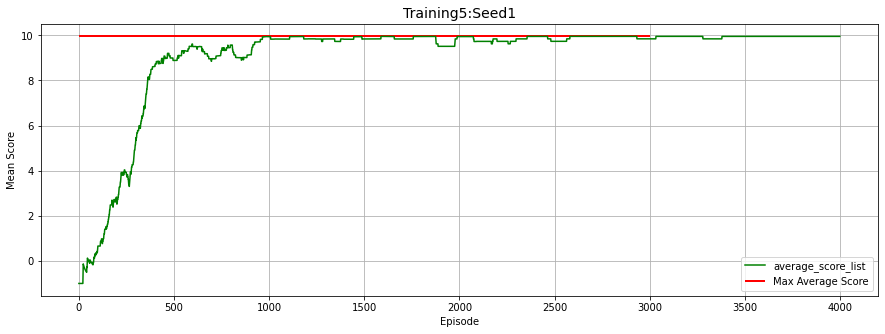

Brain Loaded for Training 5 in seed: 2
Episode 19	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 416
Score: [9.166404]
Episode 35	Average Score: -0.709526,	Average Step: 496.62857142857143Task solved in step: 339
Score: [9.321001]
Episode 36	Average Score: -0.430900,	Average Step: 492.25Task solved in step: 257
Score: [9.485199]
Episode 49	Average Score: -0.367901,	Average Step: 489.10204081632654Task solved in step: 297
Score: [9.405601]
Episode 52	Average Score: -0.204260,	Average Step: 485.78846153846155Task solved in step: 408
Score: [9.183804]
Episode 56	Average Score: -0.079245,	Average Step: 485.10714285714283Task solved in step: 481
Score: [9.036005]
Episode 60	Average Score: 0.026639,	Average Step: 485.73333333333335Task solved in step: 465
Score: [9.069405]
Episode 64	Average Score: 0.119809,	Average Step: 486.03125682539686Task solved in step: 405
Score: [9.188603]
Episode 68	Average Score: 0.203770,	Average Step: 485.4117647058824Task solved in step: 304


Episode 782	Average Score: 3.277972,	Average Step: 360.19Task solved in step: 33
Score: [9.932]
Episode 783	Average Score: 3.387292,	Average Step: 355.53Task solved in step: 164
Score: [9.6716]
Episode 784	Average Score: 3.494008,	Average Step: 352.18Task solved in step: 35
Score: [9.928]
Episode 787	Average Score: 3.603288,	Average Step: 347.54Task solved in step: 191
Score: [9.617]
Episode 788	Average Score: 3.709458,	Average Step: 344.46Task solved in step: 33
Score: [9.9322]
Episode 791	Average Score: 3.818779,	Average Step: 339.8Task solved in step: 398
Score: [9.202603]
Episode 792	Average Score: 3.920805,	Average Step: 338.79Task solved in step: 219
Score: [9.560999]
Episode 793	Average Score: 4.026415,	Average Step: 335.99Task solved in step: 43
Score: [9.913799]
Episode 794	Average Score: 4.135553,	Average Step: 331.43Task solved in step: 79
Score: [9.8408]
Episode 796	Average Score: 4.137995,	Average Step: 330.21Task solved in step: 190
Score: [9.6194]
Episode 799	Average Sco

Episode 1397	Average Score: -0.999994,	Average Step: 499.01Task solved in step: 411
Score: [9.176204]
Episode 1402	Average Score: -0.898232,	Average Step: 498.12Task solved in step: 248
Score: [9.502999]
Episode 1412	Average Score: -0.793202,	Average Step: 495.61Task solved in step: 294
Score: [9.411401]
Episode 1418	Average Score: -0.689088,	Average Step: 493.56Task solved in step: 445
Score: [9.109004]
Episode 1465	Average Score: -0.587998,	Average Step: 493.02Task solved in step: 314
Score: [9.3718]
Episode 1495	Average Score: -0.484280,	Average Step: 491.17Task solved in step: 393
Score: [9.213403]
Episode 1497	Average Score: -0.382146,	Average Step: 490.11Task solved in step: 262
Score: [9.4746]
Episode 1499	Average Score: -0.379162,	Average Step: 488.62Task solved in step: 492
Score: [9.015606]
Episode 1502	Average Score: -0.279007,	Average Step: 488.55Task solved in step: 188
Score: [9.6226]
Episode 1505	Average Score: -0.277810,	Average Step: 487.95Task solved in step: 440
Scor

Episode 2714	Average Score: 0.392873,	Average Step: 452.63Task solved in step: 42
Score: [9.9158]
Episode 2716	Average Score: 0.502031,	Average Step: 448.06Task solved in step: 283
Score: [9.4324]
Episode 2727	Average Score: 0.606355,	Average Step: 445.9Task solved in step: 22
Score: [9.9544]
Episode 2728	Average Score: 0.715899,	Average Step: 441.13Task solved in step: 22
Score: [9.9544]
Episode 2729	Average Score: 0.825443,	Average Step: 436.36Task solved in step: 22
Score: [9.9544]
Episode 2734	Average Score: 0.934987,	Average Step: 431.59Task solved in step: 22
Score: [9.9544]
Episode 2735	Average Score: 1.044531,	Average Step: 426.82Task solved in step: 22
Score: [9.9544]
Episode 2736	Average Score: 1.045435,	Average Step: 426.37Task solved in step: 22
Score: [9.9544]
Episode 2737	Average Score: 1.154979,	Average Step: 421.6Task solved in step: 22
Score: [9.9544]
Episode 2738	Average Score: 1.264523,	Average Step: 416.83Task solved in step: 22
Score: [9.9544]
Episode 2739	Average 

Episode 2964	Average Score: 7.133539,	Average Step: 182.53Task solved in step: 22
Score: [9.954]
Episode 2965	Average Score: 7.243079,	Average Step: 177.76Task solved in step: 27
Score: [9.9442005]
Episode 2966	Average Score: 7.248531,	Average Step: 175.03Task solved in step: 68
Score: [9.8624]
Episode 2967	Average Score: 7.357156,	Average Step: 170.72Task solved in step: 65
Score: [9.8698]
Episode 2968	Average Score: 7.361396,	Average Step: 168.6Task solved in step: 99
Score: [9.8008]
Episode 2969	Average Score: 7.359992,	Average Step: 169.3Task solved in step: 23
Score: [9.9524]
Episode 2970	Average Score: 7.359949,	Average Step: 169.32Task solved in step: 23
Score: [9.9524]
Episode 2971	Average Score: 7.360091,	Average Step: 169.25Task solved in step: 23
Score: [9.9524]
Episode 2972	Average Score: 7.360049,	Average Step: 169.27Task solved in step: 24
Score: [9.95]
Episode 2973	Average Score: 7.359983,	Average Step: 169.3Task solved in step: 25
Score: [9.948]
Episode 2974	Average Sco

Episode 3136	Average Score: 9.928969,	Average Step: 34.91Task solved in step: 24
Score: [9.9516]
Episode 3137	Average Score: 9.928994,	Average Step: 34.9Task solved in step: 22
Score: [9.955]
Episode 3138	Average Score: 9.929051,	Average Step: 34.87Task solved in step: 22
Score: [9.955]
Episode 3139	Average Score: 9.929111,	Average Step: 34.84Task solved in step: 22
Score: [9.955]
Episode 3140	Average Score: 9.929169,	Average Step: 34.81Task solved in step: 22
Score: [9.955]
Episode 3141	Average Score: 9.929227,	Average Step: 34.78Task solved in step: 23
Score: [9.9524]
Episode 3142	Average Score: 9.930356,	Average Step: 34.21Task solved in step: 23
Score: [9.952]
Episode 3143	Average Score: 9.930511,	Average Step: 34.13Task solved in step: 23
Score: [9.952]
Episode 3144	Average Score: 9.930665,	Average Step: 34.05Task solved in step: 24
Score: [9.9506]
Episode 3145	Average Score: 9.930723,	Average Step: 34.02Task solved in step: 23
Score: [9.9524]
Episode 3146	Average Score: 9.930702,

Episode 3221	Average Score: 9.952418,	Average Step: 23.18Task solved in step: 23
Score: [9.9524]
Episode 3222	Average Score: 9.952418,	Average Step: 23.18Task solved in step: 23
Score: [9.9524]
Episode 3223	Average Score: 9.952418,	Average Step: 23.18Task solved in step: 23
Score: [9.9524]
Episode 3224	Average Score: 9.952418,	Average Step: 23.18Task solved in step: 23
Score: [9.9524]
Episode 3225	Average Score: 9.952470,	Average Step: 23.15Task solved in step: 22
Score: [9.955]
Episode 3226	Average Score: 9.952548,	Average Step: 23.11Task solved in step: 22
Score: [9.955]
Episode 3227	Average Score: 9.952626,	Average Step: 23.07Task solved in step: 22
Score: [9.955]
Episode 3228	Average Score: 9.952704,	Average Step: 23.03Task solved in step: 22
Score: [9.955]
Episode 3229	Average Score: 9.952783,	Average Step: 22.99Task solved in step: 22
Score: [9.955]
Episode 3230	Average Score: 9.952847,	Average Step: 22.96Task solved in step: 44
Score: [9.9106]
Episode 3231	Average Score: 9.95239

Episode 3391	Average Score: 9.953444,	Average Step: 22.75Task solved in step: 22
Score: [9.955]
Episode 3392	Average Score: 9.953444,	Average Step: 22.75Task solved in step: 22
Score: [9.955]
Episode 3393	Average Score: 9.953484,	Average Step: 22.73Task solved in step: 22
Score: [9.955]
Episode 3394	Average Score: 9.953503,	Average Step: 22.72Task solved in step: 22
Score: [9.955]
Episode 3395	Average Score: 9.953523,	Average Step: 22.71Task solved in step: 22
Score: [9.955]
Episode 3396	Average Score: 9.953543,	Average Step: 22.7Task solved in step: 22
Score: [9.955]
Episode 3397	Average Score: 9.953564,	Average Step: 22.69Task solved in step: 22
Score: [9.955]
Episode 3398	Average Score: 9.953608,	Average Step: 22.67Task solved in step: 22
Score: [9.955]
Episode 3399	Average Score: 9.953627,	Average Step: 22.66Task solved in step: 22
Score: [9.955]
Episode 3400	Average Score: 9.953692,	Average Step: 22.63Task solved in step: 28
Score: [9.9426]
Episode 3401	Average Score: 9.953589,	Av

Episode 3477	Average Score: 9.954260,	Average Step: 22.29Task solved in step: 22
Score: [9.9544]
Episode 3478	Average Score: 9.954254,	Average Step: 22.29Task solved in step: 22
Score: [9.955]
Episode 3479	Average Score: 9.954254,	Average Step: 22.29Task solved in step: 22
Score: [9.955]
Episode 3480	Average Score: 9.954254,	Average Step: 22.29Task solved in step: 27
Score: [9.945]
Episode 3481	Average Score: 9.954155,	Average Step: 22.34Task solved in step: 22
Score: [9.955]
Episode 3482	Average Score: 9.954154,	Average Step: 22.34Task solved in step: 22
Score: [9.955]
Episode 3483	Average Score: 9.954155,	Average Step: 22.34Task solved in step: 22
Score: [9.955]
Episode 3484	Average Score: 9.954182,	Average Step: 22.33Task solved in step: 24
Score: [9.9508]
Episode 3485	Average Score: 9.954141,	Average Step: 22.35Task solved in step: 22
Score: [9.9544]
Episode 3486	Average Score: 9.954134,	Average Step: 22.35Task solved in step: 22
Score: [9.955]
Episode 3487	Average Score: 9.954135,

Episode 3563	Average Score: 9.954052,	Average Step: 22.36Task solved in step: 22
Score: [9.954801]
Episode 3564	Average Score: 9.954052,	Average Step: 22.36Task solved in step: 25
Score: [9.9498]
Episode 3565	Average Score: 9.954006,	Average Step: 22.39Task solved in step: 22
Score: [9.954801]
Episode 3566	Average Score: 9.954011,	Average Step: 22.39Task solved in step: 22
Score: [9.954801]
Episode 3567	Average Score: 9.954014,	Average Step: 22.39Task solved in step: 23
Score: [9.952801]
Episode 3568	Average Score: 9.953999,	Average Step: 22.4Task solved in step: 22
Score: [9.9544]
Episode 3569	Average Score: 9.953998,	Average Step: 22.4Task solved in step: 22
Score: [9.9544]
Episode 3570	Average Score: 9.953999,	Average Step: 22.4Task solved in step: 24
Score: [9.9508]
Episode 3571	Average Score: 9.954022,	Average Step: 22.39Task solved in step: 22
Score: [9.955]
Episode 3572	Average Score: 9.954029,	Average Step: 22.39Task solved in step: 22
Score: [9.955]
Episode 3573	Average Score:

Episode 3647	Average Score: 9.953586,	Average Step: 22.54Task solved in step: 22
Score: [9.955601]
Episode 3648	Average Score: 9.953592,	Average Step: 22.54Task solved in step: 22
Score: [9.955601]
Episode 3649	Average Score: 9.953599,	Average Step: 22.54Task solved in step: 22
Score: [9.9544]
Episode 3650	Average Score: 9.953592,	Average Step: 22.54Task solved in step: 22
Score: [9.9544]
Episode 3651	Average Score: 9.953625,	Average Step: 22.52Task solved in step: 22
Score: [9.9544]
Episode 3652	Average Score: 9.953618,	Average Step: 22.52Task solved in step: 23
Score: [9.9526005]
Episode 3653	Average Score: 9.953594,	Average Step: 22.53Task solved in step: 23
Score: [9.9536]
Episode 3654	Average Score: 9.953580,	Average Step: 22.54Task solved in step: 23
Score: [9.9526005]
Episode 3655	Average Score: 9.953555,	Average Step: 22.55Task solved in step: 22
Score: [9.955601]
Episode 3656	Average Score: 9.953604,	Average Step: 22.53Task solved in step: 22
Score: [9.955601]
Episode 3657	Ave

Episode 3731	Average Score: 9.954010,	Average Step: 22.4Task solved in step: 22
Score: [9.9544]
Episode 3732	Average Score: 9.954028,	Average Step: 22.39Task solved in step: 22
Score: [9.9544]
Episode 3733	Average Score: 9.954046,	Average Step: 22.38Task solved in step: 23
Score: [9.9524]
Episode 3734	Average Score: 9.954044,	Average Step: 22.38Task solved in step: 22
Score: [9.9544]
Episode 3735	Average Score: 9.954062,	Average Step: 22.37Task solved in step: 22
Score: [9.9544]
Episode 3736	Average Score: 9.954081,	Average Step: 22.36Task solved in step: 22
Score: [9.9544]
Episode 3737	Average Score: 9.954081,	Average Step: 22.36Task solved in step: 22
Score: [9.9544]
Episode 3738	Average Score: 9.954081,	Average Step: 22.36Task solved in step: 23
Score: [9.952]
Episode 3739	Average Score: 9.954035,	Average Step: 22.38Task solved in step: 22
Score: [9.9544]
Episode 3740	Average Score: 9.954035,	Average Step: 22.38Task solved in step: 22
Score: [9.9544]
Episode 3741	Average Score: 9.95

Episode 3816	Average Score: 9.952684,	Average Step: 23.04Task solved in step: 22
Score: [9.955601]
Episode 3817	Average Score: 9.952684,	Average Step: 23.04Task solved in step: 22
Score: [9.955601]
Episode 3818	Average Score: 9.952685,	Average Step: 23.04Task solved in step: 22
Score: [9.955601]
Episode 3819	Average Score: 9.952697,	Average Step: 23.04Task solved in step: 22
Score: [9.955601]
Episode 3820	Average Score: 9.952709,	Average Step: 23.04Task solved in step: 22
Score: [9.955601]
Episode 3821	Average Score: 9.952786,	Average Step: 23.0Task solved in step: 22
Score: [9.955601]
Episode 3822	Average Score: 9.952799,	Average Step: 23.0Task solved in step: 22
Score: [9.955601]
Episode 3823	Average Score: 9.952799,	Average Step: 23.0Task solved in step: 22
Score: [9.955601]
Episode 3824	Average Score: 9.952811,	Average Step: 23.0Task solved in step: 22
Score: [9.955601]
Episode 3825	Average Score: 9.952847,	Average Step: 22.99Task solved in step: 22
Score: [9.955601]
Episode 3826	A

Episode 3900	Average Score: 9.953458,	Average Step: 22.95Task solved in step: 22
Score: [9.955601]
Episode 3901	Average Score: 9.953470,	Average Step: 22.95Task solved in step: 22
Score: [9.9544]
Episode 3902	Average Score: 9.953540,	Average Step: 22.91Task solved in step: 22
Score: [9.9544]
Episode 3903	Average Score: 9.953991,	Average Step: 22.68Task solved in step: 22
Score: [9.955601]
Episode 3904	Average Score: 9.954002,	Average Step: 22.68Task solved in step: 22
Score: [9.955601]
Episode 3905	Average Score: 9.954043,	Average Step: 22.66Task solved in step: 22
Score: [9.955601]
Episode 3906	Average Score: 9.954162,	Average Step: 22.6Task solved in step: 22
Score: [9.955601]
Episode 3907	Average Score: 9.954162,	Average Step: 22.6Task solved in step: 22
Score: [9.955601]
Episode 3908	Average Score: 9.954162,	Average Step: 22.6Task solved in step: 22
Score: [9.955601]
Episode 3909	Average Score: 9.954214,	Average Step: 22.58Task solved in step: 22
Score: [9.955601]
Episode 3910	Aver

Episode 3984	Average Score: 9.946820,	Average Step: 26.3Task solved in step: 22
Score: [9.955601]
Episode 3985	Average Score: 9.946820,	Average Step: 26.3Task solved in step: 22
Score: [9.955601]
Episode 3986	Average Score: 9.946820,	Average Step: 26.3Task solved in step: 22
Score: [9.955601]
Episode 3987	Average Score: 9.946820,	Average Step: 26.3Task solved in step: 22
Score: [9.955601]
Episode 3988	Average Score: 9.946820,	Average Step: 26.3Task solved in step: 22
Score: [9.955601]
Episode 3989	Average Score: 9.946833,	Average Step: 26.3Task solved in step: 22
Score: [9.955601]
Episode 3990	Average Score: 9.946844,	Average Step: 26.3Task solved in step: 23
Score: [9.9526005]
Episode 3991	Average Score: 9.946826,	Average Step: 26.31Task solved in step: 28
Score: [9.943]
Episode 3992	Average Score: 9.946700,	Average Step: 26.37Task solved in step: 22
Score: [9.955601]
Episode 3993	Average Score: 9.946699,	Average Step: 26.37Task solved in step: 22
Score: [9.955601]
Episode 3994	Averag

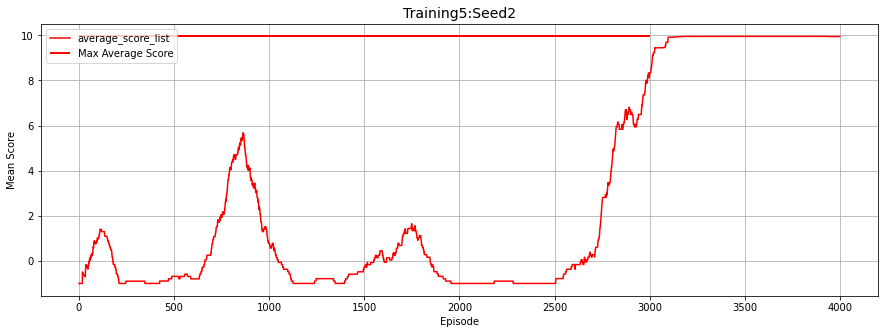

Brain Loaded for Training 5 in seed: 3
Episode 3	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 387
Score: [9.225603]
Episode 32	Average Score: -0.680444,	Average Step: 495.58709677419354Task solved in step: 449
Score: [9.100404]
Episode 42	Average Score: -0.516042,	Average Step: 495.14285714285717Task solved in step: 493
Score: [9.012606]
Episode 47	Average Score: -0.354492,	Average Step: 495.42553191489365Task solved in step: 432
Score: [9.134404]
Episode 54	Average Score: -0.250494,	Average Step: 494.64814814814815Task solved in step: 395
Score: [9.2090025]
Episode 100	Average Score: -0.493174,	Average Step: 495.6175757575756Task solved in step: 196
Score: [9.6068]
Episode 107	Average Score: -0.489362,	Average Step: 493.78Task solved in step: 384
Score: [9.230003]
Episode 108	Average Score: -0.387062,	Average Step: 492.55Task solved in step: 424
Score: [9.150004]
Episode 114	Average Score: -0.285562,	Average Step: 491.8Task solved in step: 266
Score: [9.4674]
Epis

Episode 443	Average Score: 5.940312,	Average Step: 229.12Task solved in step: 194
Score: [9.611799]
Episode 444	Average Score: 5.937869,	Average Step: 230.35Task solved in step: 34
Score: [9.93]
Episode 445	Average Score: 5.939691,	Average Step: 229.43Task solved in step: 51
Score: [9.8966]
Episode 446	Average Score: 5.939885,	Average Step: 229.33Task solved in step: 24
Score: [9.9516]
Episode 447	Average Score: 5.944542,	Average Step: 227.0Task solved in step: 456
Score: [9.087605]
Episode 450	Average Score: 5.936020,	Average Step: 231.26Task solved in step: 48
Score: [9.903]
Episode 451	Average Score: 6.045050,	Average Step: 226.75Task solved in step: 80
Score: [9.8386]
Episode 452	Average Score: 6.045225,	Average Step: 226.66Task solved in step: 23
Score: [9.9526005]
Episode 454	Average Score: 6.045456,	Average Step: 226.54Task solved in step: 21
Score: [9.9564]
Episode 455	Average Score: 6.046657,	Average Step: 225.94Task solved in step: 29
Score: [9.941]
Episode 457	Average Score:

Episode 633	Average Score: 9.041283,	Average Step: 78.8Task solved in step: 23
Score: [9.952]
Episode 634	Average Score: 9.041250,	Average Step: 78.81Task solved in step: 25
Score: [9.948]
Episode 635	Average Score: 9.043881,	Average Step: 77.49Task solved in step: 29
Score: [9.941401]
Episode 638	Average Score: 8.824855,	Average Step: 87.0Task solved in step: 31
Score: [9.937799]
Episode 642	Average Score: 8.496241,	Average Step: 101.3Task solved in step: 19
Score: [9.9618]
Episode 643	Average Score: 8.496346,	Average Step: 101.25Task solved in step: 22
Score: [9.9558]
Episode 644	Average Score: 8.501513,	Average Step: 98.67Task solved in step: 22
Score: [9.9558]
Episode 645	Average Score: 8.611072,	Average Step: 93.9Task solved in step: 22
Score: [9.9558]
Episode 647	Average Score: 8.611129,	Average Step: 93.88Task solved in step: 29
Score: [9.9406]
Episode 648	Average Score: 8.611024,	Average Step: 93.93Task solved in step: 22
Score: [9.9558]
Episode 649	Average Score: 8.611033,	Ave

Episode 730	Average Score: 8.514220,	Average Step: 92.46Task solved in step: 19
Score: [9.9608]
Episode 731	Average Score: 8.623828,	Average Step: 87.66Task solved in step: 29
Score: [9.940801]
Episode 732	Average Score: 8.625406,	Average Step: 86.87Task solved in step: 19
Score: [9.9608]
Episode 733	Average Score: 8.735013,	Average Step: 82.07Task solved in step: 19
Score: [9.9608]
Episode 734	Average Score: 8.735102,	Average Step: 82.03Task solved in step: 19
Score: [9.9608]
Episode 735	Average Score: 8.735229,	Average Step: 81.97Task solved in step: 19
Score: [9.9608]
Episode 736	Average Score: 8.735424,	Average Step: 81.87Task solved in step: 21
Score: [9.9578]
Episode 737	Average Score: 8.845002,	Average Step: 77.09Task solved in step: 21
Score: [9.9578]
Episode 738	Average Score: 8.954579,	Average Step: 72.31Task solved in step: 19
Score: [9.9608]
Episode 739	Average Score: 8.954809,	Average Step: 72.19Task solved in step: 19
Score: [9.9608]
Episode 740	Average Score: 9.064418,	A

Episode 818	Average Score: 9.612321,	Average Step: 43.46Task solved in step: 21
Score: [9.9578]
Episode 819	Average Score: 9.612321,	Average Step: 43.46Task solved in step: 21
Score: [9.9578]
Episode 820	Average Score: 9.612342,	Average Step: 43.45Task solved in step: 21
Score: [9.9578]
Episode 821	Average Score: 9.612393,	Average Step: 43.43Task solved in step: 21
Score: [9.9578]
Episode 822	Average Score: 9.612393,	Average Step: 43.43Task solved in step: 21
Score: [9.9578]
Episode 823	Average Score: 9.612424,	Average Step: 43.42Task solved in step: 21
Score: [9.9578]
Episode 824	Average Score: 9.612461,	Average Step: 43.41Task solved in step: 21
Score: [9.9578]
Episode 825	Average Score: 9.722040,	Average Step: 38.63Task solved in step: 21
Score: [9.9578]
Episode 826	Average Score: 9.722152,	Average Step: 38.58Task solved in step: 21
Score: [9.9578]
Episode 827	Average Score: 9.722172,	Average Step: 38.57Task solved in step: 21
Score: [9.9578]
Episode 828	Average Score: 9.722192,	Ave

Episode 905	Average Score: 9.843045,	Average Step: 28.23Task solved in step: 21
Score: [9.9564]
Episode 906	Average Score: 9.843104,	Average Step: 28.2Task solved in step: 19
Score: [9.9608]
Episode 907	Average Score: 9.843149,	Average Step: 28.18Task solved in step: 19
Score: [9.9608]
Episode 908	Average Score: 9.843180,	Average Step: 28.16Task solved in step: 21
Score: [9.9578]
Episode 909	Average Score: 9.843207,	Average Step: 28.15Task solved in step: 21
Score: [9.9578]
Episode 910	Average Score: 9.843235,	Average Step: 28.14Task solved in step: 21
Score: [9.9578]
Episode 911	Average Score: 9.843286,	Average Step: 28.12Task solved in step: 22
Score: [9.9552]
Episode 912	Average Score: 9.843411,	Average Step: 28.06Task solved in step: 21
Score: [9.9578]
Episode 913	Average Score: 9.843537,	Average Step: 28.0Task solved in step: 21
Score: [9.9578]
Episode 914	Average Score: 9.843537,	Average Step: 28.0Task solved in step: 21
Score: [9.9578]
Episode 915	Average Score: 9.843663,	Averag

Episode 1077	Average Score: 9.736635,	Average Step: 31.45Task solved in step: 21
Score: [9.9578]
Episode 1078	Average Score: 9.736636,	Average Step: 31.45Task solved in step: 24
Score: [9.9502]
Episode 1079	Average Score: 9.736612,	Average Step: 31.46Task solved in step: 21
Score: [9.9578]
Episode 1080	Average Score: 9.736612,	Average Step: 31.46Task solved in step: 21
Score: [9.9578]
Episode 1081	Average Score: 9.736612,	Average Step: 31.46Task solved in step: 21
Score: [9.9578]
Episode 1082	Average Score: 9.736612,	Average Step: 31.46Task solved in step: 21
Score: [9.9578]
Episode 1083	Average Score: 9.736572,	Average Step: 31.48Task solved in step: 21
Score: [9.9578]
Episode 1084	Average Score: 9.736532,	Average Step: 31.5Task solved in step: 21
Score: [9.9578]
Episode 1085	Average Score: 9.736532,	Average Step: 31.5Task solved in step: 21
Score: [9.9578]
Episode 1086	Average Score: 9.736532,	Average Step: 31.5Task solved in step: 21
Score: [9.9578]
Episode 1087	Average Score: 9.736

Episode 1162	Average Score: 9.956920,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1163	Average Score: 9.956921,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1164	Average Score: 9.956921,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1165	Average Score: 9.956921,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1166	Average Score: 9.956920,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1167	Average Score: 9.956921,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1168	Average Score: 9.956960,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 1169	Average Score: 9.957093,	Average Step: 21.29Task solved in step: 22
Score: [9.9552]
Episode 1170	Average Score: 9.957027,	Average Step: 21.32Task solved in step: 21
Score: [9.9578]
Episode 1171	Average Score: 9.956988,	Average Step: 21.34Task solved in step: 21
Score: [9.9578]
Episode 1172	Average Score: 9.

Episode 1332	Average Score: 9.847692,	Average Step: 26.01Task solved in step: 21
Score: [9.9578]
Episode 1333	Average Score: 9.847692,	Average Step: 26.01Task solved in step: 21
Score: [9.9578]
Episode 1334	Average Score: 9.847692,	Average Step: 26.01Task solved in step: 21
Score: [9.9578]
Episode 1335	Average Score: 9.847735,	Average Step: 25.99Task solved in step: 21
Score: [9.9578]
Episode 1336	Average Score: 9.847735,	Average Step: 25.99Task solved in step: 21
Score: [9.9578]
Episode 1337	Average Score: 9.847735,	Average Step: 25.99Task solved in step: 21
Score: [9.9578]
Episode 1338	Average Score: 9.847736,	Average Step: 25.99Task solved in step: 21
Score: [9.9578]
Episode 1339	Average Score: 9.847736,	Average Step: 25.99Task solved in step: 21
Score: [9.9578]
Episode 1340	Average Score: 9.847736,	Average Step: 25.99Task solved in step: 21
Score: [9.9578]
Episode 1341	Average Score: 9.847884,	Average Step: 25.92Task solved in step: 21
Score: [9.9578]
Episode 1342	Average Score: 9.

Episode 1501	Average Score: 9.956940,	Average Step: 21.37Task solved in step: 23
Score: [9.952801]
Episode 1502	Average Score: 9.956930,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1503	Average Score: 9.956949,	Average Step: 21.36Task solved in step: 21
Score: [9.9578]
Episode 1504	Average Score: 9.956949,	Average Step: 21.36Task solved in step: 21
Score: [9.9578]
Episode 1505	Average Score: 9.956949,	Average Step: 21.36Task solved in step: 21
Score: [9.9578]
Episode 1506	Average Score: 9.956945,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1507	Average Score: 9.956945,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1508	Average Score: 9.956945,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 1509	Average Score: 9.956945,	Average Step: 21.37Task solved in step: 22
Score: [9.9558]
Episode 1510	Average Score: 9.956974,	Average Step: 21.36Task solved in step: 22
Score: [9.9558]
Episode 1511	Average Score: 

Episode 1587	Average Score: 9.847790,	Average Step: 25.96Task solved in step: 21
Score: [9.9578]
Episode 1588	Average Score: 9.847834,	Average Step: 25.94Task solved in step: 21
Score: [9.9578]
Episode 1589	Average Score: 9.847834,	Average Step: 25.94Task solved in step: 21
Score: [9.9578]
Episode 1590	Average Score: 9.847835,	Average Step: 25.94Task solved in step: 21
Score: [9.9578]
Episode 1591	Average Score: 9.847835,	Average Step: 25.94Task solved in step: 21
Score: [9.9578]
Episode 1592	Average Score: 9.847834,	Average Step: 25.94Task solved in step: 28
Score: [9.9432]
Episode 1593	Average Score: 9.847688,	Average Step: 26.01Task solved in step: 21
Score: [9.9578]
Episode 1594	Average Score: 9.847688,	Average Step: 26.01Task solved in step: 21
Score: [9.9578]
Episode 1595	Average Score: 9.847688,	Average Step: 26.01Task solved in step: 23
Score: [9.9524]
Episode 1596	Average Score: 9.847633,	Average Step: 26.03Task solved in step: 21
Score: [9.9578]
Episode 1597	Average Score: 9.

Episode 1672	Average Score: 9.957078,	Average Step: 21.3Task solved in step: 21
Score: [9.9578]
Episode 1673	Average Score: 9.957078,	Average Step: 21.3Task solved in step: 21
Score: [9.9578]
Episode 1674	Average Score: 9.957078,	Average Step: 21.3Task solved in step: 21
Score: [9.9578]
Episode 1675	Average Score: 9.957078,	Average Step: 21.3Task solved in step: 21
Score: [9.9578]
Episode 1676	Average Score: 9.957078,	Average Step: 21.3Task solved in step: 21
Score: [9.9578]
Episode 1677	Average Score: 9.957078,	Average Step: 21.3Task solved in step: 21
Score: [9.9578]
Episode 1678	Average Score: 9.957080,	Average Step: 21.3Task solved in step: 23
Score: [9.9538]
Episode 1679	Average Score: 9.957039,	Average Step: 21.32Task solved in step: 22
Score: [9.954]
Episode 1680	Average Score: 9.957002,	Average Step: 21.33Task solved in step: 21
Score: [9.9578]
Episode 1681	Average Score: 9.957001,	Average Step: 21.33Task solved in step: 23
Score: [9.952999]
Episode 1682	Average Score: 9.956953

Episode 1840	Average Score: 9.956198,	Average Step: 21.71Task solved in step: 21
Score: [9.9578]
Episode 1841	Average Score: 9.956198,	Average Step: 21.71Task solved in step: 21
Score: [9.9578]
Episode 1842	Average Score: 9.956198,	Average Step: 21.71Task solved in step: 21
Score: [9.9578]
Episode 1843	Average Score: 9.956247,	Average Step: 21.69Task solved in step: 21
Score: [9.9578]
Episode 1844	Average Score: 9.956247,	Average Step: 21.69Task solved in step: 21
Score: [9.9578]
Episode 1845	Average Score: 9.956248,	Average Step: 21.69Task solved in step: 21
Score: [9.9578]
Episode 1846	Average Score: 9.956248,	Average Step: 21.69Task solved in step: 21
Score: [9.9578]
Episode 1847	Average Score: 9.956248,	Average Step: 21.69Task solved in step: 21
Score: [9.9578]
Episode 1848	Average Score: 9.956247,	Average Step: 21.69Task solved in step: 21
Score: [9.9578]
Episode 1849	Average Score: 9.956300,	Average Step: 21.67Task solved in step: 21
Score: [9.9578]
Episode 1850	Average Score: 9.

Episode 2008	Average Score: 9.957047,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 2009	Average Score: 9.957047,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 2010	Average Score: 9.957047,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 2011	Average Score: 9.957096,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2012	Average Score: 9.957096,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2013	Average Score: 9.957096,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2014	Average Score: 9.957096,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2015	Average Score: 9.957096,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2016	Average Score: 9.957096,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2017	Average Score: 9.957096,	Average Step: 21.29Task solved in step: 21
Score: [9.9578]
Episode 2018	Average Score: 9.

Episode 2177	Average Score: 9.957100,	Average Step: 21.3Task solved in step: 21
Score: [9.9578]
Episode 2178	Average Score: 9.957100,	Average Step: 21.3Task solved in step: 34
Score: [9.9306]
Episode 2179	Average Score: 9.956827,	Average Step: 21.43Task solved in step: 21
Score: [9.9578]
Episode 2180	Average Score: 9.956827,	Average Step: 21.43Task solved in step: 21
Score: [9.9578]
Episode 2181	Average Score: 9.956827,	Average Step: 21.43Task solved in step: 21
Score: [9.9578]
Episode 2182	Average Score: 9.956827,	Average Step: 21.43Task solved in step: 21
Score: [9.9578]
Episode 2183	Average Score: 9.956827,	Average Step: 21.43Task solved in step: 21
Score: [9.9578]
Episode 2184	Average Score: 9.956880,	Average Step: 21.41Task solved in step: 21
Score: [9.9578]
Episode 2185	Average Score: 9.956880,	Average Step: 21.41Task solved in step: 21
Score: [9.9578]
Episode 2186	Average Score: 9.956880,	Average Step: 21.41Task solved in step: 21
Score: [9.9578]
Episode 2187	Average Score: 9.95

Episode 2347	Average Score: 9.957355,	Average Step: 21.17Task solved in step: 22
Score: [9.955]
Episode 2348	Average Score: 9.957328,	Average Step: 21.18Task solved in step: 21
Score: [9.9578]
Episode 2349	Average Score: 9.957328,	Average Step: 21.18Task solved in step: 24
Score: [9.95]
Episode 2350	Average Score: 9.957250,	Average Step: 21.21Task solved in step: 21
Score: [9.9578]
Episode 2351	Average Score: 9.957250,	Average Step: 21.21Task solved in step: 21
Score: [9.9578]
Episode 2352	Average Score: 9.957302,	Average Step: 21.19Task solved in step: 21
Score: [9.9578]
Episode 2353	Average Score: 9.957302,	Average Step: 21.19Task solved in step: 26
Score: [9.9474]
Episode 2354	Average Score: 9.957198,	Average Step: 21.24Task solved in step: 21
Score: [9.9578]
Episode 2355	Average Score: 9.957198,	Average Step: 21.24Task solved in step: 21
Score: [9.9578]
Episode 2356	Average Score: 9.957198,	Average Step: 21.24Task solved in step: 21
Score: [9.9578]
Episode 2357	Average Score: 9.957

Episode 2432	Average Score: 9.957018,	Average Step: 21.33Task solved in step: 21
Score: [9.9578]
Episode 2433	Average Score: 9.957018,	Average Step: 21.33Task solved in step: 21
Score: [9.9578]
Episode 2434	Average Score: 9.957018,	Average Step: 21.33Task solved in step: 21
Score: [9.9578]
Episode 2435	Average Score: 9.957018,	Average Step: 21.33Task solved in step: 21
Score: [9.9578]
Episode 2436	Average Score: 9.957027,	Average Step: 21.33Task solved in step: 23
Score: [9.952999]
Episode 2437	Average Score: 9.956980,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 2438	Average Score: 9.956980,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 2439	Average Score: 9.956980,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 2440	Average Score: 9.956980,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 2441	Average Score: 9.956980,	Average Step: 21.35Task solved in step: 21
Score: [9.9578]
Episode 2442	Average Score: 

Episode 2517	Average Score: 9.957206,	Average Step: 21.25Task solved in step: 21
Score: [9.9578]
Episode 2518	Average Score: 9.957246,	Average Step: 21.23Task solved in step: 21
Score: [9.9578]
Episode 2519	Average Score: 9.957246,	Average Step: 21.23Task solved in step: 21
Score: [9.9578]
Episode 2520	Average Score: 9.957246,	Average Step: 21.23Task solved in step: 21
Score: [9.9578]
Episode 2521	Average Score: 9.957246,	Average Step: 21.23Task solved in step: 21
Score: [9.9578]
Episode 2522	Average Score: 9.957246,	Average Step: 21.23Task solved in step: 21
Score: [9.9578]
Episode 2523	Average Score: 9.957485,	Average Step: 21.11Task solved in step: 21
Score: [9.9578]
Episode 2524	Average Score: 9.957486,	Average Step: 21.11Task solved in step: 21
Score: [9.9578]
Episode 2525	Average Score: 9.957485,	Average Step: 21.11Task solved in step: 21
Score: [9.9578]
Episode 2526	Average Score: 9.957486,	Average Step: 21.11Task solved in step: 21
Score: [9.9578]
Episode 2527	Average Score: 9.

Episode 2602	Average Score: 9.957528,	Average Step: 21.09Task solved in step: 21
Score: [9.9578]
Episode 2603	Average Score: 9.957488,	Average Step: 21.11Task solved in step: 21
Score: [9.9578]
Episode 2604	Average Score: 9.957490,	Average Step: 21.11Task solved in step: 26
Score: [9.9476]
Episode 2605	Average Score: 9.957388,	Average Step: 21.16Task solved in step: 21
Score: [9.9578]
Episode 2606	Average Score: 9.957446,	Average Step: 21.14Task solved in step: 25
Score: [9.9496]
Episode 2607	Average Score: 9.957363,	Average Step: 21.18Task solved in step: 21
Score: [9.9578]
Episode 2608	Average Score: 9.957363,	Average Step: 21.18Task solved in step: 21
Score: [9.9578]
Episode 2609	Average Score: 9.957363,	Average Step: 21.18Task solved in step: 21
Score: [9.9578]
Episode 2610	Average Score: 9.957364,	Average Step: 21.18Task solved in step: 21
Score: [9.9578]
Episode 2611	Average Score: 9.957364,	Average Step: 21.18Task solved in step: 21
Score: [9.9578]
Episode 2612	Average Score: 9.

Episode 2770	Average Score: 9.956442,	Average Step: 21.61Task solved in step: 21
Score: [9.9578]
Episode 2771	Average Score: 9.956450,	Average Step: 21.61Task solved in step: 21
Score: [9.9578]
Episode 2772	Average Score: 9.956498,	Average Step: 21.59Task solved in step: 21
Score: [9.9578]
Episode 2773	Average Score: 9.956498,	Average Step: 21.59Task solved in step: 21
Score: [9.9578]
Episode 2774	Average Score: 9.956504,	Average Step: 21.59Task solved in step: 21
Score: [9.9578]
Episode 2775	Average Score: 9.956504,	Average Step: 21.59Task solved in step: 21
Score: [9.9578]
Episode 2776	Average Score: 9.956504,	Average Step: 21.59Task solved in step: 21
Score: [9.9578]
Episode 2777	Average Score: 9.956504,	Average Step: 21.59Task solved in step: 21
Score: [9.9578]
Episode 2778	Average Score: 9.956676,	Average Step: 21.51Task solved in step: 21
Score: [9.9564]
Episode 2779	Average Score: 9.956662,	Average Step: 21.51Task solved in step: 21
Score: [9.9578]
Episode 2780	Average Score: 9.

Episode 2856	Average Score: 9.956842,	Average Step: 21.39Task solved in step: 21
Score: [9.9578]
Episode 2857	Average Score: 9.956841,	Average Step: 21.39Task solved in step: 21
Score: [9.9578]
Episode 2858	Average Score: 9.956842,	Average Step: 21.39Task solved in step: 21
Score: [9.9578]
Episode 2859	Average Score: 9.956841,	Average Step: 21.39Task solved in step: 21
Score: [9.9578]
Episode 2860	Average Score: 9.956842,	Average Step: 21.39Task solved in step: 26
Score: [9.9472]
Episode 2861	Average Score: 9.956735,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 2862	Average Score: 9.956736,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 2863	Average Score: 9.956735,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 2864	Average Score: 9.956736,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 2865	Average Score: 9.956736,	Average Step: 21.44Task solved in step: 21
Score: [9.9578]
Episode 2866	Average Score: 9.

Episode 3024	Average Score: 9.956920,	Average Step: 21.36Task solved in step: 26
Score: [9.947]
Episode 3025	Average Score: 9.956812,	Average Step: 21.41Task solved in step: 21
Score: [9.9578]
Episode 3026	Average Score: 9.956812,	Average Step: 21.41Task solved in step: 21
Score: [9.9578]
Episode 3027	Average Score: 9.956812,	Average Step: 21.41Task solved in step: 21
Score: [9.9578]
Episode 3028	Average Score: 9.956858,	Average Step: 21.39Task solved in step: 21
Score: [9.9578]
Episode 3029	Average Score: 9.956864,	Average Step: 21.39Task solved in step: 23
Score: [9.9522]
Episode 3030	Average Score: 9.956887,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 3031	Average Score: 9.956888,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 3032	Average Score: 9.956887,	Average Step: 21.37Task solved in step: 21
Score: [9.9578]
Episode 3033	Average Score: 9.956949,	Average Step: 21.34Task solved in step: 21
Score: [9.9578]
Episode 3034	Average Score: 9.9

Episode 3193	Average Score: 9.957446,	Average Step: 21.13Task solved in step: 21
Score: [9.9578]
Episode 3194	Average Score: 9.957446,	Average Step: 21.13Task solved in step: 21
Score: [9.9578]
Episode 3195	Average Score: 9.957446,	Average Step: 21.13Task solved in step: 21
Score: [9.9578]
Episode 3196	Average Score: 9.957446,	Average Step: 21.13Task solved in step: 21
Score: [9.9578]
Episode 3197	Average Score: 9.957446,	Average Step: 21.13Task solved in step: 21
Score: [9.9578]
Episode 3198	Average Score: 9.957446,	Average Step: 21.13Task solved in step: 21
Score: [9.9578]
Episode 3199	Average Score: 9.957446,	Average Step: 21.13Task solved in step: 22
Score: [9.9552]
Episode 3200	Average Score: 9.957420,	Average Step: 21.14Task solved in step: 21
Score: [9.9578]
Episode 3201	Average Score: 9.957419,	Average Step: 21.14Task solved in step: 21
Score: [9.9578]
Episode 3202	Average Score: 9.957420,	Average Step: 21.14Task solved in step: 21
Score: [9.9578]
Episode 3203	Average Score: 9.

Episode 3278	Average Score: 9.955518,	Average Step: 22.09Task solved in step: 21
Score: [9.9578]
Episode 3279	Average Score: 9.955518,	Average Step: 22.09Task solved in step: 22
Score: [9.955]
Episode 3280	Average Score: 9.955514,	Average Step: 22.09Task solved in step: 21
Score: [9.9578]
Episode 3281	Average Score: 9.955514,	Average Step: 22.09Task solved in step: 22
Score: [9.9558]
Episode 3282	Average Score: 9.955534,	Average Step: 22.08Task solved in step: 21
Score: [9.9578]
Episode 3283	Average Score: 9.955534,	Average Step: 22.08Task solved in step: 22
Score: [9.9558]
Episode 3284	Average Score: 9.955514,	Average Step: 22.09Task solved in step: 21
Score: [9.9578]
Episode 3285	Average Score: 9.955514,	Average Step: 22.09Task solved in step: 21
Score: [9.9578]
Episode 3286	Average Score: 9.955514,	Average Step: 22.09Task solved in step: 25
Score: [9.9498]
Episode 3287	Average Score: 9.955434,	Average Step: 22.13Task solved in step: 21
Score: [9.9578]
Episode 3288	Average Score: 9.9

Episode 3447	Average Score: 9.847032,	Average Step: 26.33Task solved in step: 21
Score: [9.9578]
Episode 3448	Average Score: 9.847032,	Average Step: 26.33Task solved in step: 21
Score: [9.9578]
Episode 3449	Average Score: 9.847033,	Average Step: 26.33Task solved in step: 21
Score: [9.9578]
Episode 3450	Average Score: 9.847033,	Average Step: 26.33Task solved in step: 21
Score: [9.9578]
Episode 3451	Average Score: 9.847073,	Average Step: 26.31Task solved in step: 21
Score: [9.9578]
Episode 3452	Average Score: 9.847073,	Average Step: 26.31Task solved in step: 21
Score: [9.9578]
Episode 3453	Average Score: 9.847121,	Average Step: 26.29Task solved in step: 21
Score: [9.9578]
Episode 3454	Average Score: 9.847122,	Average Step: 26.29Task solved in step: 21
Score: [9.9578]
Episode 3455	Average Score: 9.847121,	Average Step: 26.29Task solved in step: 21
Score: [9.9566]
Episode 3456	Average Score: 9.847156,	Average Step: 26.27Task solved in step: 21
Score: [9.9578]
Episode 3457	Average Score: 9.

Episode 3532	Average Score: 9.957376,	Average Step: 21.16Task solved in step: 23
Score: [9.9536]
Episode 3533	Average Score: 9.957334,	Average Step: 21.18Task solved in step: 21
Score: [9.9578]
Episode 3534	Average Score: 9.957334,	Average Step: 21.18Task solved in step: 21
Score: [9.9578]
Episode 3535	Average Score: 9.957334,	Average Step: 21.18Task solved in step: 21
Score: [9.9578]
Episode 3536	Average Score: 9.957334,	Average Step: 21.18Task solved in step: 21
Score: [9.9578]
Episode 3537	Average Score: 9.957334,	Average Step: 21.18Task solved in step: 23
Score: [9.9538]
Episode 3538	Average Score: 9.957294,	Average Step: 21.2Task solved in step: 21
Score: [9.9578]
Episode 3539	Average Score: 9.957294,	Average Step: 21.2Task solved in step: 21
Score: [9.9578]
Episode 3540	Average Score: 9.957294,	Average Step: 21.2Task solved in step: 21
Score: [9.9578]
Episode 3541	Average Score: 9.957317,	Average Step: 21.19Task solved in step: 21
Score: [9.9578]
Episode 3542	Average Score: 9.957

Episode 3700	Average Score: 9.947582,	Average Step: 26.04Task solved in step: 21
Score: [9.9578]
Episode 3701	Average Score: 9.947582,	Average Step: 26.04Task solved in step: 21
Score: [9.9578]
Episode 3702	Average Score: 9.947582,	Average Step: 26.04Task solved in step: 21
Score: [9.9578]
Episode 3703	Average Score: 9.947582,	Average Step: 26.04Task solved in step: 21
Score: [9.9578]
Episode 3704	Average Score: 9.947582,	Average Step: 26.04Task solved in step: 21
Score: [9.9578]
Episode 3705	Average Score: 9.947582,	Average Step: 26.04Task solved in step: 21
Score: [9.9578]
Episode 3706	Average Score: 9.947582,	Average Step: 26.04Task solved in step: 21
Score: [9.9578]
Episode 3707	Average Score: 9.947582,	Average Step: 26.04Task solved in step: 21
Score: [9.9578]
Episode 3708	Average Score: 9.947582,	Average Step: 26.04Task solved in step: 36
Score: [9.927401]
Episode 3709	Average Score: 9.947278,	Average Step: 26.19Task solved in step: 21
Score: [9.9578]
Episode 3710	Average Score: 

Episode 3786	Average Score: 9.839308,	Average Step: 30.18Task solved in step: 23
Score: [9.953199]
Episode 3787	Average Score: 9.839261,	Average Step: 30.2Task solved in step: 21
Score: [9.9578]
Episode 3788	Average Score: 9.839262,	Average Step: 30.2Task solved in step: 21
Score: [9.9578]
Episode 3789	Average Score: 9.839278,	Average Step: 30.2Task solved in step: 21
Score: [9.9578]
Episode 3790	Average Score: 9.839278,	Average Step: 30.2Task solved in step: 21
Score: [9.9578]
Episode 3791	Average Score: 9.847360,	Average Step: 26.16Task solved in step: 21
Score: [9.9578]
Episode 3792	Average Score: 9.847361,	Average Step: 26.16Task solved in step: 21
Score: [9.9578]
Episode 3793	Average Score: 9.847361,	Average Step: 26.16Task solved in step: 22
Score: [9.9554]
Episode 3794	Average Score: 9.847347,	Average Step: 26.17Task solved in step: 21
Score: [9.9578]
Episode 3795	Average Score: 9.847347,	Average Step: 26.17Task solved in step: 196
Score: [9.6064]
Episode 3796	Average Score: 9.8

Episode 3871	Average Score: 9.953781,	Average Step: 22.93Task solved in step: 21
Score: [9.9578]
Episode 3872	Average Score: 9.953782,	Average Step: 22.93Task solved in step: 21
Score: [9.9578]
Episode 3873	Average Score: 9.953781,	Average Step: 22.93Task solved in step: 21
Score: [9.9578]
Episode 3874	Average Score: 9.953782,	Average Step: 22.93Task solved in step: 21
Score: [9.9578]
Episode 3875	Average Score: 9.953782,	Average Step: 22.93Task solved in step: 21
Score: [9.9578]
Episode 3876	Average Score: 9.953810,	Average Step: 22.92Task solved in step: 21
Score: [9.9578]
Episode 3877	Average Score: 9.953810,	Average Step: 22.92Task solved in step: 21
Score: [9.9578]
Episode 3878	Average Score: 9.953817,	Average Step: 22.92Task solved in step: 21
Score: [9.9578]
Episode 3879	Average Score: 9.953818,	Average Step: 22.92Task solved in step: 21
Score: [9.9578]
Episode 3880	Average Score: 9.953817,	Average Step: 22.92Task solved in step: 21
Score: [9.9578]
Episode 3881	Average Score: 9.

Episode 3956	Average Score: 9.957046,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 3957	Average Score: 9.957046,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 3958	Average Score: 9.957046,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 3959	Average Score: 9.957046,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 3960	Average Score: 9.957046,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 3961	Average Score: 9.957046,	Average Step: 21.31Task solved in step: 21
Score: [9.9578]
Episode 3962	Average Score: 9.957108,	Average Step: 21.28Task solved in step: 21
Score: [9.9578]
Episode 3963	Average Score: 9.957114,	Average Step: 21.28Task solved in step: 21
Score: [9.9578]
Episode 3964	Average Score: 9.957114,	Average Step: 21.28Task solved in step: 21
Score: [9.9578]
Episode 3965	Average Score: 9.957114,	Average Step: 21.28Task solved in step: 21
Score: [9.9578]
Episode 3966	Average Score: 9.

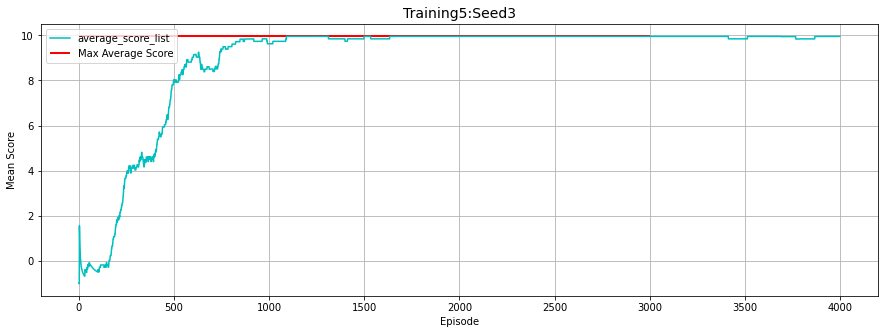

Brain Saved for Training 5 in seed 4
Episode 91	Average Score: -0.999994,	Average Step: 499.0Task solved in step: 333
Score: [9.332401]
Episode 133	Average Score: -0.896670,	Average Step: 497.3423232323233Task solved in step: 283
Score: [9.433]
Episode 213	Average Score: -0.895664,	Average Step: 496.84Task solved in step: 205
Score: [9.5896]
Episode 297	Average Score: -0.894098,	Average Step: 496.06Task solved in step: 483
Score: [9.032005]
Episode 332	Average Score: -0.899674,	Average Step: 498.84Task solved in step: 316
Score: [9.367001]
Episode 383	Average Score: -0.796004,	Average Step: 497.01Task solved in step: 488
Score: [9.022406]
Episode 414	Average Score: -0.796100,	Average Step: 497.06Task solved in step: 186
Score: [9.627399]
Episode 543	Average Score: -0.999994,	Average Step: 499.07Task solved in step: 422
Score: [9.154204]
Episode 604	Average Score: -0.898452,	Average Step: 498.23Task solved in step: 186
Score: [9.627399]
Episode 612	Average Score: -0.792178,	Average Step

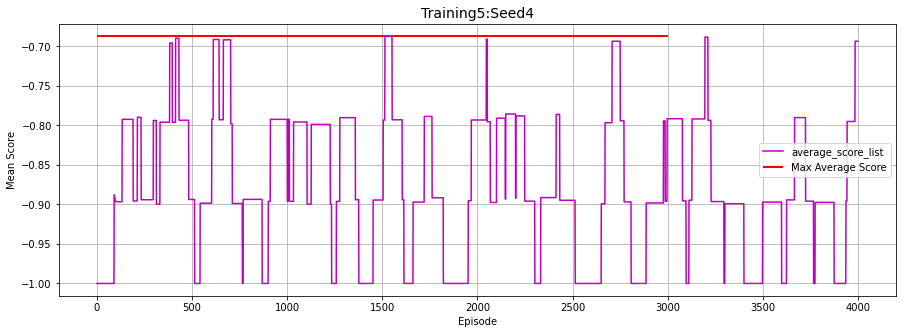

CPU times: user 4h 20min 53s, sys: 21h 32min 17s, total: 1d 1h 53min 10s
Wall time: 7h 50min 25s


In [27]:
%%time

seed_number=5

for seed in range(seed_number):
    

                
    #Logged values


    scores = []
    step=[] 
    average_score_list=[]                                           #Saves last 100 average scores
    average_step_list=[]   
    scores_window = deque(maxlen=100)                               # Saves last 100 avarage solved steps
    step_window = deque(maxlen=100)                                 # last 100 scores

    #Hyperparamaters:

    n_episodes=4000
    max_t=500
    eps_start=1.0
    eps=eps_start
    eps_end=0.01 
    eps_decay=0.995


    #Call DQN function
    agent = DQN_Agent(state_size, action_size, seed=seed)
     
    #Load weights:    
    if seed == 0:
        print("Brain Loaded for Training 5 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train4_Seed0.pth'))
    if seed == 1:
        print("Brain Loaded for Training 5 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train4_Seed1.pth'))
    if seed == 2:
        print("Brain Loaded for Training 5 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train4_Seed2.pth'))
    if seed == 3:
        print("Brain Loaded for Training 5 in seed:",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train4_Seed3.pth'))
    if seed == 4:
        print("Brain Saved for Training 5 in seed",str(seed))
        agent.qnetwork_local.load_state_dict(torch.load('Train4_Seed4.pth'))


    env.reset()
    for episode in range(1,n_episodes+1):

        done=False
        #Reset environment for each episode:
        env.reset()
        #Get information from reset environment:
        decision_steps, terminal_steps = env.get_steps(behavior_name)
        # get initial state of the unity environment
        state = decision_steps.obs[0]
        #Score list containing scores from each episode:
        score = 0
        mean_score=[]
        for i in range(max_t):


            action = agent.act(state, eps)        #action as numpy.int64
            action_fixed=np.array([[action]])
            action_tuple = ActionTuple()
            action_tuple.add_discrete(action_fixed)

            #Set action information
            env.set_actions(behavior_name,action_tuple)
            # Move the simulation forward
            env.step()
            # Get the new simulation results
            decision_steps, terminal_steps = env.get_steps(behavior_name)
            # get the next states for each unity agent in the environment
            next_state = decision_steps.obs[0]

            # get the rewards for each unity agent in the environment
            rewards = decision_steps.reward

            #If episode dones:
            if(len(terminal_steps.reward)!=0):

                        done= True
                        rewards= terminal_steps.reward
                        next_state = terminal_steps.obs[0]




            #Send (S, A, R, S') info to the training agent for replay buffer (memory) and network updates
            agent.step(state, action, rewards, next_state,done)

            #New state is the next state:
            state = next_state

            #Iterate rewards on score
            score += rewards


            if rewards > 0:
                print("Task solved in step:",i)
                print("Score:",score)


            if done:

                break


        #Decrease epsilon parameter step by step:
        eps = max(eps_end, eps_decay*eps) 

        #Save last step
        step.append(i)
        # save last steps for window for average 100:        
        step_window.append(i)
        #Create list for avarge 100 scores
        average_step_list.append(np.mean(step_window))

        # save most recent score:
        scores.append(score)
        # save most recent score for window for average 100:        
        scores_window.append(score)  
        #Create list for avarge 100 scores
        average_score_list.append(np.mean(scores_window))



        print('\rEpisode {}\tAverage Score: {:.6f},\tAverage Step: {}'.format(episode, np.mean(scores_window),np.mean(step_window)), end="")
       
       
        if episode % 1000 == 0:
    
            if seed == 0:
                print("Brain Saved for Training 5 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train5_Seed0.pth')
            if seed == 1:
                print("Brain Saved for Training 5 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train5_Seed1.pth')
            if seed == 2:
                print("Brain Saved for Training 5 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train5_Seed2.pth')
            if seed == 3:
                print("Brain Saved for Training 5 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train5_Seed3.pth')

            if seed == 4:
                print("Brain Saved for Training 5 in episode:",episode,"in seed",str(seed))
                torch.save(agent.qnetwork_local.state_dict(), 'Train5_Seed4.pth')
                
                
                

    #Save datas per each seed
    score_shape=len(scores)
    df= pd.DataFrame(list(zip(np.array(scores).reshape(score_shape).tolist(), average_score_list, step,average_step_list)), columns= ['Scores','Mean_Scores','Completed_Steps','MeanCompleted_Steps'])
    df.to_csv('Train_5_Seed_'+str(seed)+'.csv')
    
    #Plot mean reward:
    color=["b","g","r","c","m"]
    plt.rcParams['figure.figsize'] = [15,5]
    plt.plot(np.arange(len(average_score_list)), average_score_list,label="average_score_list",color=color[seed])
    plt.hlines(y=max(average_score_list), xmin=0, xmax=3000, colors='red', linestyles='-', lw=2, label='Max Average Score')
    plt.xlabel('Episode', fontsize=10)
    plt.ylabel('Mean Score', fontsize=10)
    plt.title("Training5:Seed{}".format(seed),fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.savefig("Training5:Seed{}.png".format(seed))
    plt.show()
    
    






In [28]:
env.close()
print("Training Done:")

Training Done:
